# Multi Membership Data with Outliers

In [2]:
from RTKM import *
from ClusteringMethods import *
from AccuracyMeasures import *
from plotting import load_figure_data, make_figure

import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import PCA
from scipy.io import arff


# Emotions Plus Noise

Add random noise to the emotions dataset.

In [3]:
data = arff.loadarff('datasets/emotions/emotions.arff')
df = pd.DataFrame(data[0])
array = df.to_numpy()
data = np.array(array[:, :-6], dtype = float)
labels = np.array(array[:, -6:], dtype = float)

# Create 10% noise
n,m = data.shape
num_out = 25
k=6

avg_feat_vals = np.average(data, axis = 0)
std_feat_vals = np.std(data, axis =0)

outlier_dat = np.zeros((num_out,m))

for i in range(num_out):
    outlier_dat[i,:] = avg_feat_vals + np.random.rand(m)*2*std_feat_vals
#     outlier_dat[i,:] = np.random.normal(0,1,m)


    
data_out = np.vstack((data, outlier_dat))

label_col = np.zeros((n+num_out,1))
label_col[-num_out:] = 1

labels_out = np.vstack((labels, np.zeros((num_out,k))) )

labels_out = np.hstack((labels_out, label_col))

#indices of true outliers
true_out = np.arange(n,n+num_out)
true_labels = labels_out
data = data_out

data = data.T

In [43]:
# np.save('emotions_noise_normal_data.npy', data)
# np.save('emotions_noise_normal_labels.npy', true_labels)

data = np.load('emotions_noise_normal_data.npy')
true_labels = np.load('emotions_noise_normal_labels.npy')
m,n = data.shape


In [4]:
##### Data for latest figures ####

data = np.load('emotions_noise_data.npy')
true_labels = np.load('emotions_noise_labels.npy')
m,n = data.shape
true_out = np.arange(n,n+50)

Text(0.5, 1.0, 'Emotions Dataset Visualized Against Top 2 Principle Components')

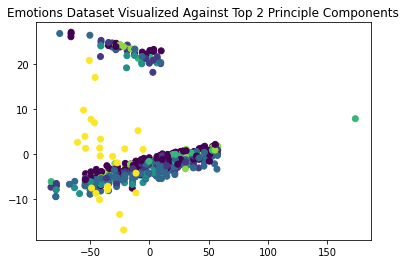

In [5]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:], c = np.argmax(true_labels, axis = 1))
plt.title('Emotions Dataset Visualized Against Top 2 Principle Components')





 Number of true positives:  [99, 33, 104, 45, 59, 98, 4] 

 Number of false positives :  [147, 97, 77, 85, 122, 148, 57] 

 Number of true negatives:  [298, 355, 277, 385, 328, 281, 536] 

 Number of false negatives:  [74, 133, 160, 103, 109, 91, 21] 

 F1 scores for each cluster:  [0.4725537  0.22297297 0.46741573 0.32374101 0.33810888 0.45057471
 0.09302326] 

 Average F1 score:  0.3383414658239182 

 me score: 0.8454817128211534


Text(0.5, 1.0, 'Robust Trimmed k Means')

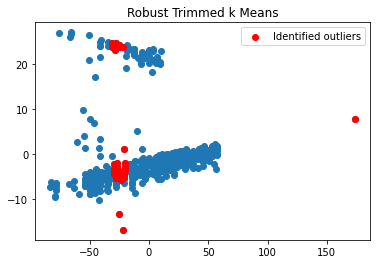

In [62]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=6, percent_outliers = 0.10, max_iter = 100, num_members = 2) 
pred_clusters, pred_outliers = RTKM_yeast.return_clusters()

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = RTKM_yeast.weights, pred_outliers = RTKM_yeast.outliers, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c = 'r', label = 'Identified outliers')
# plt.scatter(RTKM_yeast.centers[0,:], RTKM_yeast.centers[1,:], c = 'b', label = 'Calculated Centers')
plt.legend()
plt.title('Robust Trimmed k Means')
#plt.savefig('MyMethodTrimmed')



    _pyeval at line 57 column 30

***** iteration: 1, objective: 298529.624071
***** iteration: 2, objective: 219302.712024
***** iteration: 3, objective: 208892.392609
***** iteration: 4, objective: 201024.950012
***** iteration: 5, objective: 195826.155954
***** iteration: 6, objective: 190845.433669
***** iteration: 7, objective: 188431.557349
***** iteration: 8, objective: 186303.040847
***** iteration: 9, objective: 185217.239016
***** iteration: 10, objective: 184471.045219
***** iteration: 11, objective: 183780.990598
***** iteration: 12, objective: 183469.492577
***** iteration: 13, objective: 183423.225184
***** iteration: 14, objective: 183415.474028
***** iteration: 15, objective: 183415.474028
***** No. of iterations done: 15
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62


 Number of true positives:  [96, 72, 108, 42, 40, 81, 1] 

 Number of false positives :  [143, 163, 148, 83, 106, 154, 61] 

 Number of true negatives:  

Text(0.5, 1.0, 'NEO-k-means')

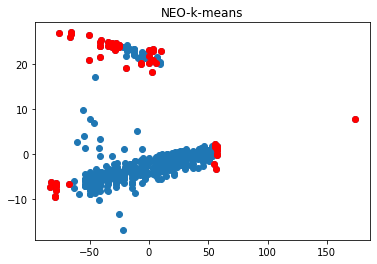

In [63]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=6, percent_outliers=.10, sigma = 1, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

outliers = np.where(pred_outliers_NEO == 0)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,outliers], Xnew[1,outliers], c= 'r')
plt.title('NEO-k-means')



In [64]:
alpha_vals = np.linspace(0, .10, 11) 

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=6, kmor_gamma= 1, 
                                                                                neo_sigma = 1, path_to_neo='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 50, true_clusters=true_labels.astype(int).T,
                                                                                membership_option= 'multi', rtkm_sigma = 2)
    
    

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 332079.552877
***** iteration: 2, objective: 286055.204242
***** iteration: 3, objective: 276638.044302
***** iteration: 4, objective: 273036.486816
***** iteration: 5, objective: 271115.832564
***** iteration: 6, objective: 268899.396645
***** iteration: 7, objective: 268150.350352
***** iteration: 8, objective: 267316.200548
***** iteration: 9, objective: 266701.212697
***** iteration: 10, objective: 265756.466074
***** iteration: 11, objective: 265248.584886
***** iteration: 12, objective: 265077.862105
***** iteration: 13, objective: 264920.716300
***** iteration: 14, objective: 264589.342224
***** iteration: 15, objective: 264418.202199
***** iteration: 16, objective: 263117.974092
***** iteration: 17, objective: 257843.831130
***** iteration: 18, objective: 254048.080312
***** iteration: 19, objective: 251562.362897
***** iteration: 20, objective: 248105.153426
***** iteration: 21, o

***** iteration: 2, objective: 288248.583621
***** iteration: 3, objective: 277919.718551
***** iteration: 4, objective: 273330.113482
***** iteration: 5, objective: 271215.624118
***** iteration: 6, objective: 269264.786624
***** iteration: 7, objective: 268355.514651
***** iteration: 8, objective: 267924.247789
***** iteration: 9, objective: 267675.039237
***** iteration: 10, objective: 267457.513760
***** iteration: 11, objective: 266923.892561
***** iteration: 12, objective: 266105.793603
***** iteration: 13, objective: 265707.875422
***** iteration: 14, objective: 265320.671219
***** iteration: 15, objective: 265130.002451
***** iteration: 16, objective: 265001.715818
***** iteration: 17, objective: 264625.362475
***** iteration: 18, objective: 264278.750954
***** iteration: 19, objective: 261912.730002
***** iteration: 20, objective: 256557.902017
***** iteration: 21, objective: 253192.492011
***** iteration: 22, objective: 250441.454175
***** iteration: 23, objective: 247423.949

    _pyeval at line 32 column 9

***** iteration: 1, objective: 410117.225770
***** iteration: 2, objective: 365135.952773


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 353785.615588
***** iteration: 4, objective: 350669.547863
***** iteration: 5, objective: 348097.309735
***** iteration: 6, objective: 341991.825974
***** iteration: 7, objective: 331005.403836
***** iteration: 8, objective: 317112.631114
***** iteration: 9, objective: 305909.628432
***** iteration: 10, objective: 302677.958812
***** iteration: 11, objective: 300005.892050
***** iteration: 12, objective: 298529.030660
***** iteration: 13, objective: 297933.758326
***** iteration: 14, objective: 297717.121801
***** iteration: 15, objective: 297434.054688
***** iteration: 16, objective: 297250.811660
***** iteration: 17, objective: 297213.227639
***** iteration: 18, objective: 297188.075842
***** iteration: 19, objective: 297181.000492
***** iteration: 20, objective: 297181.000492
***** No. of iterations done: 20
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at l

***** iteration: 8, objective: 264620.370471
***** iteration: 9, objective: 264484.360011
***** iteration: 10, objective: 263813.268979
***** iteration: 11, objective: 260284.898466
***** iteration: 12, objective: 255270.988807
***** iteration: 13, objective: 252126.518448
***** iteration: 14, objective: 248288.532943
***** iteration: 15, objective: 246425.337106
***** iteration: 16, objective: 244813.557588
***** iteration: 17, objective: 243128.507561
***** iteration: 18, objective: 242009.581554
***** iteration: 19, objective: 241748.958173
***** iteration: 20, objective: 241736.646841
***** iteration: 21, objective: 241736.646841
***** No. of iterations done: 21
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 332079.552877
***** iteration: 2, objective: 286055.204242
***** iteration: 3, objective: 276638.044302
***** iteration: 4, objecti

***** iteration: 18, objective: 242009.581554
***** iteration: 19, objective: 241748.958173
***** iteration: 20, objective: 241736.646841
***** iteration: 21, objective: 241736.646841
***** No. of iterations done: 21
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 340724.829835
***** iteration: 2, objective: 289829.874565
***** iteration: 3, objective: 278570.549192
***** iteration: 4, objective: 274168.556936
***** iteration: 5, objective: 272651.514133
***** iteration: 6, objective: 272273.508205
***** iteration: 7, objective: 272189.996044
***** iteration: 8, objective: 272147.294524
***** iteration: 9, objective: 272136.815349
***** iteration: 10, objective: 272113.234486
***** iteration: 11, objective: 272012.195362
***** iteration: 12, objective: 271328.137171
***** iteration: 13, objective: 270392.156406
***** iteration: 14, objective:

    _pyeval at line 32 column 9

***** iteration: 1, objective: 332079.552877
***** iteration: 2, objective: 286055.204242
***** iteration: 3, objective: 276638.044302
***** iteration: 4, objective: 273036.486816
***** iteration: 5, objective: 271115.832564
***** iteration: 6, objective: 268899.396645
***** iteration: 7, objective: 268150.350352
***** iteration: 8, objective: 267316.200548
***** iteration: 9, objective: 266701.212697
***** iteration: 10, objective: 265756.466074
***** iteration: 11, objective: 265248.584886
***** iteration: 12, objective: 265077.862105
***** iteration: 13, objective: 264920.716300
***** iteration: 14, objective: 264589.342224
***** iteration: 15, objective: 264418.202199
***** iteration: 16, objective: 263117.974092
***** iteration: 17, objective: 257843.831130
***** iteration: 18, objective: 254048.080312
***** iteration: 19, objective: 251562.362897
***** iteration: 20, objective: 248105.153426
***** iteration: 21, objective: 246225.180227
***** iter

***** iteration: 3, objective: 276638.044302
***** iteration: 4, objective: 273036.486816
***** iteration: 5, objective: 271115.832564
***** iteration: 6, objective: 268899.396645
***** iteration: 7, objective: 268150.350352
***** iteration: 8, objective: 267316.200548
***** iteration: 9, objective: 266701.212697
***** iteration: 10, objective: 265756.466074
***** iteration: 11, objective: 265248.584886
***** iteration: 12, objective: 265077.862105
***** iteration: 13, objective: 264920.716300
***** iteration: 14, objective: 264589.342224
***** iteration: 15, objective: 264418.202199
***** iteration: 16, objective: 263117.974092
***** iteration: 17, objective: 257843.831130
***** iteration: 18, objective: 254048.080312
***** iteration: 19, objective: 251562.362897
***** iteration: 20, objective: 248105.153426
***** iteration: 21, objective: 246225.180227
***** iteration: 22, objective: 244228.761425
***** iteration: 23, objective: 242741.118651
***** iteration: 24, objective: 241875.32

    _pyeval at line 32 column 9

***** iteration: 1, objective: 334569.024760
***** iteration: 2, objective: 289916.752248
***** iteration: 3, objective: 268413.171497
***** iteration: 4, objective: 265631.942537
***** iteration: 5, objective: 265170.260429
***** iteration: 6, objective: 264749.279391
***** iteration: 7, objective: 264571.501988
***** iteration: 8, objective: 264166.148929
***** iteration: 9, objective: 261716.891590
***** iteration: 10, objective: 256358.394331
***** iteration: 11, objective: 252853.276731
***** iteration: 12, objective: 248774.551819
***** iteration: 13, objective: 246612.970954
***** iteration: 14, objective: 244782.732719
***** iteration: 15, objective: 242850.202763
***** iteration: 16, objective: 241916.489439
***** iteration: 17, objective: 241744.195946
***** iteration: 18, objective: 241736.646841
***** iteration: 19, objective: 241736.646841
***** No. of iterations done: 19
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
*

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 352162.653940
***** iteration: 4, objective: 350377.226944
***** iteration: 5, objective: 349551.942733
***** iteration: 6, objective: 347291.045329
***** iteration: 7, objective: 336912.050346
***** iteration: 8, objective: 325296.858240
***** iteration: 9, objective: 313118.222818
***** iteration: 10, objective: 304666.379278
***** iteration: 11, objective: 301455.874689
***** iteration: 12, objective: 300133.556620
***** iteration: 13, objective: 298527.253193
***** iteration: 14, objective: 297933.758326
***** iteration: 15, objective: 297717.121801
***** iteration: 16, objective: 297434.054688
***** iteration: 17, objective: 297250.811660
***** iteration: 18, objective: 297213.227639
***** iteration: 19, objective: 297188.075842
***** iteration: 20, objective: 297181.000492
***** iteration: 21, objective: 297181.000492
***** No. of iterations done: 21
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.000, betaN: 0
    

***** iteration: 9, objective: 265032.560704
***** iteration: 10, objective: 264691.311466
***** iteration: 11, objective: 264496.273979
***** iteration: 12, objective: 263813.268979
***** iteration: 13, objective: 260284.898466
***** iteration: 14, objective: 255270.988807
***** iteration: 15, objective: 252126.518448
***** iteration: 16, objective: 248288.532943
***** iteration: 17, objective: 246425.337106
***** iteration: 18, objective: 244813.557588
***** iteration: 19, objective: 243128.507561
***** iteration: 20, objective: 242009.581554
***** iteration: 21, objective: 241748.958173
***** iteration: 22, objective: 241736.646841
***** iteration: 23, objective: 241736.646841
***** No. of iterations done: 23
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 336763.491742
***** iteration: 2, objective: 291299.150276
***** iteration: 3, objec

***** iteration: 10, objective: 265756.466074
***** iteration: 11, objective: 265248.584886
***** iteration: 12, objective: 265077.862105
***** iteration: 13, objective: 264920.716300
***** iteration: 14, objective: 264589.342224
***** iteration: 15, objective: 264418.202199
***** iteration: 16, objective: 263117.974092
***** iteration: 17, objective: 257843.831130
***** iteration: 18, objective: 254048.080312
***** iteration: 19, objective: 251562.362897
***** iteration: 20, objective: 248105.153426
***** iteration: 21, objective: 246225.180227
***** iteration: 22, objective: 244228.761425
***** iteration: 23, objective: 242741.118651
***** iteration: 24, objective: 241875.324447
***** iteration: 25, objective: 241748.958173
***** iteration: 26, objective: 241736.646841
***** iteration: 27, objective: 241736.646841
***** No. of iterations done: 27
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.000, betaN: 0
    _pyeval at line 57 column 30

    _pyev


***** iteration: 1, objective: 395189.677236
***** iteration: 2, objective: 331995.706159
***** iteration: 3, objective: 312938.902622
***** iteration: 4, objective: 300954.021778
***** iteration: 5, objective: 293296.201701
***** iteration: 6, objective: 290002.255329
***** iteration: 7, objective: 288773.310845
***** iteration: 8, objective: 287754.046468
***** iteration: 9, objective: 286612.815306
***** iteration: 10, objective: 286356.147314
***** iteration: 11, objective: 286085.065795
***** iteration: 12, objective: 285947.491248
***** iteration: 13, objective: 285929.992943
***** iteration: 14, objective: 285920.774458
***** iteration: 15, objective: 285917.101769
***** iteration: 16, objective: 285917.101769
***** No. of iterations done: 16
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.010, betaN: 6
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 320053.722074
***** iteration: 2, objective: 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 341148.015922
***** iteration: 4, objective: 339180.616481
***** iteration: 5, objective: 337927.015368
***** iteration: 6, objective: 335453.559348
***** iteration: 7, objective: 325485.990082
***** iteration: 8, objective: 314012.120046
***** iteration: 9, objective: 301807.025921
***** iteration: 10, objective: 293490.637527
***** iteration: 11, objective: 290032.982216
***** iteration: 12, objective: 288874.944363
***** iteration: 13, objective: 287968.999195
***** iteration: 14, objective: 286808.221436
***** iteration: 15, objective: 286381.626561
***** iteration: 16, objective: 286126.358179
***** iteration: 17, objective: 285966.317556
***** iteration: 18, objective: 285932.080117
***** iteration: 19, objective: 285926.420468
***** iteration: 20, objective: 285921.938420
***** iteration: 21, objective: 285921.938420
***** No. of iterations done: 21
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.010, betaN: 6
    

***** iteration: 4, objective: 246276.598975
***** iteration: 5, objective: 243724.233343
***** iteration: 6, objective: 241982.818082
***** iteration: 7, objective: 241293.604569
***** iteration: 8, objective: 240626.514588
***** iteration: 9, objective: 240041.109562
***** iteration: 10, objective: 238962.489906
***** iteration: 11, objective: 238713.107572
***** iteration: 12, objective: 238526.650981
***** iteration: 13, objective: 238149.421365
***** iteration: 14, objective: 237985.046889
***** iteration: 15, objective: 236775.161937
***** iteration: 16, objective: 232671.105956
***** iteration: 17, objective: 228458.411151
***** iteration: 18, objective: 226047.039797
***** iteration: 19, objective: 222206.631721
***** iteration: 20, objective: 220396.082240
***** iteration: 21, objective: 217808.836288
***** iteration: 22, objective: 216431.708723
***** iteration: 23, objective: 216026.285983
***** iteration: 24, objective: 216008.418613
***** iteration: 25, objective: 216004.7

***** iteration: 8, objective: 249732.362499
***** iteration: 9, objective: 248265.958556
***** iteration: 10, objective: 246748.940393
***** iteration: 11, objective: 246093.661770
***** iteration: 12, objective: 245673.042195
***** iteration: 13, objective: 245363.590319
***** iteration: 14, objective: 245304.331620
***** iteration: 15, objective: 245258.151853
***** iteration: 16, objective: 245148.322137
***** iteration: 17, objective: 245097.854603
***** iteration: 18, objective: 245081.499070
***** iteration: 19, objective: 245076.186217
***** iteration: 20, objective: 245076.186217
***** No. of iterations done: 20
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.010, betaN: 6
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 311789.783103
***** iteration: 2, objective: 261027.706662
***** iteration: 3, objective: 250542.967259
***** iteration: 4, objective: 246338.439153
***** iteration: 5, objectiv

***** iteration: 4, objective: 247586.546730
***** iteration: 5, objective: 246293.235372
***** iteration: 6, objective: 245867.493036
***** iteration: 7, objective: 245740.671171
***** iteration: 8, objective: 245705.837915
***** iteration: 9, objective: 245675.770817
***** iteration: 10, objective: 245668.753219
***** iteration: 11, objective: 245655.497657
***** iteration: 12, objective: 245584.901069
***** iteration: 13, objective: 244970.698610
***** iteration: 14, objective: 244069.665833
***** iteration: 15, objective: 242528.277180
***** iteration: 16, objective: 241738.068319
***** iteration: 17, objective: 241314.233383
***** iteration: 18, objective: 241116.221678
***** iteration: 19, objective: 240700.104517
***** iteration: 20, objective: 239801.811656
***** iteration: 21, objective: 239463.381681
***** iteration: 22, objective: 238999.830023
***** iteration: 23, objective: 238808.706868
***** iteration: 24, objective: 238601.745016
***** iteration: 25, objective: 238248.3

***** iteration: 26, objective: 216004.785620
***** No. of iterations done: 26
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.010, betaN: 6
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 309945.254120
***** iteration: 2, objective: 260323.160913
***** iteration: 3, objective: 250148.030729
***** iteration: 4, objective: 246236.545831
***** iteration: 5, objective: 243439.665983
***** iteration: 6, objective: 242008.463337
***** iteration: 7, objective: 241304.081909
***** iteration: 8, objective: 240622.910004
***** iteration: 9, objective: 240041.220466
***** iteration: 10, objective: 238962.489906
***** iteration: 11, objective: 238713.107572
***** iteration: 12, objective: 238526.650981
***** iteration: 13, objective: 238149.421365
***** iteration: 14, objective: 237985.046889
***** iteration: 15, objective: 236775.161937
***** iteration: 16, objective: 232671.105956
***** iteration: 17, objective:

***** alpha: 1.000, alphaN: 618
***** beta: 0.010, betaN: 6
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 309230.752949
***** iteration: 2, objective: 260312.307364
***** iteration: 3, objective: 249839.559986
***** iteration: 4, objective: 245476.917099
***** iteration: 5, objective: 242477.060446
***** iteration: 6, objective: 241312.993950
***** iteration: 7, objective: 240622.910004
***** iteration: 8, objective: 240041.220466
***** iteration: 9, objective: 238962.489906
***** iteration: 10, objective: 238713.107572
***** iteration: 11, objective: 238526.650981
***** iteration: 12, objective: 238149.421365
***** iteration: 13, objective: 237985.046889
***** iteration: 14, objective: 236775.161937
***** iteration: 15, objective: 232671.105956
***** iteration: 16, objective: 228458.411151
***** iteration: 17, objective: 226047.039797
***** iteration: 18, objective: 222206.631721
***** iteration: 19, objective: 220396.082240
***** it

***** alpha: 1.000, alphaN: 618
***** beta: 0.010, betaN: 6
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 319316.335774
***** iteration: 2, objective: 264307.773322
***** iteration: 3, objective: 251964.285442
***** iteration: 4, objective: 247586.546730
***** iteration: 5, objective: 246293.235372
***** iteration: 6, objective: 245867.493036
***** iteration: 7, objective: 245740.671171
***** iteration: 8, objective: 245705.837915
***** iteration: 9, objective: 245675.770817
***** iteration: 10, objective: 245668.753219
***** iteration: 11, objective: 245655.497657
***** iteration: 12, objective: 245584.901069
***** iteration: 13, objective: 244970.698610
***** iteration: 14, objective: 244069.665833
***** iteration: 15, objective: 242528.277180
***** iteration: 16, objective: 241738.068319
***** iteration: 17, objective: 241314.233383
***** iteration: 18, objective: 241116.221678
***** iteration: 19, objective: 240700.104517
***** it


    _pyeval at line 32 column 9

***** iteration: 1, objective: 321085.614883
***** iteration: 2, objective: 264722.732094
***** iteration: 3, objective: 252796.330193
***** iteration: 4, objective: 247586.879683
***** iteration: 5, objective: 246667.694430
***** iteration: 6, objective: 246095.238210
***** iteration: 7, objective: 245741.657490
***** iteration: 8, objective: 245427.656399
***** iteration: 9, objective: 245368.402986
***** iteration: 10, objective: 245322.223219
***** iteration: 11, objective: 245217.598860
***** iteration: 12, objective: 245168.331616
***** iteration: 13, objective: 245160.293523
***** iteration: 14, objective: 245154.984080
***** iteration: 15, objective: 245154.984080
***** No. of iterations done: 15
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.010, betaN: 6
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 365082.668539
***** iteration: 2, objective: 300091.686656

***** No. of iterations done: 26
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.010, betaN: 6
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 310469.061987
***** iteration: 2, objective: 260435.255287
***** iteration: 3, objective: 250566.223404
***** iteration: 4, objective: 246757.881125
***** iteration: 5, objective: 244795.222927
***** iteration: 6, objective: 242726.862872
***** iteration: 7, objective: 241608.781774
***** iteration: 8, objective: 240867.576555
***** iteration: 9, objective: 240243.562615
***** iteration: 10, objective: 239532.628261
***** iteration: 11, objective: 238794.761725
***** iteration: 12, objective: 238629.840902
***** iteration: 13, objective: 238425.437937
***** iteration: 14, objective: 238107.701208
***** iteration: 15, objective: 237889.948882
***** iteration: 16, objective: 236001.492319
***** iteration: 17, objective: 231012.846354
***** iteration: 18, objective:

***** iteration: 16, objective: 234969.617885
***** iteration: 17, objective: 234751.893950
***** iteration: 18, objective: 234339.855476
***** iteration: 19, objective: 233361.723522
***** iteration: 20, objective: 233071.812297
***** iteration: 21, objective: 232818.521090
***** iteration: 22, objective: 232470.643529
***** iteration: 23, objective: 232232.771933
***** iteration: 24, objective: 232068.420043
***** iteration: 25, objective: 231726.123812
***** iteration: 26, objective: 230995.502095
***** iteration: 27, objective: 227014.944356
***** iteration: 28, objective: 222251.607612
***** iteration: 29, objective: 219527.836420
***** iteration: 30, objective: 215847.399361
***** iteration: 31, objective: 214206.884520
***** iteration: 32, objective: 211880.824715
***** iteration: 33, objective: 210345.306539
***** iteration: 34, objective: 209773.091625
***** iteration: 35, objective: 209671.945914
***** iteration: 36, objective: 209632.060957
***** iteration: 37, objective: 20

***** alpha: 1.000, alphaN: 618
***** beta: 0.020, betaN: 12
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 313175.138689
***** iteration: 2, objective: 256595.035833
***** iteration: 3, objective: 245113.831135
***** iteration: 4, objective: 241197.883366
***** iteration: 5, objective: 239805.873942
***** iteration: 6, objective: 239442.021427
***** iteration: 7, objective: 239369.431496
***** iteration: 8, objective: 239329.724337
***** iteration: 9, objective: 239305.885196
***** iteration: 10, objective: 239267.506758
***** iteration: 11, objective: 239003.685303
***** iteration: 12, objective: 238213.175201
***** iteration: 13, objective: 236973.901268
***** iteration: 14, objective: 235868.770101
***** iteration: 15, objective: 235287.166217
***** iteration: 16, objective: 234969.617885
***** iteration: 17, objective: 234751.893950
***** iteration: 18, objective: 234339.855476
***** iteration: 19, objective: 233361.723522
***** i

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 309992.166258
***** iteration: 2, objective: 252716.148855
***** iteration: 3, objective: 241596.416858
***** iteration: 4, objective: 237145.098257
***** iteration: 5, objective: 235020.744300
***** iteration: 6, objective: 234067.639901
***** iteration: 7, objective: 233558.636446
***** iteration: 8, objective: 232520.222456
***** iteration: 9, objective: 232275.126411
***** iteration: 10, objective: 232141.064053
***** iteration: 11, objective: 231799.595055
***** iteration: 12, objective: 231640.797271
***** iteration: 13, objective: 230809.584831
***** iteration: 14, objective: 227014.944356
***** iteration: 15, objective: 222251.607612
***** iteration: 16, objective: 219527.836420
***** iteration: 17, objective: 215847.399361
***** iteration: 18, objective: 214206.884520
***** iteration: 19, objective: 211880.824715
***** iteration: 20, objective: 210345.306539
***** iteration: 21, o

***** iteration: 29, objective: 209535.246514
***** iteration: 30, objective: 209478.341079
***** iteration: 31, objective: 209367.626389
***** iteration: 32, objective: 209359.910813
***** iteration: 33, objective: 209359.910813
***** No. of iterations done: 33
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.020, betaN: 12
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 319044.572407
***** iteration: 2, objective: 258894.843728
***** iteration: 3, objective: 246502.467602
***** iteration: 4, objective: 241452.968312
***** iteration: 5, objective: 240370.581937
***** iteration: 6, objective: 239817.816085
***** iteration: 7, objective: 239464.235365
***** iteration: 8, objective: 239150.234274
***** iteration: 9, objective: 239090.980861
***** iteration: 10, objective: 239044.801094
***** iteration: 11, objective: 238940.176735
***** iteration: 12, objective: 238890.051347
***** iteration: 13, objective

***** iteration: 2, objective: 258894.843728
***** iteration: 3, objective: 246502.467602
***** iteration: 4, objective: 241452.968312
***** iteration: 5, objective: 240370.581937
***** iteration: 6, objective: 239817.816085
***** iteration: 7, objective: 239464.235365
***** iteration: 8, objective: 239150.234274
***** iteration: 9, objective: 239090.980861
***** iteration: 10, objective: 239044.801094
***** iteration: 11, objective: 238940.176735
***** iteration: 12, objective: 238890.051347
***** iteration: 13, objective: 238876.150658
***** iteration: 14, objective: 238876.150658
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.020, betaN: 12
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 375803.227419
***** iteration: 2, objective: 314083.229577
***** iteration: 3, objective: 284516.265715
***** iteration: 4, objective: 274182.769047
***** iteration: 5, objective: 27

***** iteration: 13, objective: 231944.711838
***** iteration: 14, objective: 231700.583957
***** iteration: 15, objective: 231102.281569
***** iteration: 16, objective: 227898.979087
***** iteration: 17, objective: 222996.775121
***** iteration: 18, objective: 220009.159561
***** iteration: 19, objective: 216043.064827
***** iteration: 20, objective: 214313.315312
***** iteration: 21, objective: 211880.824715
***** iteration: 22, objective: 210345.306539
***** iteration: 23, objective: 209773.091625
***** iteration: 24, objective: 209671.945914
***** iteration: 25, objective: 209632.060957
***** iteration: 26, objective: 209586.419719
***** iteration: 27, objective: 209579.621484
***** iteration: 28, objective: 209563.580124
***** iteration: 29, objective: 209535.246514
***** iteration: 30, objective: 209478.341079
***** iteration: 31, objective: 209367.626389
***** iteration: 32, objective: 209359.910813
***** iteration: 33, objective: 209359.910813
***** No. of iterations done: 33
*

***** iteration: 17, objective: 220009.159561
***** iteration: 18, objective: 216043.064827
***** iteration: 19, objective: 214313.315312
***** iteration: 20, objective: 211880.824715
***** iteration: 21, objective: 210345.306539
***** iteration: 22, objective: 209773.091625
***** iteration: 23, objective: 209671.945914
***** iteration: 24, objective: 209632.060957
***** iteration: 25, objective: 209586.419719
***** iteration: 26, objective: 209579.621484
***** iteration: 27, objective: 209563.580124
***** iteration: 28, objective: 209535.246514
***** iteration: 29, objective: 209478.341079
***** iteration: 30, objective: 209367.626389
***** iteration: 31, objective: 209359.910813
***** iteration: 32, objective: 209359.910813
***** No. of iterations done: 32
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.020, betaN: 12
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 309402.700510
***** iteration: 2, ob

***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.020, betaN: 12
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 321057.464931
***** iteration: 2, objective: 254832.414355
***** iteration: 3, objective: 239543.344685
***** iteration: 4, objective: 235664.799596
***** iteration: 5, objective: 234079.880594
***** iteration: 6, objective: 233398.877331
***** iteration: 7, objective: 232560.759368
***** iteration: 8, objective: 232335.975308
***** iteration: 9, objective: 232191.620213
***** iteration: 10, objective: 231944.711838
***** iteration: 11, objective: 231700.583957
***** iteration: 12, objective: 231102.281569
***** iteration: 13, objective: 227898.979087
***** iteration: 14, objective: 222996.775121
***** iteration: 15, objective: 220009.159561
***** iteration: 16, objective: 216043.064827
***** iteration: 17, objective: 214313.315312
***** iteration: 18, objective: 211880.824715
***** iteration: 

***** iteration: 44, objective: 209359.910813
***** iteration: 45, objective: 209359.910813
***** No. of iterations done: 45
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.020, betaN: 12
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 340940.612914
***** iteration: 2, objective: 282388.657952
***** iteration: 3, objective: 272191.336952
***** iteration: 4, objective: 262874.755505
***** iteration: 5, objective: 254834.451744
***** iteration: 6, objective: 247867.294635
***** iteration: 7, objective: 243255.166471
***** iteration: 8, objective: 241485.023359
***** iteration: 9, objective: 240473.938396
***** iteration: 10, objective: 239826.276928
***** iteration: 11, objective: 239399.438512
***** iteration: 12, objective: 239086.168194
***** iteration: 13, objective: 239026.909495
***** iteration: 14, objective: 238980.729728
***** iteration: 15, objective: 238870.900012
***** iteration: 16, objective

***** iteration: 6, objective: 239817.816085
***** iteration: 7, objective: 239464.235365
***** iteration: 8, objective: 239150.234274
***** iteration: 9, objective: 239090.980861
***** iteration: 10, objective: 239044.801094
***** iteration: 11, objective: 238940.176735
***** iteration: 12, objective: 238890.051347
***** iteration: 13, objective: 238876.150658
***** iteration: 14, objective: 238876.150658
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.020, betaN: 12
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 309793.147175
***** iteration: 2, objective: 254573.049373
***** iteration: 3, objective: 243854.055425
***** iteration: 4, objective: 240540.882442
***** iteration: 5, objective: 238404.196980
***** iteration: 6, objective: 236284.173305
***** iteration: 7, objective: 235429.782165
***** iteration: 8, objective: 235032.778737
***** iteration: 9, objective: 23

***** iteration: 31, objective: 209367.626389
***** iteration: 32, objective: 209359.910813
***** iteration: 33, objective: 209359.910813
***** No. of iterations done: 33
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.020, betaN: 12
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 342513.832637
***** iteration: 2, objective: 289936.447071
***** iteration: 3, objective: 276033.081941
***** iteration: 4, objective: 272147.115528
***** iteration: 5, objective: 264496.002840
***** iteration: 6, objective: 255914.665570
***** iteration: 7, objective: 248450.670309
***** iteration: 8, objective: 243592.849205
***** iteration: 9, objective: 242112.407225
***** iteration: 10, objective: 240520.230609
***** iteration: 11, objective: 239845.267562
***** iteration: 12, objective: 239467.242541
***** iteration: 13, objective: 239210.473758
***** iteration: 14, objective: 239054.185494
***** iteration: 15, objective

***** iteration: 2, objective: 247502.992513
***** iteration: 3, objective: 234796.316617
***** iteration: 4, objective: 231088.098339
***** iteration: 5, objective: 228991.926071
***** iteration: 6, objective: 227959.155220
***** iteration: 7, objective: 227419.375847
***** iteration: 8, objective: 226386.569836
***** iteration: 9, objective: 226049.756035
***** iteration: 10, objective: 225927.666923
***** iteration: 11, objective: 225851.223934
***** iteration: 12, objective: 225580.434045
***** iteration: 13, objective: 225220.085925
***** iteration: 14, objective: 223434.172763
***** iteration: 15, objective: 218127.445684
***** iteration: 16, objective: 214947.330895
***** iteration: 17, objective: 212632.413134
***** iteration: 18, objective: 209273.448682
***** iteration: 19, objective: 207497.885298
***** iteration: 20, objective: 204910.626676
***** iteration: 21, objective: 203473.235558
***** iteration: 22, objective: 203078.746360
***** iteration: 23, objective: 203057.459

    _pyeval at line 32 column 9

***** iteration: 1, objective: 311644.470397
***** iteration: 2, objective: 250261.416668
***** iteration: 3, objective: 238084.587431
***** iteration: 4, objective: 233816.617324
***** iteration: 5, objective: 231046.842951
***** iteration: 6, objective: 229304.746652
***** iteration: 7, objective: 228350.081408
***** iteration: 8, objective: 227621.284671
***** iteration: 9, objective: 226758.133958
***** iteration: 10, objective: 226111.585412
***** iteration: 11, objective: 225999.147775
***** iteration: 12, objective: 225884.643690
***** iteration: 13, objective: 225781.325123
***** iteration: 14, objective: 225476.686001
***** iteration: 15, objective: 225311.772030
***** iteration: 16, objective: 224049.166925
***** iteration: 17, objective: 219268.435893
***** iteration: 18, objective: 215454.084361
***** iteration: 19, objective: 212765.746857
***** iteration: 20, objective: 209273.448682
***** iteration: 21, objective: 207497.885298
***** iter

***** iteration: 13, objective: 227215.459772
***** iteration: 14, objective: 226964.331571
***** iteration: 15, objective: 226907.492042
***** iteration: 16, objective: 226865.323365
***** iteration: 17, objective: 226830.088568
***** iteration: 18, objective: 226826.678928
***** iteration: 19, objective: 226826.678928
***** No. of iterations done: 19
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.030, betaN: 19
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 314628.661123
***** iteration: 2, objective: 249086.867444
***** iteration: 3, objective: 234376.263099
***** iteration: 4, objective: 229998.049592
***** iteration: 5, objective: 228170.572624
***** iteration: 6, objective: 227405.613315
***** iteration: 7, objective: 226627.430770
***** iteration: 8, objective: 226057.214313
***** iteration: 9, objective: 225945.537387
***** iteration: 10, objective: 225796.380093
***** iteration: 11, objective

    _pyeval at line 32 column 9

***** iteration: 1, objective: 313373.844301
***** iteration: 2, objective: 246972.940328
***** iteration: 3, objective: 234673.542011
***** iteration: 4, objective: 230127.463407
***** iteration: 5, objective: 227963.147169
***** iteration: 6, objective: 227025.211824
***** iteration: 7, objective: 226213.385734
***** iteration: 8, objective: 226003.469715
***** iteration: 9, objective: 225875.740651
***** iteration: 10, objective: 225702.450050
***** iteration: 11, objective: 225408.385294
***** iteration: 12, objective: 225223.825829
***** iteration: 13, objective: 223790.429101
***** iteration: 14, objective: 218950.903583
***** iteration: 15, objective: 215277.500126
***** iteration: 16, objective: 212678.433264
***** iteration: 17, objective: 209273.448682
***** iteration: 18, objective: 207497.885298
***** iteration: 19, objective: 204910.626676
***** iteration: 20, objective: 203473.235558
***** iteration: 21, objective: 203078.746360
***** iter

***** iteration: 10, objective: 232765.773932
***** iteration: 11, objective: 232760.662409
***** iteration: 12, objective: 232760.662409
***** No. of iterations done: 12
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.030, betaN: 19
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 314795.977211
***** iteration: 2, objective: 246585.657729
***** iteration: 3, objective: 233450.200800
***** iteration: 4, objective: 229509.383408
***** iteration: 5, objective: 227704.131973
***** iteration: 6, objective: 226650.697261
***** iteration: 7, objective: 226057.214313
***** iteration: 8, objective: 225945.537387
***** iteration: 9, objective: 225796.380093
***** iteration: 10, objective: 225488.322951
***** iteration: 11, objective: 225311.772030
***** iteration: 12, objective: 224049.166925
***** iteration: 13, objective: 219268.435893
***** iteration: 14, objective: 215454.084361
***** iteration: 15, objective

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 313755.892324
***** iteration: 2, objective: 247198.169021
***** iteration: 3, objective: 235092.363576
***** iteration: 4, objective: 230712.457348
***** iteration: 5, objective: 228166.146645
***** iteration: 6, objective: 227354.474219
***** iteration: 7, objective: 226309.659984
***** iteration: 8, objective: 226043.742042
***** iteration: 9, objective: 225939.536933
***** iteration: 10, objective: 225802.774625
***** iteration: 11, objective: 225470.526942
***** iteration: 12, objective: 225280.564961
***** iteration: 13, objective: 223790.429101
***** iteration: 14, objective: 218950.903583
***** iteration: 15, objective: 215277.500126
***** iteration: 16, objective: 212678.433264
***** iteration: 17, objective: 209273.448682
***** iteration: 18, objective: 207497.885298
***** iteration: 19, objective: 204910.626676
***** iteration: 20, objective: 203473.235558
***** iteration: 21, o

***** iteration: 6, objective: 227640.043921
***** iteration: 7, objective: 226759.310643
***** iteration: 8, objective: 226098.974679
***** iteration: 9, objective: 225998.826998
***** iteration: 10, objective: 225884.316435
***** iteration: 11, objective: 225782.664910
***** iteration: 12, objective: 225478.019285
***** iteration: 13, objective: 225311.451254
***** iteration: 14, objective: 224054.648668
***** iteration: 15, objective: 219245.533182
***** iteration: 16, objective: 215395.706967
***** iteration: 17, objective: 212694.927099
***** iteration: 18, objective: 209273.448682
***** iteration: 19, objective: 207497.885298
***** iteration: 20, objective: 204910.626676
***** iteration: 21, objective: 203473.235558
***** iteration: 22, objective: 203078.746360
***** iteration: 23, objective: 203057.459151
***** iteration: 24, objective: 203051.996288
***** iteration: 25, objective: 203051.996288
***** No. of iterations done: 25
***** Total no. of data points: 618
***** alpha: 1.

***** iteration: 5, objective: 232857.924866
***** iteration: 6, objective: 231671.107788
***** iteration: 7, objective: 229982.685603
***** iteration: 8, objective: 229152.585734
***** iteration: 9, objective: 228650.199100
***** iteration: 10, objective: 228400.451537
***** iteration: 11, objective: 227870.825792
***** iteration: 12, objective: 227169.869446
***** iteration: 13, objective: 226870.810346
***** iteration: 14, objective: 226507.570982
***** iteration: 15, objective: 226294.106009
***** iteration: 16, objective: 226117.093058
***** iteration: 17, objective: 225872.476045
***** iteration: 18, objective: 225769.492903
***** iteration: 19, objective: 225479.137604
***** iteration: 20, objective: 225155.527981
***** iteration: 21, objective: 223180.588232
***** iteration: 22, objective: 218209.872464
***** iteration: 23, objective: 214904.153107
***** iteration: 24, objective: 212631.167272
***** iteration: 25, objective: 209273.448682
***** iteration: 26, objective: 207497.


***** iteration: 1, objective: 322908.363393
***** iteration: 2, objective: 262653.663382
***** iteration: 3, objective: 245080.613301
***** iteration: 4, objective: 237554.847737
***** iteration: 5, objective: 234666.558447
***** iteration: 6, objective: 233967.530644
***** iteration: 7, objective: 233326.661950
***** iteration: 8, objective: 232672.394517
***** iteration: 9, objective: 232592.852054
***** iteration: 10, objective: 232543.338667
***** iteration: 11, objective: 232463.556843
***** iteration: 12, objective: 232365.276401
***** iteration: 13, objective: 232334.160628
***** iteration: 14, objective: 232292.588567
***** iteration: 15, objective: 232292.588567
***** No. of iterations done: 15
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.030, betaN: 19
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 315413.427558
***** iteration: 2, objective: 247334.624455
***** iteration: 3, objective: 

***** No. of iterations done: 27
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 318389.691902
***** iteration: 2, objective: 250721.830617
***** iteration: 3, objective: 236125.341731
***** iteration: 4, objective: 231807.625786
***** iteration: 5, objective: 230574.280688
***** iteration: 6, objective: 229995.091434
***** iteration: 7, objective: 229577.134355
***** iteration: 8, objective: 229441.126287
***** iteration: 9, objective: 229384.579008
***** iteration: 10, objective: 229325.349983
***** iteration: 11, objective: 229279.629195
***** iteration: 12, objective: 229274.445282
***** iteration: 13, objective: 229274.445282
***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 

***** iteration: 17, objective: 203617.766725
***** iteration: 18, objective: 201047.793438
***** iteration: 19, objective: 199748.157632
***** iteration: 20, objective: 199436.800893
***** iteration: 21, objective: 199396.793733
***** iteration: 22, objective: 199387.708650
***** iteration: 23, objective: 199383.276725
***** iteration: 24, objective: 199383.276725
***** No. of iterations done: 24
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 304842.316991
***** iteration: 2, objective: 250832.234847
***** iteration: 3, objective: 236131.172546
***** iteration: 4, objective: 232261.822747
***** iteration: 5, objective: 230543.168628
***** iteration: 6, objective: 230152.780166
***** iteration: 7, objective: 229959.128471
***** iteration: 8, objective: 229882.824605
***** iteration: 9, objective: 229869.518145
***** iteration: 10, objective

***** iteration: 2, objective: 250972.260411
***** iteration: 3, objective: 236089.300564
***** iteration: 4, objective: 231846.568126
***** iteration: 5, objective: 230705.742654
***** iteration: 6, objective: 230013.756578
***** iteration: 7, objective: 229575.788015
***** iteration: 8, objective: 229441.126287
***** iteration: 9, objective: 229384.579008
***** iteration: 10, objective: 229325.349983
***** iteration: 11, objective: 229279.629195
***** iteration: 12, objective: 229274.445282
***** iteration: 13, objective: 229274.445282
***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 302129.393399
***** iteration: 2, objective: 245443.813942
***** iteration: 3, objective: 232502.123539
***** iteration: 4, objective: 228050.244384
***** iteration: 5, objective: 226073.699466
***** iteration: 6, objective: 225

***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 302605.257458
***** iteration: 2, objective: 240569.516368
***** iteration: 3, objective: 230105.776141
***** iteration: 4, objective: 226579.361712
***** iteration: 5, objective: 224868.800923
***** iteration: 6, objective: 224057.680395
***** iteration: 7, objective: 223173.656338
***** iteration: 8, objective: 222956.331530
***** iteration: 9, objective: 222723.511917
***** iteration: 10, objective: 222459.730787
***** iteration: 11, objective: 222319.983836
***** iteration: 12, objective: 221793.158183
***** iteration: 13, objective: 218282.129944
***** iteration: 14, objective: 213359.968511
***** iteration: 15, objective: 209534.777384
***** iteration: 16, objective: 205732.008727
***** iteration: 17, objective: 203786.695838
***** iteration: 18, objective

***** iteration: 23, objective: 199383.276725
***** iteration: 24, objective: 199383.276725
***** No. of iterations done: 24
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 305936.204737
***** iteration: 2, objective: 245319.120474
***** iteration: 3, objective: 233727.497079
***** iteration: 4, objective: 230614.010350
***** iteration: 5, objective: 227672.898012
***** iteration: 6, objective: 226120.744363
***** iteration: 7, objective: 225441.318898
***** iteration: 8, objective: 224748.837312
***** iteration: 9, objective: 224184.164530
***** iteration: 10, objective: 223237.678845
***** iteration: 11, objective: 222961.528923
***** iteration: 12, objective: 222759.115258
***** iteration: 13, objective: 222490.311886
***** iteration: 14, objective: 222356.134147
***** iteration: 15, objective: 221832.562383
***** iteration: 16, objective

***** No. of iterations done: 28
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 314327.961952
***** iteration: 2, objective: 250369.187858
***** iteration: 3, objective: 235204.897521
***** iteration: 4, objective: 231543.107020
***** iteration: 5, objective: 230405.824260
***** iteration: 6, objective: 229892.270420
***** iteration: 7, objective: 229505.870069
***** iteration: 8, objective: 229440.167154
***** iteration: 9, objective: 229383.904670
***** iteration: 10, objective: 229327.012671
***** iteration: 11, objective: 229285.766747
***** iteration: 12, objective: 229279.391752
***** iteration: 13, objective: 229274.445282
***** iteration: 14, objective: 229274.445282
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    

***** iteration: 20, objective: 201186.541802
***** iteration: 21, objective: 199748.157632
***** iteration: 22, objective: 199436.800893
***** iteration: 23, objective: 199396.793733
***** iteration: 24, objective: 199387.708650
***** iteration: 25, objective: 199383.276725
***** iteration: 26, objective: 199383.276725
***** No. of iterations done: 26
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 322253.348697
***** iteration: 2, objective: 249602.194689
***** iteration: 3, objective: 236773.082119
***** iteration: 4, objective: 231891.707012
***** iteration: 5, objective: 230130.606558
***** iteration: 6, objective: 229815.600495
***** iteration: 7, objective: 229765.536374
***** iteration: 8, objective: 229757.503828
***** iteration: 9, objective: 229748.618192
***** iteration: 10, objective: 229744.643444
***** iteration: 11, objective

***** iteration: 6, objective: 225123.928377
***** iteration: 7, objective: 224440.592073
***** iteration: 8, objective: 223576.411522
***** iteration: 9, objective: 223013.952779
***** iteration: 10, objective: 222848.376445
***** iteration: 11, objective: 222620.725831
***** iteration: 12, objective: 222399.576190
***** iteration: 13, objective: 222247.888125
***** iteration: 14, objective: 220687.587321
***** iteration: 15, objective: 215696.952271
***** iteration: 16, objective: 211988.937141
***** iteration: 17, objective: 209000.033409
***** iteration: 18, objective: 205846.410205
***** iteration: 19, objective: 203735.770637
***** iteration: 20, objective: 201186.541802
***** iteration: 21, objective: 199748.157632
***** iteration: 22, objective: 199436.800893
***** iteration: 23, objective: 199396.793733
***** iteration: 24, objective: 199387.708650
***** iteration: 25, objective: 199383.276725
***** iteration: 26, objective: 199383.276725
***** No. of iterations done: 26
*****

***** iteration: 23, objective: 199383.276725
***** iteration: 24, objective: 199383.276725
***** No. of iterations done: 24
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.040, betaN: 25
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 321186.810171
***** iteration: 2, objective: 246414.224197
***** iteration: 3, objective: 230742.997467
***** iteration: 4, objective: 226298.907890
***** iteration: 5, objective: 224001.177171
***** iteration: 6, objective: 223236.134957
***** iteration: 7, objective: 222392.963819
***** iteration: 8, objective: 221306.616308
***** iteration: 9, objective: 220468.764408
***** iteration: 10, objective: 220271.681897
***** iteration: 11, objective: 220059.632273
***** iteration: 12, objective: 219792.719474
***** iteration: 13, objective: 219649.289359
***** iteration: 14, objective: 219123.015500
***** iteration: 15, objective: 215499.112781
***** iteration: 16, objective

***** No. of iterations done: 27
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.050, betaN: 31
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 309395.444135
***** iteration: 2, objective: 237010.649966
***** iteration: 3, objective: 222339.666827
***** iteration: 4, objective: 220552.257721
***** iteration: 5, objective: 219920.826331
***** iteration: 6, objective: 219729.396667
***** iteration: 7, objective: 219428.131484
***** iteration: 8, objective: 217672.617119
***** iteration: 9, objective: 212256.879762
***** iteration: 10, objective: 208435.750698
***** iteration: 11, objective: 203409.209208
***** iteration: 12, objective: 200773.575479
***** iteration: 13, objective: 198646.340939
***** iteration: 14, objective: 197342.844445
***** iteration: 15, objective: 196380.495983
***** iteration: 16, objective: 196299.864934
***** iteration: 17, objective: 196265.823030
***** iteration: 18, objective

***** iteration: 6, objective: 226811.747278
***** iteration: 7, objective: 226564.892213
***** iteration: 8, objective: 226476.295212
***** iteration: 9, objective: 226462.728769
***** iteration: 10, objective: 226462.728769
***** No. of iterations done: 10
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.050, betaN: 31
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 335038.067466
***** iteration: 2, objective: 260058.302642
***** iteration: 3, objective: 238410.124512
***** iteration: 4, objective: 231098.921956
***** iteration: 5, objective: 228787.074209
***** iteration: 6, objective: 227825.706088
***** iteration: 7, objective: 227260.738655
***** iteration: 8, objective: 226862.912781
***** iteration: 9, objective: 226621.612568
***** iteration: 10, objective: 226521.286100
***** iteration: 11, objective: 226476.263913
***** iteration: 12, objective: 226461.015169
***** iteration: 13, objective: 22

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 277968.558443
***** iteration: 4, objective: 270600.343301
***** iteration: 5, objective: 267040.260047
***** iteration: 6, objective: 265505.250926
***** iteration: 7, objective: 264053.281603
***** iteration: 8, objective: 263062.881609
***** iteration: 9, objective: 261099.905080
***** iteration: 10, objective: 260260.083909
***** iteration: 11, objective: 259861.050940
***** iteration: 12, objective: 259275.677277
***** iteration: 13, objective: 255229.033678
***** iteration: 14, objective: 251661.939445
***** iteration: 15, objective: 250175.357655
***** iteration: 16, objective: 247703.134273
***** iteration: 17, objective: 243108.409566
***** iteration: 18, objective: 241328.026717
***** iteration: 19, objective: 240720.924581
***** iteration: 20, objective: 240416.952466
***** iteration: 21, objective: 240317.582176
***** iteration: 22, objective: 240278.735630
***** iteration: 23, objective: 240273.295674
***** iteration: 24, objective: 240273.29

***** iteration: 19, objective: 198256.545434
***** iteration: 20, objective: 197095.636707
***** iteration: 21, objective: 196358.727532
***** iteration: 22, objective: 196299.864934
***** iteration: 23, objective: 196265.823030
***** iteration: 24, objective: 196257.911039
***** iteration: 25, objective: 196257.911039
***** No. of iterations done: 25
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.050, betaN: 31
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 325392.216810
***** iteration: 2, objective: 258195.408504
***** iteration: 3, objective: 238687.586039
***** iteration: 4, objective: 231939.257892
***** iteration: 5, objective: 229949.961649
***** iteration: 6, objective: 228071.745945
***** iteration: 7, objective: 227318.503518
***** iteration: 8, objective: 226913.116037
***** iteration: 9, objective: 226698.951349
***** iteration: 10, objective: 226534.070991
***** iteration: 11, objective

    _pyeval at line 32 column 9

***** iteration: 1, objective: 308494.904901
***** iteration: 2, objective: 241959.491146
***** iteration: 3, objective: 230819.672416
***** iteration: 4, objective: 226605.421106
***** iteration: 5, objective: 223721.581378
***** iteration: 6, objective: 222856.791297
***** iteration: 7, objective: 222155.518880
***** iteration: 8, objective: 221726.428666
***** iteration: 9, objective: 220738.206796
***** iteration: 10, objective: 220302.314716
***** iteration: 11, objective: 219978.866892
***** iteration: 12, objective: 219735.913161
***** iteration: 13, objective: 219639.816411
***** iteration: 14, objective: 219123.015500
***** iteration: 15, objective: 215499.112781
***** iteration: 16, objective: 210449.750212
***** iteration: 17, objective: 206482.814215
***** iteration: 18, objective: 202589.864637
***** iteration: 19, objective: 200522.607409
***** iteration: 20, objective: 198256.545434
***** iteration: 21, objective: 197095.636707
***** iter


    _pyeval at line 32 column 9

***** iteration: 1, objective: 398682.487844
***** iteration: 2, objective: 325319.455061
***** iteration: 3, objective: 300301.739051
***** iteration: 4, objective: 284327.921051
***** iteration: 5, objective: 274534.194873
***** iteration: 6, objective: 271233.752031
***** iteration: 7, objective: 269895.723357
***** iteration: 8, objective: 269082.695087
***** iteration: 9, objective: 268128.098116
***** iteration: 10, objective: 267640.380156
***** iteration: 11, objective: 267359.533299
***** iteration: 12, objective: 267290.247258
***** iteration: 13, objective: 267270.401613
***** iteration: 14, objective: 267265.692279
***** iteration: 15, objective: 267265.692279
***** No. of iterations done: 15
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.050, betaN: 31
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 324268.296640
***** iteration: 2, objective: 255330.43233

***** beta: 0.050, betaN: 31
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 330876.116013
***** iteration: 2, objective: 261998.023045
***** iteration: 3, objective: 244363.495779
***** iteration: 4, objective: 232423.190176
***** iteration: 5, objective: 225999.537412
***** iteration: 6, objective: 223551.627672
***** iteration: 7, objective: 222639.928081
***** iteration: 8, objective: 221651.930376
***** iteration: 9, objective: 221226.013835
***** iteration: 10, objective: 220800.218682
***** iteration: 11, objective: 220557.251807
***** iteration: 12, objective: 220294.946115
***** iteration: 13, objective: 220038.104969
***** iteration: 14, objective: 219741.145409
***** iteration: 15, objective: 219324.275031
***** iteration: 16, objective: 215592.218088
***** iteration: 17, objective: 210592.485681
***** iteration: 18, objective: 206515.106322
***** iteration: 19, objective: 202655.489217
***** iteration: 20, objective: 200522.

***** iteration: 19, objective: 196299.864934
***** iteration: 20, objective: 196265.823030
***** iteration: 21, objective: 196257.911039
***** iteration: 22, objective: 196257.911039
***** No. of iterations done: 22
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.050, betaN: 31
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 324144.549605
***** iteration: 2, objective: 248020.808521
***** iteration: 3, objective: 232042.227061
***** iteration: 4, objective: 228376.397587
***** iteration: 5, objective: 225849.798427
***** iteration: 6, objective: 223754.929431
***** iteration: 7, objective: 222866.302055
***** iteration: 8, objective: 222184.998994
***** iteration: 9, objective: 221808.543710
***** iteration: 10, objective: 220885.779078
***** iteration: 11, objective: 220302.314716
***** iteration: 12, objective: 219978.866892
***** iteration: 13, objective: 219735.913161
***** iteration: 14, objective

***** iteration: 14, objective: 219402.691076
***** iteration: 15, objective: 217262.523103
***** iteration: 16, objective: 212051.252166
***** iteration: 17, objective: 208344.621162
***** iteration: 18, objective: 203227.861587
***** iteration: 19, objective: 200722.348198
***** iteration: 20, objective: 198556.763576
***** iteration: 21, objective: 197342.844445
***** iteration: 22, objective: 196380.495983
***** iteration: 23, objective: 196299.864934
***** iteration: 24, objective: 196265.823030
***** iteration: 25, objective: 196257.911039
***** iteration: 26, objective: 196257.911039
***** No. of iterations done: 26
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.050, betaN: 31
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 317141.273968
***** iteration: 2, objective: 248107.126571
***** iteration: 3, objective: 231685.258009
***** iteration: 4, objective: 226819.167533
***** iteration: 5, objec

***** No. of iterations done: 17
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.060, betaN: 37
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 312747.275425
***** iteration: 2, objective: 239336.632726
***** iteration: 3, objective: 224474.140703
***** iteration: 4, objective: 220755.570457
***** iteration: 5, objective: 219383.779232
***** iteration: 6, objective: 218206.842350
***** iteration: 7, objective: 217880.269514
***** iteration: 8, objective: 217626.207108
***** iteration: 9, objective: 217301.973697
***** iteration: 10, objective: 217105.568351
***** iteration: 11, objective: 216368.116395
***** iteration: 12, objective: 212097.342427
***** iteration: 13, objective: 206843.089517
***** iteration: 14, objective: 203085.767275
***** iteration: 15, objective: 199938.864399
***** iteration: 16, objective: 197604.341718
***** iteration: 17, objective: 195510.879287
***** iteration: 18, objective

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 266607.672935
***** iteration: 4, objective: 260469.272718
***** iteration: 5, objective: 258221.414325
***** iteration: 6, objective: 256733.956337
***** iteration: 7, objective: 251757.109018
***** iteration: 8, objective: 248305.510329
***** iteration: 9, objective: 245185.091911
***** iteration: 10, objective: 240588.724358
***** iteration: 11, objective: 238099.517497
***** iteration: 12, objective: 236992.713113
***** iteration: 13, objective: 236788.130556
***** iteration: 14, objective: 236734.952916
***** iteration: 15, objective: 236726.134683
***** iteration: 16, objective: 236723.234032
***** iteration: 17, objective: 236723.234032
***** No. of iterations done: 17
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.060, betaN: 37
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 315049.024665
***** iteration: 2, objective: 241260.072529
***** iteration: 3, objective:

    _pyeval at line 32 column 9

***** iteration: 1, objective: 318377.262818
***** iteration: 2, objective: 248232.010377
***** iteration: 3, objective: 230609.465825
***** iteration: 4, objective: 226185.443104
***** iteration: 5, objective: 224740.341589
***** iteration: 6, objective: 224275.173852
***** iteration: 7, objective: 224076.643108
***** iteration: 8, objective: 223916.401158
***** iteration: 9, objective: 223856.271231
***** iteration: 10, objective: 223832.059660
***** iteration: 11, objective: 223823.015369
***** iteration: 12, objective: 223816.582749
***** iteration: 13, objective: 223808.291881
***** iteration: 14, objective: 223804.432056
***** iteration: 15, objective: 223804.432056
***** No. of iterations done: 15
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.060, betaN: 37
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 324278.935311
***** iteration: 2, objective: 244918.536802

    _pyeval at line 32 column 9

***** iteration: 1, objective: 318455.914050
***** iteration: 2, objective: 246823.817358
***** iteration: 3, objective: 231531.998810
***** iteration: 4, objective: 227330.233280
***** iteration: 5, objective: 224865.416968
***** iteration: 6, objective: 224031.190459
***** iteration: 7, objective: 223858.809855
***** iteration: 8, objective: 223829.635282
***** iteration: 9, objective: 223825.583575
***** iteration: 10, objective: 223825.583575
***** No. of iterations done: 10
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.060, betaN: 37
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 315451.452422
***** iteration: 2, objective: 246089.575285
***** iteration: 3, objective: 231279.641427
***** iteration: 4, objective: 227043.621962
***** iteration: 5, objective: 224562.561870
***** iteration: 6, objective: 223957.325140
***** iteration: 7, objective: 223860.572639
****

***** iteration: 10, objective: 193557.793449
***** iteration: 11, objective: 193557.793449
***** No. of iterations done: 11
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.060, betaN: 37
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 321403.666983
***** iteration: 2, objective: 247091.765686
***** iteration: 3, objective: 231863.287483
***** iteration: 4, objective: 226968.800049
***** iteration: 5, objective: 225026.899376
***** iteration: 6, objective: 224776.901197
***** iteration: 7, objective: 224741.399401
***** iteration: 8, objective: 224726.636259
***** iteration: 9, objective: 224714.796072
***** iteration: 10, objective: 224706.715007
***** iteration: 11, objective: 224699.454448
***** iteration: 12, objective: 224699.454448
***** No. of iterations done: 12
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.060, betaN: 37
    _pyeval at line 57 column 30

    

***** iteration: 20, objective: 194263.033130
***** iteration: 21, objective: 193651.825194
***** iteration: 22, objective: 193582.505809
***** iteration: 23, objective: 193569.648670
***** iteration: 24, objective: 193557.793449
***** iteration: 25, objective: 193557.793449
***** No. of iterations done: 25
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.060, betaN: 37
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 355965.556891
***** iteration: 2, objective: 275365.085896
***** iteration: 3, objective: 247712.290764
***** iteration: 4, objective: 233792.738654
***** iteration: 5, objective: 228364.923296
***** iteration: 6, objective: 226648.187527
***** iteration: 7, objective: 225287.223596
***** iteration: 8, objective: 224770.093245
***** iteration: 9, objective: 224403.948803
***** iteration: 10, objective: 224056.285791
***** iteration: 11, objective: 223867.582339
***** iteration: 12, objective

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 322356.322476
***** iteration: 2, objective: 243262.949449
***** iteration: 3, objective: 229599.781721
***** iteration: 4, objective: 226055.422994
***** iteration: 5, objective: 222653.703042
***** iteration: 6, objective: 221479.907435
***** iteration: 7, objective: 220740.422814
***** iteration: 8, objective: 220243.222345
***** iteration: 9, objective: 219443.840421
***** iteration: 10, objective: 218850.067090
***** iteration: 11, objective: 218675.676673
***** iteration: 12, objective: 218558.112881
***** iteration: 13, objective: 218171.282141
***** iteration: 14, objective: 217776.140923
***** iteration: 15, objective: 217401.218879
***** iteration: 16, objective: 216883.124994
***** iteration: 17, objective: 214221.462451
***** iteration: 18, objective: 208680.909856
***** iteration: 19, objective: 204475.817896
***** iteration: 20, objective: 200237.650424
***** iteration: 21, o

***** iteration: 13, objective: 225358.631688
***** iteration: 14, objective: 224634.916363
***** iteration: 15, objective: 224289.872135
***** iteration: 16, objective: 224024.726141
***** iteration: 17, objective: 223918.295012
***** iteration: 18, objective: 223874.216947
***** iteration: 19, objective: 223839.775738
***** iteration: 20, objective: 223823.015369
***** iteration: 21, objective: 223816.582749
***** iteration: 22, objective: 223808.291881
***** iteration: 23, objective: 223804.432056
***** iteration: 24, objective: 223804.432056
***** No. of iterations done: 24
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.060, betaN: 37
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 309139.967652
***** iteration: 2, objective: 240649.026518
***** iteration: 3, objective: 228871.703019
***** iteration: 4, objective: 223838.068074
***** iteration: 5, objective: 221321.875596
***** iteration: 6, object

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 306663.111147
***** iteration: 2, objective: 237494.956697
***** iteration: 3, objective: 226097.783380
***** iteration: 4, objective: 222577.252659
***** iteration: 5, objective: 219807.545462
***** iteration: 6, objective: 219068.671268
***** iteration: 7, objective: 218571.131923
***** iteration: 8, objective: 218365.492137
***** iteration: 9, objective: 218139.516530
***** iteration: 10, objective: 217482.743299
***** iteration: 11, objective: 217043.995880
***** iteration: 12, objective: 216767.752153
***** iteration: 13, objective: 216664.179056
***** iteration: 14, objective: 216469.087377
***** iteration: 15, objective: 216347.691173
***** iteration: 16, objective: 216310.027033
***** iteration: 17, objective: 216287.491713
***** iteration: 18, objective: 216263.797991
***** iteration: 19, objective: 216247.859295
***** iteration: 20, objective: 216247.859295
***** No. of iteration


***** iteration: 1, objective: 319285.449821
***** iteration: 2, objective: 246028.416950
***** iteration: 3, objective: 228945.511392
***** iteration: 4, objective: 224575.337012
***** iteration: 5, objective: 222532.279935
***** iteration: 6, objective: 221808.572666
***** iteration: 7, objective: 221583.667068
***** iteration: 8, objective: 221552.222302
***** iteration: 9, objective: 221547.763174
***** iteration: 10, objective: 221547.763174
***** No. of iterations done: 10
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.070, betaN: 43
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 355953.111874
***** iteration: 2, objective: 275007.004945
***** iteration: 3, objective: 245608.845605
***** iteration: 4, objective: 229837.715223
***** iteration: 5, objective: 225647.372803
***** iteration: 6, objective: 224340.868571
***** iteration: 7, objective: 222935.613521
***** iteration: 8, objective: 22227

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 237691.817927
***** iteration: 4, objective: 234299.633204
***** iteration: 5, objective: 233631.516697
***** iteration: 6, objective: 233568.798498
***** iteration: 7, objective: 233551.608149
***** iteration: 8, objective: 233548.193391
***** iteration: 9, objective: 233546.886444
***** iteration: 10, objective: 233546.886444
***** No. of iterations done: 10
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.070, betaN: 43
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 304463.789739
***** iteration: 2, objective: 230595.515093
***** iteration: 3, objective: 204817.452816
***** iteration: 4, objective: 197543.512413
***** iteration: 5, objective: 194866.466712
***** iteration: 6, objective: 193170.350423
***** iteration: 7, objective: 192118.005072
***** iteration: 8, objective: 191280.751500
***** iteration: 9, objective: 191049.490968
***** iteration: 10, objective: 19101

***** iteration: 8, objective: 215589.596335
***** iteration: 9, objective: 215264.691785
***** iteration: 10, objective: 214795.025780
***** iteration: 11, objective: 212870.417739
***** iteration: 12, objective: 207330.229694
***** iteration: 13, objective: 203435.482232
***** iteration: 14, objective: 200249.050472
***** iteration: 15, objective: 197081.982641
***** iteration: 16, objective: 195016.681866
***** iteration: 17, objective: 192986.242991
***** iteration: 18, objective: 191952.954372
***** iteration: 19, objective: 191096.301253
***** iteration: 20, objective: 191016.307842
***** iteration: 21, objective: 191016.307842
***** No. of iterations done: 21
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.070, betaN: 43
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 322960.888679
***** iteration: 2, objective: 251933.838661
***** iteration: 3, objective: 231096.096571
***** iteration: 4, object

***** iteration: 8, objective: 221712.061702
***** iteration: 9, objective: 221607.391836
***** iteration: 10, objective: 221470.951588
***** iteration: 11, objective: 221423.917099
***** iteration: 12, objective: 221418.729634
***** iteration: 13, objective: 221418.729634
***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.070, betaN: 43
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 311766.599841
***** iteration: 2, objective: 243270.771238
***** iteration: 3, objective: 229184.268157
***** iteration: 4, objective: 224911.637530
***** iteration: 5, objective: 222912.950172
***** iteration: 6, objective: 222413.901263
***** iteration: 7, objective: 221749.794370
***** iteration: 8, objective: 220947.327603
***** iteration: 9, objective: 219892.372646
***** iteration: 10, objective: 219131.152313
***** iteration: 11, objective: 218760.898174
***** iteration: 12, objective: 

***** iteration: 12, objective: 221418.729634
***** iteration: 13, objective: 221418.729634
***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.070, betaN: 43
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 327604.983869
***** iteration: 2, objective: 257897.131042
***** iteration: 3, objective: 235205.782335
***** iteration: 4, objective: 227430.936785
***** iteration: 5, objective: 225141.300899
***** iteration: 6, objective: 223402.067779
***** iteration: 7, objective: 222413.466122
***** iteration: 8, objective: 221893.943402
***** iteration: 9, objective: 221702.244359
***** iteration: 10, objective: 221607.391836
***** iteration: 11, objective: 221470.951588
***** iteration: 12, objective: 221423.917099
***** iteration: 13, objective: 221418.729634
***** iteration: 14, objective: 221418.729634
***** No. of iterations done: 14
***** Total no. of data points: 618
***** a

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 316175.831024
***** iteration: 2, objective: 240386.259598
***** iteration: 3, objective: 223912.094599
***** iteration: 4, objective: 220034.934458
***** iteration: 5, objective: 218801.468283
***** iteration: 6, objective: 218390.226290
***** iteration: 7, objective: 217638.209112
***** iteration: 8, objective: 216814.417948
***** iteration: 9, objective: 216457.679697
***** iteration: 10, objective: 216327.318219
***** iteration: 11, objective: 216293.119806
***** iteration: 12, objective: 216263.797991
***** iteration: 13, objective: 216247.859295
***** iteration: 14, objective: 216247.859295
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.070, betaN: 43
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 360073.103631
***** iteration: 2, objective: 294421.828368


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 273638.441440
***** iteration: 4, objective: 267791.318302
***** iteration: 5, objective: 265066.849507
***** iteration: 6, objective: 263959.560768
***** iteration: 7, objective: 263424.253598
***** iteration: 8, objective: 263021.158263
***** iteration: 9, objective: 262861.831045
***** iteration: 10, objective: 262826.336136
***** iteration: 11, objective: 262817.474450
***** iteration: 12, objective: 262806.324012
***** iteration: 13, objective: 262801.251353
***** iteration: 14, objective: 262801.251353
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.070, betaN: 43
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 355765.810934
***** iteration: 2, objective: 275148.663771
***** iteration: 3, objective: 245559.741253
***** iteration: 4, objective: 229977.636695
***** iteration: 5, objective: 225647.372803
***** iteration: 6, objective: 22

***** iteration: 13, objective: 219252.864835
***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.080, betaN: 49
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 304730.805415
***** iteration: 2, objective: 231821.573042
***** iteration: 3, objective: 220146.021765
***** iteration: 4, objective: 216924.860709
***** iteration: 5, objective: 215906.226180
***** iteration: 6, objective: 215531.109619
***** iteration: 7, objective: 214634.571325
***** iteration: 8, objective: 214194.811701
***** iteration: 9, objective: 214068.640643
***** iteration: 10, objective: 214006.847842
***** iteration: 11, objective: 213994.985168
***** iteration: 12, objective: 213990.165932
***** iteration: 13, objective: 213984.842861
***** iteration: 14, objective: 213984.842861
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.080, be

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 376261.363115
***** iteration: 2, objective: 299048.841927
***** iteration: 3, objective: 261733.208840
***** iteration: 4, objective: 245411.358940
***** iteration: 5, objective: 239846.961589
***** iteration: 6, objective: 237498.922166
***** iteration: 7, objective: 236743.192971
***** iteration: 8, objective: 236585.183041
***** iteration: 9, objective: 236221.035526
***** iteration: 10, objective: 235650.697391
***** iteration: 11, objective: 234983.841173
***** iteration: 12, objective: 234930.446560
***** iteration: 13, objective: 234885.227059
***** iteration: 14, objective: 234753.624484
***** iteration: 15, objective: 234726.488858
***** iteration: 16, objective: 234676.540817
***** iteration: 17, objective: 234559.057200
***** iteration: 18, objective: 234530.461723
***** iteration: 19, objective: 234526.498985
***** iteration: 20, objective: 234526.498985
***** No. of iteration

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 315105.817275
***** iteration: 2, objective: 237363.533471
***** iteration: 3, objective: 221298.158988
***** iteration: 4, objective: 217473.457632
***** iteration: 5, objective: 215936.249357
***** iteration: 6, objective: 215338.100244
***** iteration: 7, objective: 214536.713493
***** iteration: 8, objective: 214134.535746
***** iteration: 9, objective: 214065.427651
***** iteration: 10, objective: 214009.776149
***** iteration: 11, objective: 213994.985168
***** iteration: 12, objective: 213990.165932
***** iteration: 13, objective: 213984.842861
***** iteration: 14, objective: 213984.842861
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.080, betaN: 49
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 320707.617955
***** iteration: 2, objective: 241440.092604
***** itera

***** iteration: 5, objective: 222520.210498
***** iteration: 6, objective: 220654.754975
***** iteration: 7, objective: 219787.359680
***** iteration: 8, objective: 219522.739472
***** iteration: 9, objective: 219439.459398
***** iteration: 10, objective: 219370.572911
***** iteration: 11, objective: 219269.133409
***** iteration: 12, objective: 219252.864835
***** iteration: 13, objective: 219252.864835
***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.080, betaN: 49
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 331596.379077
***** iteration: 2, objective: 255487.007959
***** iteration: 3, objective: 228952.612016
***** iteration: 4, objective: 222844.550521
***** iteration: 5, objective: 220877.378983
***** iteration: 6, objective: 220140.873417
***** iteration: 7, objective: 219665.523920
***** iteration: 8, objective: 219482.220243
***** iteration: 9, objective: 219

***** iteration: 9, objective: 219461.185284
***** iteration: 10, objective: 219407.356984
***** iteration: 11, objective: 219384.174870
***** iteration: 12, objective: 219343.538686
***** iteration: 13, objective: 219258.850920
***** iteration: 14, objective: 219230.008636
***** iteration: 15, objective: 219230.008636
***** No. of iterations done: 15
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.080, betaN: 49
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 349742.285275
***** iteration: 2, objective: 271451.120506
***** iteration: 3, objective: 242349.530715
***** iteration: 4, objective: 226103.231060
***** iteration: 5, objective: 222275.178739
***** iteration: 6, objective: 220685.142337
***** iteration: 7, objective: 220044.124366
***** iteration: 8, objective: 219645.523054
***** iteration: 9, objective: 219471.627384
***** iteration: 10, objective: 219353.909706
***** iteration: 11, objective:

***** iteration: 5, objective: 221090.991638
***** iteration: 6, objective: 220074.482768
***** iteration: 7, objective: 219572.982437
***** iteration: 8, objective: 219475.068143
***** iteration: 9, objective: 219424.500245
***** iteration: 10, objective: 219384.174870
***** iteration: 11, objective: 219343.538686
***** iteration: 12, objective: 219258.850920
***** iteration: 13, objective: 219230.008636
***** iteration: 14, objective: 219230.008636
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.080, betaN: 49
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 323180.743091
***** iteration: 2, objective: 248021.597354
***** iteration: 3, objective: 229376.630325
***** iteration: 4, objective: 221798.265323
***** iteration: 5, objective: 217876.671402
***** iteration: 6, objective: 216534.616101
***** iteration: 7, objective: 215981.187433
***** iteration: 8, objective: 21

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 325983.915417
***** iteration: 2, objective: 250657.923249
***** iteration: 3, objective: 228244.841976
***** iteration: 4, objective: 222267.009999
***** iteration: 5, objective: 220049.420091
***** iteration: 6, objective: 219602.816483
***** iteration: 7, objective: 219504.035747
***** iteration: 8, objective: 219449.317770
***** iteration: 9, objective: 219358.372411
***** iteration: 10, objective: 219302.881208
***** iteration: 11, objective: 219302.881208
***** No. of iterations done: 11
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.080, betaN: 49
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 318365.203735
***** iteration: 2, objective: 239311.482272
***** iteration: 3, objective: 221626.816146
***** iteration: 4, objective: 217622.208578
***** iteration: 5, objective: 216150.596077
***** iteratio

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 243168.691715
***** iteration: 4, objective: 234999.649710
***** iteration: 5, objective: 231632.143165
***** iteration: 6, objective: 230932.126434
***** iteration: 7, objective: 230773.407145
***** iteration: 8, objective: 230715.134967
***** iteration: 9, objective: 230704.777826
***** iteration: 10, objective: 230704.777826
***** No. of iterations done: 10
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.080, betaN: 49
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 333924.694138
***** iteration: 2, objective: 254539.683300
***** iteration: 3, objective: 228659.668873
***** iteration: 4, objective: 222776.350112
***** iteration: 5, objective: 220746.636994
***** iteration: 6, objective: 220085.302317
***** iteration: 7, objective: 219665.523920
***** iteration: 8, objective: 219482.220243
***** iteration: 9, objective: 219397.552133
***** iteration: 10, objective: 21930

    _pyeval at line 32 column 9

***** iteration: 1, objective: 365959.613897
***** iteration: 2, objective: 283084.671575
***** iteration: 3, objective: 243899.218847
***** iteration: 4, objective: 226080.129066
***** iteration: 5, objective: 221410.880552
***** iteration: 6, objective: 220619.080114
***** iteration: 7, objective: 219377.878686
***** iteration: 8, objective: 217851.849561
***** iteration: 9, objective: 217302.132227
***** iteration: 10, objective: 217094.122031
***** iteration: 11, objective: 217017.888125
***** iteration: 12, objective: 216970.346060
***** iteration: 13, objective: 216937.596193
***** iteration: 14, objective: 216824.502330
***** iteration: 15, objective: 216797.246041
***** iteration: 16, objective: 216790.060492
***** iteration: 17, objective: 216790.060492
***** No. of iterations done: 17
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.090, betaN: 56
    _pyeval at line 57 column 30

    _pyeval at line 32 column 

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 323696.639199
***** iteration: 2, objective: 246421.847411
***** iteration: 3, objective: 225969.086902
***** iteration: 4, objective: 219051.681646
***** iteration: 5, objective: 215085.993035
***** iteration: 6, objective: 213653.542072
***** iteration: 7, objective: 213142.222055
***** iteration: 8, objective: 212829.108945
***** iteration: 9, objective: 212436.793202
***** iteration: 10, objective: 211375.330152
***** iteration: 11, objective: 210992.546594
***** iteration: 12, objective: 210922.399035
***** iteration: 13, objective: 210877.829773
***** iteration: 14, objective: 210863.549884
***** iteration: 15, objective: 210863.549884
***** No. of iterations done: 15
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.090, betaN: 56
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 326472.286680
***** iter

    _pyeval at line 32 column 9

***** iteration: 1, objective: 312737.888211
***** iteration: 2, objective: 234353.868798
***** iteration: 3, objective: 218050.352717
***** iteration: 4, objective: 213760.796388
***** iteration: 5, objective: 212441.685010
***** iteration: 6, objective: 211257.304909
***** iteration: 7, objective: 210824.680067
***** iteration: 8, objective: 210543.746108
***** iteration: 9, objective: 210389.646129
***** iteration: 10, objective: 210225.859259
***** iteration: 11, objective: 208983.118838
***** iteration: 12, objective: 204350.829453
***** iteration: 13, objective: 200014.044697
***** iteration: 14, objective: 196747.921580
***** iteration: 15, objective: 193130.243516
***** iteration: 16, objective: 190553.027635
***** iteration: 17, objective: 189049.614531
***** iteration: 18, objective: 187742.940580
***** iteration: 19, objective: 186968.145893
***** iteration: 20, objective: 186260.785450
***** iteration: 21, objective: 185822.870952
***** iter

***** iteration: 4, objective: 190343.132900
***** iteration: 5, objective: 188234.345165
***** iteration: 6, objective: 187122.229597
***** iteration: 7, objective: 186216.427082
***** iteration: 8, objective: 185847.007092
***** iteration: 9, objective: 185788.845303
***** iteration: 10, objective: 185773.776898
***** iteration: 11, objective: 185773.776898
***** No. of iterations done: 11
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.090, betaN: 56
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 321353.076689
***** iteration: 2, objective: 244791.842581
***** iteration: 3, objective: 226721.884532
***** iteration: 4, objective: 218944.958665
***** iteration: 5, objective: 214812.626433
***** iteration: 6, objective: 213553.719232
***** iteration: 7, objective: 213014.042567
***** iteration: 8, objective: 212683.194689
***** iteration: 9, objective: 211977.387015
***** iteration: 10, objective: 2111

***** iteration: 8, objective: 217041.675657
***** iteration: 9, objective: 217014.692424
***** iteration: 10, objective: 216979.052074
***** iteration: 11, objective: 216955.589472
***** iteration: 12, objective: 216940.343724
***** iteration: 13, objective: 216913.280282
***** iteration: 14, objective: 216857.330715
***** iteration: 15, objective: 216835.248523
***** iteration: 16, objective: 216815.631287
***** iteration: 17, objective: 216801.792298
***** iteration: 18, objective: 216793.899189
***** iteration: 19, objective: 216789.421728
***** iteration: 20, objective: 216789.421728
***** No. of iterations done: 20
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.090, betaN: 56
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 324586.915365
***** iteration: 2, objective: 240779.277947
***** iteration: 3, objective: 223492.781987
***** iteration: 4, objective: 218528.397365
***** iteration: 5, objecti


    _pyeval at line 32 column 9

***** iteration: 1, objective: 308018.647590
***** iteration: 2, objective: 230711.674363
***** iteration: 3, objective: 213322.866091
***** iteration: 4, objective: 210747.489339
***** iteration: 5, objective: 209667.839038
***** iteration: 6, objective: 206669.989982
***** iteration: 7, objective: 201311.457779
***** iteration: 8, objective: 197242.895426
***** iteration: 9, objective: 193256.879950
***** iteration: 10, objective: 190843.797506
***** iteration: 11, objective: 188857.128383
***** iteration: 12, objective: 187700.185879
***** iteration: 13, objective: 186802.382438
***** iteration: 14, objective: 186121.400055
***** iteration: 15, objective: 185799.350841
***** iteration: 16, objective: 185779.010162
***** iteration: 17, objective: 185767.280774
***** iteration: 18, objective: 185764.557978
***** iteration: 19, objective: 185764.557978
***** No. of iterations done: 19
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 439062.961481
***** iteration: 4, objective: 429267.654668
***** iteration: 5, objective: 425570.740281
***** iteration: 6, objective: 424302.351511
***** iteration: 7, objective: 422955.059524
***** iteration: 8, objective: 421155.595904
***** iteration: 9, objective: 418717.880845
***** iteration: 10, objective: 409924.147244
***** iteration: 11, objective: 389975.489208
***** iteration: 12, objective: 365789.883446
***** iteration: 13, objective: 351955.780529
***** iteration: 14, objective: 347198.710264
***** iteration: 15, objective: 344128.150387
***** iteration: 16, objective: 343773.421425
***** iteration: 17, objective: 343629.151406
***** iteration: 18, objective: 343573.141610
***** iteration: 19, objective: 343568.057942
***** iteration: 20, objective: 343568.057942
***** No. of iterations done: 20
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.090, betaN: 56
    _pyeval at line 57 column 30

    _pyeval at 

***** iteration: 4, objective: 220501.541525
***** iteration: 5, objective: 218549.510963
***** iteration: 6, objective: 217522.895759
***** iteration: 7, objective: 217132.755861
***** iteration: 8, objective: 217039.912667
***** iteration: 9, objective: 216984.116185
***** iteration: 10, objective: 216937.596193
***** iteration: 11, objective: 216824.502330
***** iteration: 12, objective: 216797.246041
***** iteration: 13, objective: 216790.060492
***** iteration: 14, objective: 216790.060492
***** No. of iterations done: 14
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.090, betaN: 56
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 314607.196188
***** iteration: 2, objective: 241888.115817
***** iteration: 3, objective: 224043.624003
***** iteration: 4, objective: 219645.889429
***** iteration: 5, objective: 217155.581377
***** iteration: 6, objective: 216064.148553
***** iteration: 7, objective: 21

***** iteration: 9, objective: 211079.309570
***** iteration: 10, objective: 210456.491518
***** iteration: 11, objective: 209965.187429
***** iteration: 12, objective: 209009.039626
***** iteration: 13, objective: 208771.407318
***** iteration: 14, objective: 208706.460122
***** iteration: 15, objective: 208605.388900
***** iteration: 16, objective: 208584.870393
***** iteration: 17, objective: 208579.327729
***** iteration: 18, objective: 208579.327729
***** No. of iterations done: 18
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 323994.020394
***** iteration: 2, objective: 245879.102126
***** iteration: 3, objective: 223914.733880
***** iteration: 4, objective: 217985.679869
***** iteration: 5, objective: 215333.361435
***** iteration: 6, objective: 214247.591187
***** iteration: 7, objective: 212534.458689
***** iteration: 8, objective

***** iteration: 10, objective: 215149.186029
***** No. of iterations done: 10
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 324685.417979
***** iteration: 2, objective: 248145.943795
***** iteration: 3, objective: 223089.805440
***** iteration: 4, objective: 217637.903496
***** iteration: 5, objective: 215622.907971
***** iteration: 6, objective: 215233.262997
***** iteration: 7, objective: 215167.655690
***** iteration: 8, objective: 215146.005878
***** iteration: 9, objective: 215140.819488
***** iteration: 10, objective: 215140.819488
***** No. of iterations done: 10
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 311823.715923
***** iteration: 2, objective: 233839.009788
***** iteration: 3,

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 258213.172374
***** iteration: 4, objective: 252170.106505
***** iteration: 5, objective: 249968.171190
***** iteration: 6, objective: 244466.620566
***** iteration: 7, objective: 238164.394583
***** iteration: 8, objective: 232239.152190
***** iteration: 9, objective: 228737.021694
***** iteration: 10, objective: 225883.726890
***** iteration: 11, objective: 225057.452219
***** iteration: 12, objective: 225005.000514
***** iteration: 13, objective: 224990.652919
***** iteration: 14, objective: 224985.615985
***** iteration: 15, objective: 224979.505718
***** iteration: 16, objective: 224967.259476
***** iteration: 17, objective: 224967.259476
***** No. of iterations done: 17
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 355810.929492
***** iteration: 2, objective: 273385.201410
***** iteration: 3, objective:

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 316372.863534
***** iteration: 2, objective: 238253.851989
***** iteration: 3, objective: 220570.158521
***** iteration: 4, objective: 214969.924732
***** iteration: 5, objective: 211912.083232
***** iteration: 6, objective: 211001.169494
***** iteration: 7, objective: 210396.446839
***** iteration: 8, objective: 209801.953867
***** iteration: 9, objective: 208906.932851
***** iteration: 10, objective: 208628.831190
***** iteration: 11, objective: 208538.998775
***** iteration: 12, objective: 208520.718523
***** iteration: 13, objective: 208520.718523
***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 338222.422595
***** iteration: 2, objective: 258043.057422
***** iteration: 3, objective: 231216.206459
***** iterat

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


***** iteration: 3, objective: 227355.255986
***** iteration: 4, objective: 225478.436107
***** iteration: 5, objective: 225260.949777
***** iteration: 6, objective: 225127.729444
***** iteration: 7, objective: 225056.423131
***** iteration: 8, objective: 225021.037933
***** iteration: 9, objective: 224995.377056
***** iteration: 10, objective: 224975.599454
***** iteration: 11, objective: 224965.653395
***** iteration: 12, objective: 224965.653395
***** No. of iterations done: 12
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 318864.218643
***** iteration: 2, objective: 244657.526273
***** iteration: 3, objective: 223033.782767
***** iteration: 4, objective: 217598.271819
***** iteration: 5, objective: 215466.889462
***** iteration: 6, objective: 215113.226205
***** iteration: 7, objective: 215050.224511
***** iteration: 8, objective: 2150

***** iteration: 13, objective: 214810.186630
***** iteration: 14, objective: 214726.110467
***** iteration: 15, objective: 214720.350962
***** iteration: 16, objective: 214715.957959
***** iteration: 17, objective: 214715.957959
***** No. of iterations done: 17
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 301494.402087
***** iteration: 2, objective: 234708.957219
***** iteration: 3, objective: 219603.263651
***** iteration: 4, objective: 214076.252427
***** iteration: 5, objective: 211530.570509
***** iteration: 6, objective: 210661.945018
***** iteration: 7, objective: 210036.480667
***** iteration: 8, objective: 208626.036405
***** iteration: 9, objective: 208202.629267
***** iteration: 10, objective: 207983.428051
***** iteration: 11, objective: 206706.862714
***** iteration: 12, objective: 202294.622050
***** iteration: 13, objective

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 324772.437596
***** iteration: 2, objective: 240357.850264
***** iteration: 3, objective: 221669.864683
***** iteration: 4, objective: 216646.551895
***** iteration: 5, objective: 213579.387700
***** iteration: 6, objective: 211512.288843
***** iteration: 7, objective: 210806.764224
***** iteration: 8, objective: 210208.946838
***** iteration: 9, objective: 209117.012125
***** iteration: 10, objective: 208714.533262
***** iteration: 11, objective: 208591.288098
***** iteration: 12, objective: 208520.718523
***** iteration: 13, objective: 208520.718523
***** No. of iterations done: 13
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 326175.116204
***** iteration: 2, objective: 250757.638521
***** iteration: 3, objective: 224364.906503
***** iterat

***** iteration: 6, objective: 210529.888856
***** iteration: 7, objective: 209949.561335
***** iteration: 8, objective: 208870.028042
***** iteration: 9, objective: 208612.757184
***** iteration: 10, objective: 208525.538746
***** iteration: 11, objective: 208520.718523
***** iteration: 12, objective: 208520.718523
***** No. of iterations done: 12
***** Total no. of data points: 618
***** alpha: 1.000, alphaN: 618
***** beta: 0.100, betaN: 62
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 314045.826830
***** iteration: 2, objective: 235838.207615
***** iteration: 3, objective: 220379.556276
***** iteration: 4, objective: 215929.971662
***** iteration: 5, objective: 212376.614493
***** iteration: 6, objective: 211232.125656
***** iteration: 7, objective: 210486.711205
***** iteration: 8, objective: 210116.760644
***** iteration: 9, objective: 209060.546002
***** iteration: 10, objective: 208735.077238
***** iteration: 11, objective: 20

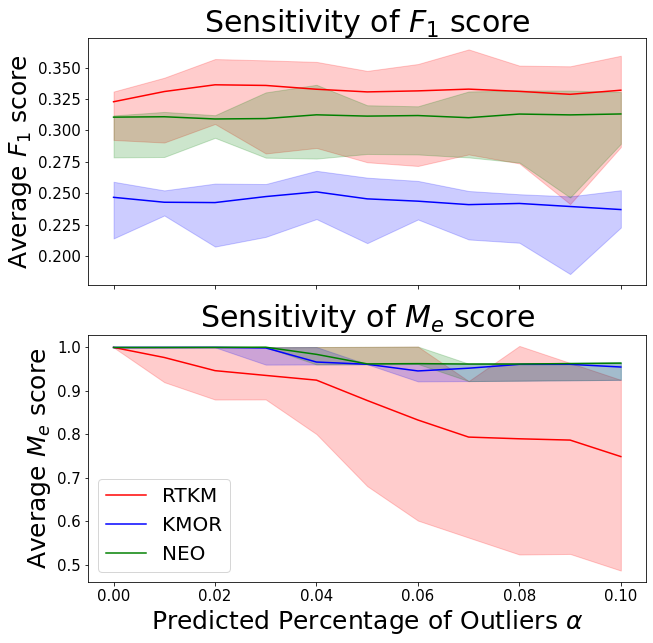

In [2]:
# make_figure('emotions_noise')
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_avg_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_avg_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_avg_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_avg_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_avg_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_avg_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)


# Yeast Plust Noise

Add ~10% noise to the dataset

In [39]:
data = arff.loadarff('datasets/yeast/yeast.arff')
df = pd.DataFrame(data[0])
array = df.to_numpy()
data = np.array(array[:, :-14], dtype = float)
labels = np.array(array[:, -14:], dtype = float)

# Create 10% noise
n,m = data.shape
num_out = 150
k=14

avg_feat_vals = np.average(data, axis = 0)
std_feat_vals = np.std(data, axis =0)

outlier_dat = np.zeros((num_out,m))

for i in range(num_out):
    outlier_dat[i,:] = avg_feat_vals + np.random.rand(m)*3*std_feat_vals
#     outlier_dat[i,:] = np.random.normal(0, 1, m)*.6
    
data_out = np.vstack((data, outlier_dat))


label_col = np.zeros((n+num_out,1))
label_col[-num_out:] = 1

labels_out = np.vstack((labels, np.zeros((num_out,k))) )

labels_out = np.hstack((labels_out, label_col))

#indices of true outliers
true_out = np.arange(1500,1650)
true_labels = labels_out
data = data_out

data = data.T

(2417, 103)


In [56]:
#### Data for latest figures ####
data = np.load('datasets/yeast_noise/data_yeast_noise.npy')
true_labels = np.load('datasets/yeast_noise/labels_yeast_noise.npy')

# data = np.load('datasets/yeast_gaussian_noise/data_yeast_gaussian_noise.npy')
# true_labels = np.load('datasets/yeast_gaussian_noise/labels_yeast_gaussian_noise.npy')

true_out = np.arange(2417,2567)

Text(0.5, 1.0, 'Yeast Dataset Visualized Against Top 2 Principle Components')

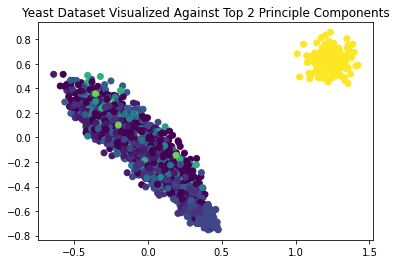

In [57]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:], c = np.argmax(true_labels, axis = 1))
plt.title('Yeast Dataset Visualized Against Top 2 Principle Components')



# Run RTKM

In [75]:
# np.save('yeast_init_centers', init_centers)
# init_centers = np.load('yeast_init_centers.npy')

Iteration 100
Iteration 200
Iteration 300
Iteration 400
PALM reached maximum number of iterations


 Number of true positives:  [348, 452, 568, 347, 282, 264, 139, 180, 0, 19, 43, 771, 725, 0, 149] 

 Number of false positives :  [576, 496, 463, 323, 418, 577, 626, 692, 1, 487, 511, 308, 263, 1, 5] 

 Number of true negatives:  [1229, 1033, 1121, 1382, 1427, 1393, 1513, 1395, 2388, 1827, 1767, 443, 505, 2532, 2412] 

 Number of false negatives:  [414, 586, 415, 515, 440, 333, 289, 300, 178, 234, 246, 1045, 1074, 34, 1] 

 F1 scores for each cluster:  [0.41281139 0.4551863  0.56405164 0.45300261 0.39662447 0.36717663
 0.23302598 0.26627219 0.         0.05006588 0.10201661 0.53264249
 0.52027269 0.         0.98026316] 

 Average F1 score:  0.35556080304515775 

 me score: 0.0069802494325078394


Text(0.5, 1.0, 'Robust Trimmed k Means')

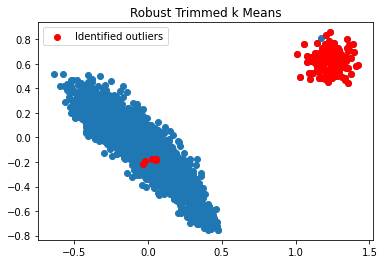

In [77]:
m,n = data.shape
k = 14

RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=14, percent_outliers = 0.06, max_iter =400, num_members = 4, init_centers = None) 
pred_clusters, pred_outliers = RTKM_yeast.return_clusters()

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = RTKM_yeast.weights, pred_outliers = RTKM_yeast.outliers, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c = 'r', label = 'Identified outliers')
# plt.scatter(RTKM_yeast.centers[0,:], RTKM_yeast.centers[1,:], c = 'b', label = 'Calculated Centers')
plt.legend()
plt.title('Robust Trimmed k Means')
#plt.savefig('MyMethodTrimmed')


# Run KMOR



 Number of true positives:  [108, 113, 140, 116, 138, 75, 52, 50, 5, 45, 0, 151, 122, 0, 0] 

 Number of false positives :  [101, 51, 106, 129, 14, 100, 157, 153, 102, 155, 2, 39, 41, 148, 154] 

 Number of true negatives:  [1704, 1478, 1478, 1576, 1831, 1870, 1982, 1934, 2287, 2159, 2276, 712, 727, 2385, 2263] 

 Number of false negatives:  [654, 925, 843, 746, 584, 522, 376, 430, 173, 208, 289, 1665, 1677, 34, 150] 

 F1 scores for each cluster:  [0.22245108 0.18801997 0.2278275  0.20957543 0.31578947 0.19430052
 0.16326531 0.14641288 0.03508772 0.1986755  0.         0.15054835
 0.1243629  0.         0.        ] 

 Average F1 score:  0.1450877751603884 

 me score: 1.002027766968329


Text(0.5, 1.0, 'KMOR')

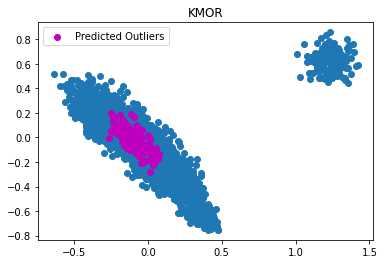

In [72]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=14, percent_outliers= 0.06, gamma = 1, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = pred_labels_KMOR, pred_outliers = pred_outliers_KMOR, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]
plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('KMOR')




# Run NEO

    _pyeval at line 57 column 30

***** iteration: 1, objective: 9590.012440
***** iteration: 2, objective: 9061.784929
***** iteration: 3, objective: 8958.463128
***** iteration: 4, objective: 8909.609637
***** iteration: 5, objective: 8884.988952
***** iteration: 6, objective: 8869.812387
***** iteration: 7, objective: 8861.383411
***** iteration: 8, objective: 8856.317260
***** iteration: 9, objective: 8853.576419
***** iteration: 10, objective: 8851.534465
***** iteration: 11, objective: 8849.748732
***** iteration: 12, objective: 8848.338736
***** iteration: 13, objective: 8847.207336
***** iteration: 14, objective: 8846.392278
***** iteration: 15, objective: 8845.903880
***** iteration: 16, objective: 8845.512322
***** iteration: 17, objective: 8845.257270
***** iteration: 18, objective: 8845.002816
***** iteration: 19, objective: 8844.700145
***** iteration: 20, objective: 8844.158970
***** iteration: 21, objective: 8843.441330
***** iteration: 22, objective: 8842.776954
***** i

Text(0.5, 1.0, 'NEO-k-means')

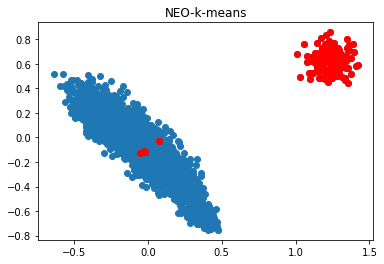

In [78]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=14, percent_outliers=.06, sigma = 3, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = true_labels.T, pred_clusters = pred_labels_NEO, pred_outliers = pred_outliers_NEO, membership_option = 'multi')

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

outliers = np.where(pred_outliers_NEO == 0)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,outliers], Xnew[1,outliers], c= 'r')
plt.title('NEO-k-means')



In [50]:
alpha_vals = np.linspace(0, .10, 11) 

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=14, kmor_gamma= 1, 
                                                                                neo_sigma = 3, path_to_neo='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 50, true_clusters=true_labels.astype(int).T,
                                                                                membership_option= 'multi', rtkm_sigma = 4)
    
    

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9501.286592
***** iteration: 2, objective: 9266.265578
***** iteration: 3, objective: 9227.156494
***** iteration: 4, objective: 9205.867213
***** iteration: 5, objective: 9191.654899
***** iteration: 6, objective: 9181.447684
***** iteration: 7, objective: 9174.419573
***** iteration: 8, objective: 9168.493316
***** iteration: 9, objective: 9163.303820
***** iteration: 10, objective: 9158.985123
***** iteration: 11, objective: 9156.538128
***** iteration: 12, objective: 9155.095157
***** iteration: 13, objective: 9154.301216
***** iteration: 14, objective: 9153.782421
***** iteration: 15, objective: 9153.488836
***** iteration: 16, objective: 9153.327820
***** iteration: 17, objective: 9153.242417
***** iteration: 18, objective: 9153.186433
***** iteration: 19, objective: 9153.131611
***** iteration: 20, objective: 9153.077181
***** iteration: 21, objective: 9153.037686
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9531.600887
***** iteration: 2, objective: 9309.481261
***** iteration: 3, objective: 9274.659903
***** iteration: 4, objective: 9252.145650
***** iteration: 5, objective: 9236.369567
***** iteration: 6, objective: 9225.111509
***** iteration: 7, objective: 9217.838420
***** iteration: 8, objective: 9213.568131
***** iteration: 9, objective: 9210.799889
***** iteration: 10, objective: 9208.432184
***** iteration: 11, objective: 9205.723757
***** iteration: 12, objective: 9202.700712
***** iteration: 13, objective: 9200.968050
***** iteration: 14, objective: 9199.880248
***** iteration: 15, objective: 9199.199108
***** iteration: 16, objective: 9198.878718
***** iteration: 17, objective: 9198.742474
***** iteration: 18, objective: 9198.658621
***** iteration: 19, objective: 9198.629606
***** iteration: 20, objective: 9198.611824
***** iteration: 21, objective: 9198.587993
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9659.558393
***** iteration: 2, objective: 9393.006187
***** iteration: 3, objective: 9363.124674
***** iteration: 4, objective: 9344.169579
***** iteration: 5, objective: 9328.757624
***** iteration: 6, objective: 9313.786467
***** iteration: 7, objective: 9298.460285
***** iteration: 8, objective: 9285.939114
***** iteration: 9, objective: 9274.522378
***** iteration: 10, objective: 9264.098085
***** iteration: 11, objective: 9255.166274
***** iteration: 12, objective: 9249.150157
***** iteration: 13, objective: 9245.634675
***** iteration: 14, objective: 9244.655671
***** iteration: 15, objective: 9244.198530
***** iteration: 16, objective: 9243.995069
***** iteration: 17, objective: 9243.901072
***** iteration: 18, objective: 9243.835397
***** iteration: 19, objective: 9243.792608
***** iteration: 20, objective: 9243.753435
***** iteration: 21, objective: 9243.721082
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9535.533530
***** iteration: 2, objective: 9305.978743
***** iteration: 3, objective: 9267.381954
***** iteration: 4, objective: 9243.837612
***** iteration: 5, objective: 9229.985368
***** iteration: 6, objective: 9220.131440
***** iteration: 7, objective: 9214.650780
***** iteration: 8, objective: 9211.463102
***** iteration: 9, objective: 9208.894272
***** iteration: 10, objective: 9206.340021
***** iteration: 11, objective: 9203.302393
***** iteration: 12, objective: 9201.389486
***** iteration: 13, objective: 9200.216989
***** iteration: 14, objective: 9199.519864
***** iteration: 15, objective: 9199.145675
***** iteration: 16, objective: 9198.953274
***** iteration: 17, objective: 9198.844125
***** iteration: 18, objective: 9198.783459
***** iteration: 19, objective: 9198.714652
***** iteration: 20, objective: 9198.678710
***** iteration: 21, objective: 9198.666251
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9543.478479
***** iteration: 2, objective: 9298.952657
***** iteration: 3, objective: 9261.918414
***** iteration: 4, objective: 9243.785414
***** iteration: 5, objective: 9232.401343
***** iteration: 6, objective: 9223.281373
***** iteration: 7, objective: 9216.924422
***** iteration: 8, objective: 9212.043798
***** iteration: 9, objective: 9207.839140
***** iteration: 10, objective: 9203.546325
***** iteration: 11, objective: 9200.695135
***** iteration: 12, objective: 9199.620970
***** iteration: 13, objective: 9199.116367
***** iteration: 14, objective: 9198.841096
***** iteration: 15, objective: 9198.641020
***** iteration: 16, objective: 9198.436896
***** iteration: 17, objective: 9198.336863
***** iteration: 18, objective: 9198.268128
***** iteration: 19, objective: 9198.211245
***** iteration: 20, objective: 9198.165985
***** iteration: 21, objective: 9198.116099
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9553.515350
***** iteration: 2, objective: 9304.317720
***** iteration: 3, objective: 9267.008007
***** iteration: 4, objective: 9245.329100
***** iteration: 5, objective: 9231.687219
***** iteration: 6, objective: 9221.692499
***** iteration: 7, objective: 9215.433703
***** iteration: 8, objective: 9211.718448
***** iteration: 9, objective: 9208.706994
***** iteration: 10, objective: 9205.628182
***** iteration: 11, objective: 9202.575892
***** iteration: 12, objective: 9200.732985
***** iteration: 13, objective: 9199.823220
***** iteration: 14, objective: 9199.272936
***** iteration: 15, objective: 9198.988781
***** iteration: 16, objective: 9198.879190
***** iteration: 17, objective: 9198.774092
***** iteration: 18, objective: 9198.715526
***** iteration: 19, objective: 9198.682904
***** iteration: 20, objective: 9198.667378
***** iteration: 21, objective: 9198.656534
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9547.749551
***** iteration: 2, objective: 9306.799853
***** iteration: 3, objective: 9268.026692
***** iteration: 4, objective: 9245.937725
***** iteration: 5, objective: 9232.543652
***** iteration: 6, objective: 9222.966376
***** iteration: 7, objective: 9216.775093
***** iteration: 8, objective: 9212.930512
***** iteration: 9, objective: 9210.083508
***** iteration: 10, objective: 9207.419103
***** iteration: 11, objective: 9204.492282
***** iteration: 12, objective: 9201.820399
***** iteration: 13, objective: 9200.432477
***** iteration: 14, objective: 9199.589576
***** iteration: 15, objective: 9199.190786
***** iteration: 16, objective: 9198.965953
***** iteration: 17, objective: 9198.857080
***** iteration: 18, objective: 9198.787094
***** iteration: 19, objective: 9198.706247
***** iteration: 20, objective: 9198.677149
***** iteration: 21, objective: 9198.655905
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9556.025551
***** iteration: 2, objective: 9278.227267
***** iteration: 3, objective: 9245.126540
***** iteration: 4, objective: 9220.911752
***** iteration: 5, objective: 9198.089826
***** iteration: 6, objective: 9179.551733
***** iteration: 7, objective: 9162.889892
***** iteration: 8, objective: 9148.063350
***** iteration: 9, objective: 9138.590645
***** iteration: 10, objective: 9132.159786
***** iteration: 11, objective: 9127.531145
***** iteration: 12, objective: 9125.467407
***** iteration: 13, objective: 9124.747164
***** iteration: 14, objective: 9124.580257
***** iteration: 15, objective: 9124.470028
***** iteration: 16, objective: 9124.377584
***** iteration: 17, objective: 9124.307482
***** iteration: 18, objective: 9124.238071
***** iteration: 19, objective: 9124.202291
***** iteration: 20, objective: 9124.182294
***** iteration: 21, objective: 9124.155380
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9523.656346
***** iteration: 2, objective: 9312.796796
***** iteration: 3, objective: 9272.277809
***** iteration: 4, objective: 9247.963842
***** iteration: 5, objective: 9233.208709
***** iteration: 6, objective: 9223.611945
***** iteration: 7, objective: 9216.829434
***** iteration: 8, objective: 9212.696213
***** iteration: 9, objective: 9209.741465
***** iteration: 10, objective: 9206.947403
***** iteration: 11, objective: 9203.872374
***** iteration: 12, objective: 9201.241322
***** iteration: 13, objective: 9199.994261
***** iteration: 14, objective: 9199.267152
***** iteration: 15, objective: 9198.856641
***** iteration: 16, objective: 9198.624949
***** iteration: 17, objective: 9198.512556
***** iteration: 18, objective: 9198.436908
***** iteration: 19, objective: 9198.407139
***** iteration: 20, objective: 9198.391453
***** iteration: 21, objective: 9198.382480
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9534.758855
***** iteration: 2, objective: 9304.796795
***** iteration: 3, objective: 9265.424101
***** iteration: 4, objective: 9241.883877
***** iteration: 5, objective: 9228.127453
***** iteration: 6, objective: 9219.402045
***** iteration: 7, objective: 9214.275798
***** iteration: 8, objective: 9211.055306
***** iteration: 9, objective: 9209.241009
***** iteration: 10, objective: 9207.146705
***** iteration: 11, objective: 9204.695234
***** iteration: 12, objective: 9202.021055
***** iteration: 13, objective: 9200.663106
***** iteration: 14, objective: 9199.707419
***** iteration: 15, objective: 9199.186858
***** iteration: 16, objective: 9198.908614
***** iteration: 17, objective: 9198.721896
***** iteration: 18, objective: 9198.604692
***** iteration: 19, objective: 9198.507347
***** iteration: 20, objective: 9198.429023
***** iteration: 21, objective: 9198.407586
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9515.597171
***** iteration: 2, objective: 9308.452941
***** iteration: 3, objective: 9269.042493
***** iteration: 4, objective: 9245.322107
***** iteration: 5, objective: 9228.868162
***** iteration: 6, objective: 9219.744284
***** iteration: 7, objective: 9213.738170
***** iteration: 8, objective: 9210.591933
***** iteration: 9, objective: 9208.546117
***** iteration: 10, objective: 9206.357218
***** iteration: 11, objective: 9203.714008
***** iteration: 12, objective: 9201.526121
***** iteration: 13, objective: 9200.425299
***** iteration: 14, objective: 9199.654558
***** iteration: 15, objective: 9199.239862
***** iteration: 16, objective: 9198.973727
***** iteration: 17, objective: 9198.788896
***** iteration: 18, objective: 9198.646126
***** iteration: 19, objective: 9198.516210
***** iteration: 20, objective: 9198.437252
***** iteration: 21, objective: 9198.405558
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9558.961656
***** iteration: 2, objective: 9302.299307
***** iteration: 3, objective: 9268.756387
***** iteration: 4, objective: 9248.663906
***** iteration: 5, objective: 9234.018619
***** iteration: 6, objective: 9223.061090
***** iteration: 7, objective: 9214.633650
***** iteration: 8, objective: 9207.558120
***** iteration: 9, objective: 9202.806454
***** iteration: 10, objective: 9200.849166
***** iteration: 11, objective: 9199.970307
***** iteration: 12, objective: 9199.428689
***** iteration: 13, objective: 9199.062042
***** iteration: 14, objective: 9198.764296
***** iteration: 15, objective: 9198.591232
***** iteration: 16, objective: 9198.473797
***** iteration: 17, objective: 9198.360956
***** iteration: 18, objective: 9198.282853
***** iteration: 19, objective: 9198.233758
***** iteration: 20, objective: 9198.181853
***** iteration: 21, objective: 9198.147819
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9534.154412
***** iteration: 2, objective: 9295.030391
***** iteration: 3, objective: 9261.025289
***** iteration: 4, objective: 9244.326777
***** iteration: 5, objective: 9233.289842
***** iteration: 6, objective: 9225.932661
***** iteration: 7, objective: 9219.820969
***** iteration: 8, objective: 9214.559500
***** iteration: 9, objective: 9209.529826
***** iteration: 10, objective: 9204.629351
***** iteration: 11, objective: 9201.485211
***** iteration: 12, objective: 9199.979551
***** iteration: 13, objective: 9199.120372
***** iteration: 14, objective: 9198.611148
***** iteration: 15, objective: 9198.329619
***** iteration: 16, objective: 9198.154869
***** iteration: 17, objective: 9198.011070
***** iteration: 18, objective: 9197.904467
***** iteration: 19, objective: 9197.850560
***** iteration: 20, objective: 9197.815412
***** iteration: 21, objective: 9197.777801
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9538.914830
***** iteration: 2, objective: 9311.416704
***** iteration: 3, objective: 9275.016213
***** iteration: 4, objective: 9251.246173
***** iteration: 5, objective: 9234.297731
***** iteration: 6, objective: 9220.409733
***** iteration: 7, objective: 9206.683211
***** iteration: 8, objective: 9195.712372
***** iteration: 9, objective: 9187.406329
***** iteration: 10, objective: 9181.357324
***** iteration: 11, objective: 9177.384882
***** iteration: 12, objective: 9174.842416
***** iteration: 13, objective: 9172.806553
***** iteration: 14, objective: 9172.152562
***** iteration: 15, objective: 9171.840126
***** iteration: 16, objective: 9171.577479
***** iteration: 17, objective: 9171.383727
***** iteration: 18, objective: 9171.267050
***** iteration: 19, objective: 9171.209755
***** iteration: 20, objective: 9171.168555
***** iteration: 21, objective: 9171.132927
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9496.414010
***** iteration: 2, objective: 9261.021189
***** iteration: 3, objective: 9225.388512
***** iteration: 4, objective: 9202.114627
***** iteration: 5, objective: 9186.426872
***** iteration: 6, objective: 9176.747559
***** iteration: 7, objective: 9170.643759
***** iteration: 8, objective: 9167.078663
***** iteration: 9, objective: 9164.486165
***** iteration: 10, objective: 9162.070222
***** iteration: 11, objective: 9159.373906
***** iteration: 12, objective: 9156.777622
***** iteration: 13, objective: 9155.378592
***** iteration: 14, objective: 9154.514472
***** iteration: 15, objective: 9154.009581
***** iteration: 16, objective: 9153.761584
***** iteration: 17, objective: 9153.601226
***** iteration: 18, objective: 9153.463767
***** iteration: 19, objective: 9153.383782
***** iteration: 20, objective: 9153.329855
***** iteration: 21, objective: 9153.277067
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9484.080366
***** iteration: 2, objective: 9263.561111
***** iteration: 3, objective: 9222.642443
***** iteration: 4, objective: 9197.248885
***** iteration: 5, objective: 9182.888518
***** iteration: 6, objective: 9174.155618
***** iteration: 7, objective: 9169.350473
***** iteration: 8, objective: 9166.138758
***** iteration: 9, objective: 9164.123555
***** iteration: 10, objective: 9162.643404
***** iteration: 11, objective: 9160.755673
***** iteration: 12, objective: 9158.436013
***** iteration: 13, objective: 9156.116249
***** iteration: 14, objective: 9154.982909
***** iteration: 15, objective: 9154.193016
***** iteration: 16, objective: 9153.719763
***** iteration: 17, objective: 9153.415954
***** iteration: 18, objective: 9153.252588
***** iteration: 19, objective: 9153.128269
***** iteration: 20, objective: 9153.063193
***** iteration: 21, objective: 9153.030557
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9540.133839
***** iteration: 2, objective: 9288.149948
***** iteration: 3, objective: 9257.214109
***** iteration: 4, objective: 9243.819843
***** iteration: 5, objective: 9235.387792
***** iteration: 6, objective: 9229.330765
***** iteration: 7, objective: 9224.123862
***** iteration: 8, objective: 9218.984180
***** iteration: 9, objective: 9214.631057
***** iteration: 10, objective: 9210.332941
***** iteration: 11, objective: 9205.698262
***** iteration: 12, objective: 9201.938366
***** iteration: 13, objective: 9200.231861
***** iteration: 14, objective: 9199.473965
***** iteration: 15, objective: 9199.021031
***** iteration: 16, objective: 9198.728322
***** iteration: 17, objective: 9198.445982
***** iteration: 18, objective: 9198.193932
***** iteration: 19, objective: 9198.064229
***** iteration: 20, objective: 9198.025198
***** iteration: 21, objective: 9197.993975
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9524.064804
***** iteration: 2, objective: 9258.750813
***** iteration: 3, objective: 9219.125526
***** iteration: 4, objective: 9197.467583
***** iteration: 5, objective: 9182.950380
***** iteration: 6, objective: 9173.785449
***** iteration: 7, objective: 9168.038084
***** iteration: 8, objective: 9164.801442
***** iteration: 9, objective: 9162.946268
***** iteration: 10, objective: 9160.981509
***** iteration: 11, objective: 9158.704589
***** iteration: 12, objective: 9156.153325
***** iteration: 13, objective: 9154.971005
***** iteration: 14, objective: 9154.338571
***** iteration: 15, objective: 9153.830880
***** iteration: 16, objective: 9153.516105
***** iteration: 17, objective: 9153.322203
***** iteration: 18, objective: 9153.226959
***** iteration: 19, objective: 9153.170716
***** iteration: 20, objective: 9153.135538
***** iteration: 21, objective: 9153.100715
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9489.416556
***** iteration: 2, objective: 9267.076348
***** iteration: 3, objective: 9225.112026
***** iteration: 4, objective: 9200.084480
***** iteration: 5, objective: 9185.461802
***** iteration: 6, objective: 9176.237572
***** iteration: 7, objective: 9170.240965
***** iteration: 8, objective: 9166.422549
***** iteration: 9, objective: 9164.264166
***** iteration: 10, objective: 9162.975261
***** iteration: 11, objective: 9161.255682
***** iteration: 12, objective: 9159.084249
***** iteration: 13, objective: 9156.543422
***** iteration: 14, objective: 9155.154572
***** iteration: 15, objective: 9154.292032
***** iteration: 16, objective: 9153.828230
***** iteration: 17, objective: 9153.540039
***** iteration: 18, objective: 9153.386419
***** iteration: 19, objective: 9153.254070
***** iteration: 20, objective: 9153.178691
***** iteration: 21, objective: 9153.127548
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9568.712610
***** iteration: 2, objective: 9307.531681
***** iteration: 3, objective: 9269.671053
***** iteration: 4, objective: 9248.391505
***** iteration: 5, objective: 9233.944507
***** iteration: 6, objective: 9222.765880
***** iteration: 7, objective: 9213.195552
***** iteration: 8, objective: 9206.944255
***** iteration: 9, objective: 9203.340599
***** iteration: 10, objective: 9201.518759
***** iteration: 11, objective: 9200.641062
***** iteration: 12, objective: 9200.088881
***** iteration: 13, objective: 9199.680501
***** iteration: 14, objective: 9199.356159
***** iteration: 15, objective: 9199.157479
***** iteration: 16, objective: 9199.014361
***** iteration: 17, objective: 9198.906299
***** iteration: 18, objective: 9198.814268
***** iteration: 19, objective: 9198.748342
***** iteration: 20, objective: 9198.699142
***** iteration: 21, objective: 9198.662066
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9481.166874
***** iteration: 2, objective: 9262.434833
***** iteration: 3, objective: 9220.559301
***** iteration: 4, objective: 9198.368656
***** iteration: 5, objective: 9185.205395
***** iteration: 6, objective: 9175.978505
***** iteration: 7, objective: 9170.492290
***** iteration: 8, objective: 9166.974905
***** iteration: 9, objective: 9164.547482
***** iteration: 10, objective: 9162.161563
***** iteration: 11, objective: 9159.676140
***** iteration: 12, objective: 9156.891680
***** iteration: 13, objective: 9155.434849
***** iteration: 14, objective: 9154.475592
***** iteration: 15, objective: 9153.946665
***** iteration: 16, objective: 9153.651535
***** iteration: 17, objective: 9153.467884
***** iteration: 18, objective: 9153.323294
***** iteration: 19, objective: 9153.230961
***** iteration: 20, objective: 9153.143717
***** iteration: 21, objective: 9153.077268
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9621.243200
***** iteration: 2, objective: 9390.890070
***** iteration: 3, objective: 9364.557073
***** iteration: 4, objective: 9345.696492
***** iteration: 5, objective: 9321.462534
***** iteration: 6, objective: 9294.159326
***** iteration: 7, objective: 9266.706554
***** iteration: 8, objective: 9243.687697
***** iteration: 9, objective: 9226.549457
***** iteration: 10, objective: 9214.960379
***** iteration: 11, objective: 9207.976123
***** iteration: 12, objective: 9203.357241
***** iteration: 13, objective: 9199.719023
***** iteration: 14, objective: 9196.978181
***** iteration: 15, objective: 9195.549222
***** iteration: 16, objective: 9194.855626
***** iteration: 17, objective: 9194.570527
***** iteration: 18, objective: 9194.354665
***** iteration: 19, objective: 9194.154867
***** iteration: 20, objective: 9194.050173
***** iteration: 21, objective: 9194.005426
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9523.064115
***** iteration: 2, objective: 9263.769911
***** iteration: 3, objective: 9220.164181
***** iteration: 4, objective: 9197.223780
***** iteration: 5, objective: 9183.678837
***** iteration: 6, objective: 9174.981362
***** iteration: 7, objective: 9169.982278
***** iteration: 8, objective: 9166.571315
***** iteration: 9, objective: 9164.327404
***** iteration: 10, objective: 9162.861735
***** iteration: 11, objective: 9160.911982
***** iteration: 12, objective: 9158.583395
***** iteration: 13, objective: 9156.213872
***** iteration: 14, objective: 9155.062552
***** iteration: 15, objective: 9154.229662
***** iteration: 16, objective: 9153.699433
***** iteration: 17, objective: 9153.410940
***** iteration: 18, objective: 9153.240229
***** iteration: 19, objective: 9153.115332
***** iteration: 20, objective: 9153.053616
***** iteration: 21, objective: 9153.023973
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9530.075957
***** iteration: 2, objective: 9262.046836
***** iteration: 3, objective: 9220.752339
***** iteration: 4, objective: 9198.365940
***** iteration: 5, objective: 9185.363823
***** iteration: 6, objective: 9175.983082
***** iteration: 7, objective: 9170.394418
***** iteration: 8, objective: 9166.925148
***** iteration: 9, objective: 9164.623230
***** iteration: 10, objective: 9162.676390
***** iteration: 11, objective: 9160.540211
***** iteration: 12, objective: 9157.868850
***** iteration: 13, objective: 9156.033890
***** iteration: 14, objective: 9154.941198
***** iteration: 15, objective: 9154.215550
***** iteration: 16, objective: 9153.793905
***** iteration: 17, objective: 9153.541141
***** iteration: 18, objective: 9153.358076
***** iteration: 19, objective: 9153.263404
***** iteration: 20, objective: 9153.240472
***** iteration: 21, objective: 9153.233513
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9535.281226
***** iteration: 2, objective: 9303.152040
***** iteration: 3, objective: 9264.917314
***** iteration: 4, objective: 9245.566394
***** iteration: 5, objective: 9233.767413
***** iteration: 6, objective: 9224.992134
***** iteration: 7, objective: 9217.734380
***** iteration: 8, objective: 9212.705557
***** iteration: 9, objective: 9208.739764
***** iteration: 10, objective: 9204.819895
***** iteration: 11, objective: 9201.424662
***** iteration: 12, objective: 9199.579195
***** iteration: 13, objective: 9198.936710
***** iteration: 14, objective: 9198.714108
***** iteration: 15, objective: 9198.559406
***** iteration: 16, objective: 9198.428642
***** iteration: 17, objective: 9198.291600
***** iteration: 18, objective: 9198.170411
***** iteration: 19, objective: 9198.063308
***** iteration: 20, objective: 9197.980527
***** iteration: 21, objective: 9197.936217
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9530.244501
***** iteration: 2, objective: 9300.091948
***** iteration: 3, objective: 9261.963114
***** iteration: 4, objective: 9240.697350
***** iteration: 5, objective: 9227.608669
***** iteration: 6, objective: 9219.323551
***** iteration: 7, objective: 9214.519542
***** iteration: 8, objective: 9211.535138
***** iteration: 9, objective: 9209.603652
***** iteration: 10, objective: 9207.783329
***** iteration: 11, objective: 9205.445095
***** iteration: 12, objective: 9202.707946
***** iteration: 13, objective: 9200.918979
***** iteration: 14, objective: 9199.864067
***** iteration: 15, objective: 9199.231853
***** iteration: 16, objective: 9198.860609
***** iteration: 17, objective: 9198.628273
***** iteration: 18, objective: 9198.518941
***** iteration: 19, objective: 9198.434610
***** iteration: 20, objective: 9198.400437
***** iteration: 21, objective: 9198.375091
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9545.072279
***** iteration: 2, objective: 9298.623015
***** iteration: 3, objective: 9263.446349
***** iteration: 4, objective: 9241.428325
***** iteration: 5, objective: 9226.264593
***** iteration: 6, objective: 9218.312214
***** iteration: 7, objective: 9212.925553
***** iteration: 8, objective: 9210.182343
***** iteration: 9, objective: 9208.316325
***** iteration: 10, objective: 9206.234722
***** iteration: 11, objective: 9203.649060
***** iteration: 12, objective: 9201.450453
***** iteration: 13, objective: 9200.405406
***** iteration: 14, objective: 9199.772668
***** iteration: 15, objective: 9199.354369
***** iteration: 16, objective: 9199.091321
***** iteration: 17, objective: 9198.892770
***** iteration: 18, objective: 9198.741838
***** iteration: 19, objective: 9198.647420
***** iteration: 20, objective: 9198.577623
***** iteration: 21, objective: 9198.515590
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9551.404992
***** iteration: 2, objective: 9296.759697
***** iteration: 3, objective: 9262.579898
***** iteration: 4, objective: 9244.855328
***** iteration: 5, objective: 9233.766483
***** iteration: 6, objective: 9224.948327
***** iteration: 7, objective: 9217.192241
***** iteration: 8, objective: 9211.867415
***** iteration: 9, objective: 9207.324690
***** iteration: 10, objective: 9203.094612
***** iteration: 11, objective: 9200.366539
***** iteration: 12, objective: 9199.131257
***** iteration: 13, objective: 9198.715112
***** iteration: 14, objective: 9198.525954
***** iteration: 15, objective: 9198.354903
***** iteration: 16, objective: 9198.258612
***** iteration: 17, objective: 9198.199250
***** iteration: 18, objective: 9198.153243
***** iteration: 19, objective: 9198.118476
***** iteration: 20, objective: 9198.081075
***** iteration: 21, objective: 9198.050282
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9549.021038
***** iteration: 2, objective: 9309.617668
***** iteration: 3, objective: 9269.724761
***** iteration: 4, objective: 9247.913589
***** iteration: 5, objective: 9234.052340
***** iteration: 6, objective: 9224.780751
***** iteration: 7, objective: 9218.300777
***** iteration: 8, objective: 9212.305916
***** iteration: 9, objective: 9207.137835
***** iteration: 10, objective: 9203.731030
***** iteration: 11, objective: 9201.412560
***** iteration: 12, objective: 9200.013651
***** iteration: 13, objective: 9199.289646
***** iteration: 14, objective: 9198.893966
***** iteration: 15, objective: 9198.732226
***** iteration: 16, objective: 9198.660608
***** iteration: 17, objective: 9198.608506
***** iteration: 18, objective: 9198.539949
***** iteration: 19, objective: 9198.477856
***** iteration: 20, objective: 9198.444352
***** iteration: 21, objective: 9198.422317
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9555.809543
***** iteration: 2, objective: 9301.694770
***** iteration: 3, objective: 9267.010948
***** iteration: 4, objective: 9247.074339
***** iteration: 5, objective: 9232.835192
***** iteration: 6, objective: 9223.161488
***** iteration: 7, objective: 9216.074346
***** iteration: 8, objective: 9209.416484
***** iteration: 9, objective: 9204.501064
***** iteration: 10, objective: 9202.209303
***** iteration: 11, objective: 9201.061966
***** iteration: 12, objective: 9200.185339
***** iteration: 13, objective: 9199.637822
***** iteration: 14, objective: 9199.193809
***** iteration: 15, objective: 9198.848902
***** iteration: 16, objective: 9198.607336
***** iteration: 17, objective: 9198.444043
***** iteration: 18, objective: 9198.332520
***** iteration: 19, objective: 9198.261662
***** iteration: 20, objective: 9198.202379
***** iteration: 21, objective: 9198.150101
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9521.597330
***** iteration: 2, objective: 9304.991474
***** iteration: 3, objective: 9270.920598
***** iteration: 4, objective: 9249.498482
***** iteration: 5, objective: 9233.449319
***** iteration: 6, objective: 9222.799451
***** iteration: 7, objective: 9215.662404
***** iteration: 8, objective: 9211.354710
***** iteration: 9, objective: 9208.466914
***** iteration: 10, objective: 9205.829190
***** iteration: 11, objective: 9203.081839
***** iteration: 12, objective: 9201.114898
***** iteration: 13, objective: 9200.148843
***** iteration: 14, objective: 9199.394960
***** iteration: 15, objective: 9198.973956
***** iteration: 16, objective: 9198.772885
***** iteration: 17, objective: 9198.613503
***** iteration: 18, objective: 9198.537760
***** iteration: 19, objective: 9198.470879
***** iteration: 20, objective: 9198.396313
***** iteration: 21, objective: 9198.358029
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9542.061977
***** iteration: 2, objective: 9292.030034
***** iteration: 3, objective: 9265.135914
***** iteration: 4, objective: 9247.443621
***** iteration: 5, objective: 9233.792568
***** iteration: 6, objective: 9223.583361
***** iteration: 7, objective: 9215.266719
***** iteration: 8, objective: 9208.652098
***** iteration: 9, objective: 9203.975974
***** iteration: 10, objective: 9200.172543
***** iteration: 11, objective: 9197.252805
***** iteration: 12, objective: 9195.065755
***** iteration: 13, objective: 9193.091469
***** iteration: 14, objective: 9191.157562
***** iteration: 15, objective: 9189.130066
***** iteration: 16, objective: 9187.387322
***** iteration: 17, objective: 9186.477887
***** iteration: 18, objective: 9185.907845
***** iteration: 19, objective: 9185.468606
***** iteration: 20, objective: 9185.178873
***** iteration: 21, objective: 9184.964005
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9531.246612
***** iteration: 2, objective: 9297.608122
***** iteration: 3, objective: 9263.758740
***** iteration: 4, objective: 9244.389863
***** iteration: 5, objective: 9232.936385
***** iteration: 6, objective: 9224.870097
***** iteration: 7, objective: 9217.686031
***** iteration: 8, objective: 9210.401412
***** iteration: 9, objective: 9204.945247
***** iteration: 10, objective: 9202.325754
***** iteration: 11, objective: 9200.950690
***** iteration: 12, objective: 9200.198118
***** iteration: 13, objective: 9199.753075
***** iteration: 14, objective: 9199.363691
***** iteration: 15, objective: 9199.118338
***** iteration: 16, objective: 9198.936150
***** iteration: 17, objective: 9198.752974
***** iteration: 18, objective: 9198.554469
***** iteration: 19, objective: 9198.309044
***** iteration: 20, objective: 9198.158536
***** iteration: 21, objective: 9198.067928
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9631.143442
***** iteration: 2, objective: 9385.609071
***** iteration: 3, objective: 9338.986231
***** iteration: 4, objective: 9308.001578
***** iteration: 5, objective: 9286.111269
***** iteration: 6, objective: 9270.952096
***** iteration: 7, objective: 9260.411051
***** iteration: 8, objective: 9253.121060
***** iteration: 9, objective: 9248.601076
***** iteration: 10, objective: 9246.614076
***** iteration: 11, objective: 9245.528000
***** iteration: 12, objective: 9245.007924
***** iteration: 13, objective: 9244.729248
***** iteration: 14, objective: 9244.544578
***** iteration: 15, objective: 9244.427864
***** iteration: 16, objective: 9244.355286
***** iteration: 17, objective: 9244.306163
***** iteration: 18, objective: 9244.264400
***** iteration: 19, objective: 9244.206256
***** iteration: 20, objective: 9244.135303
***** iteration: 21, objective: 9244.056829
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9595.757533
***** iteration: 2, objective: 9334.670773
***** iteration: 3, objective: 9298.977929
***** iteration: 4, objective: 9272.190232
***** iteration: 5, objective: 9249.602988
***** iteration: 6, objective: 9232.375748
***** iteration: 7, objective: 9220.208024
***** iteration: 8, objective: 9211.132519
***** iteration: 9, objective: 9205.028640
***** iteration: 10, objective: 9202.056246
***** iteration: 11, objective: 9200.689647
***** iteration: 12, objective: 9199.938031
***** iteration: 13, objective: 9199.454642
***** iteration: 14, objective: 9199.174776
***** iteration: 15, objective: 9199.005918
***** iteration: 16, objective: 9198.865247
***** iteration: 17, objective: 9198.763764
***** iteration: 18, objective: 9198.679219
***** iteration: 19, objective: 9198.605779
***** iteration: 20, objective: 9198.552897
***** iteration: 21, objective: 9198.505398
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9494.843123
***** iteration: 2, objective: 9304.880239
***** iteration: 3, objective: 9275.142638
***** iteration: 4, objective: 9257.907767
***** iteration: 5, objective: 9243.671812
***** iteration: 6, objective: 9233.177176
***** iteration: 7, objective: 9225.861620
***** iteration: 8, objective: 9221.656802
***** iteration: 9, objective: 9219.255779
***** iteration: 10, objective: 9217.691311
***** iteration: 11, objective: 9215.829723
***** iteration: 12, objective: 9211.299198
***** iteration: 13, objective: 9203.653248
***** iteration: 14, objective: 9196.367631
***** iteration: 15, objective: 9189.385926
***** iteration: 16, objective: 9183.569443
***** iteration: 17, objective: 9179.379402
***** iteration: 18, objective: 9176.386521
***** iteration: 19, objective: 9174.121593
***** iteration: 20, objective: 9172.505444
***** iteration: 21, objective: 9172.005773
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9455.290255
***** iteration: 2, objective: 9258.652478
***** iteration: 3, objective: 9221.281005
***** iteration: 4, objective: 9197.581586
***** iteration: 5, objective: 9178.444552
***** iteration: 6, objective: 9162.618225
***** iteration: 7, objective: 9149.774617
***** iteration: 8, objective: 9140.301024
***** iteration: 9, objective: 9134.494231
***** iteration: 10, objective: 9130.652867
***** iteration: 11, objective: 9127.884267
***** iteration: 12, objective: 9126.195341
***** iteration: 13, objective: 9125.717469
***** iteration: 14, objective: 9125.510627
***** iteration: 15, objective: 9125.305957
***** iteration: 16, objective: 9125.177137
***** iteration: 17, objective: 9125.097592
***** iteration: 18, objective: 9125.033743
***** iteration: 19, objective: 9124.973177
***** iteration: 20, objective: 9124.932411
***** iteration: 21, objective: 9124.896910
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9533.372145
***** iteration: 2, objective: 9310.474957
***** iteration: 3, objective: 9271.999864
***** iteration: 4, objective: 9248.168663
***** iteration: 5, objective: 9234.543941
***** iteration: 6, objective: 9224.886306
***** iteration: 7, objective: 9217.872911
***** iteration: 8, objective: 9213.280751
***** iteration: 9, objective: 9209.567021
***** iteration: 10, objective: 9206.123702
***** iteration: 11, objective: 9202.482326
***** iteration: 12, objective: 9200.510560
***** iteration: 13, objective: 9199.541993
***** iteration: 14, objective: 9199.036197
***** iteration: 15, objective: 9198.884336
***** iteration: 16, objective: 9198.772627
***** iteration: 17, objective: 9198.716328
***** iteration: 18, objective: 9198.702106
***** iteration: 19, objective: 9198.687162
***** iteration: 20, objective: 9198.666819
***** iteration: 21, objective: 9198.646480
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9635.078325
***** iteration: 2, objective: 9386.242436
***** iteration: 3, objective: 9357.836195
***** iteration: 4, objective: 9342.200092
***** iteration: 5, objective: 9331.110038
***** iteration: 6, objective: 9322.681275
***** iteration: 7, objective: 9312.959049
***** iteration: 8, objective: 9302.710995
***** iteration: 9, objective: 9290.751166
***** iteration: 10, objective: 9277.149574
***** iteration: 11, objective: 9265.067582
***** iteration: 12, objective: 9255.694903
***** iteration: 13, objective: 9250.132135
***** iteration: 14, objective: 9247.376458
***** iteration: 15, objective: 9245.813854
***** iteration: 16, objective: 9245.033029
***** iteration: 17, objective: 9244.614894
***** iteration: 18, objective: 9244.444182
***** iteration: 19, objective: 9244.364221
***** iteration: 20, objective: 9244.300078
***** iteration: 21, objective: 9244.240917
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9558.118052
***** iteration: 2, objective: 9299.442245
***** iteration: 3, objective: 9262.707181
***** iteration: 4, objective: 9243.239159
***** iteration: 5, objective: 9230.859759
***** iteration: 6, objective: 9220.640682
***** iteration: 7, objective: 9213.813493
***** iteration: 8, objective: 9209.431848
***** iteration: 9, objective: 9205.752556
***** iteration: 10, objective: 9202.544389
***** iteration: 11, objective: 9200.914951
***** iteration: 12, objective: 9200.000699
***** iteration: 13, objective: 9199.407024
***** iteration: 14, objective: 9199.115098
***** iteration: 15, objective: 9198.935048
***** iteration: 16, objective: 9198.825222
***** iteration: 17, objective: 9198.766198
***** iteration: 18, objective: 9198.716680
***** iteration: 19, objective: 9198.650944
***** iteration: 20, objective: 9198.610412
***** iteration: 21, objective: 9198.586419
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9470.372652
***** iteration: 2, objective: 9258.076116
***** iteration: 3, objective: 9221.618191
***** iteration: 4, objective: 9197.767120
***** iteration: 5, objective: 9184.085233
***** iteration: 6, objective: 9175.051944
***** iteration: 7, objective: 9169.997186
***** iteration: 8, objective: 9166.752874
***** iteration: 9, objective: 9164.510617
***** iteration: 10, objective: 9163.076980
***** iteration: 11, objective: 9161.296820
***** iteration: 12, objective: 9158.925902
***** iteration: 13, objective: 9156.447221
***** iteration: 14, objective: 9155.023318
***** iteration: 15, objective: 9154.191475
***** iteration: 16, objective: 9153.723475
***** iteration: 17, objective: 9153.436074
***** iteration: 18, objective: 9153.285313
***** iteration: 19, objective: 9153.189804
***** iteration: 20, objective: 9153.137598
***** iteration: 21, objective: 9153.088370
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9544.411567
***** iteration: 2, objective: 9301.627802
***** iteration: 3, objective: 9265.243851
***** iteration: 4, objective: 9242.516244
***** iteration: 5, objective: 9228.061132
***** iteration: 6, objective: 9219.132897
***** iteration: 7, objective: 9213.372981
***** iteration: 8, objective: 9210.390923
***** iteration: 9, objective: 9208.314650
***** iteration: 10, objective: 9205.841326
***** iteration: 11, objective: 9202.777188
***** iteration: 12, objective: 9201.043038
***** iteration: 13, objective: 9199.980310
***** iteration: 14, objective: 9199.364809
***** iteration: 15, objective: 9199.016122
***** iteration: 16, objective: 9198.786269
***** iteration: 17, objective: 9198.620066
***** iteration: 18, objective: 9198.512364
***** iteration: 19, objective: 9198.450478
***** iteration: 20, objective: 9198.414298
***** iteration: 21, objective: 9198.396945
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9584.514293
***** iteration: 2, objective: 9341.974490
***** iteration: 3, objective: 9304.941382
***** iteration: 4, objective: 9274.987158
***** iteration: 5, objective: 9251.460894
***** iteration: 6, objective: 9233.486741
***** iteration: 7, objective: 9220.783027
***** iteration: 8, objective: 9210.621045
***** iteration: 9, objective: 9204.408174
***** iteration: 10, objective: 9201.850876
***** iteration: 11, objective: 9200.677273
***** iteration: 12, objective: 9199.947796
***** iteration: 13, objective: 9199.471535
***** iteration: 14, objective: 9199.200807
***** iteration: 15, objective: 9199.049034
***** iteration: 16, objective: 9198.968267
***** iteration: 17, objective: 9198.901306
***** iteration: 18, objective: 9198.833974
***** iteration: 19, objective: 9198.769267
***** iteration: 20, objective: 9198.704577
***** iteration: 21, objective: 9198.654889
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9559.803694
***** iteration: 2, objective: 9314.426569
***** iteration: 3, objective: 9274.892409
***** iteration: 4, objective: 9252.199842
***** iteration: 5, objective: 9236.692532
***** iteration: 6, objective: 9226.547135
***** iteration: 7, objective: 9218.873885
***** iteration: 8, objective: 9212.351952
***** iteration: 9, objective: 9207.743039
***** iteration: 10, objective: 9204.791152
***** iteration: 11, objective: 9202.660544
***** iteration: 12, objective: 9201.217251
***** iteration: 13, objective: 9200.293509
***** iteration: 14, objective: 9199.715788
***** iteration: 15, objective: 9199.331494
***** iteration: 16, objective: 9199.106215
***** iteration: 17, objective: 9198.944504
***** iteration: 18, objective: 9198.800145
***** iteration: 19, objective: 9198.664996
***** iteration: 20, objective: 9198.559271
***** iteration: 21, objective: 9198.487468
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9556.794549
***** iteration: 2, objective: 9313.893416
***** iteration: 3, objective: 9273.298537
***** iteration: 4, objective: 9248.803926
***** iteration: 5, objective: 9233.254340
***** iteration: 6, objective: 9223.793504
***** iteration: 7, objective: 9217.420046
***** iteration: 8, objective: 9213.161327
***** iteration: 9, objective: 9209.967190
***** iteration: 10, objective: 9206.780383
***** iteration: 11, objective: 9203.352680
***** iteration: 12, objective: 9201.339113
***** iteration: 13, objective: 9200.064600
***** iteration: 14, objective: 9199.283662
***** iteration: 15, objective: 9198.902761
***** iteration: 16, objective: 9198.757854
***** iteration: 17, objective: 9198.674251
***** iteration: 18, objective: 9198.634130
***** iteration: 19, objective: 9198.615132
***** iteration: 20, objective: 9198.598358
***** iteration: 21, objective: 9198.587745
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9719.150664
***** iteration: 2, objective: 9414.836829
***** iteration: 3, objective: 9387.628798
***** iteration: 4, objective: 9370.917894
***** iteration: 5, objective: 9358.643942
***** iteration: 6, objective: 9348.754902
***** iteration: 7, objective: 9339.168128
***** iteration: 8, objective: 9328.592690
***** iteration: 9, objective: 9317.771641
***** iteration: 10, objective: 9307.247017
***** iteration: 11, objective: 9299.730697
***** iteration: 12, objective: 9296.086000
***** iteration: 13, objective: 9294.434963
***** iteration: 14, objective: 9293.863838
***** iteration: 15, objective: 9293.653525
***** iteration: 16, objective: 9293.546588
***** iteration: 17, objective: 9293.475086
***** iteration: 18, objective: 9293.428596
***** iteration: 19, objective: 9293.391050
***** iteration: 20, objective: 9293.367590
***** iteration: 21, objective: 9293.352055
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9474.946761
***** iteration: 2, objective: 9255.296315
***** iteration: 3, objective: 9221.544811
***** iteration: 4, objective: 9198.924308
***** iteration: 5, objective: 9185.182042
***** iteration: 6, objective: 9175.889344
***** iteration: 7, objective: 9170.402616
***** iteration: 8, objective: 9166.800040
***** iteration: 9, objective: 9164.399906
***** iteration: 10, objective: 9162.076380
***** iteration: 11, objective: 9159.503907
***** iteration: 12, objective: 9156.843671
***** iteration: 13, objective: 9155.351637
***** iteration: 14, objective: 9154.419290
***** iteration: 15, objective: 9153.904965
***** iteration: 16, objective: 9153.596281
***** iteration: 17, objective: 9153.443811
***** iteration: 18, objective: 9153.353899
***** iteration: 19, objective: 9153.308152
***** iteration: 20, objective: 9153.286270
***** iteration: 21, objective: 9153.252828
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9519.744220
***** iteration: 2, objective: 9306.996275
***** iteration: 3, objective: 9268.129023
***** iteration: 4, objective: 9245.431879
***** iteration: 5, objective: 9230.198727
***** iteration: 6, objective: 9220.702303
***** iteration: 7, objective: 9214.952983
***** iteration: 8, objective: 9211.302704
***** iteration: 9, objective: 9209.205919
***** iteration: 10, objective: 9206.973079
***** iteration: 11, objective: 9204.579779
***** iteration: 12, objective: 9201.991571
***** iteration: 13, objective: 9200.604709
***** iteration: 14, objective: 9199.656521
***** iteration: 15, objective: 9199.175951
***** iteration: 16, objective: 9198.901873
***** iteration: 17, objective: 9198.720482
***** iteration: 18, objective: 9198.581002
***** iteration: 19, objective: 9198.470193
***** iteration: 20, objective: 9198.419219
***** iteration: 21, objective: 9198.401207
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9505.820305
***** iteration: 2, objective: 9297.985601
***** iteration: 3, objective: 9263.886375
***** iteration: 4, objective: 9243.243614
***** iteration: 5, objective: 9229.621336
***** iteration: 6, objective: 9220.742985
***** iteration: 7, objective: 9215.500196
***** iteration: 8, objective: 9212.091261
***** iteration: 9, objective: 9209.566419
***** iteration: 10, objective: 9207.069206
***** iteration: 11, objective: 9204.140495
***** iteration: 12, objective: 9201.645115
***** iteration: 13, objective: 9200.310376
***** iteration: 14, objective: 9199.591266
***** iteration: 15, objective: 9199.093038
***** iteration: 16, objective: 9198.878279
***** iteration: 17, objective: 9198.788918
***** iteration: 18, objective: 9198.687546
***** iteration: 19, objective: 9198.622641
***** iteration: 20, objective: 9198.558039
***** iteration: 21, objective: 9198.504711
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9544.056243
***** iteration: 2, objective: 9298.214309
***** iteration: 3, objective: 9263.619808
***** iteration: 4, objective: 9240.811620
***** iteration: 5, objective: 9226.924437
***** iteration: 6, objective: 9218.588136
***** iteration: 7, objective: 9213.423316
***** iteration: 8, objective: 9210.518066
***** iteration: 9, objective: 9208.911206
***** iteration: 10, objective: 9207.276735
***** iteration: 11, objective: 9205.192191
***** iteration: 12, objective: 9202.648618
***** iteration: 13, objective: 9201.135864
***** iteration: 14, objective: 9200.334273
***** iteration: 15, objective: 9199.727609
***** iteration: 16, objective: 9199.293404
***** iteration: 17, objective: 9199.080281
***** iteration: 18, objective: 9198.987789
***** iteration: 19, objective: 9198.902379
***** iteration: 20, objective: 9198.844386
***** iteration: 21, objective: 9198.797274
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9584.643183
***** iteration: 2, objective: 9338.899142
***** iteration: 3, objective: 9310.020326
***** iteration: 4, objective: 9285.764768
***** iteration: 5, objective: 9263.425540
***** iteration: 6, objective: 9243.513217
***** iteration: 7, objective: 9226.793700
***** iteration: 8, objective: 9214.501702
***** iteration: 9, objective: 9205.992010
***** iteration: 10, objective: 9200.990822
***** iteration: 11, objective: 9199.495347
***** iteration: 12, objective: 9198.755222
***** iteration: 13, objective: 9198.357119
***** iteration: 14, objective: 9198.064836
***** iteration: 15, objective: 9197.885309
***** iteration: 16, objective: 9197.760834
***** iteration: 17, objective: 9197.661458
***** iteration: 18, objective: 9197.626211
***** iteration: 19, objective: 9197.604491
***** iteration: 20, objective: 9197.580883
***** iteration: 21, objective: 9197.556697
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9573.686077
***** iteration: 2, objective: 9299.383462
***** iteration: 3, objective: 9264.223376
***** iteration: 4, objective: 9245.724517
***** iteration: 5, objective: 9233.972855
***** iteration: 6, objective: 9224.482584
***** iteration: 7, objective: 9217.495271
***** iteration: 8, objective: 9211.940989
***** iteration: 9, objective: 9207.531654
***** iteration: 10, objective: 9203.419714
***** iteration: 11, objective: 9200.085776
***** iteration: 12, objective: 9198.755381
***** iteration: 13, objective: 9198.244959
***** iteration: 14, objective: 9198.023656
***** iteration: 15, objective: 9197.873238
***** iteration: 16, objective: 9197.780662
***** iteration: 17, objective: 9197.681481
***** iteration: 18, objective: 9197.619074
***** iteration: 19, objective: 9197.565264
***** iteration: 20, objective: 9197.536143
***** iteration: 21, objective: 9197.485295
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9595.545917
***** iteration: 2, objective: 9359.009482
***** iteration: 3, objective: 9319.547877
***** iteration: 4, objective: 9292.651596
***** iteration: 5, objective: 9273.371461
***** iteration: 6, objective: 9260.704349
***** iteration: 7, objective: 9251.784172
***** iteration: 8, objective: 9245.560103
***** iteration: 9, objective: 9240.555752
***** iteration: 10, objective: 9236.607558
***** iteration: 11, objective: 9233.265732
***** iteration: 12, objective: 9231.476506
***** iteration: 13, objective: 9230.292533
***** iteration: 14, objective: 9229.566076
***** iteration: 15, objective: 9229.195645
***** iteration: 16, objective: 9228.877405
***** iteration: 17, objective: 9228.636453
***** iteration: 18, objective: 9228.489638
***** iteration: 19, objective: 9228.383194
***** iteration: 20, objective: 9228.287291
***** iteration: 21, objective: 9228.203833
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9542.242992
***** iteration: 2, objective: 9299.106851
***** iteration: 3, objective: 9264.064947
***** iteration: 4, objective: 9243.951644
***** iteration: 5, objective: 9229.755856
***** iteration: 6, objective: 9220.164909
***** iteration: 7, objective: 9214.282475
***** iteration: 8, objective: 9210.593489
***** iteration: 9, objective: 9207.918514
***** iteration: 10, objective: 9205.702135
***** iteration: 11, objective: 9202.955090
***** iteration: 12, objective: 9200.257735
***** iteration: 13, objective: 9198.876539
***** iteration: 14, objective: 9198.167641
***** iteration: 15, objective: 9197.760786
***** iteration: 16, objective: 9197.629227
***** iteration: 17, objective: 9197.574881
***** iteration: 18, objective: 9197.553266
***** iteration: 19, objective: 9197.526977
***** iteration: 20, objective: 9197.488461
***** iteration: 21, objective: 9197.444064
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9609.266049
***** iteration: 2, objective: 9373.744385
***** iteration: 3, objective: 9347.723657
***** iteration: 4, objective: 9323.701361
***** iteration: 5, objective: 9301.596123
***** iteration: 6, objective: 9284.979337
***** iteration: 7, objective: 9272.238782
***** iteration: 8, objective: 9261.485541
***** iteration: 9, objective: 9253.206217
***** iteration: 10, objective: 9247.019686
***** iteration: 11, objective: 9243.154451
***** iteration: 12, objective: 9240.059826
***** iteration: 13, objective: 9237.134958
***** iteration: 14, objective: 9234.668384
***** iteration: 15, objective: 9232.146493
***** iteration: 16, objective: 9230.708096
***** iteration: 17, objective: 9229.896462
***** iteration: 18, objective: 9229.308511
***** iteration: 19, objective: 9228.982760
***** iteration: 20, objective: 9228.778008
***** iteration: 21, objective: 9228.584485
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9592.341423
***** iteration: 2, objective: 9348.080068
***** iteration: 3, objective: 9312.662633
***** iteration: 4, objective: 9290.395110
***** iteration: 5, objective: 9276.629063
***** iteration: 6, objective: 9266.393595
***** iteration: 7, objective: 9260.108087
***** iteration: 8, objective: 9256.391364
***** iteration: 9, objective: 9253.181645
***** iteration: 10, objective: 9249.721921
***** iteration: 11, objective: 9246.760022
***** iteration: 12, objective: 9245.161951
***** iteration: 13, objective: 9244.240582
***** iteration: 14, objective: 9243.773426
***** iteration: 15, objective: 9243.585246
***** iteration: 16, objective: 9243.506570
***** iteration: 17, objective: 9243.456542
***** iteration: 18, objective: 9243.414843
***** iteration: 19, objective: 9243.382994
***** iteration: 20, objective: 9243.346234
***** iteration: 21, objective: 9243.300352
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9544.500032
***** iteration: 2, objective: 9312.572006
***** iteration: 3, objective: 9272.479279
***** iteration: 4, objective: 9247.416905
***** iteration: 5, objective: 9231.405971
***** iteration: 6, objective: 9220.941061
***** iteration: 7, objective: 9214.712688
***** iteration: 8, objective: 9211.184251
***** iteration: 9, objective: 9208.287013
***** iteration: 10, objective: 9205.450246
***** iteration: 11, objective: 9202.279587
***** iteration: 12, objective: 9200.375282
***** iteration: 13, objective: 9199.341208
***** iteration: 14, objective: 9198.669833
***** iteration: 15, objective: 9198.260308
***** iteration: 16, objective: 9198.030667
***** iteration: 17, objective: 9197.830385
***** iteration: 18, objective: 9197.736248
***** iteration: 19, objective: 9197.638193
***** iteration: 20, objective: 9197.581186
***** iteration: 21, objective: 9197.548670
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9526.338964
***** iteration: 2, objective: 9310.662775
***** iteration: 3, objective: 9270.124720
***** iteration: 4, objective: 9246.439586
***** iteration: 5, objective: 9231.757342
***** iteration: 6, objective: 9221.608504
***** iteration: 7, objective: 9215.076972
***** iteration: 8, objective: 9210.988178
***** iteration: 9, objective: 9207.741799
***** iteration: 10, objective: 9204.551595
***** iteration: 11, objective: 9201.306363
***** iteration: 12, objective: 9199.296417
***** iteration: 13, objective: 9198.344588
***** iteration: 14, objective: 9197.862678
***** iteration: 15, objective: 9197.686581
***** iteration: 16, objective: 9197.633595
***** iteration: 17, objective: 9197.591480
***** iteration: 18, objective: 9197.560802
***** iteration: 19, objective: 9197.523496
***** iteration: 20, objective: 9197.486556
***** iteration: 21, objective: 9197.455452
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9624.208233
***** iteration: 2, objective: 9365.051097
***** iteration: 3, objective: 9323.028068
***** iteration: 4, objective: 9295.418458
***** iteration: 5, objective: 9275.424189
***** iteration: 6, objective: 9261.204887
***** iteration: 7, objective: 9251.547603
***** iteration: 8, objective: 9244.967004
***** iteration: 9, objective: 9240.936888
***** iteration: 10, objective: 9237.776321
***** iteration: 11, objective: 9234.893856
***** iteration: 12, objective: 9232.176591
***** iteration: 13, objective: 9230.706434
***** iteration: 14, objective: 9229.880861
***** iteration: 15, objective: 9229.300472
***** iteration: 16, objective: 9228.911637
***** iteration: 17, objective: 9228.628248
***** iteration: 18, objective: 9228.417439
***** iteration: 19, objective: 9228.260119
***** iteration: 20, objective: 9228.111282
***** iteration: 21, objective: 9227.997928
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9670.794970
***** iteration: 2, objective: 9433.041444
***** iteration: 3, objective: 9410.132026
***** iteration: 4, objective: 9393.581658
***** iteration: 5, objective: 9381.622141
***** iteration: 6, objective: 9373.467380
***** iteration: 7, objective: 9367.108451
***** iteration: 8, objective: 9360.996387
***** iteration: 9, objective: 9354.361434
***** iteration: 10, objective: 9346.597991
***** iteration: 11, objective: 9338.483485
***** iteration: 12, objective: 9329.132867
***** iteration: 13, objective: 9321.827130
***** iteration: 14, objective: 9316.066343
***** iteration: 15, objective: 9311.849806
***** iteration: 16, objective: 9309.259439
***** iteration: 17, objective: 9307.743998
***** iteration: 18, objective: 9306.970715
***** iteration: 19, objective: 9306.588084
***** iteration: 20, objective: 9306.274791
***** iteration: 21, objective: 9305.960725
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9636.283433
***** iteration: 2, objective: 9371.938664
***** iteration: 3, objective: 9332.255352
***** iteration: 4, objective: 9303.946676
***** iteration: 5, objective: 9282.993917
***** iteration: 6, objective: 9267.193301
***** iteration: 7, objective: 9256.095286
***** iteration: 8, objective: 9247.771961
***** iteration: 9, objective: 9242.804353
***** iteration: 10, objective: 9239.980147
***** iteration: 11, objective: 9237.927022
***** iteration: 12, objective: 9236.032713
***** iteration: 13, objective: 9234.177473
***** iteration: 14, objective: 9232.237938
***** iteration: 15, objective: 9230.548251
***** iteration: 16, objective: 9229.679920
***** iteration: 17, objective: 9229.099644
***** iteration: 18, objective: 9228.707133
***** iteration: 19, objective: 9228.457606
***** iteration: 20, objective: 9228.267208
***** iteration: 21, objective: 9228.124361
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9603.236711
***** iteration: 2, objective: 9329.858301
***** iteration: 3, objective: 9291.613917
***** iteration: 4, objective: 9263.612353
***** iteration: 5, objective: 9242.862183
***** iteration: 6, objective: 9227.296958
***** iteration: 7, objective: 9216.780673
***** iteration: 8, objective: 9210.900830
***** iteration: 9, objective: 9207.413450
***** iteration: 10, objective: 9204.613790
***** iteration: 11, objective: 9202.024172
***** iteration: 12, objective: 9200.597176
***** iteration: 13, objective: 9199.815257
***** iteration: 14, objective: 9199.346237
***** iteration: 15, objective: 9199.110340
***** iteration: 16, objective: 9198.906977
***** iteration: 17, objective: 9198.709013
***** iteration: 18, objective: 9198.574424
***** iteration: 19, objective: 9198.499045
***** iteration: 20, objective: 9198.457702
***** iteration: 21, objective: 9198.431005
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9653.515103
***** iteration: 2, objective: 9412.225938
***** iteration: 3, objective: 9363.808510
***** iteration: 4, objective: 9326.165745
***** iteration: 5, objective: 9299.150757
***** iteration: 6, objective: 9278.885629
***** iteration: 7, objective: 9264.601148
***** iteration: 8, objective: 9254.181793
***** iteration: 9, objective: 9248.347789
***** iteration: 10, objective: 9245.988264
***** iteration: 11, objective: 9244.949112
***** iteration: 12, objective: 9244.396983
***** iteration: 13, objective: 9244.029695
***** iteration: 14, objective: 9243.795992
***** iteration: 15, objective: 9243.626164
***** iteration: 16, objective: 9243.525169
***** iteration: 17, objective: 9243.466328
***** iteration: 18, objective: 9243.427887
***** iteration: 19, objective: 9243.409472
***** iteration: 20, objective: 9243.397751
***** iteration: 21, objective: 9243.394643
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9633.481584
***** iteration: 2, objective: 9362.521428
***** iteration: 3, objective: 9317.848819
***** iteration: 4, objective: 9282.457124
***** iteration: 5, objective: 9255.163519
***** iteration: 6, objective: 9234.698525
***** iteration: 7, objective: 9219.554802
***** iteration: 8, objective: 9208.767624
***** iteration: 9, objective: 9201.877760
***** iteration: 10, objective: 9198.962716
***** iteration: 11, objective: 9198.163435
***** iteration: 12, objective: 9197.842840
***** iteration: 13, objective: 9197.660498
***** iteration: 14, objective: 9197.573656
***** iteration: 15, objective: 9197.522252
***** iteration: 16, objective: 9197.486317
***** iteration: 17, objective: 9197.462386
***** iteration: 18, objective: 9197.437386
***** iteration: 19, objective: 9197.408942
***** iteration: 20, objective: 9197.392846
***** iteration: 21, objective: 9197.388887
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9552.685644
***** iteration: 2, objective: 9312.904996
***** iteration: 3, objective: 9270.731851
***** iteration: 4, objective: 9246.800786
***** iteration: 5, objective: 9232.688303
***** iteration: 6, objective: 9222.389369
***** iteration: 7, objective: 9216.438870
***** iteration: 8, objective: 9212.687890
***** iteration: 9, objective: 9209.976964
***** iteration: 10, objective: 9207.893650
***** iteration: 11, objective: 9205.523368
***** iteration: 12, objective: 9202.668923
***** iteration: 13, objective: 9200.545728
***** iteration: 14, objective: 9199.359170
***** iteration: 15, objective: 9198.579193
***** iteration: 16, objective: 9198.188681
***** iteration: 17, objective: 9197.930391
***** iteration: 18, objective: 9197.789680
***** iteration: 19, objective: 9197.719721
***** iteration: 20, objective: 9197.695317
***** iteration: 21, objective: 9197.684246
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9558.357797
***** iteration: 2, objective: 9306.991750
***** iteration: 3, objective: 9270.940646
***** iteration: 4, objective: 9247.746657
***** iteration: 5, objective: 9232.617696
***** iteration: 6, objective: 9222.051917
***** iteration: 7, objective: 9215.053113
***** iteration: 8, objective: 9210.684271
***** iteration: 9, objective: 9207.384248
***** iteration: 10, objective: 9204.020776
***** iteration: 11, objective: 9200.895671
***** iteration: 12, objective: 9199.432450
***** iteration: 13, objective: 9198.667868
***** iteration: 14, objective: 9198.186891
***** iteration: 15, objective: 9198.003810
***** iteration: 16, objective: 9197.891252
***** iteration: 17, objective: 9197.806640
***** iteration: 18, objective: 9197.756211
***** iteration: 19, objective: 9197.724096
***** iteration: 20, objective: 9197.702843
***** iteration: 21, objective: 9197.683359
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9714.528649
***** iteration: 2, objective: 9437.043492
***** iteration: 3, objective: 9407.065049
***** iteration: 4, objective: 9380.751054
***** iteration: 5, objective: 9357.226163
***** iteration: 6, objective: 9337.317959
***** iteration: 7, objective: 9320.141438
***** iteration: 8, objective: 9306.530217
***** iteration: 9, objective: 9295.227247
***** iteration: 10, objective: 9286.254580
***** iteration: 11, objective: 9278.245338
***** iteration: 12, objective: 9274.721223
***** iteration: 13, objective: 9273.991472
***** iteration: 14, objective: 9273.649640
***** iteration: 15, objective: 9273.466377
***** iteration: 16, objective: 9273.360953
***** iteration: 17, objective: 9273.269376
***** iteration: 18, objective: 9273.172893
***** iteration: 19, objective: 9273.067377
***** iteration: 20, objective: 9273.011987
***** iteration: 21, objective: 9272.976448
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9629.858952
***** iteration: 2, objective: 9365.855363
***** iteration: 3, objective: 9334.733870
***** iteration: 4, objective: 9311.197531
***** iteration: 5, objective: 9294.384865
***** iteration: 6, objective: 9281.565007
***** iteration: 7, objective: 9269.864747
***** iteration: 8, objective: 9261.040786
***** iteration: 9, objective: 9253.651947
***** iteration: 10, objective: 9246.455221
***** iteration: 11, objective: 9239.025820
***** iteration: 12, objective: 9234.084477
***** iteration: 13, objective: 9231.597362
***** iteration: 14, objective: 9230.007706
***** iteration: 15, objective: 9229.286933
***** iteration: 16, objective: 9228.853837
***** iteration: 17, objective: 9228.546036
***** iteration: 18, objective: 9228.361108
***** iteration: 19, objective: 9228.252666
***** iteration: 20, objective: 9228.170583
***** iteration: 21, objective: 9228.091433
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9588.081986
***** iteration: 2, objective: 9331.272975
***** iteration: 3, objective: 9298.414604
***** iteration: 4, objective: 9274.208687
***** iteration: 5, objective: 9255.353096
***** iteration: 6, objective: 9240.949694
***** iteration: 7, objective: 9228.393093
***** iteration: 8, objective: 9216.016517
***** iteration: 9, objective: 9206.248688
***** iteration: 10, objective: 9201.402257
***** iteration: 11, objective: 9199.321138
***** iteration: 12, objective: 9198.660540
***** iteration: 13, objective: 9198.259714
***** iteration: 14, objective: 9198.042739
***** iteration: 15, objective: 9197.911594
***** iteration: 16, objective: 9197.814833
***** iteration: 17, objective: 9197.763503
***** iteration: 18, objective: 9197.727870
***** iteration: 19, objective: 9197.663945
***** iteration: 20, objective: 9197.613411
***** iteration: 21, objective: 9197.593480
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9598.708592
***** iteration: 2, objective: 9323.488164
***** iteration: 3, objective: 9280.839447
***** iteration: 4, objective: 9252.727222
***** iteration: 5, objective: 9232.916519
***** iteration: 6, objective: 9219.522228
***** iteration: 7, objective: 9209.963459
***** iteration: 8, objective: 9203.126454
***** iteration: 9, objective: 9199.737322
***** iteration: 10, objective: 9198.586026
***** iteration: 11, objective: 9198.094914
***** iteration: 12, objective: 9197.812693
***** iteration: 13, objective: 9197.696915
***** iteration: 14, objective: 9197.640086
***** iteration: 15, objective: 9197.602102
***** iteration: 16, objective: 9197.561741
***** iteration: 17, objective: 9197.545845
***** iteration: 18, objective: 9197.517818
***** iteration: 19, objective: 9197.471284
***** iteration: 20, objective: 9197.439910
***** iteration: 21, objective: 9197.422917
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9632.576785
***** iteration: 2, objective: 9375.852345
***** iteration: 3, objective: 9342.871978
***** iteration: 4, objective: 9317.649726
***** iteration: 5, objective: 9298.504099
***** iteration: 6, objective: 9284.287467
***** iteration: 7, objective: 9273.033842
***** iteration: 8, objective: 9263.278569
***** iteration: 9, objective: 9256.557018
***** iteration: 10, objective: 9250.853569
***** iteration: 11, objective: 9245.508323
***** iteration: 12, objective: 9241.136228
***** iteration: 13, objective: 9236.532431
***** iteration: 14, objective: 9232.857207
***** iteration: 15, objective: 9230.961160
***** iteration: 16, objective: 9229.784444
***** iteration: 17, objective: 9228.949512
***** iteration: 18, objective: 9228.553727
***** iteration: 19, objective: 9228.369089
***** iteration: 20, objective: 9228.258462
***** iteration: 21, objective: 9228.175013
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9863.564110
***** iteration: 2, objective: 9501.819296
***** iteration: 3, objective: 9468.947033
***** iteration: 4, objective: 9442.711159
***** iteration: 5, objective: 9420.856003
***** iteration: 6, objective: 9402.571096
***** iteration: 7, objective: 9385.684774
***** iteration: 8, objective: 9369.233608
***** iteration: 9, objective: 9356.287839
***** iteration: 10, objective: 9348.782664
***** iteration: 11, objective: 9344.514649
***** iteration: 12, objective: 9342.180553
***** iteration: 13, objective: 9340.967974
***** iteration: 14, objective: 9340.603503
***** iteration: 15, objective: 9340.459085
***** iteration: 16, objective: 9340.350107
***** iteration: 17, objective: 9340.272418
***** iteration: 18, objective: 9340.227497
***** iteration: 19, objective: 9340.193514
***** iteration: 20, objective: 9340.179243
***** iteration: 21, objective: 9340.171156
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9627.779097
***** iteration: 2, objective: 9358.984674
***** iteration: 3, objective: 9318.377044
***** iteration: 4, objective: 9290.561504
***** iteration: 5, objective: 9271.037780
***** iteration: 6, objective: 9257.872028
***** iteration: 7, objective: 9249.553809
***** iteration: 8, objective: 9243.286319
***** iteration: 9, objective: 9238.208100
***** iteration: 10, objective: 9234.976143
***** iteration: 11, objective: 9232.753451
***** iteration: 12, objective: 9231.326783
***** iteration: 13, objective: 9230.375914
***** iteration: 14, objective: 9229.667005
***** iteration: 15, objective: 9229.293942
***** iteration: 16, objective: 9229.019910
***** iteration: 17, objective: 9228.795147
***** iteration: 18, objective: 9228.649119
***** iteration: 19, objective: 9228.501657
***** iteration: 20, objective: 9228.406658
***** iteration: 21, objective: 9228.325619
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9602.905197
***** iteration: 2, objective: 9352.642066
***** iteration: 3, objective: 9315.302185
***** iteration: 4, objective: 9284.366226
***** iteration: 5, objective: 9257.512128
***** iteration: 6, objective: 9235.720937
***** iteration: 7, objective: 9220.170679
***** iteration: 8, objective: 9210.680297
***** iteration: 9, objective: 9204.017448
***** iteration: 10, objective: 9200.134994
***** iteration: 11, objective: 9198.993306
***** iteration: 12, objective: 9198.569136
***** iteration: 13, objective: 9198.295818
***** iteration: 14, objective: 9198.093699
***** iteration: 15, objective: 9197.922740
***** iteration: 16, objective: 9197.822506
***** iteration: 17, objective: 9197.744865
***** iteration: 18, objective: 9197.704989
***** iteration: 19, objective: 9197.662940
***** iteration: 20, objective: 9197.632641
***** iteration: 21, objective: 9197.595824
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9576.214821
***** iteration: 2, objective: 9339.010777
***** iteration: 3, objective: 9309.234661
***** iteration: 4, objective: 9292.052404
***** iteration: 5, objective: 9279.617189
***** iteration: 6, objective: 9269.983687
***** iteration: 7, objective: 9261.844499
***** iteration: 8, objective: 9255.437348
***** iteration: 9, objective: 9248.972510
***** iteration: 10, objective: 9243.993789
***** iteration: 11, objective: 9240.656716
***** iteration: 12, objective: 9237.593460
***** iteration: 13, objective: 9234.856754
***** iteration: 14, objective: 9232.255843
***** iteration: 15, objective: 9230.029469
***** iteration: 16, objective: 9229.054381
***** iteration: 17, objective: 9228.720072
***** iteration: 18, objective: 9228.614859
***** iteration: 19, objective: 9228.538024
***** iteration: 20, objective: 9228.471830
***** iteration: 21, objective: 9228.390290
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9557.986612
***** iteration: 2, objective: 9357.754158
***** iteration: 3, objective: 9318.058281
***** iteration: 4, objective: 9293.382784
***** iteration: 5, objective: 9277.125929
***** iteration: 6, objective: 9266.980684
***** iteration: 7, objective: 9259.872122
***** iteration: 8, objective: 9255.739039
***** iteration: 9, objective: 9252.715188
***** iteration: 10, objective: 9249.379440
***** iteration: 11, objective: 9246.548974
***** iteration: 12, objective: 9245.254386
***** iteration: 13, objective: 9244.347503
***** iteration: 14, objective: 9243.821230
***** iteration: 15, objective: 9243.513799
***** iteration: 16, objective: 9243.349064
***** iteration: 17, objective: 9243.271639
***** iteration: 18, objective: 9243.225222
***** iteration: 19, objective: 9243.196529
***** iteration: 20, objective: 9243.187067
***** iteration: 21, objective: 9243.185459
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9584.041922
***** iteration: 2, objective: 9350.554170
***** iteration: 3, objective: 9319.989126
***** iteration: 4, objective: 9297.416089
***** iteration: 5, objective: 9280.636052
***** iteration: 6, objective: 9269.617904
***** iteration: 7, objective: 9262.064374
***** iteration: 8, objective: 9256.358408
***** iteration: 9, objective: 9251.276913
***** iteration: 10, objective: 9247.600311
***** iteration: 11, objective: 9244.296223
***** iteration: 12, objective: 9241.399039
***** iteration: 13, objective: 9238.857633
***** iteration: 14, objective: 9237.166522
***** iteration: 15, objective: 9235.642247
***** iteration: 16, objective: 9233.781199
***** iteration: 17, objective: 9231.471107
***** iteration: 18, objective: 9229.534597
***** iteration: 19, objective: 9228.632272
***** iteration: 20, objective: 9228.305326
***** iteration: 21, objective: 9228.182622
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9595.831801
***** iteration: 2, objective: 9322.996373
***** iteration: 3, objective: 9281.710494
***** iteration: 4, objective: 9254.786173
***** iteration: 5, objective: 9234.957553
***** iteration: 6, objective: 9221.465884
***** iteration: 7, objective: 9211.246911
***** iteration: 8, objective: 9203.927126
***** iteration: 9, objective: 9200.428440
***** iteration: 10, objective: 9198.959124
***** iteration: 11, objective: 9198.245944
***** iteration: 12, objective: 9197.887551
***** iteration: 13, objective: 9197.718471
***** iteration: 14, objective: 9197.644317
***** iteration: 15, objective: 9197.595349
***** iteration: 16, objective: 9197.561180
***** iteration: 17, objective: 9197.533639
***** iteration: 18, objective: 9197.523550
***** iteration: 19, objective: 9197.518756
***** iteration: 20, objective: 9197.511939
***** iteration: 21, objective: 9197.488889
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9598.652068
***** iteration: 2, objective: 9359.514682
***** iteration: 3, objective: 9322.665851
***** iteration: 4, objective: 9298.256606
***** iteration: 5, objective: 9281.254670
***** iteration: 6, objective: 9269.036532
***** iteration: 7, objective: 9259.566468
***** iteration: 8, objective: 9251.582555
***** iteration: 9, objective: 9245.576367
***** iteration: 10, objective: 9241.361802
***** iteration: 11, objective: 9238.406949
***** iteration: 12, objective: 9235.694873
***** iteration: 13, objective: 9233.082695
***** iteration: 14, objective: 9231.405372
***** iteration: 15, objective: 9230.309580
***** iteration: 16, objective: 9229.595297
***** iteration: 17, objective: 9229.146611
***** iteration: 18, objective: 9228.867462
***** iteration: 19, objective: 9228.678427
***** iteration: 20, objective: 9228.488490
***** iteration: 21, objective: 9228.335763
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9538.771566
***** iteration: 2, objective: 9305.413461
***** iteration: 3, objective: 9267.770938
***** iteration: 4, objective: 9245.152695
***** iteration: 5, objective: 9231.515716
***** iteration: 6, objective: 9221.366865
***** iteration: 7, objective: 9215.212316
***** iteration: 8, objective: 9211.179036
***** iteration: 9, objective: 9208.066246
***** iteration: 10, objective: 9204.912868
***** iteration: 11, objective: 9201.744909
***** iteration: 12, objective: 9199.846184
***** iteration: 13, objective: 9198.818895
***** iteration: 14, objective: 9198.242096
***** iteration: 15, objective: 9197.956897
***** iteration: 16, objective: 9197.839855
***** iteration: 17, objective: 9197.780622
***** iteration: 18, objective: 9197.752082
***** iteration: 19, objective: 9197.726237
***** iteration: 20, objective: 9197.698626
***** iteration: 21, objective: 9197.682507
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9610.460162
***** iteration: 2, objective: 9331.068774
***** iteration: 3, objective: 9304.566367
***** iteration: 4, objective: 9289.620284
***** iteration: 5, objective: 9280.031115
***** iteration: 6, objective: 9273.454062
***** iteration: 7, objective: 9267.879529
***** iteration: 8, objective: 9262.430987
***** iteration: 9, objective: 9257.271608
***** iteration: 10, objective: 9251.912086
***** iteration: 11, objective: 9245.518116
***** iteration: 12, objective: 9239.446316
***** iteration: 13, objective: 9235.414995
***** iteration: 14, objective: 9232.077852
***** iteration: 15, objective: 9230.246389
***** iteration: 16, objective: 9229.298903
***** iteration: 17, objective: 9228.787907
***** iteration: 18, objective: 9228.482608
***** iteration: 19, objective: 9228.326613
***** iteration: 20, objective: 9228.195819
***** iteration: 21, objective: 9228.087963
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9513.205171
***** iteration: 2, objective: 9303.929125
***** iteration: 3, objective: 9267.292656
***** iteration: 4, objective: 9245.896870
***** iteration: 5, objective: 9232.107142
***** iteration: 6, objective: 9221.127226
***** iteration: 7, objective: 9213.857413
***** iteration: 8, objective: 9209.172989
***** iteration: 9, objective: 9204.858773
***** iteration: 10, objective: 9201.005173
***** iteration: 11, objective: 9198.850679
***** iteration: 12, objective: 9198.074653
***** iteration: 13, objective: 9197.749178
***** iteration: 14, objective: 9197.637876
***** iteration: 15, objective: 9197.576677
***** iteration: 16, objective: 9197.514064
***** iteration: 17, objective: 9197.447312
***** iteration: 18, objective: 9197.370203
***** iteration: 19, objective: 9197.319037
***** iteration: 20, objective: 9197.298338
***** iteration: 21, objective: 9197.282312
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9653.342064
***** iteration: 2, objective: 9430.267916
***** iteration: 3, objective: 9404.507487
***** iteration: 4, objective: 9386.950658
***** iteration: 5, objective: 9369.576079
***** iteration: 6, objective: 9349.741860
***** iteration: 7, objective: 9331.342173
***** iteration: 8, objective: 9317.210626
***** iteration: 9, objective: 9307.056390
***** iteration: 10, objective: 9299.488530
***** iteration: 11, objective: 9293.041203
***** iteration: 12, objective: 9286.757747
***** iteration: 13, objective: 9281.334009
***** iteration: 14, objective: 9277.784593
***** iteration: 15, objective: 9276.216744
***** iteration: 16, objective: 9275.274164
***** iteration: 17, objective: 9274.517555
***** iteration: 18, objective: 9274.041585
***** iteration: 19, objective: 9273.750200
***** iteration: 20, objective: 9273.536569
***** iteration: 21, objective: 9273.426919
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9689.982708
***** iteration: 2, objective: 9419.514581
***** iteration: 3, objective: 9374.437788
***** iteration: 4, objective: 9342.410129
***** iteration: 5, objective: 9319.231204
***** iteration: 6, objective: 9296.503731
***** iteration: 7, objective: 9275.138760
***** iteration: 8, objective: 9259.675244
***** iteration: 9, objective: 9252.197154
***** iteration: 10, objective: 9247.996003
***** iteration: 11, objective: 9246.154427
***** iteration: 12, objective: 9245.241617
***** iteration: 13, objective: 9244.590731
***** iteration: 14, objective: 9244.103341
***** iteration: 15, objective: 9243.846029
***** iteration: 16, objective: 9243.715310
***** iteration: 17, objective: 9243.609056
***** iteration: 18, objective: 9243.526843
***** iteration: 19, objective: 9243.483863
***** iteration: 20, objective: 9243.451224
***** iteration: 21, objective: 9243.421985
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9624.671433
***** iteration: 2, objective: 9349.830435
***** iteration: 3, objective: 9315.567150
***** iteration: 4, objective: 9293.362264
***** iteration: 5, objective: 9276.929337
***** iteration: 6, objective: 9265.134787
***** iteration: 7, objective: 9257.330616
***** iteration: 8, objective: 9251.241030
***** iteration: 9, objective: 9246.503749
***** iteration: 10, objective: 9241.801289
***** iteration: 11, objective: 9237.712458
***** iteration: 12, objective: 9234.564116
***** iteration: 13, objective: 9232.630527
***** iteration: 14, objective: 9231.453194
***** iteration: 15, objective: 9230.593392
***** iteration: 16, objective: 9229.920251
***** iteration: 17, objective: 9229.474200
***** iteration: 18, objective: 9229.230909
***** iteration: 19, objective: 9229.049972
***** iteration: 20, objective: 9228.908880
***** iteration: 21, objective: 9228.789660
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9653.665631
***** iteration: 2, objective: 9386.928502
***** iteration: 3, objective: 9355.744745
***** iteration: 4, objective: 9333.239367
***** iteration: 5, objective: 9316.541446
***** iteration: 6, objective: 9305.502672
***** iteration: 7, objective: 9297.352850
***** iteration: 8, objective: 9291.693989
***** iteration: 9, objective: 9286.980791
***** iteration: 10, objective: 9282.195145
***** iteration: 11, objective: 9278.039314
***** iteration: 12, objective: 9274.322070
***** iteration: 13, objective: 9271.430887
***** iteration: 14, objective: 9269.227144
***** iteration: 15, objective: 9267.363578
***** iteration: 16, objective: 9265.313191
***** iteration: 17, objective: 9263.881758
***** iteration: 18, objective: 9263.032485
***** iteration: 19, objective: 9262.544874
***** iteration: 20, objective: 9262.169898
***** iteration: 21, objective: 9261.915300
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9530.242981
***** iteration: 2, objective: 9290.787434
***** iteration: 3, objective: 9258.649920
***** iteration: 4, objective: 9243.329982
***** iteration: 5, objective: 9232.805013
***** iteration: 6, objective: 9223.823471
***** iteration: 7, objective: 9216.478814
***** iteration: 8, objective: 9211.218440
***** iteration: 9, objective: 9207.406342
***** iteration: 10, objective: 9203.534552
***** iteration: 11, objective: 9200.727333
***** iteration: 12, objective: 9199.308526
***** iteration: 13, objective: 9198.663096
***** iteration: 14, objective: 9198.253265
***** iteration: 15, objective: 9198.009634
***** iteration: 16, objective: 9197.866028
***** iteration: 17, objective: 9197.773081
***** iteration: 18, objective: 9197.713767
***** iteration: 19, objective: 9197.661635
***** iteration: 20, objective: 9197.626745
***** iteration: 21, objective: 9197.606043
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9682.684309
***** iteration: 2, objective: 9424.095433
***** iteration: 3, objective: 9391.731706
***** iteration: 4, objective: 9366.520014
***** iteration: 5, objective: 9346.204298
***** iteration: 6, objective: 9330.253974
***** iteration: 7, objective: 9315.149455
***** iteration: 8, objective: 9301.500006
***** iteration: 9, objective: 9289.080322
***** iteration: 10, objective: 9281.390999
***** iteration: 11, objective: 9277.742484
***** iteration: 12, objective: 9275.759655
***** iteration: 13, objective: 9274.807450
***** iteration: 14, objective: 9274.185770
***** iteration: 15, objective: 9273.840076
***** iteration: 16, objective: 9273.628752
***** iteration: 17, objective: 9273.420150
***** iteration: 18, objective: 9273.277376
***** iteration: 19, objective: 9273.187853
***** iteration: 20, objective: 9273.117985
***** iteration: 21, objective: 9273.071773
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9540.289480
***** iteration: 2, objective: 9302.467311
***** iteration: 3, objective: 9266.452942
***** iteration: 4, objective: 9244.458224
***** iteration: 5, objective: 9230.359248
***** iteration: 6, objective: 9220.826805
***** iteration: 7, objective: 9214.816276
***** iteration: 8, objective: 9211.090667
***** iteration: 9, objective: 9208.731252
***** iteration: 10, objective: 9206.386402
***** iteration: 11, objective: 9203.703392
***** iteration: 12, objective: 9201.033006
***** iteration: 13, objective: 9199.678604
***** iteration: 14, objective: 9198.834740
***** iteration: 15, objective: 9198.341124
***** iteration: 16, objective: 9198.049464
***** iteration: 17, objective: 9197.867810
***** iteration: 18, objective: 9197.773452
***** iteration: 19, objective: 9197.728900
***** iteration: 20, objective: 9197.708124
***** iteration: 21, objective: 9197.695905
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9591.406160
***** iteration: 2, objective: 9331.753147
***** iteration: 3, objective: 9300.691569
***** iteration: 4, objective: 9275.153448
***** iteration: 5, objective: 9254.146582
***** iteration: 6, objective: 9238.112640
***** iteration: 7, objective: 9224.116077
***** iteration: 8, objective: 9212.604573
***** iteration: 9, objective: 9204.626729
***** iteration: 10, objective: 9200.399986
***** iteration: 11, objective: 9199.045082
***** iteration: 12, objective: 9198.489738
***** iteration: 13, objective: 9198.132144
***** iteration: 14, objective: 9197.920494
***** iteration: 15, objective: 9197.810784
***** iteration: 16, objective: 9197.730394
***** iteration: 17, objective: 9197.685250
***** iteration: 18, objective: 9197.624289
***** iteration: 19, objective: 9197.575564
***** iteration: 20, objective: 9197.551537
***** iteration: 21, objective: 9197.542287
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9525.427111
***** iteration: 2, objective: 9304.185806
***** iteration: 3, objective: 9270.463966
***** iteration: 4, objective: 9248.711275
***** iteration: 5, objective: 9234.007931
***** iteration: 6, objective: 9223.901534
***** iteration: 7, objective: 9216.942458
***** iteration: 8, objective: 9212.605850
***** iteration: 9, objective: 9209.686796
***** iteration: 10, objective: 9206.794654
***** iteration: 11, objective: 9203.547154
***** iteration: 12, objective: 9201.029602
***** iteration: 13, objective: 9199.570077
***** iteration: 14, objective: 9198.697938
***** iteration: 15, objective: 9198.184211
***** iteration: 16, objective: 9197.913820
***** iteration: 17, objective: 9197.800521
***** iteration: 18, objective: 9197.737602
***** iteration: 19, objective: 9197.694997
***** iteration: 20, objective: 9197.667091
***** iteration: 21, objective: 9197.653306
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9661.944154
***** iteration: 2, objective: 9383.688643
***** iteration: 3, objective: 9351.307223
***** iteration: 4, objective: 9326.296734
***** iteration: 5, objective: 9307.026921
***** iteration: 6, objective: 9291.717816
***** iteration: 7, objective: 9279.329565
***** iteration: 8, objective: 9268.295623
***** iteration: 9, objective: 9257.627920
***** iteration: 10, objective: 9249.313275
***** iteration: 11, objective: 9243.257098
***** iteration: 12, objective: 9237.708844
***** iteration: 13, objective: 9233.511463
***** iteration: 14, objective: 9231.388340
***** iteration: 15, objective: 9230.139463
***** iteration: 16, objective: 9229.273944
***** iteration: 17, objective: 9228.839039
***** iteration: 18, objective: 9228.607676
***** iteration: 19, objective: 9228.437886
***** iteration: 20, objective: 9228.295031
***** iteration: 21, objective: 9228.184507
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9546.172204
***** iteration: 2, objective: 9312.019299
***** iteration: 3, objective: 9270.194446
***** iteration: 4, objective: 9244.329588
***** iteration: 5, objective: 9229.923297
***** iteration: 6, objective: 9219.998250
***** iteration: 7, objective: 9214.300912
***** iteration: 8, objective: 9210.857635
***** iteration: 9, objective: 9208.537414
***** iteration: 10, objective: 9206.173217
***** iteration: 11, objective: 9203.378813
***** iteration: 12, objective: 9200.867030
***** iteration: 13, objective: 9199.666336
***** iteration: 14, objective: 9198.775099
***** iteration: 15, objective: 9198.317334
***** iteration: 16, objective: 9198.083384
***** iteration: 17, objective: 9197.906602
***** iteration: 18, objective: 9197.800921
***** iteration: 19, objective: 9197.721390
***** iteration: 20, objective: 9197.698626
***** iteration: 21, objective: 9197.676560
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9606.604685
***** iteration: 2, objective: 9339.730657
***** iteration: 3, objective: 9314.391065
***** iteration: 4, objective: 9297.205420
***** iteration: 5, objective: 9283.878615
***** iteration: 6, objective: 9275.502167
***** iteration: 7, objective: 9269.210620
***** iteration: 8, objective: 9262.810362
***** iteration: 9, objective: 9255.872381
***** iteration: 10, objective: 9250.038937
***** iteration: 11, objective: 9245.638598
***** iteration: 12, objective: 9242.113731
***** iteration: 13, objective: 9238.728675
***** iteration: 14, objective: 9235.191601
***** iteration: 15, objective: 9232.185117
***** iteration: 16, objective: 9230.242584
***** iteration: 17, objective: 9229.302486
***** iteration: 18, objective: 9228.746371
***** iteration: 19, objective: 9228.548704
***** iteration: 20, objective: 9228.414673
***** iteration: 21, objective: 9228.287768
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9666.084037
***** iteration: 2, objective: 9431.423111
***** iteration: 3, objective: 9400.012110
***** iteration: 4, objective: 9379.284251
***** iteration: 5, objective: 9364.521144
***** iteration: 6, objective: 9353.218609
***** iteration: 7, objective: 9343.765343
***** iteration: 8, objective: 9336.861298
***** iteration: 9, objective: 9330.837212
***** iteration: 10, objective: 9325.393492
***** iteration: 11, objective: 9321.393785
***** iteration: 12, objective: 9318.809095
***** iteration: 13, objective: 9316.987858
***** iteration: 14, objective: 9315.442405
***** iteration: 15, objective: 9314.262180
***** iteration: 16, objective: 9313.120644
***** iteration: 17, objective: 9312.099590
***** iteration: 18, objective: 9310.971226
***** iteration: 19, objective: 9309.408985
***** iteration: 20, objective: 9307.800940
***** iteration: 21, objective: 9306.740835
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9663.781250
***** iteration: 2, objective: 9377.913953
***** iteration: 3, objective: 9340.333340
***** iteration: 4, objective: 9304.545582
***** iteration: 5, objective: 9273.450118
***** iteration: 6, objective: 9247.879312
***** iteration: 7, objective: 9224.515622
***** iteration: 8, objective: 9202.751987
***** iteration: 9, objective: 9185.904062
***** iteration: 10, objective: 9176.664836
***** iteration: 11, objective: 9173.377786
***** iteration: 12, objective: 9171.816208
***** iteration: 13, objective: 9171.046110
***** iteration: 14, objective: 9170.671481
***** iteration: 15, objective: 9170.430570
***** iteration: 16, objective: 9170.326327
***** iteration: 17, objective: 9170.261968
***** iteration: 18, objective: 9170.226031
***** iteration: 19, objective: 9170.185570
***** iteration: 20, objective: 9170.148561
***** iteration: 21, objective: 9170.112155
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9682.404385
***** iteration: 2, objective: 9423.265921
***** iteration: 3, objective: 9384.202291
***** iteration: 4, objective: 9355.715457
***** iteration: 5, objective: 9334.223544
***** iteration: 6, objective: 9316.308413
***** iteration: 7, objective: 9302.513319
***** iteration: 8, objective: 9293.446710
***** iteration: 9, objective: 9287.814205
***** iteration: 10, objective: 9284.516910
***** iteration: 11, objective: 9282.654892
***** iteration: 12, objective: 9281.222305
***** iteration: 13, objective: 9279.488882
***** iteration: 14, objective: 9277.329127
***** iteration: 15, objective: 9275.457193
***** iteration: 16, objective: 9274.469104
***** iteration: 17, objective: 9273.873864
***** iteration: 18, objective: 9273.519977
***** iteration: 19, objective: 9273.347706
***** iteration: 20, objective: 9273.204412
***** iteration: 21, objective: 9273.119654
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9645.985804
***** iteration: 2, objective: 9406.189879
***** iteration: 3, objective: 9369.142260
***** iteration: 4, objective: 9341.358755
***** iteration: 5, objective: 9321.095702
***** iteration: 6, objective: 9308.267913
***** iteration: 7, objective: 9299.654172
***** iteration: 8, objective: 9294.308831
***** iteration: 9, objective: 9289.832362
***** iteration: 10, objective: 9285.089081
***** iteration: 11, objective: 9280.847833
***** iteration: 12, objective: 9278.351367
***** iteration: 13, objective: 9276.603831
***** iteration: 14, objective: 9275.344274
***** iteration: 15, objective: 9274.493525
***** iteration: 16, objective: 9273.953243
***** iteration: 17, objective: 9273.686563
***** iteration: 18, objective: 9273.495099
***** iteration: 19, objective: 9273.374568
***** iteration: 20, objective: 9273.300169
***** iteration: 21, objective: 9273.241414
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9622.600732
***** iteration: 2, objective: 9340.690169
***** iteration: 3, objective: 9316.009500
***** iteration: 4, objective: 9298.148481
***** iteration: 5, objective: 9283.382361
***** iteration: 6, objective: 9270.373835
***** iteration: 7, objective: 9259.007138
***** iteration: 8, objective: 9250.205721
***** iteration: 9, objective: 9244.332764
***** iteration: 10, objective: 9239.766109
***** iteration: 11, objective: 9236.144470
***** iteration: 12, objective: 9233.326803
***** iteration: 13, objective: 9230.935373
***** iteration: 14, objective: 9229.746157
***** iteration: 15, objective: 9229.221107
***** iteration: 16, objective: 9228.918711
***** iteration: 17, objective: 9228.749365
***** iteration: 18, objective: 9228.623829
***** iteration: 19, objective: 9228.515722
***** iteration: 20, objective: 9228.438792
***** iteration: 21, objective: 9228.385007
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9636.270925
***** iteration: 2, objective: 9375.591771
***** iteration: 3, objective: 9339.970202
***** iteration: 4, objective: 9314.460319
***** iteration: 5, objective: 9296.815310
***** iteration: 6, objective: 9283.014673
***** iteration: 7, objective: 9270.679188
***** iteration: 8, objective: 9259.318569
***** iteration: 9, objective: 9249.958438
***** iteration: 10, objective: 9241.133761
***** iteration: 11, objective: 9235.200992
***** iteration: 12, objective: 9232.268021
***** iteration: 13, objective: 9230.671949
***** iteration: 14, objective: 9229.607185
***** iteration: 15, objective: 9229.102805
***** iteration: 16, objective: 9228.751705
***** iteration: 17, objective: 9228.423746
***** iteration: 18, objective: 9228.282697
***** iteration: 19, objective: 9228.202931
***** iteration: 20, objective: 9228.115290
***** iteration: 21, objective: 9228.028004
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9547.652620
***** iteration: 2, objective: 9312.318025
***** iteration: 3, objective: 9274.144391
***** iteration: 4, objective: 9250.500327
***** iteration: 5, objective: 9234.179592
***** iteration: 6, objective: 9222.968357
***** iteration: 7, objective: 9214.935895
***** iteration: 8, objective: 9210.117843
***** iteration: 9, objective: 9206.707296
***** iteration: 10, objective: 9203.483449
***** iteration: 11, objective: 9200.388612
***** iteration: 12, objective: 9198.973525
***** iteration: 13, objective: 9198.068978
***** iteration: 14, objective: 9197.539946
***** iteration: 15, objective: 9197.253345
***** iteration: 16, objective: 9197.075941
***** iteration: 17, objective: 9196.962458
***** iteration: 18, objective: 9196.893323
***** iteration: 19, objective: 9196.843877
***** iteration: 20, objective: 9196.774623
***** iteration: 21, objective: 9196.733605
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9562.069196
***** iteration: 2, objective: 9305.498874
***** iteration: 3, objective: 9270.642958
***** iteration: 4, objective: 9247.922924
***** iteration: 5, objective: 9230.295709
***** iteration: 6, objective: 9217.609760
***** iteration: 7, objective: 9210.438047
***** iteration: 8, objective: 9206.755362
***** iteration: 9, objective: 9203.857572
***** iteration: 10, objective: 9201.325973
***** iteration: 11, objective: 9199.832259
***** iteration: 12, objective: 9199.055216
***** iteration: 13, objective: 9198.633690
***** iteration: 14, objective: 9198.389715
***** iteration: 15, objective: 9198.179394
***** iteration: 16, objective: 9198.018339
***** iteration: 17, objective: 9197.861470
***** iteration: 18, objective: 9197.692854
***** iteration: 19, objective: 9197.449299
***** iteration: 20, objective: 9197.264390
***** iteration: 21, objective: 9197.108692
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9624.900415
***** iteration: 2, objective: 9337.418312
***** iteration: 3, objective: 9301.869360
***** iteration: 4, objective: 9275.104126
***** iteration: 5, objective: 9253.156855
***** iteration: 6, objective: 9234.910022
***** iteration: 7, objective: 9220.377732
***** iteration: 8, objective: 9210.546858
***** iteration: 9, objective: 9204.517793
***** iteration: 10, objective: 9201.499934
***** iteration: 11, objective: 9200.019386
***** iteration: 12, objective: 9199.172648
***** iteration: 13, objective: 9198.654414
***** iteration: 14, objective: 9198.241518
***** iteration: 15, objective: 9197.997094
***** iteration: 16, objective: 9197.801201
***** iteration: 17, objective: 9197.651611
***** iteration: 18, objective: 9197.508712
***** iteration: 19, objective: 9197.337137
***** iteration: 20, objective: 9197.160004
***** iteration: 21, objective: 9197.037053
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9705.443817
***** iteration: 2, objective: 9430.180961
***** iteration: 3, objective: 9391.160780
***** iteration: 4, objective: 9358.572134
***** iteration: 5, objective: 9332.326766
***** iteration: 6, objective: 9310.218857
***** iteration: 7, objective: 9291.894092
***** iteration: 8, objective: 9276.979596
***** iteration: 9, objective: 9265.825392
***** iteration: 10, objective: 9258.534322
***** iteration: 11, objective: 9253.822878
***** iteration: 12, objective: 9249.736385
***** iteration: 13, objective: 9246.760446
***** iteration: 14, objective: 9245.264576
***** iteration: 15, objective: 9244.439876
***** iteration: 16, objective: 9243.968785
***** iteration: 17, objective: 9243.617320
***** iteration: 18, objective: 9243.367678
***** iteration: 19, objective: 9243.204577
***** iteration: 20, objective: 9243.064988
***** iteration: 21, objective: 9242.947753
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9548.093165
***** iteration: 2, objective: 9313.549796
***** iteration: 3, objective: 9278.985734
***** iteration: 4, objective: 9256.456881
***** iteration: 5, objective: 9239.963826
***** iteration: 6, objective: 9228.678598
***** iteration: 7, objective: 9220.906414
***** iteration: 8, objective: 9214.814833
***** iteration: 9, objective: 9208.933115
***** iteration: 10, objective: 9204.149090
***** iteration: 11, objective: 9201.051840
***** iteration: 12, objective: 9199.078564
***** iteration: 13, objective: 9198.040229
***** iteration: 14, objective: 9197.499163
***** iteration: 15, objective: 9197.244075
***** iteration: 16, objective: 9197.107341
***** iteration: 17, objective: 9197.041980
***** iteration: 18, objective: 9196.989317
***** iteration: 19, objective: 9196.957582
***** iteration: 20, objective: 9196.939977
***** iteration: 21, objective: 9196.928598
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9536.987587
***** iteration: 2, objective: 9301.394814
***** iteration: 3, objective: 9270.708171
***** iteration: 4, objective: 9250.831641
***** iteration: 5, objective: 9236.815179
***** iteration: 6, objective: 9226.362455
***** iteration: 7, objective: 9218.668425
***** iteration: 8, objective: 9212.163213
***** iteration: 9, objective: 9206.162283
***** iteration: 10, objective: 9201.670692
***** iteration: 11, objective: 9199.368683
***** iteration: 12, objective: 9198.453181
***** iteration: 13, objective: 9197.902474
***** iteration: 14, objective: 9197.551752
***** iteration: 15, objective: 9197.277207
***** iteration: 16, objective: 9197.123598
***** iteration: 17, objective: 9197.020372
***** iteration: 18, objective: 9196.947622
***** iteration: 19, objective: 9196.907135
***** iteration: 20, objective: 9196.862697
***** iteration: 21, objective: 9196.816796
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9850.412330
***** iteration: 2, objective: 9567.952980
***** iteration: 3, objective: 9532.128057
***** iteration: 4, objective: 9504.994601
***** iteration: 5, objective: 9484.374099
***** iteration: 6, objective: 9469.127899
***** iteration: 7, objective: 9457.617559
***** iteration: 8, objective: 9449.616105
***** iteration: 9, objective: 9443.075759
***** iteration: 10, objective: 9439.595634
***** iteration: 11, objective: 9438.057113
***** iteration: 12, objective: 9437.424106
***** iteration: 13, objective: 9437.181135
***** iteration: 14, objective: 9437.088329
***** iteration: 15, objective: 9437.034831
***** iteration: 16, objective: 9436.994427
***** iteration: 17, objective: 9436.961667
***** iteration: 18, objective: 9436.930593
***** iteration: 19, objective: 9436.902161
***** iteration: 20, objective: 9436.877435
***** iteration: 21, objective: 9436.855908
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9624.276896
***** iteration: 2, objective: 9393.364636
***** iteration: 3, objective: 9355.809233
***** iteration: 4, objective: 9327.180185
***** iteration: 5, objective: 9306.629969
***** iteration: 6, objective: 9289.208318
***** iteration: 7, objective: 9275.474127
***** iteration: 8, objective: 9265.094406
***** iteration: 9, objective: 9254.954203
***** iteration: 10, objective: 9246.658332
***** iteration: 11, objective: 9236.175923
***** iteration: 12, objective: 9226.448109
***** iteration: 13, objective: 9220.519366
***** iteration: 14, objective: 9218.149841
***** iteration: 15, objective: 9217.025517
***** iteration: 16, objective: 9216.520944
***** iteration: 17, objective: 9216.350465
***** iteration: 18, objective: 9216.268259
***** iteration: 19, objective: 9216.212530
***** iteration: 20, objective: 9216.185244
***** iteration: 21, objective: 9216.162470
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9660.368485
***** iteration: 2, objective: 9381.454709
***** iteration: 3, objective: 9348.473531
***** iteration: 4, objective: 9324.740957
***** iteration: 5, objective: 9306.338202
***** iteration: 6, objective: 9289.433076
***** iteration: 7, objective: 9275.290123
***** iteration: 8, objective: 9262.689889
***** iteration: 9, objective: 9252.687302
***** iteration: 10, objective: 9246.191391
***** iteration: 11, objective: 9240.850261
***** iteration: 12, objective: 9235.612539
***** iteration: 13, objective: 9232.077344
***** iteration: 14, objective: 9230.183202
***** iteration: 15, objective: 9229.231814
***** iteration: 16, objective: 9228.713913
***** iteration: 17, objective: 9228.385621
***** iteration: 18, objective: 9228.078200
***** iteration: 19, objective: 9227.853249
***** iteration: 20, objective: 9227.689438
***** iteration: 21, objective: 9227.590676
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9682.178885
***** iteration: 2, objective: 9429.286931
***** iteration: 3, objective: 9380.849118
***** iteration: 4, objective: 9346.986362
***** iteration: 5, objective: 9324.210692
***** iteration: 6, objective: 9307.098213
***** iteration: 7, objective: 9293.293420
***** iteration: 8, objective: 9284.227835
***** iteration: 9, objective: 9279.637531
***** iteration: 10, objective: 9276.985944
***** iteration: 11, objective: 9275.393529
***** iteration: 12, objective: 9274.340626
***** iteration: 13, objective: 9273.654115
***** iteration: 14, objective: 9273.200803
***** iteration: 15, objective: 9272.925594
***** iteration: 16, objective: 9272.739191
***** iteration: 17, objective: 9272.624268
***** iteration: 18, objective: 9272.537580
***** iteration: 19, objective: 9272.456963
***** iteration: 20, objective: 9272.379134
***** iteration: 21, objective: 9272.321658
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9672.836318
***** iteration: 2, objective: 9441.856518
***** iteration: 3, objective: 9398.907174
***** iteration: 4, objective: 9364.020434
***** iteration: 5, objective: 9337.642194
***** iteration: 6, objective: 9318.825011
***** iteration: 7, objective: 9303.375714
***** iteration: 8, objective: 9292.060960
***** iteration: 9, objective: 9285.879081
***** iteration: 10, objective: 9282.896998
***** iteration: 11, objective: 9280.468364
***** iteration: 12, objective: 9278.086018
***** iteration: 13, objective: 9275.711300
***** iteration: 14, objective: 9274.286020
***** iteration: 15, objective: 9273.602632
***** iteration: 16, objective: 9273.164931
***** iteration: 17, objective: 9272.837832
***** iteration: 18, objective: 9272.639099
***** iteration: 19, objective: 9272.495618
***** iteration: 20, objective: 9272.409587
***** iteration: 21, objective: 9272.349954
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9587.152482
***** iteration: 2, objective: 9354.120166
***** iteration: 3, objective: 9315.579898
***** iteration: 4, objective: 9289.837252
***** iteration: 5, objective: 9270.948975
***** iteration: 6, objective: 9258.761901
***** iteration: 7, objective: 9250.767589
***** iteration: 8, objective: 9244.764525
***** iteration: 9, objective: 9239.787841
***** iteration: 10, objective: 9235.328848
***** iteration: 11, objective: 9232.758150
***** iteration: 12, objective: 9230.930903
***** iteration: 13, objective: 9229.632848
***** iteration: 14, objective: 9228.671822
***** iteration: 15, objective: 9228.121555
***** iteration: 16, objective: 9227.806020
***** iteration: 17, objective: 9227.593228
***** iteration: 18, objective: 9227.447103
***** iteration: 19, objective: 9227.356178
***** iteration: 20, objective: 9227.296060
***** iteration: 21, objective: 9227.234276
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9618.256045
***** iteration: 2, objective: 9379.883110
***** iteration: 3, objective: 9348.101909
***** iteration: 4, objective: 9323.744816
***** iteration: 5, objective: 9300.736851
***** iteration: 6, objective: 9283.927539
***** iteration: 7, objective: 9270.781183
***** iteration: 8, objective: 9260.119171
***** iteration: 9, objective: 9251.982559
***** iteration: 10, objective: 9247.540177
***** iteration: 11, objective: 9245.409909
***** iteration: 12, objective: 9244.222112
***** iteration: 13, objective: 9243.593300
***** iteration: 14, objective: 9243.273147
***** iteration: 15, objective: 9243.064728
***** iteration: 16, objective: 9242.935189
***** iteration: 17, objective: 9242.857484
***** iteration: 18, objective: 9242.805551
***** iteration: 19, objective: 9242.760734
***** iteration: 20, objective: 9242.741607
***** iteration: 21, objective: 9242.716055
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9620.689301
***** iteration: 2, objective: 9379.583127
***** iteration: 3, objective: 9354.073056
***** iteration: 4, objective: 9336.912222
***** iteration: 5, objective: 9325.630899
***** iteration: 6, objective: 9317.135986
***** iteration: 7, objective: 9309.526083
***** iteration: 8, objective: 9302.073673
***** iteration: 9, objective: 9294.064233
***** iteration: 10, objective: 9284.842445
***** iteration: 11, objective: 9277.353252
***** iteration: 12, objective: 9272.534453
***** iteration: 13, objective: 9268.687262
***** iteration: 14, objective: 9265.815958
***** iteration: 15, objective: 9263.690103
***** iteration: 16, objective: 9262.164328
***** iteration: 17, objective: 9261.278640
***** iteration: 18, objective: 9260.752901
***** iteration: 19, objective: 9260.446124
***** iteration: 20, objective: 9260.235102
***** iteration: 21, objective: 9260.054356
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9651.784330
***** iteration: 2, objective: 9425.878881
***** iteration: 3, objective: 9399.116458
***** iteration: 4, objective: 9380.314160
***** iteration: 5, objective: 9366.607943
***** iteration: 6, objective: 9352.197600
***** iteration: 7, objective: 9333.661207
***** iteration: 8, objective: 9317.499733
***** iteration: 9, objective: 9304.366172
***** iteration: 10, objective: 9293.405531
***** iteration: 11, objective: 9285.927636
***** iteration: 12, objective: 9280.726979
***** iteration: 13, objective: 9277.224301
***** iteration: 14, objective: 9275.356011
***** iteration: 15, objective: 9274.432436
***** iteration: 16, objective: 9273.824259
***** iteration: 17, objective: 9273.415346
***** iteration: 18, objective: 9273.152171
***** iteration: 19, objective: 9272.918542
***** iteration: 20, objective: 9272.735641
***** iteration: 21, objective: 9272.546983
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9521.243784
***** iteration: 2, objective: 9233.194769
***** iteration: 3, objective: 9195.454271
***** iteration: 4, objective: 9170.599800
***** iteration: 5, objective: 9151.850293
***** iteration: 6, objective: 9135.106755
***** iteration: 7, objective: 9118.614075
***** iteration: 8, objective: 9104.222880
***** iteration: 9, objective: 9091.788396
***** iteration: 10, objective: 9081.372044
***** iteration: 11, objective: 9073.720522
***** iteration: 12, objective: 9070.517848
***** iteration: 13, objective: 9069.335334
***** iteration: 14, objective: 9068.608536
***** iteration: 15, objective: 9068.180178
***** iteration: 16, objective: 9067.936262
***** iteration: 17, objective: 9067.692178
***** iteration: 18, objective: 9067.486145
***** iteration: 19, objective: 9067.277168
***** iteration: 20, objective: 9067.133033
***** iteration: 21, objective: 9067.043312
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9692.567922
***** iteration: 2, objective: 9422.958528
***** iteration: 3, objective: 9389.459101
***** iteration: 4, objective: 9362.799196
***** iteration: 5, objective: 9340.539048
***** iteration: 6, objective: 9321.040980
***** iteration: 7, objective: 9306.446731
***** iteration: 8, objective: 9295.275460
***** iteration: 9, objective: 9287.987210
***** iteration: 10, objective: 9281.855765
***** iteration: 11, objective: 9278.376199
***** iteration: 12, objective: 9276.059221
***** iteration: 13, objective: 9274.601333
***** iteration: 14, objective: 9273.718362
***** iteration: 15, objective: 9273.133073
***** iteration: 16, objective: 9272.759791
***** iteration: 17, objective: 9272.564394
***** iteration: 18, objective: 9272.453026
***** iteration: 19, objective: 9272.384808
***** iteration: 20, objective: 9272.347413
***** iteration: 21, objective: 9272.323585
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9653.717986
***** iteration: 2, objective: 9380.116288
***** iteration: 3, objective: 9355.000126
***** iteration: 4, objective: 9340.456383
***** iteration: 5, objective: 9330.182519
***** iteration: 6, objective: 9321.549193
***** iteration: 7, objective: 9314.089812
***** iteration: 8, objective: 9307.685672
***** iteration: 9, objective: 9302.014093
***** iteration: 10, objective: 9296.557318
***** iteration: 11, objective: 9290.139813
***** iteration: 12, objective: 9282.821630
***** iteration: 13, objective: 9275.040463
***** iteration: 14, objective: 9269.565017
***** iteration: 15, objective: 9266.034462
***** iteration: 16, objective: 9263.948802
***** iteration: 17, objective: 9262.662281
***** iteration: 18, objective: 9262.079889
***** iteration: 19, objective: 9261.660077
***** iteration: 20, objective: 9261.344160
***** iteration: 21, objective: 9261.106608
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9659.058141
***** iteration: 2, objective: 9421.523769
***** iteration: 3, objective: 9390.085915
***** iteration: 4, objective: 9361.858197
***** iteration: 5, objective: 9334.448843
***** iteration: 6, objective: 9310.055416
***** iteration: 7, objective: 9289.389202
***** iteration: 8, objective: 9273.905430
***** iteration: 9, objective: 9260.733808
***** iteration: 10, objective: 9251.583614
***** iteration: 11, objective: 9247.405570
***** iteration: 12, objective: 9245.378153
***** iteration: 13, objective: 9244.283193
***** iteration: 14, objective: 9243.735703
***** iteration: 15, objective: 9243.443443
***** iteration: 16, objective: 9243.260624
***** iteration: 17, objective: 9243.120990
***** iteration: 18, objective: 9243.023168
***** iteration: 19, objective: 9242.961956
***** iteration: 20, objective: 9242.911785
***** iteration: 21, objective: 9242.875989
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9592.492971
***** iteration: 2, objective: 9325.937065
***** iteration: 3, objective: 9296.541954
***** iteration: 4, objective: 9275.850366
***** iteration: 5, objective: 9260.902177
***** iteration: 6, objective: 9250.397973
***** iteration: 7, objective: 9241.845395
***** iteration: 8, objective: 9233.707505
***** iteration: 9, objective: 9225.009122
***** iteration: 10, objective: 9217.619282
***** iteration: 11, objective: 9212.677631
***** iteration: 12, objective: 9207.834397
***** iteration: 13, objective: 9203.229071
***** iteration: 14, objective: 9199.950135
***** iteration: 15, objective: 9198.605680
***** iteration: 16, objective: 9197.834862
***** iteration: 17, objective: 9197.424728
***** iteration: 18, objective: 9197.283487
***** iteration: 19, objective: 9197.191299
***** iteration: 20, objective: 9197.126396
***** iteration: 21, objective: 9197.055236
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9657.638568
***** iteration: 2, objective: 9389.749046
***** iteration: 3, objective: 9363.217257
***** iteration: 4, objective: 9342.911945
***** iteration: 5, objective: 9326.752817
***** iteration: 6, objective: 9314.903844
***** iteration: 7, objective: 9304.901246
***** iteration: 8, objective: 9294.764785
***** iteration: 9, objective: 9284.054215
***** iteration: 10, objective: 9272.950027
***** iteration: 11, objective: 9260.961002
***** iteration: 12, objective: 9250.163870
***** iteration: 13, objective: 9240.610329
***** iteration: 14, objective: 9233.703708
***** iteration: 15, objective: 9230.238504
***** iteration: 16, objective: 9229.056554
***** iteration: 17, objective: 9228.535251
***** iteration: 18, objective: 9228.280298
***** iteration: 19, objective: 9228.077108
***** iteration: 20, objective: 9227.958666
***** iteration: 21, objective: 9227.872460
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9673.744056
***** iteration: 2, objective: 9430.982043
***** iteration: 3, objective: 9402.743367
***** iteration: 4, objective: 9382.889902
***** iteration: 5, objective: 9367.750202
***** iteration: 6, objective: 9356.049525
***** iteration: 7, objective: 9345.437077
***** iteration: 8, objective: 9336.449006
***** iteration: 9, objective: 9328.272001
***** iteration: 10, objective: 9322.608868
***** iteration: 11, objective: 9318.555881
***** iteration: 12, objective: 9315.799983
***** iteration: 13, objective: 9313.813181
***** iteration: 14, objective: 9312.251113
***** iteration: 15, objective: 9310.882760
***** iteration: 16, objective: 9309.335107
***** iteration: 17, objective: 9307.574244
***** iteration: 18, objective: 9306.318699
***** iteration: 19, objective: 9305.507803
***** iteration: 20, objective: 9305.067039
***** iteration: 21, objective: 9304.763089
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9564.008064
***** iteration: 2, objective: 9280.054378
***** iteration: 3, objective: 9238.557956
***** iteration: 4, objective: 9208.468846
***** iteration: 5, objective: 9183.270387
***** iteration: 6, objective: 9157.422325
***** iteration: 7, objective: 9131.659768
***** iteration: 8, objective: 9110.319965
***** iteration: 9, objective: 9094.818848
***** iteration: 10, objective: 9085.716300
***** iteration: 11, objective: 9082.096881
***** iteration: 12, objective: 9080.802113
***** iteration: 13, objective: 9080.153831
***** iteration: 14, objective: 9079.744608
***** iteration: 15, objective: 9079.483257
***** iteration: 16, objective: 9079.312951
***** iteration: 17, objective: 9079.160992
***** iteration: 18, objective: 9078.989556
***** iteration: 19, objective: 9078.846327
***** iteration: 20, objective: 9078.750322
***** iteration: 21, objective: 9078.667761
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9717.651213
***** iteration: 2, objective: 9455.735142
***** iteration: 3, objective: 9417.637650
***** iteration: 4, objective: 9382.738066
***** iteration: 5, objective: 9355.233039
***** iteration: 6, objective: 9334.931469
***** iteration: 7, objective: 9317.655549
***** iteration: 8, objective: 9303.821076
***** iteration: 9, objective: 9293.408949
***** iteration: 10, objective: 9286.422130
***** iteration: 11, objective: 9281.673221
***** iteration: 12, objective: 9277.895542
***** iteration: 13, objective: 9275.576830
***** iteration: 14, objective: 9274.280514
***** iteration: 15, objective: 9273.569660
***** iteration: 16, objective: 9273.160007
***** iteration: 17, objective: 9272.907773
***** iteration: 18, objective: 9272.743525
***** iteration: 19, objective: 9272.602445
***** iteration: 20, objective: 9272.485424
***** iteration: 21, objective: 9272.401847
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9506.079237
***** iteration: 2, objective: 9258.355232
***** iteration: 3, objective: 9211.887524
***** iteration: 4, objective: 9180.346620
***** iteration: 5, objective: 9160.170642
***** iteration: 6, objective: 9147.028598
***** iteration: 7, objective: 9138.962573
***** iteration: 8, objective: 9134.025850
***** iteration: 9, objective: 9130.530104
***** iteration: 10, objective: 9127.060856
***** iteration: 11, objective: 9123.322320
***** iteration: 12, objective: 9120.346206
***** iteration: 13, objective: 9117.281334
***** iteration: 14, objective: 9115.124323
***** iteration: 15, objective: 9113.948900
***** iteration: 16, objective: 9113.236153
***** iteration: 17, objective: 9112.747723
***** iteration: 18, objective: 9112.389826
***** iteration: 19, objective: 9112.104911
***** iteration: 20, objective: 9111.868414
***** iteration: 21, objective: 9111.705247
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9660.791922
***** iteration: 2, objective: 9429.209826
***** iteration: 3, objective: 9399.633120
***** iteration: 4, objective: 9378.989642
***** iteration: 5, objective: 9365.623173
***** iteration: 6, objective: 9356.295881
***** iteration: 7, objective: 9349.834199
***** iteration: 8, objective: 9344.592556
***** iteration: 9, objective: 9339.045544
***** iteration: 10, objective: 9333.847298
***** iteration: 11, objective: 9329.275991
***** iteration: 12, objective: 9323.938361
***** iteration: 13, objective: 9317.858897
***** iteration: 14, objective: 9312.026450
***** iteration: 15, objective: 9308.758486
***** iteration: 16, objective: 9306.873788
***** iteration: 17, objective: 9305.806607
***** iteration: 18, objective: 9305.175155
***** iteration: 19, objective: 9304.736237
***** iteration: 20, objective: 9304.412221
***** iteration: 21, objective: 9304.255334
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9737.778590
***** iteration: 2, objective: 9469.712727
***** iteration: 3, objective: 9433.089089
***** iteration: 4, objective: 9400.199013
***** iteration: 5, objective: 9374.324612
***** iteration: 6, objective: 9356.033139
***** iteration: 7, objective: 9341.283126
***** iteration: 8, objective: 9330.241949
***** iteration: 9, objective: 9323.468229
***** iteration: 10, objective: 9319.058771
***** iteration: 11, objective: 9316.199517
***** iteration: 12, objective: 9314.259923
***** iteration: 13, objective: 9312.938467
***** iteration: 14, objective: 9311.991908
***** iteration: 15, objective: 9310.948400
***** iteration: 16, objective: 9309.459335
***** iteration: 17, objective: 9307.752706
***** iteration: 18, objective: 9306.473081
***** iteration: 19, objective: 9305.658405
***** iteration: 20, objective: 9305.113206
***** iteration: 21, objective: 9304.749943
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9873.147515
***** iteration: 2, objective: 9547.930240
***** iteration: 3, objective: 9514.143233
***** iteration: 4, objective: 9487.249497
***** iteration: 5, objective: 9463.768481
***** iteration: 6, objective: 9442.358364
***** iteration: 7, objective: 9426.015239
***** iteration: 8, objective: 9413.888502
***** iteration: 9, objective: 9404.436774
***** iteration: 10, objective: 9398.300640
***** iteration: 11, objective: 9394.158391
***** iteration: 12, objective: 9391.412295
***** iteration: 13, objective: 9389.653105
***** iteration: 14, objective: 9388.841124
***** iteration: 15, objective: 9388.410110
***** iteration: 16, objective: 9388.112145
***** iteration: 17, objective: 9387.936543
***** iteration: 18, objective: 9387.807231
***** iteration: 19, objective: 9387.701437
***** iteration: 20, objective: 9387.627914
***** iteration: 21, objective: 9387.599930
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9653.247480
***** iteration: 2, objective: 9422.296776
***** iteration: 3, objective: 9391.510146
***** iteration: 4, objective: 9366.344772
***** iteration: 5, objective: 9345.198581
***** iteration: 6, objective: 9329.378758
***** iteration: 7, objective: 9317.112688
***** iteration: 8, objective: 9306.972382
***** iteration: 9, objective: 9298.580337
***** iteration: 10, objective: 9292.044012
***** iteration: 11, objective: 9285.430377
***** iteration: 12, objective: 9279.748779
***** iteration: 13, objective: 9277.004099
***** iteration: 14, objective: 9275.438443
***** iteration: 15, objective: 9274.517791
***** iteration: 16, objective: 9273.928908
***** iteration: 17, objective: 9273.567602
***** iteration: 18, objective: 9273.336897
***** iteration: 19, objective: 9273.123525
***** iteration: 20, objective: 9272.949031
***** iteration: 21, objective: 9272.829452
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9684.848994
***** iteration: 2, objective: 9453.686068
***** iteration: 3, objective: 9417.528303
***** iteration: 4, objective: 9388.310372
***** iteration: 5, objective: 9366.957607
***** iteration: 6, objective: 9351.602001
***** iteration: 7, objective: 9340.637616
***** iteration: 8, objective: 9331.923502
***** iteration: 9, objective: 9325.583806
***** iteration: 10, objective: 9320.935884
***** iteration: 11, objective: 9317.116057
***** iteration: 12, objective: 9314.131905
***** iteration: 13, objective: 9311.701719
***** iteration: 14, objective: 9309.682840
***** iteration: 15, objective: 9307.748866
***** iteration: 16, objective: 9306.444949
***** iteration: 17, objective: 9305.664823
***** iteration: 18, objective: 9305.113491
***** iteration: 19, objective: 9304.786424
***** iteration: 20, objective: 9304.575469
***** iteration: 21, objective: 9304.449012
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9607.295876
***** iteration: 2, objective: 9339.497739
***** iteration: 3, objective: 9306.547942
***** iteration: 4, objective: 9288.885433
***** iteration: 5, objective: 9276.064211
***** iteration: 6, objective: 9265.988283
***** iteration: 7, objective: 9256.535583
***** iteration: 8, objective: 9248.649199
***** iteration: 9, objective: 9243.417451
***** iteration: 10, objective: 9239.817068
***** iteration: 11, objective: 9237.077069
***** iteration: 12, objective: 9234.730031
***** iteration: 13, objective: 9232.535365
***** iteration: 14, objective: 9230.355125
***** iteration: 15, objective: 9229.029212
***** iteration: 16, objective: 9228.311174
***** iteration: 17, objective: 9227.821041
***** iteration: 18, objective: 9227.475335
***** iteration: 19, objective: 9227.270286
***** iteration: 20, objective: 9227.174542
***** iteration: 21, objective: 9227.110911
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9588.308722
***** iteration: 2, objective: 9330.844485
***** iteration: 3, objective: 9306.028467
***** iteration: 4, objective: 9291.186275
***** iteration: 5, objective: 9280.505194
***** iteration: 6, objective: 9273.417850
***** iteration: 7, objective: 9266.879496
***** iteration: 8, objective: 9260.000544
***** iteration: 9, objective: 9251.987864
***** iteration: 10, objective: 9244.408814
***** iteration: 11, objective: 9239.068760
***** iteration: 12, objective: 9234.244782
***** iteration: 13, objective: 9231.156534
***** iteration: 14, objective: 9229.433815
***** iteration: 15, objective: 9228.478004
***** iteration: 16, objective: 9227.941304
***** iteration: 17, objective: 9227.625788
***** iteration: 18, objective: 9227.454826
***** iteration: 19, objective: 9227.363167
***** iteration: 20, objective: 9227.264672
***** iteration: 21, objective: 9227.168015
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9612.246219
***** iteration: 2, objective: 9326.777194
***** iteration: 3, objective: 9279.981724
***** iteration: 4, objective: 9252.886815
***** iteration: 5, objective: 9234.994476
***** iteration: 6, objective: 9221.989822
***** iteration: 7, objective: 9212.036800
***** iteration: 8, objective: 9204.527932
***** iteration: 9, objective: 9200.309720
***** iteration: 10, objective: 9198.779095
***** iteration: 11, objective: 9198.092376
***** iteration: 12, objective: 9197.711290
***** iteration: 13, objective: 9197.411058
***** iteration: 14, objective: 9197.251761
***** iteration: 15, objective: 9197.124269
***** iteration: 16, objective: 9197.036500
***** iteration: 17, objective: 9196.999002
***** iteration: 18, objective: 9196.970549
***** iteration: 19, objective: 9196.954670
***** iteration: 20, objective: 9196.936205
***** iteration: 21, objective: 9196.912871
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9672.771628
***** iteration: 2, objective: 9460.688160
***** iteration: 3, objective: 9427.747309
***** iteration: 4, objective: 9397.073170
***** iteration: 5, objective: 9373.755656
***** iteration: 6, objective: 9355.049776
***** iteration: 7, objective: 9339.911057
***** iteration: 8, objective: 9329.558166
***** iteration: 9, objective: 9322.743912
***** iteration: 10, objective: 9318.330378
***** iteration: 11, objective: 9315.107653
***** iteration: 12, objective: 9312.141753
***** iteration: 13, objective: 9309.609943
***** iteration: 14, objective: 9307.755780
***** iteration: 15, objective: 9306.575800
***** iteration: 16, objective: 9305.819056
***** iteration: 17, objective: 9305.303840
***** iteration: 18, objective: 9304.883036
***** iteration: 19, objective: 9304.603963
***** iteration: 20, objective: 9304.443240
***** iteration: 21, objective: 9304.265688
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9669.809842
***** iteration: 2, objective: 9388.255777
***** iteration: 3, objective: 9363.555604
***** iteration: 4, objective: 9345.627338
***** iteration: 5, objective: 9326.942352
***** iteration: 6, objective: 9303.338945
***** iteration: 7, objective: 9280.511474
***** iteration: 8, objective: 9262.224132
***** iteration: 9, objective: 9247.752272
***** iteration: 10, objective: 9238.298788
***** iteration: 11, objective: 9232.926405
***** iteration: 12, objective: 9230.456572
***** iteration: 13, objective: 9229.256505
***** iteration: 14, objective: 9228.661358
***** iteration: 15, objective: 9228.304874
***** iteration: 16, objective: 9228.047511
***** iteration: 17, objective: 9227.752697
***** iteration: 18, objective: 9227.531891
***** iteration: 19, objective: 9227.366536
***** iteration: 20, objective: 9227.234408
***** iteration: 21, objective: 9227.112127
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9528.779809
***** iteration: 2, objective: 9309.591996
***** iteration: 3, objective: 9273.762895
***** iteration: 4, objective: 9250.257523
***** iteration: 5, objective: 9233.572869
***** iteration: 6, objective: 9221.365862
***** iteration: 7, objective: 9213.586121
***** iteration: 8, objective: 9208.737983
***** iteration: 9, objective: 9204.540598
***** iteration: 10, objective: 9200.987105
***** iteration: 11, objective: 9199.071534
***** iteration: 12, objective: 9197.990790
***** iteration: 13, objective: 9197.429008
***** iteration: 14, objective: 9197.166376
***** iteration: 15, objective: 9197.014392
***** iteration: 16, objective: 9196.934928
***** iteration: 17, objective: 9196.889925
***** iteration: 18, objective: 9196.855022
***** iteration: 19, objective: 9196.823543
***** iteration: 20, objective: 9196.775834
***** iteration: 21, objective: 9196.743097
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9662.400990
***** iteration: 2, objective: 9385.346462
***** iteration: 3, objective: 9353.290125
***** iteration: 4, objective: 9325.911379
***** iteration: 5, objective: 9294.545993
***** iteration: 6, objective: 9265.008206
***** iteration: 7, objective: 9243.323178
***** iteration: 8, objective: 9227.235494
***** iteration: 9, objective: 9216.666278
***** iteration: 10, objective: 9209.899377
***** iteration: 11, objective: 9205.357661
***** iteration: 12, objective: 9201.411701
***** iteration: 13, objective: 9199.327788
***** iteration: 14, objective: 9198.379758
***** iteration: 15, objective: 9197.739401
***** iteration: 16, objective: 9197.329691
***** iteration: 17, objective: 9197.097443
***** iteration: 18, objective: 9196.974976
***** iteration: 19, objective: 9196.889606
***** iteration: 20, objective: 9196.825100
***** iteration: 21, objective: 9196.776034
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9701.958191
***** iteration: 2, objective: 9429.512436
***** iteration: 3, objective: 9407.178763
***** iteration: 4, objective: 9386.327777
***** iteration: 5, objective: 9362.238456
***** iteration: 6, objective: 9334.800975
***** iteration: 7, objective: 9308.322696
***** iteration: 8, objective: 9281.348273
***** iteration: 9, objective: 9258.801561
***** iteration: 10, objective: 9244.193225
***** iteration: 11, objective: 9234.035228
***** iteration: 12, objective: 9227.727859
***** iteration: 13, objective: 9223.752607
***** iteration: 14, objective: 9221.130704
***** iteration: 15, objective: 9218.629889
***** iteration: 16, objective: 9217.568658
***** iteration: 17, objective: 9217.041557
***** iteration: 18, objective: 9216.714721
***** iteration: 19, objective: 9216.465895
***** iteration: 20, objective: 9216.325670
***** iteration: 21, objective: 9216.277997
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9666.399290
***** iteration: 2, objective: 9429.146596
***** iteration: 3, objective: 9406.303566
***** iteration: 4, objective: 9389.175491
***** iteration: 5, objective: 9375.585777
***** iteration: 6, objective: 9365.108318
***** iteration: 7, objective: 9356.553958
***** iteration: 8, objective: 9349.700825
***** iteration: 9, objective: 9343.667694
***** iteration: 10, objective: 9338.336698
***** iteration: 11, objective: 9333.611985
***** iteration: 12, objective: 9328.740740
***** iteration: 13, objective: 9323.425819
***** iteration: 14, objective: 9317.268613
***** iteration: 15, objective: 9311.886977
***** iteration: 16, objective: 9308.781909
***** iteration: 17, objective: 9307.135544
***** iteration: 18, objective: 9305.928864
***** iteration: 19, objective: 9305.133063
***** iteration: 20, objective: 9304.748536
***** iteration: 21, objective: 9304.440397
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9667.945585
***** iteration: 2, objective: 9421.892975
***** iteration: 3, objective: 9389.604875
***** iteration: 4, objective: 9365.923434
***** iteration: 5, objective: 9348.048706
***** iteration: 6, objective: 9333.217474
***** iteration: 7, objective: 9319.322890
***** iteration: 8, objective: 9306.242379
***** iteration: 9, objective: 9295.846916
***** iteration: 10, objective: 9287.973455
***** iteration: 11, objective: 9282.037082
***** iteration: 12, objective: 9277.360534
***** iteration: 13, objective: 9274.922876
***** iteration: 14, objective: 9273.732787
***** iteration: 15, objective: 9273.083294
***** iteration: 16, objective: 9272.737738
***** iteration: 17, objective: 9272.541073
***** iteration: 18, objective: 9272.432458
***** iteration: 19, objective: 9272.367314
***** iteration: 20, objective: 9272.319639
***** iteration: 21, objective: 9272.275307
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9508.256694
***** iteration: 2, objective: 9218.014235
***** iteration: 3, objective: 9164.395563
***** iteration: 4, objective: 9131.129796
***** iteration: 5, objective: 9109.650090
***** iteration: 6, objective: 9097.055709
***** iteration: 7, objective: 9088.789571
***** iteration: 8, objective: 9083.555632
***** iteration: 9, objective: 9079.858246
***** iteration: 10, objective: 9076.960195
***** iteration: 11, objective: 9074.741285
***** iteration: 12, objective: 9072.781379
***** iteration: 13, objective: 9071.051270
***** iteration: 14, objective: 9069.844762
***** iteration: 15, objective: 9069.163262
***** iteration: 16, objective: 9068.568610
***** iteration: 17, objective: 9068.187389
***** iteration: 18, objective: 9067.923158
***** iteration: 19, objective: 9067.624770
***** iteration: 20, objective: 9067.371142
***** iteration: 21, objective: 9067.228004
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9655.529003
***** iteration: 2, objective: 9373.539678
***** iteration: 3, objective: 9326.909758
***** iteration: 4, objective: 9291.345710
***** iteration: 5, objective: 9263.539712
***** iteration: 6, objective: 9241.494956
***** iteration: 7, objective: 9223.287043
***** iteration: 8, objective: 9208.435508
***** iteration: 9, objective: 9200.733489
***** iteration: 10, objective: 9198.649314
***** iteration: 11, objective: 9197.885972
***** iteration: 12, objective: 9197.489388
***** iteration: 13, objective: 9197.304749
***** iteration: 14, objective: 9197.179850
***** iteration: 15, objective: 9197.092987
***** iteration: 16, objective: 9197.014626
***** iteration: 17, objective: 9196.932436
***** iteration: 18, objective: 9196.887306
***** iteration: 19, objective: 9196.841235
***** iteration: 20, objective: 9196.805184
***** iteration: 21, objective: 9196.781231
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9559.425780
***** iteration: 2, objective: 9359.267727
***** iteration: 3, objective: 9324.062144
***** iteration: 4, objective: 9301.241377
***** iteration: 5, objective: 9283.498113
***** iteration: 6, objective: 9271.175656
***** iteration: 7, objective: 9261.782159
***** iteration: 8, objective: 9255.400822
***** iteration: 9, objective: 9250.762458
***** iteration: 10, objective: 9246.693686
***** iteration: 11, objective: 9244.937117
***** iteration: 12, objective: 9244.016678
***** iteration: 13, objective: 9243.448804
***** iteration: 14, objective: 9243.091005
***** iteration: 15, objective: 9242.928631
***** iteration: 16, objective: 9242.805373
***** iteration: 17, objective: 9242.728275
***** iteration: 18, objective: 9242.671840
***** iteration: 19, objective: 9242.644963
***** iteration: 20, objective: 9242.605182
***** iteration: 21, objective: 9242.581518
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9542.734466
***** iteration: 2, objective: 9266.726013
***** iteration: 3, objective: 9221.891885
***** iteration: 4, objective: 9190.608431
***** iteration: 5, objective: 9169.774947
***** iteration: 6, objective: 9155.388682
***** iteration: 7, objective: 9145.256976
***** iteration: 8, objective: 9138.933970
***** iteration: 9, objective: 9133.845055
***** iteration: 10, objective: 9129.288761
***** iteration: 11, objective: 9124.562691
***** iteration: 12, objective: 9120.831763
***** iteration: 13, objective: 9118.172043
***** iteration: 14, objective: 9116.333481
***** iteration: 15, objective: 9115.192225
***** iteration: 16, objective: 9114.298971
***** iteration: 17, objective: 9113.711631
***** iteration: 18, objective: 9113.371406
***** iteration: 19, objective: 9113.035042
***** iteration: 20, objective: 9112.749075
***** iteration: 21, objective: 9112.521954
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9646.879300
***** iteration: 2, objective: 9403.722957
***** iteration: 3, objective: 9363.460161
***** iteration: 4, objective: 9336.169398
***** iteration: 5, objective: 9318.387913
***** iteration: 6, objective: 9305.997197
***** iteration: 7, objective: 9296.839330
***** iteration: 8, objective: 9291.206429
***** iteration: 9, objective: 9286.871224
***** iteration: 10, objective: 9283.479172
***** iteration: 11, objective: 9280.185889
***** iteration: 12, objective: 9277.002338
***** iteration: 13, objective: 9275.512876
***** iteration: 14, objective: 9274.576081
***** iteration: 15, objective: 9274.057722
***** iteration: 16, objective: 9273.662048
***** iteration: 17, objective: 9273.460132
***** iteration: 18, objective: 9273.327672
***** iteration: 19, objective: 9273.205057
***** iteration: 20, objective: 9273.093847
***** iteration: 21, objective: 9272.984540
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9724.571649
***** iteration: 2, objective: 9417.008866
***** iteration: 3, objective: 9380.011486
***** iteration: 4, objective: 9350.782195
***** iteration: 5, objective: 9328.065509
***** iteration: 6, objective: 9309.436833
***** iteration: 7, objective: 9292.945632
***** iteration: 8, objective: 9280.707866
***** iteration: 9, objective: 9271.440220
***** iteration: 10, objective: 9263.237762
***** iteration: 11, objective: 9255.559112
***** iteration: 12, objective: 9249.896660
***** iteration: 13, objective: 9245.752569
***** iteration: 14, objective: 9244.066774
***** iteration: 15, objective: 9243.481464
***** iteration: 16, objective: 9243.235968
***** iteration: 17, objective: 9243.106289
***** iteration: 18, objective: 9243.001922
***** iteration: 19, objective: 9242.912482
***** iteration: 20, objective: 9242.852638
***** iteration: 21, objective: 9242.822484
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9641.873637
***** iteration: 2, objective: 9372.993237
***** iteration: 3, objective: 9335.280052
***** iteration: 4, objective: 9306.774040
***** iteration: 5, objective: 9286.430764
***** iteration: 6, objective: 9271.437588
***** iteration: 7, objective: 9257.808069
***** iteration: 8, objective: 9249.234995
***** iteration: 9, objective: 9243.350005
***** iteration: 10, objective: 9239.362629
***** iteration: 11, objective: 9236.102509
***** iteration: 12, objective: 9233.120420
***** iteration: 13, objective: 9230.774422
***** iteration: 14, objective: 9229.608434
***** iteration: 15, objective: 9228.858113
***** iteration: 16, objective: 9228.326408
***** iteration: 17, objective: 9227.983205
***** iteration: 18, objective: 9227.775776
***** iteration: 19, objective: 9227.561817
***** iteration: 20, objective: 9227.406246
***** iteration: 21, objective: 9227.302777
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9668.846835
***** iteration: 2, objective: 9395.250701
***** iteration: 3, objective: 9356.474745
***** iteration: 4, objective: 9329.345342
***** iteration: 5, objective: 9312.058734
***** iteration: 6, objective: 9300.189183
***** iteration: 7, objective: 9291.982290
***** iteration: 8, objective: 9285.816517
***** iteration: 9, objective: 9281.111777
***** iteration: 10, objective: 9278.022877
***** iteration: 11, objective: 9276.376739
***** iteration: 12, objective: 9275.410846
***** iteration: 13, objective: 9274.919554
***** iteration: 14, objective: 9274.387763
***** iteration: 15, objective: 9273.901250
***** iteration: 16, objective: 9273.524277
***** iteration: 17, objective: 9273.217495
***** iteration: 18, objective: 9273.004247
***** iteration: 19, objective: 9272.848270
***** iteration: 20, objective: 9272.757248
***** iteration: 21, objective: 9272.674776
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9546.126538
***** iteration: 2, objective: 9303.532244
***** iteration: 3, objective: 9272.078011
***** iteration: 4, objective: 9252.836954
***** iteration: 5, objective: 9239.065008
***** iteration: 6, objective: 9227.559219
***** iteration: 7, objective: 9218.986365
***** iteration: 8, objective: 9212.237687
***** iteration: 9, objective: 9206.119425
***** iteration: 10, objective: 9201.372204
***** iteration: 11, objective: 9199.081744
***** iteration: 12, objective: 9198.214972
***** iteration: 13, objective: 9197.662462
***** iteration: 14, objective: 9197.274269
***** iteration: 15, objective: 9197.107878
***** iteration: 16, objective: 9197.030022
***** iteration: 17, objective: 9196.981858
***** iteration: 18, objective: 9196.955119
***** iteration: 19, objective: 9196.943298
***** iteration: 20, objective: 9196.928798
***** iteration: 21, objective: 9196.914537
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9589.437517
***** iteration: 2, objective: 9336.853280
***** iteration: 3, objective: 9309.548086
***** iteration: 4, objective: 9290.338833
***** iteration: 5, objective: 9270.470788
***** iteration: 6, objective: 9250.580510
***** iteration: 7, objective: 9233.906558
***** iteration: 8, objective: 9221.575027
***** iteration: 9, objective: 9211.688016
***** iteration: 10, objective: 9204.306074
***** iteration: 11, objective: 9200.478355
***** iteration: 12, objective: 9198.874877
***** iteration: 13, objective: 9198.075487
***** iteration: 14, objective: 9197.598756
***** iteration: 15, objective: 9197.311850
***** iteration: 16, objective: 9197.127201
***** iteration: 17, objective: 9196.979485
***** iteration: 18, objective: 9196.856022
***** iteration: 19, objective: 9196.772156
***** iteration: 20, objective: 9196.733899
***** iteration: 21, objective: 9196.699998
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9578.119741
***** iteration: 2, objective: 9344.803487
***** iteration: 3, objective: 9313.578738
***** iteration: 4, objective: 9292.808474
***** iteration: 5, objective: 9278.253538
***** iteration: 6, objective: 9267.152133
***** iteration: 7, objective: 9258.394612
***** iteration: 8, objective: 9250.453851
***** iteration: 9, objective: 9244.379520
***** iteration: 10, objective: 9240.331158
***** iteration: 11, objective: 9237.479207
***** iteration: 12, objective: 9235.315176
***** iteration: 13, objective: 9233.233387
***** iteration: 14, objective: 9231.255881
***** iteration: 15, objective: 9229.232193
***** iteration: 16, objective: 9227.924683
***** iteration: 17, objective: 9227.316948
***** iteration: 18, objective: 9226.908630
***** iteration: 19, objective: 9226.684555
***** iteration: 20, objective: 9226.584264
***** iteration: 21, objective: 9226.551582
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9438.020988
***** iteration: 2, objective: 9213.245510
***** iteration: 3, objective: 9132.980006
***** iteration: 4, objective: 9082.540652
***** iteration: 5, objective: 9053.353605
***** iteration: 6, objective: 9037.479676
***** iteration: 7, objective: 9030.362622
***** iteration: 8, objective: 9026.733128
***** iteration: 9, objective: 9023.860462
***** iteration: 10, objective: 9020.960113
***** iteration: 11, objective: 9018.494256
***** iteration: 12, objective: 9015.383468
***** iteration: 13, objective: 9012.476214
***** iteration: 14, objective: 9009.898850
***** iteration: 15, objective: 9007.870902
***** iteration: 16, objective: 9006.202066
***** iteration: 17, objective: 9004.441527
***** iteration: 18, objective: 9002.516795
***** iteration: 19, objective: 9000.338118
***** iteration: 20, objective: 8998.745881
***** iteration: 21, objective: 8997.419495
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9622.258556
***** iteration: 2, objective: 9377.199418
***** iteration: 3, objective: 9345.518357
***** iteration: 4, objective: 9319.150348
***** iteration: 5, objective: 9298.363833
***** iteration: 6, objective: 9281.307780
***** iteration: 7, objective: 9267.322771
***** iteration: 8, objective: 9256.123867
***** iteration: 9, objective: 9247.265197
***** iteration: 10, objective: 9240.881166
***** iteration: 11, objective: 9235.568829
***** iteration: 12, objective: 9231.808418
***** iteration: 13, objective: 9229.617212
***** iteration: 14, objective: 9228.485709
***** iteration: 15, objective: 9227.864795
***** iteration: 16, objective: 9227.428672
***** iteration: 17, objective: 9227.071181
***** iteration: 18, objective: 9226.860246
***** iteration: 19, objective: 9226.751336
***** iteration: 20, objective: 9226.690871
***** iteration: 21, objective: 9226.663812
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9592.242748
***** iteration: 2, objective: 9340.459178
***** iteration: 3, objective: 9306.815441
***** iteration: 4, objective: 9280.837477
***** iteration: 5, objective: 9257.305331
***** iteration: 6, objective: 9238.959606
***** iteration: 7, objective: 9225.755342
***** iteration: 8, objective: 9215.851265
***** iteration: 9, objective: 9208.718690
***** iteration: 10, objective: 9203.465214
***** iteration: 11, objective: 9199.884307
***** iteration: 12, objective: 9198.265386
***** iteration: 13, objective: 9197.390135
***** iteration: 14, objective: 9196.882942
***** iteration: 15, objective: 9196.581118
***** iteration: 16, objective: 9196.383399
***** iteration: 17, objective: 9196.244149
***** iteration: 18, objective: 9196.149919
***** iteration: 19, objective: 9196.077008
***** iteration: 20, objective: 9196.024390
***** iteration: 21, objective: 9195.991272
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9393.432912
***** iteration: 2, objective: 9172.805015
***** iteration: 3, objective: 9116.079305
***** iteration: 4, objective: 9080.406961
***** iteration: 5, objective: 9060.551181
***** iteration: 6, objective: 9047.137637
***** iteration: 7, objective: 9036.920161
***** iteration: 8, objective: 9029.586099
***** iteration: 9, objective: 9024.239139
***** iteration: 10, objective: 9020.525585
***** iteration: 11, objective: 9017.216737
***** iteration: 12, objective: 9014.446158
***** iteration: 13, objective: 9011.823990
***** iteration: 14, objective: 9009.720517
***** iteration: 15, objective: 9007.822105
***** iteration: 16, objective: 9006.479994
***** iteration: 17, objective: 9005.449447
***** iteration: 18, objective: 9004.344231
***** iteration: 19, objective: 9003.067132
***** iteration: 20, objective: 9001.737703
***** iteration: 21, objective: 8999.869390
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9612.586316
***** iteration: 2, objective: 9235.614161
***** iteration: 3, objective: 9195.877597
***** iteration: 4, objective: 9174.271797
***** iteration: 5, objective: 9155.360783
***** iteration: 6, objective: 9136.563075
***** iteration: 7, objective: 9120.267043
***** iteration: 8, objective: 9105.906303
***** iteration: 9, objective: 9094.478427
***** iteration: 10, objective: 9085.796043
***** iteration: 11, objective: 9078.890548
***** iteration: 12, objective: 9075.425888
***** iteration: 13, objective: 9073.495537
***** iteration: 14, objective: 9071.879385
***** iteration: 15, objective: 9070.445058
***** iteration: 16, objective: 9068.920745
***** iteration: 17, objective: 9067.709651
***** iteration: 18, objective: 9067.009965
***** iteration: 19, objective: 9066.596877
***** iteration: 20, objective: 9066.335474
***** iteration: 21, objective: 9066.155650
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9618.449186
***** iteration: 2, objective: 9394.495120
***** iteration: 3, objective: 9361.927760
***** iteration: 4, objective: 9337.672289
***** iteration: 5, objective: 9319.649660
***** iteration: 6, objective: 9308.319679
***** iteration: 7, objective: 9299.462439
***** iteration: 8, objective: 9292.667413
***** iteration: 9, objective: 9287.609056
***** iteration: 10, objective: 9284.328750
***** iteration: 11, objective: 9281.325130
***** iteration: 12, objective: 9278.293176
***** iteration: 13, objective: 9275.391529
***** iteration: 14, objective: 9273.683641
***** iteration: 15, objective: 9272.710334
***** iteration: 16, objective: 9272.098913
***** iteration: 17, objective: 9271.806532
***** iteration: 18, objective: 9271.676494
***** iteration: 19, objective: 9271.601220
***** iteration: 20, objective: 9271.510602
***** iteration: 21, objective: 9271.433651
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9556.018502
***** iteration: 2, objective: 9242.670693
***** iteration: 3, objective: 9207.669991
***** iteration: 4, objective: 9185.392394
***** iteration: 5, objective: 9170.694333
***** iteration: 6, objective: 9160.345997
***** iteration: 7, objective: 9151.241974
***** iteration: 8, objective: 9141.681573
***** iteration: 9, objective: 9133.532967
***** iteration: 10, objective: 9127.163706
***** iteration: 11, objective: 9121.858069
***** iteration: 12, objective: 9117.417646
***** iteration: 13, objective: 9114.206381
***** iteration: 14, objective: 9111.893108
***** iteration: 15, objective: 9110.415921
***** iteration: 16, objective: 9109.434138
***** iteration: 17, objective: 9108.517356
***** iteration: 18, objective: 9107.797746
***** iteration: 19, objective: 9107.216924
***** iteration: 20, objective: 9106.705906
***** iteration: 21, objective: 9106.263218
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9517.135203
***** iteration: 2, objective: 9279.762892
***** iteration: 3, objective: 9240.914341
***** iteration: 4, objective: 9213.220371
***** iteration: 5, objective: 9189.111172
***** iteration: 6, objective: 9169.658200
***** iteration: 7, objective: 9154.426840
***** iteration: 8, objective: 9141.137696
***** iteration: 9, objective: 9128.635171
***** iteration: 10, objective: 9121.364458
***** iteration: 11, objective: 9117.109919
***** iteration: 12, objective: 9114.191241
***** iteration: 13, objective: 9112.598972
***** iteration: 14, objective: 9111.707723
***** iteration: 15, objective: 9111.103453
***** iteration: 16, objective: 9110.709781
***** iteration: 17, objective: 9110.464441
***** iteration: 18, objective: 9110.254840
***** iteration: 19, objective: 9110.090622
***** iteration: 20, objective: 9109.935122
***** iteration: 21, objective: 9109.841247
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9504.460979
***** iteration: 2, objective: 9220.387648
***** iteration: 3, objective: 9185.790841
***** iteration: 4, objective: 9159.128831
***** iteration: 5, objective: 9132.219228
***** iteration: 6, objective: 9112.020075
***** iteration: 7, objective: 9098.606689
***** iteration: 8, objective: 9088.799838
***** iteration: 9, objective: 9082.835501
***** iteration: 10, objective: 9078.968125
***** iteration: 11, objective: 9076.125665
***** iteration: 12, objective: 9073.452709
***** iteration: 13, objective: 9071.059528
***** iteration: 14, objective: 9069.134119
***** iteration: 15, objective: 9068.067260
***** iteration: 16, objective: 9067.385369
***** iteration: 17, objective: 9066.900260
***** iteration: 18, objective: 9066.529922
***** iteration: 19, objective: 9066.285343
***** iteration: 20, objective: 9066.089024
***** iteration: 21, objective: 9065.966984
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9676.195210
***** iteration: 2, objective: 9432.351745
***** iteration: 3, objective: 9399.457101
***** iteration: 4, objective: 9378.617427
***** iteration: 5, objective: 9363.852103
***** iteration: 6, objective: 9353.069805
***** iteration: 7, objective: 9344.703030
***** iteration: 8, objective: 9337.866124
***** iteration: 9, objective: 9331.297861
***** iteration: 10, objective: 9325.984764
***** iteration: 11, objective: 9321.121268
***** iteration: 12, objective: 9317.482659
***** iteration: 13, objective: 9314.344815
***** iteration: 14, objective: 9312.082431
***** iteration: 15, objective: 9309.908877
***** iteration: 16, objective: 9307.840894
***** iteration: 17, objective: 9306.236993
***** iteration: 18, objective: 9305.236819
***** iteration: 19, objective: 9304.666520
***** iteration: 20, objective: 9304.333652
***** iteration: 21, objective: 9304.131412
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9679.581926
***** iteration: 2, objective: 9463.784595
***** iteration: 3, objective: 9426.295501
***** iteration: 4, objective: 9387.403936
***** iteration: 5, objective: 9354.174589
***** iteration: 6, objective: 9328.608961
***** iteration: 7, objective: 9310.371332
***** iteration: 8, objective: 9296.778169
***** iteration: 9, objective: 9287.708221
***** iteration: 10, objective: 9282.600880
***** iteration: 11, objective: 9279.852695
***** iteration: 12, objective: 9277.496432
***** iteration: 13, objective: 9275.129527
***** iteration: 14, objective: 9273.780332
***** iteration: 15, objective: 9272.876179
***** iteration: 16, objective: 9272.256595
***** iteration: 17, objective: 9271.947457
***** iteration: 18, objective: 9271.748025
***** iteration: 19, objective: 9271.637823
***** iteration: 20, objective: 9271.549016
***** iteration: 21, objective: 9271.452320
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9411.242274
***** iteration: 2, objective: 9124.322862
***** iteration: 3, objective: 9086.587345
***** iteration: 4, objective: 9065.388145
***** iteration: 5, objective: 9053.344621
***** iteration: 6, objective: 9045.375509
***** iteration: 7, objective: 9039.834683
***** iteration: 8, objective: 9035.298386
***** iteration: 9, objective: 9030.352540
***** iteration: 10, objective: 9024.370680
***** iteration: 11, objective: 9019.043502
***** iteration: 12, objective: 9014.877782
***** iteration: 13, objective: 9011.114852
***** iteration: 14, objective: 9008.131877
***** iteration: 15, objective: 9005.334080
***** iteration: 16, objective: 9003.134845
***** iteration: 17, objective: 9000.646684
***** iteration: 18, objective: 8998.830292
***** iteration: 19, objective: 8997.475072
***** iteration: 20, objective: 8996.630819
***** iteration: 21, objective: 8996.066237
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9679.929404
***** iteration: 2, objective: 9437.155142
***** iteration: 3, objective: 9388.907601
***** iteration: 4, objective: 9350.526042
***** iteration: 5, objective: 9325.254948
***** iteration: 6, objective: 9309.009964
***** iteration: 7, objective: 9297.636878
***** iteration: 8, objective: 9291.045975
***** iteration: 9, objective: 9286.261660
***** iteration: 10, objective: 9282.516917
***** iteration: 11, objective: 9278.931730
***** iteration: 12, objective: 9275.973362
***** iteration: 13, objective: 9274.214798
***** iteration: 14, objective: 9273.267999
***** iteration: 15, objective: 9272.631387
***** iteration: 16, objective: 9272.185754
***** iteration: 17, objective: 9271.909642
***** iteration: 18, objective: 9271.744494
***** iteration: 19, objective: 9271.589603
***** iteration: 20, objective: 9271.483986
***** iteration: 21, objective: 9271.395676
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9702.251294
***** iteration: 2, objective: 9460.805239
***** iteration: 3, objective: 9422.674445
***** iteration: 4, objective: 9386.614099
***** iteration: 5, objective: 9353.489792
***** iteration: 6, objective: 9327.300656
***** iteration: 7, objective: 9308.587894
***** iteration: 8, objective: 9294.804254
***** iteration: 9, objective: 9287.064800
***** iteration: 10, objective: 9282.220369
***** iteration: 11, objective: 9278.630362
***** iteration: 12, objective: 9275.696792
***** iteration: 13, objective: 9274.142795
***** iteration: 14, objective: 9273.338718
***** iteration: 15, objective: 9272.796874
***** iteration: 16, objective: 9272.416170
***** iteration: 17, objective: 9272.131391
***** iteration: 18, objective: 9271.891651
***** iteration: 19, objective: 9271.719984
***** iteration: 20, objective: 9271.570398
***** iteration: 21, objective: 9271.485065
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9675.595626
***** iteration: 2, objective: 9458.546270
***** iteration: 3, objective: 9425.210650
***** iteration: 4, objective: 9395.769368
***** iteration: 5, objective: 9374.569104
***** iteration: 6, objective: 9359.637186
***** iteration: 7, objective: 9347.663998
***** iteration: 8, objective: 9339.221316
***** iteration: 9, objective: 9333.398147
***** iteration: 10, objective: 9327.536953
***** iteration: 11, objective: 9322.669770
***** iteration: 12, objective: 9318.952990
***** iteration: 13, objective: 9315.998724
***** iteration: 14, objective: 9313.813861
***** iteration: 15, objective: 9312.003544
***** iteration: 16, objective: 9310.443432
***** iteration: 17, objective: 9308.855511
***** iteration: 18, objective: 9306.957764
***** iteration: 19, objective: 9305.562211
***** iteration: 20, objective: 9304.711934
***** iteration: 21, objective: 9304.194791
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9584.274759
***** iteration: 2, objective: 9270.993831
***** iteration: 3, objective: 9227.051618
***** iteration: 4, objective: 9197.207072
***** iteration: 5, objective: 9175.810617
***** iteration: 6, objective: 9159.942795
***** iteration: 7, objective: 9146.721670
***** iteration: 8, objective: 9136.061836
***** iteration: 9, objective: 9130.029609
***** iteration: 10, objective: 9125.165609
***** iteration: 11, objective: 9120.614917
***** iteration: 12, objective: 9117.159151
***** iteration: 13, objective: 9114.683864
***** iteration: 14, objective: 9113.158237
***** iteration: 15, objective: 9112.223368
***** iteration: 16, objective: 9111.691024
***** iteration: 17, objective: 9111.331271
***** iteration: 18, objective: 9111.005733
***** iteration: 19, objective: 9110.729884
***** iteration: 20, objective: 9110.526627
***** iteration: 21, objective: 9110.369928
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9667.542039
***** iteration: 2, objective: 9426.376943
***** iteration: 3, objective: 9396.767738
***** iteration: 4, objective: 9374.316493
***** iteration: 5, objective: 9351.540498
***** iteration: 6, objective: 9327.123937
***** iteration: 7, objective: 9303.498620
***** iteration: 8, objective: 9284.972839
***** iteration: 9, objective: 9270.928399
***** iteration: 10, objective: 9259.399343
***** iteration: 11, objective: 9251.238989
***** iteration: 12, objective: 9246.084705
***** iteration: 13, objective: 9244.044194
***** iteration: 14, objective: 9243.062017
***** iteration: 15, objective: 9242.623625
***** iteration: 16, objective: 9242.392485
***** iteration: 17, objective: 9242.221144
***** iteration: 18, objective: 9242.124146
***** iteration: 19, objective: 9242.082431
***** iteration: 20, objective: 9242.055122
***** iteration: 21, objective: 9242.028400
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9441.852221
***** iteration: 2, objective: 9204.241764
***** iteration: 3, objective: 9155.197106
***** iteration: 4, objective: 9112.455909
***** iteration: 5, objective: 9082.369005
***** iteration: 6, objective: 9062.894000
***** iteration: 7, objective: 9050.257065
***** iteration: 8, objective: 9043.606269
***** iteration: 9, objective: 9040.011174
***** iteration: 10, objective: 9037.809483
***** iteration: 11, objective: 9036.202350
***** iteration: 12, objective: 9035.349815
***** iteration: 13, objective: 9034.736626
***** iteration: 14, objective: 9034.344122
***** iteration: 15, objective: 9034.127932
***** iteration: 16, objective: 9034.001439
***** iteration: 17, objective: 9033.903483
***** iteration: 18, objective: 9033.797669
***** iteration: 19, objective: 9033.697402
***** iteration: 20, objective: 9033.605661
***** iteration: 21, objective: 9033.516852
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9660.988598
***** iteration: 2, objective: 9448.358076
***** iteration: 3, objective: 9412.450102
***** iteration: 4, objective: 9385.081111
***** iteration: 5, objective: 9359.714027
***** iteration: 6, objective: 9335.306586
***** iteration: 7, objective: 9316.255793
***** iteration: 8, objective: 9302.325078
***** iteration: 9, objective: 9291.088980
***** iteration: 10, objective: 9284.104836
***** iteration: 11, objective: 9278.929142
***** iteration: 12, objective: 9275.751808
***** iteration: 13, objective: 9274.152708
***** iteration: 14, objective: 9273.260534
***** iteration: 15, objective: 9272.743605
***** iteration: 16, objective: 9272.413204
***** iteration: 17, objective: 9272.131412
***** iteration: 18, objective: 9271.874804
***** iteration: 19, objective: 9271.655948
***** iteration: 20, objective: 9271.532465
***** iteration: 21, objective: 9271.447813
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9660.628232
***** iteration: 2, objective: 9397.648897
***** iteration: 3, objective: 9358.137070
***** iteration: 4, objective: 9323.030564
***** iteration: 5, objective: 9295.380143
***** iteration: 6, objective: 9269.480581
***** iteration: 7, objective: 9246.706702
***** iteration: 8, objective: 9229.432645
***** iteration: 9, objective: 9218.286075
***** iteration: 10, objective: 9211.609886
***** iteration: 11, objective: 9207.976932
***** iteration: 12, objective: 9205.535671
***** iteration: 13, objective: 9202.830334
***** iteration: 14, objective: 9199.818228
***** iteration: 15, objective: 9197.586286
***** iteration: 16, objective: 9196.771332
***** iteration: 17, objective: 9196.538717
***** iteration: 18, objective: 9196.419461
***** iteration: 19, objective: 9196.364592
***** iteration: 20, objective: 9196.312245
***** iteration: 21, objective: 9196.262177
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9727.017278
***** iteration: 2, objective: 9467.427296
***** iteration: 3, objective: 9420.939396
***** iteration: 4, objective: 9380.002625
***** iteration: 5, objective: 9349.607056
***** iteration: 6, objective: 9328.597373
***** iteration: 7, objective: 9312.642116
***** iteration: 8, objective: 9300.994609
***** iteration: 9, objective: 9291.266593
***** iteration: 10, objective: 9285.076228
***** iteration: 11, objective: 9281.001704
***** iteration: 12, objective: 9277.337720
***** iteration: 13, objective: 9274.773040
***** iteration: 14, objective: 9273.497424
***** iteration: 15, objective: 9272.840038
***** iteration: 16, objective: 9272.345518
***** iteration: 17, objective: 9272.062561
***** iteration: 18, objective: 9271.842593
***** iteration: 19, objective: 9271.666577
***** iteration: 20, objective: 9271.567295
***** iteration: 21, objective: 9271.492682
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9453.328365
***** iteration: 2, objective: 9162.721120
***** iteration: 3, objective: 9099.955185
***** iteration: 4, objective: 9068.703255
***** iteration: 5, objective: 9050.868845
***** iteration: 6, objective: 9039.032609
***** iteration: 7, objective: 9030.004301
***** iteration: 8, objective: 9022.614225
***** iteration: 9, objective: 9017.165215
***** iteration: 10, objective: 9013.167039
***** iteration: 11, objective: 9010.106549
***** iteration: 12, objective: 9007.806510
***** iteration: 13, objective: 9006.002761
***** iteration: 14, objective: 9004.103995
***** iteration: 15, objective: 9002.187757
***** iteration: 16, objective: 8999.911869
***** iteration: 17, objective: 8998.281522
***** iteration: 18, objective: 8997.015918
***** iteration: 19, objective: 8996.081370
***** iteration: 20, objective: 8995.362008
***** iteration: 21, objective: 8994.849699
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9691.233598
***** iteration: 2, objective: 9392.804445
***** iteration: 3, objective: 9359.109844
***** iteration: 4, objective: 9334.060053
***** iteration: 5, objective: 9310.882673
***** iteration: 6, objective: 9291.363178
***** iteration: 7, objective: 9274.649671
***** iteration: 8, objective: 9262.182520
***** iteration: 9, objective: 9251.501019
***** iteration: 10, objective: 9242.820570
***** iteration: 11, objective: 9237.625175
***** iteration: 12, objective: 9233.623842
***** iteration: 13, objective: 9230.462466
***** iteration: 14, objective: 9228.658237
***** iteration: 15, objective: 9227.752441
***** iteration: 16, objective: 9227.294049
***** iteration: 17, objective: 9226.948233
***** iteration: 18, objective: 9226.763869
***** iteration: 19, objective: 9226.645452
***** iteration: 20, objective: 9226.570223
***** iteration: 21, objective: 9226.503794
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9478.454513
***** iteration: 2, objective: 9229.897256
***** iteration: 3, objective: 9175.781389
***** iteration: 4, objective: 9145.309275
***** iteration: 5, objective: 9128.370478
***** iteration: 6, objective: 9118.331432
***** iteration: 7, objective: 9111.085320
***** iteration: 8, objective: 9105.800141
***** iteration: 9, objective: 9101.132932
***** iteration: 10, objective: 9096.108400
***** iteration: 11, objective: 9091.829807
***** iteration: 12, objective: 9087.180984
***** iteration: 13, objective: 9081.795450
***** iteration: 14, objective: 9076.126368
***** iteration: 15, objective: 9072.183514
***** iteration: 16, objective: 9069.421644
***** iteration: 17, objective: 9068.042221
***** iteration: 18, objective: 9067.218114
***** iteration: 19, objective: 9066.699924
***** iteration: 20, objective: 9066.416994
***** iteration: 21, objective: 9066.242882
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9572.664261
***** iteration: 2, objective: 9281.701919
***** iteration: 3, objective: 9242.153240
***** iteration: 4, objective: 9216.544230
***** iteration: 5, objective: 9197.788333
***** iteration: 6, objective: 9180.699133
***** iteration: 7, objective: 9166.210751
***** iteration: 8, objective: 9152.397525
***** iteration: 9, objective: 9141.267632
***** iteration: 10, objective: 9131.371070
***** iteration: 11, objective: 9123.463206
***** iteration: 12, objective: 9120.346543
***** iteration: 13, objective: 9118.416066
***** iteration: 14, objective: 9116.778899
***** iteration: 15, objective: 9115.066236
***** iteration: 16, objective: 9113.539133
***** iteration: 17, objective: 9112.381491
***** iteration: 18, objective: 9111.709152
***** iteration: 19, objective: 9111.290748
***** iteration: 20, objective: 9110.986633
***** iteration: 21, objective: 9110.784530
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9576.233778
***** iteration: 2, objective: 9346.907155
***** iteration: 3, objective: 9316.759089
***** iteration: 4, objective: 9298.590745
***** iteration: 5, objective: 9283.169853
***** iteration: 6, objective: 9270.510022
***** iteration: 7, objective: 9260.820223
***** iteration: 8, objective: 9252.285687
***** iteration: 9, objective: 9245.009808
***** iteration: 10, objective: 9240.818231
***** iteration: 11, objective: 9237.674004
***** iteration: 12, objective: 9234.687079
***** iteration: 13, objective: 9231.829133
***** iteration: 14, objective: 9229.613470
***** iteration: 15, objective: 9228.319461
***** iteration: 16, objective: 9227.561081
***** iteration: 17, objective: 9227.148782
***** iteration: 18, objective: 9226.881516
***** iteration: 19, objective: 9226.695751
***** iteration: 20, objective: 9226.549821
***** iteration: 21, objective: 9226.475394
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9406.924370
***** iteration: 2, objective: 9218.325055
***** iteration: 3, objective: 9143.162458
***** iteration: 4, objective: 9073.528539
***** iteration: 5, objective: 9028.584152
***** iteration: 6, objective: 9000.660028
***** iteration: 7, objective: 8985.296064
***** iteration: 8, objective: 8977.572619
***** iteration: 9, objective: 8973.666725
***** iteration: 10, objective: 8971.093939
***** iteration: 11, objective: 8968.815640
***** iteration: 12, objective: 8966.464712
***** iteration: 13, objective: 8964.196568
***** iteration: 14, objective: 8962.022843
***** iteration: 15, objective: 8960.155709
***** iteration: 16, objective: 8959.096673
***** iteration: 17, objective: 8958.221000
***** iteration: 18, objective: 8957.465216
***** iteration: 19, objective: 8956.677819
***** iteration: 20, objective: 8955.835556
***** iteration: 21, objective: 8954.920211
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9620.955413
***** iteration: 2, objective: 9389.570743
***** iteration: 3, objective: 9358.932765
***** iteration: 4, objective: 9337.232284
***** iteration: 5, objective: 9318.463736
***** iteration: 6, objective: 9302.275321
***** iteration: 7, objective: 9287.795513
***** iteration: 8, objective: 9275.979231
***** iteration: 9, objective: 9266.685932
***** iteration: 10, objective: 9258.478567
***** iteration: 11, objective: 9250.403336
***** iteration: 12, objective: 9245.410722
***** iteration: 13, objective: 9243.447868
***** iteration: 14, objective: 9242.588413
***** iteration: 15, objective: 9242.256451
***** iteration: 16, objective: 9242.137873
***** iteration: 17, objective: 9242.065663
***** iteration: 18, objective: 9242.022014
***** iteration: 19, objective: 9241.982458
***** iteration: 20, objective: 9241.958891
***** iteration: 21, objective: 9241.940584
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9525.471098
***** iteration: 2, objective: 9234.145681
***** iteration: 3, objective: 9197.405137
***** iteration: 4, objective: 9172.579737
***** iteration: 5, objective: 9151.741223
***** iteration: 6, objective: 9133.613461
***** iteration: 7, objective: 9119.227472
***** iteration: 8, objective: 9106.831055
***** iteration: 9, objective: 9096.053729
***** iteration: 10, objective: 9088.477226
***** iteration: 11, objective: 9083.671627
***** iteration: 12, objective: 9080.351284
***** iteration: 13, objective: 9077.827380
***** iteration: 14, objective: 9075.368738
***** iteration: 15, objective: 9072.300615
***** iteration: 16, objective: 9069.565712
***** iteration: 17, objective: 9068.262449
***** iteration: 18, objective: 9067.345628
***** iteration: 19, objective: 9066.761153
***** iteration: 20, objective: 9066.398345
***** iteration: 21, objective: 9066.178540
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9698.042578
***** iteration: 2, objective: 9474.707799
***** iteration: 3, objective: 9451.129754
***** iteration: 4, objective: 9431.512234
***** iteration: 5, objective: 9411.512711
***** iteration: 6, objective: 9390.962930
***** iteration: 7, objective: 9371.086236
***** iteration: 8, objective: 9352.420920
***** iteration: 9, objective: 9330.000205
***** iteration: 10, objective: 9307.829822
***** iteration: 11, objective: 9291.638769
***** iteration: 12, objective: 9281.084948
***** iteration: 13, objective: 9276.014982
***** iteration: 14, objective: 9274.090316
***** iteration: 15, objective: 9273.293672
***** iteration: 16, objective: 9272.780504
***** iteration: 17, objective: 9272.346707
***** iteration: 18, objective: 9272.020549
***** iteration: 19, objective: 9271.792847
***** iteration: 20, objective: 9271.652710
***** iteration: 21, objective: 9271.546814
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9685.441154
***** iteration: 2, objective: 9450.075233
***** iteration: 3, objective: 9411.288615
***** iteration: 4, objective: 9383.411503
***** iteration: 5, objective: 9365.229785
***** iteration: 6, objective: 9351.053892
***** iteration: 7, objective: 9340.924738
***** iteration: 8, objective: 9334.288835
***** iteration: 9, objective: 9329.019278
***** iteration: 10, objective: 9324.445117
***** iteration: 11, objective: 9319.900319
***** iteration: 12, objective: 9315.671083
***** iteration: 13, objective: 9312.121860
***** iteration: 14, objective: 9309.490912
***** iteration: 15, objective: 9307.960537
***** iteration: 16, objective: 9306.944415
***** iteration: 17, objective: 9306.253818
***** iteration: 18, objective: 9305.670771
***** iteration: 19, objective: 9305.204163
***** iteration: 20, objective: 9304.769755
***** iteration: 21, objective: 9304.424952
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9601.964380
***** iteration: 2, objective: 9345.601154
***** iteration: 3, objective: 9314.447482
***** iteration: 4, objective: 9295.877218
***** iteration: 5, objective: 9282.214392
***** iteration: 6, objective: 9271.469094
***** iteration: 7, objective: 9263.006354
***** iteration: 8, objective: 9255.636048
***** iteration: 9, objective: 9249.434056
***** iteration: 10, objective: 9245.049834
***** iteration: 11, objective: 9241.377384
***** iteration: 12, objective: 9238.354369
***** iteration: 13, objective: 9236.324774
***** iteration: 14, objective: 9234.614594
***** iteration: 15, objective: 9232.934222
***** iteration: 16, objective: 9230.976682
***** iteration: 17, objective: 9229.006333
***** iteration: 18, objective: 9227.748214
***** iteration: 19, objective: 9227.063686
***** iteration: 20, objective: 9226.688242
***** iteration: 21, objective: 9226.527772
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9661.195891
***** iteration: 2, objective: 9392.619070
***** iteration: 3, objective: 9357.764020
***** iteration: 4, objective: 9330.633635
***** iteration: 5, objective: 9305.988394
***** iteration: 6, objective: 9285.822484
***** iteration: 7, objective: 9269.639257
***** iteration: 8, objective: 9257.617324
***** iteration: 9, objective: 9249.444845
***** iteration: 10, objective: 9245.126485
***** iteration: 11, objective: 9243.397082
***** iteration: 12, objective: 9242.800379
***** iteration: 13, objective: 9242.516772
***** iteration: 14, objective: 9242.336868
***** iteration: 15, objective: 9242.189265
***** iteration: 16, objective: 9242.103853
***** iteration: 17, objective: 9242.052397
***** iteration: 18, objective: 9242.000546
***** iteration: 19, objective: 9241.971600
***** iteration: 20, objective: 9241.945366
***** iteration: 21, objective: 9241.922126
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9702.954038
***** iteration: 2, objective: 9466.254103
***** iteration: 3, objective: 9432.251381
***** iteration: 4, objective: 9404.514681
***** iteration: 5, objective: 9383.203734
***** iteration: 6, objective: 9365.527604
***** iteration: 7, objective: 9353.037956
***** iteration: 8, objective: 9339.516697
***** iteration: 9, objective: 9328.490549
***** iteration: 10, objective: 9316.679178
***** iteration: 11, objective: 9306.616577
***** iteration: 12, objective: 9297.686912
***** iteration: 13, objective: 9290.818514
***** iteration: 14, objective: 9284.746203
***** iteration: 15, objective: 9278.618710
***** iteration: 16, objective: 9274.586320
***** iteration: 17, objective: 9273.124698
***** iteration: 18, objective: 9272.335730
***** iteration: 19, objective: 9271.886706
***** iteration: 20, objective: 9271.649101
***** iteration: 21, objective: 9271.478648
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9501.185763
***** iteration: 2, objective: 9273.430344
***** iteration: 3, objective: 9240.743310
***** iteration: 4, objective: 9222.611095
***** iteration: 5, objective: 9212.765498
***** iteration: 6, objective: 9205.460374
***** iteration: 7, objective: 9198.397410
***** iteration: 8, objective: 9190.621136
***** iteration: 9, objective: 9182.305092
***** iteration: 10, objective: 9175.437175
***** iteration: 11, objective: 9169.869243
***** iteration: 12, objective: 9165.737638
***** iteration: 13, objective: 9162.876042
***** iteration: 14, objective: 9160.260192
***** iteration: 15, objective: 9157.262987
***** iteration: 16, objective: 9154.457500
***** iteration: 17, objective: 9151.728931
***** iteration: 18, objective: 9149.579579
***** iteration: 19, objective: 9148.131084
***** iteration: 20, objective: 9147.252924
***** iteration: 21, objective: 9146.786846
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9583.980455
***** iteration: 2, objective: 9282.253688
***** iteration: 3, objective: 9238.327960
***** iteration: 4, objective: 9206.263165
***** iteration: 5, objective: 9179.147705
***** iteration: 6, objective: 9156.603336
***** iteration: 7, objective: 9139.452342
***** iteration: 8, objective: 9128.269087
***** iteration: 9, objective: 9121.721703
***** iteration: 10, objective: 9117.344225
***** iteration: 11, objective: 9114.686737
***** iteration: 12, objective: 9113.214566
***** iteration: 13, objective: 9112.260357
***** iteration: 14, objective: 9111.579999
***** iteration: 15, objective: 9111.090789
***** iteration: 16, objective: 9110.751473
***** iteration: 17, objective: 9110.525020
***** iteration: 18, objective: 9110.383536
***** iteration: 19, objective: 9110.265518
***** iteration: 20, objective: 9110.180942
***** iteration: 21, objective: 9110.077039
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9550.635571
***** iteration: 2, objective: 9311.628458
***** iteration: 3, objective: 9272.256562
***** iteration: 4, objective: 9247.966143
***** iteration: 5, objective: 9231.036861
***** iteration: 6, objective: 9219.464051
***** iteration: 7, objective: 9212.531125
***** iteration: 8, objective: 9208.698916
***** iteration: 9, objective: 9205.395207
***** iteration: 10, objective: 9202.162806
***** iteration: 11, objective: 9199.491532
***** iteration: 12, objective: 9198.240679
***** iteration: 13, objective: 9197.385432
***** iteration: 14, objective: 9196.847996
***** iteration: 15, objective: 9196.577297
***** iteration: 16, objective: 9196.433719
***** iteration: 17, objective: 9196.325775
***** iteration: 18, objective: 9196.268929
***** iteration: 19, objective: 9196.247609
***** iteration: 20, objective: 9196.232420
***** iteration: 21, objective: 9196.224016
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9706.604410
***** iteration: 2, objective: 9467.766670
***** iteration: 3, objective: 9430.515227
***** iteration: 4, objective: 9394.348503
***** iteration: 5, objective: 9364.114400
***** iteration: 6, objective: 9339.523603
***** iteration: 7, objective: 9321.324652
***** iteration: 8, objective: 9306.480000
***** iteration: 9, objective: 9296.585343
***** iteration: 10, objective: 9289.316049
***** iteration: 11, objective: 9282.507342
***** iteration: 12, objective: 9278.370887
***** iteration: 13, objective: 9275.415811
***** iteration: 14, objective: 9273.893875
***** iteration: 15, objective: 9273.076852
***** iteration: 16, objective: 9272.543366
***** iteration: 17, objective: 9272.175657
***** iteration: 18, objective: 9271.892632
***** iteration: 19, objective: 9271.712465
***** iteration: 20, objective: 9271.626566
***** iteration: 21, objective: 9271.566956
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9685.726015
***** iteration: 2, objective: 9453.720059
***** iteration: 3, objective: 9414.688488
***** iteration: 4, objective: 9377.978963
***** iteration: 5, objective: 9345.684418
***** iteration: 6, objective: 9321.719956
***** iteration: 7, objective: 9302.850172
***** iteration: 8, objective: 9291.244875
***** iteration: 9, objective: 9283.963432
***** iteration: 10, objective: 9278.734309
***** iteration: 11, objective: 9275.422557
***** iteration: 12, objective: 9273.970478
***** iteration: 13, objective: 9273.091172
***** iteration: 14, objective: 9272.614833
***** iteration: 15, objective: 9272.360180
***** iteration: 16, objective: 9272.190010
***** iteration: 17, objective: 9272.021103
***** iteration: 18, objective: 9271.817404
***** iteration: 19, objective: 9271.632634
***** iteration: 20, objective: 9271.470042
***** iteration: 21, objective: 9271.327756
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9673.949135
***** iteration: 2, objective: 9451.773103
***** iteration: 3, objective: 9420.033880
***** iteration: 4, objective: 9393.885491
***** iteration: 5, objective: 9375.365551
***** iteration: 6, objective: 9362.425511
***** iteration: 7, objective: 9353.437012
***** iteration: 8, objective: 9347.278115
***** iteration: 9, objective: 9341.320689
***** iteration: 10, objective: 9334.211751
***** iteration: 11, objective: 9326.747874
***** iteration: 12, objective: 9320.193821
***** iteration: 13, objective: 9314.437449
***** iteration: 14, objective: 9310.402978
***** iteration: 15, objective: 9307.812880
***** iteration: 16, objective: 9306.244603
***** iteration: 17, objective: 9305.333956
***** iteration: 18, objective: 9304.720506
***** iteration: 19, objective: 9304.317777
***** iteration: 20, objective: 9304.023708
***** iteration: 21, objective: 9303.795447
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9371.038869
***** iteration: 2, objective: 9102.588002
***** iteration: 3, objective: 9044.630743
***** iteration: 4, objective: 9009.544125
***** iteration: 5, objective: 8990.057112
***** iteration: 6, objective: 8979.361323
***** iteration: 7, objective: 8974.181843
***** iteration: 8, objective: 8972.019651
***** iteration: 9, objective: 8970.555093
***** iteration: 10, objective: 8968.933455
***** iteration: 11, objective: 8967.162331
***** iteration: 12, objective: 8965.038407
***** iteration: 13, objective: 8962.633864
***** iteration: 14, objective: 8960.016535
***** iteration: 15, objective: 8957.678469
***** iteration: 16, objective: 8956.101343
***** iteration: 17, objective: 8954.994515
***** iteration: 18, objective: 8954.362359
***** iteration: 19, objective: 8953.970240
***** iteration: 20, objective: 8953.635947
***** iteration: 21, objective: 8953.418193
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9449.841104
***** iteration: 2, objective: 9123.245479
***** iteration: 3, objective: 9082.351811
***** iteration: 4, objective: 9061.354581
***** iteration: 5, objective: 9050.125478
***** iteration: 6, objective: 9043.577797
***** iteration: 7, objective: 9038.525255
***** iteration: 8, objective: 9034.128938
***** iteration: 9, objective: 9029.862954
***** iteration: 10, objective: 9025.169539
***** iteration: 11, objective: 9020.475564
***** iteration: 12, objective: 9015.884466
***** iteration: 13, objective: 9011.977158
***** iteration: 14, objective: 9008.588891
***** iteration: 15, objective: 9004.759867
***** iteration: 16, objective: 9001.462232
***** iteration: 17, objective: 8999.206795
***** iteration: 18, objective: 8997.604004
***** iteration: 19, objective: 8996.194082
***** iteration: 20, objective: 8994.969997
***** iteration: 21, objective: 8993.911547
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9508.340127
***** iteration: 2, objective: 9272.644637
***** iteration: 3, objective: 9239.880277
***** iteration: 4, objective: 9214.546580
***** iteration: 5, objective: 9190.760442
***** iteration: 6, objective: 9164.085295
***** iteration: 7, objective: 9135.679076
***** iteration: 8, objective: 9113.192474
***** iteration: 9, objective: 9096.379900
***** iteration: 10, objective: 9086.045035
***** iteration: 11, objective: 9081.281223
***** iteration: 12, objective: 9079.896459
***** iteration: 13, objective: 9079.257255
***** iteration: 14, objective: 9078.882996
***** iteration: 15, objective: 9078.606040
***** iteration: 16, objective: 9078.462323
***** iteration: 17, objective: 9078.355626
***** iteration: 18, objective: 9078.291292
***** iteration: 19, objective: 9078.217592
***** iteration: 20, objective: 9078.089596
***** iteration: 21, objective: 9077.951257
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9464.779897
***** iteration: 2, objective: 9142.337500
***** iteration: 3, objective: 9091.631418
***** iteration: 4, objective: 9059.912780
***** iteration: 5, objective: 9036.925314
***** iteration: 6, objective: 9018.567579
***** iteration: 7, objective: 9003.563633
***** iteration: 8, objective: 8990.609534
***** iteration: 9, objective: 8979.194922
***** iteration: 10, objective: 8970.230453
***** iteration: 11, objective: 8963.669895
***** iteration: 12, objective: 8960.892816
***** iteration: 13, objective: 8959.356217
***** iteration: 14, objective: 8958.485207
***** iteration: 15, objective: 8957.910986
***** iteration: 16, objective: 8957.386727
***** iteration: 17, objective: 8956.694489
***** iteration: 18, objective: 8955.920810
***** iteration: 19, objective: 8955.210237
***** iteration: 20, objective: 8954.366924
***** iteration: 21, objective: 8953.614734
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9432.655070
***** iteration: 2, objective: 9218.430154
***** iteration: 3, objective: 9140.731600
***** iteration: 4, objective: 9089.858314
***** iteration: 5, objective: 9059.738339
***** iteration: 6, objective: 9042.479511
***** iteration: 7, objective: 9033.302405
***** iteration: 8, objective: 9028.723562
***** iteration: 9, objective: 9025.803520
***** iteration: 10, objective: 9023.645711
***** iteration: 11, objective: 9021.702844
***** iteration: 12, objective: 9019.776486
***** iteration: 13, objective: 9017.841932
***** iteration: 14, objective: 9015.535808
***** iteration: 15, objective: 9012.904972
***** iteration: 16, objective: 9009.683886
***** iteration: 17, objective: 9006.089538
***** iteration: 18, objective: 9002.779615
***** iteration: 19, objective: 9000.210354
***** iteration: 20, objective: 8998.327883
***** iteration: 21, objective: 8997.182658
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9589.260168
***** iteration: 2, objective: 9289.603772
***** iteration: 3, objective: 9249.851590
***** iteration: 4, objective: 9222.287630
***** iteration: 5, objective: 9202.161832
***** iteration: 6, objective: 9185.310441
***** iteration: 7, objective: 9168.768658
***** iteration: 8, objective: 9153.541650
***** iteration: 9, objective: 9140.776089
***** iteration: 10, objective: 9130.053623
***** iteration: 11, objective: 9120.284853
***** iteration: 12, objective: 9115.123482
***** iteration: 13, objective: 9113.122450
***** iteration: 14, objective: 9112.363512
***** iteration: 15, objective: 9111.925035
***** iteration: 16, objective: 9111.596004
***** iteration: 17, objective: 9111.350582
***** iteration: 18, objective: 9111.127451
***** iteration: 19, objective: 9110.985038
***** iteration: 20, objective: 9110.931172
***** iteration: 21, objective: 9110.880508
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9393.563497
***** iteration: 2, objective: 9125.923968
***** iteration: 3, objective: 9079.034104
***** iteration: 4, objective: 9046.904438
***** iteration: 5, objective: 9023.991092
***** iteration: 6, objective: 9004.312406
***** iteration: 7, objective: 8989.428593
***** iteration: 8, objective: 8978.583099
***** iteration: 9, objective: 8972.056298
***** iteration: 10, objective: 8968.024647
***** iteration: 11, objective: 8964.857801
***** iteration: 12, objective: 8962.213385
***** iteration: 13, objective: 8960.078044
***** iteration: 14, objective: 8958.878574
***** iteration: 15, objective: 8957.836004
***** iteration: 16, objective: 8956.859747
***** iteration: 17, objective: 8956.099219
***** iteration: 18, objective: 8955.141398
***** iteration: 19, objective: 8954.192173
***** iteration: 20, objective: 8953.176866
***** iteration: 21, objective: 8952.331709
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9674.875160
***** iteration: 2, objective: 9455.625655
***** iteration: 3, objective: 9418.728866
***** iteration: 4, objective: 9390.441576
***** iteration: 5, objective: 9369.006774
***** iteration: 6, objective: 9354.191312
***** iteration: 7, objective: 9343.584401
***** iteration: 8, objective: 9335.791045
***** iteration: 9, objective: 9329.680531
***** iteration: 10, objective: 9323.721368
***** iteration: 11, objective: 9317.929943
***** iteration: 12, objective: 9312.880543
***** iteration: 13, objective: 9309.423190
***** iteration: 14, objective: 9307.420553
***** iteration: 15, objective: 9306.249495
***** iteration: 16, objective: 9305.348962
***** iteration: 17, objective: 9304.750273
***** iteration: 18, objective: 9304.226096
***** iteration: 19, objective: 9303.849713
***** iteration: 20, objective: 9303.633572
***** iteration: 21, objective: 9303.471734
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9634.124882
***** iteration: 2, objective: 9346.800889
***** iteration: 3, objective: 9311.650866
***** iteration: 4, objective: 9286.719253
***** iteration: 5, objective: 9268.574531
***** iteration: 6, objective: 9252.126033
***** iteration: 7, objective: 9238.449456
***** iteration: 8, objective: 9228.149934
***** iteration: 9, objective: 9219.192337
***** iteration: 10, objective: 9211.014679
***** iteration: 11, objective: 9204.380492
***** iteration: 12, objective: 9199.848152
***** iteration: 13, objective: 9197.992134
***** iteration: 14, objective: 9196.957409
***** iteration: 15, objective: 9196.409531
***** iteration: 16, objective: 9196.113353
***** iteration: 17, objective: 9195.917537
***** iteration: 18, objective: 9195.809866
***** iteration: 19, objective: 9195.712948
***** iteration: 20, objective: 9195.627929
***** iteration: 21, objective: 9195.550489
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9366.756379
***** iteration: 2, objective: 9113.548314
***** iteration: 3, objective: 9076.161352
***** iteration: 4, objective: 9055.716937
***** iteration: 5, objective: 9044.159055
***** iteration: 6, objective: 9036.658834
***** iteration: 7, objective: 9030.048263
***** iteration: 8, objective: 9023.433183
***** iteration: 9, objective: 9017.242501
***** iteration: 10, objective: 9012.922806
***** iteration: 11, objective: 9009.423470
***** iteration: 12, objective: 9007.158089
***** iteration: 13, objective: 9005.268656
***** iteration: 14, objective: 9003.460571
***** iteration: 15, objective: 9001.943067
***** iteration: 16, objective: 9000.201493
***** iteration: 17, objective: 8998.142713
***** iteration: 18, objective: 8996.510830
***** iteration: 19, objective: 8995.240530
***** iteration: 20, objective: 8994.374140
***** iteration: 21, objective: 8993.734299
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9684.093465
***** iteration: 2, objective: 9459.308360
***** iteration: 3, objective: 9424.717833
***** iteration: 4, objective: 9394.689808
***** iteration: 5, objective: 9371.726815
***** iteration: 6, objective: 9354.441378
***** iteration: 7, objective: 9341.409501
***** iteration: 8, objective: 9331.827251
***** iteration: 9, objective: 9324.461973
***** iteration: 10, objective: 9318.979415
***** iteration: 11, objective: 9313.865709
***** iteration: 12, objective: 9310.170380
***** iteration: 13, objective: 9307.464047
***** iteration: 14, objective: 9305.876507
***** iteration: 15, objective: 9304.905173
***** iteration: 16, objective: 9304.157724
***** iteration: 17, objective: 9303.593206
***** iteration: 18, objective: 9303.258826
***** iteration: 19, objective: 9303.006227
***** iteration: 20, objective: 9302.770726
***** iteration: 21, objective: 9302.627773
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9470.831594
***** iteration: 2, objective: 9174.512865
***** iteration: 3, objective: 9116.761051
***** iteration: 4, objective: 9074.679574
***** iteration: 5, objective: 9047.326112
***** iteration: 6, objective: 9029.569089
***** iteration: 7, objective: 9019.971738
***** iteration: 8, objective: 9014.088084
***** iteration: 9, objective: 9010.086263
***** iteration: 10, objective: 9006.373128
***** iteration: 11, objective: 9002.861702
***** iteration: 12, objective: 8999.851169
***** iteration: 13, objective: 8997.912042
***** iteration: 14, objective: 8996.694830
***** iteration: 15, objective: 8995.863943
***** iteration: 16, objective: 8995.205851
***** iteration: 17, objective: 8994.647087
***** iteration: 18, objective: 8994.192103
***** iteration: 19, objective: 8993.835312
***** iteration: 20, objective: 8993.460765
***** iteration: 21, objective: 8992.997451
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9697.055078
***** iteration: 2, objective: 9461.746000
***** iteration: 3, objective: 9422.960688
***** iteration: 4, objective: 9383.667146
***** iteration: 5, objective: 9346.329483
***** iteration: 6, objective: 9314.158326
***** iteration: 7, objective: 9289.318333
***** iteration: 8, objective: 9273.826277
***** iteration: 9, objective: 9264.012364
***** iteration: 10, objective: 9256.785834
***** iteration: 11, objective: 9252.646003
***** iteration: 12, objective: 9249.397204
***** iteration: 13, objective: 9246.018366
***** iteration: 14, objective: 9244.056819
***** iteration: 15, objective: 9242.797055
***** iteration: 16, objective: 9242.017634
***** iteration: 17, objective: 9241.718118
***** iteration: 18, objective: 9241.561585
***** iteration: 19, objective: 9241.474682
***** iteration: 20, objective: 9241.421894
***** iteration: 21, objective: 9241.395274
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9554.701759
***** iteration: 2, objective: 9314.008002
***** iteration: 3, objective: 9277.019606
***** iteration: 4, objective: 9244.279353
***** iteration: 5, objective: 9221.071004
***** iteration: 6, objective: 9204.316896
***** iteration: 7, objective: 9189.810581
***** iteration: 8, objective: 9177.222569
***** iteration: 9, objective: 9165.738047
***** iteration: 10, objective: 9154.878302
***** iteration: 11, objective: 9143.978226
***** iteration: 12, objective: 9134.484843
***** iteration: 13, objective: 9126.649375
***** iteration: 14, objective: 9120.010386
***** iteration: 15, objective: 9116.690868
***** iteration: 16, objective: 9114.341633
***** iteration: 17, objective: 9112.249661
***** iteration: 18, objective: 9111.024438
***** iteration: 19, objective: 9110.421904
***** iteration: 20, objective: 9109.975456
***** iteration: 21, objective: 9109.678324
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9557.120331
***** iteration: 2, objective: 9309.432496
***** iteration: 3, objective: 9271.109602
***** iteration: 4, objective: 9245.910970
***** iteration: 5, objective: 9230.546976
***** iteration: 6, objective: 9219.793461
***** iteration: 7, objective: 9213.195838
***** iteration: 8, objective: 9209.168384
***** iteration: 9, objective: 9205.890061
***** iteration: 10, objective: 9202.660437
***** iteration: 11, objective: 9199.452024
***** iteration: 12, objective: 9197.989053
***** iteration: 13, objective: 9196.996385
***** iteration: 14, objective: 9196.385967
***** iteration: 15, objective: 9196.080303
***** iteration: 16, objective: 9195.942154
***** iteration: 17, objective: 9195.864118
***** iteration: 18, objective: 9195.758741
***** iteration: 19, objective: 9195.668555
***** iteration: 20, objective: 9195.592550
***** iteration: 21, objective: 9195.541021
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9547.054626
***** iteration: 2, objective: 9308.747103
***** iteration: 3, objective: 9270.161461
***** iteration: 4, objective: 9247.026277
***** iteration: 5, objective: 9232.051286
***** iteration: 6, objective: 9221.542976
***** iteration: 7, objective: 9214.903727
***** iteration: 8, objective: 9210.491052
***** iteration: 9, objective: 9207.559850
***** iteration: 10, objective: 9204.535915
***** iteration: 11, objective: 9201.308909
***** iteration: 12, objective: 9198.791073
***** iteration: 13, objective: 9197.470057
***** iteration: 14, objective: 9196.559098
***** iteration: 15, objective: 9196.148392
***** iteration: 16, objective: 9195.975736
***** iteration: 17, objective: 9195.867552
***** iteration: 18, objective: 9195.791902
***** iteration: 19, objective: 9195.722399
***** iteration: 20, objective: 9195.684480
***** iteration: 21, objective: 9195.650248
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9513.749449
***** iteration: 2, objective: 9261.761633
***** iteration: 3, objective: 9213.498629
***** iteration: 4, objective: 9183.839726
***** iteration: 5, objective: 9161.598875
***** iteration: 6, objective: 9144.851814
***** iteration: 7, objective: 9133.382590
***** iteration: 8, objective: 9125.054733
***** iteration: 9, objective: 9120.378072
***** iteration: 10, objective: 9116.739793
***** iteration: 11, objective: 9114.138270
***** iteration: 12, objective: 9112.535878
***** iteration: 13, objective: 9111.423019
***** iteration: 14, objective: 9110.729053
***** iteration: 15, objective: 9110.209560
***** iteration: 16, objective: 9109.897738
***** iteration: 17, objective: 9109.634918
***** iteration: 18, objective: 9109.433680
***** iteration: 19, objective: 9109.274102
***** iteration: 20, objective: 9109.201628
***** iteration: 21, objective: 9109.122740
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9672.787562
***** iteration: 2, objective: 9460.786960
***** iteration: 3, objective: 9423.134338
***** iteration: 4, objective: 9393.036193
***** iteration: 5, objective: 9370.927500
***** iteration: 6, objective: 9353.691410
***** iteration: 7, objective: 9340.748898
***** iteration: 8, objective: 9331.870036
***** iteration: 9, objective: 9326.936130
***** iteration: 10, objective: 9322.887218
***** iteration: 11, objective: 9318.513908
***** iteration: 12, objective: 9314.514864
***** iteration: 13, objective: 9310.833543
***** iteration: 14, objective: 9308.382347
***** iteration: 15, objective: 9306.668313
***** iteration: 16, objective: 9305.641098
***** iteration: 17, objective: 9304.860560
***** iteration: 18, objective: 9304.243071
***** iteration: 19, objective: 9303.805038
***** iteration: 20, objective: 9303.495395
***** iteration: 21, objective: 9303.306226
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9651.610244
***** iteration: 2, objective: 9375.737990
***** iteration: 3, objective: 9336.342978
***** iteration: 4, objective: 9308.791867
***** iteration: 5, objective: 9289.087099
***** iteration: 6, objective: 9275.051501
***** iteration: 7, objective: 9264.581668
***** iteration: 8, objective: 9255.334945
***** iteration: 9, objective: 9248.845224
***** iteration: 10, objective: 9244.619679
***** iteration: 11, objective: 9240.896973
***** iteration: 12, objective: 9237.804720
***** iteration: 13, objective: 9235.767940
***** iteration: 14, objective: 9233.945067
***** iteration: 15, objective: 9231.797417
***** iteration: 16, objective: 9229.538628
***** iteration: 17, objective: 9227.796672
***** iteration: 18, objective: 9226.705456
***** iteration: 19, objective: 9226.179515
***** iteration: 20, objective: 9225.893767
***** iteration: 21, objective: 9225.780766
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9324.533795
***** iteration: 2, objective: 9093.688349
***** iteration: 3, objective: 9046.527325
***** iteration: 4, objective: 9014.023991
***** iteration: 5, objective: 8993.946610
***** iteration: 6, objective: 8980.983401
***** iteration: 7, objective: 8973.818360
***** iteration: 8, objective: 8970.491966
***** iteration: 9, objective: 8968.418034
***** iteration: 10, objective: 8966.126002
***** iteration: 11, objective: 8963.872261
***** iteration: 12, objective: 8961.436294
***** iteration: 13, objective: 8959.523407
***** iteration: 14, objective: 8958.329751
***** iteration: 15, objective: 8957.301450
***** iteration: 16, objective: 8956.308771
***** iteration: 17, objective: 8955.286629
***** iteration: 18, objective: 8954.268881
***** iteration: 19, objective: 8953.377114
***** iteration: 20, objective: 8952.698943
***** iteration: 21, objective: 8952.253179
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9676.641886
***** iteration: 2, objective: 9432.821286
***** iteration: 3, objective: 9405.056093
***** iteration: 4, objective: 9381.030666
***** iteration: 5, objective: 9359.269367
***** iteration: 6, objective: 9339.374703
***** iteration: 7, objective: 9320.469639
***** iteration: 8, objective: 9306.002158
***** iteration: 9, objective: 9294.697894
***** iteration: 10, objective: 9285.483281
***** iteration: 11, objective: 9279.527055
***** iteration: 12, objective: 9275.765088
***** iteration: 13, objective: 9273.622324
***** iteration: 14, objective: 9272.520533
***** iteration: 15, objective: 9271.890798
***** iteration: 16, objective: 9271.552370
***** iteration: 17, objective: 9271.328854
***** iteration: 18, objective: 9271.162539
***** iteration: 19, objective: 9271.010594
***** iteration: 20, objective: 9270.849827
***** iteration: 21, objective: 9270.670304
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9396.387662
***** iteration: 2, objective: 9110.069620
***** iteration: 3, objective: 9065.083894
***** iteration: 4, objective: 9038.197875
***** iteration: 5, objective: 9016.287610
***** iteration: 6, objective: 8999.319961
***** iteration: 7, objective: 8986.477032
***** iteration: 8, objective: 8977.119021
***** iteration: 9, objective: 8972.192324
***** iteration: 10, objective: 8969.928851
***** iteration: 11, objective: 8968.112200
***** iteration: 12, objective: 8966.313802
***** iteration: 13, objective: 8964.107047
***** iteration: 14, objective: 8961.814292
***** iteration: 15, objective: 8960.018050
***** iteration: 16, objective: 8958.500615
***** iteration: 17, objective: 8957.468061
***** iteration: 18, objective: 8956.583813
***** iteration: 19, objective: 8955.684262
***** iteration: 20, objective: 8954.838842
***** iteration: 21, objective: 8953.984698
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9550.635957
***** iteration: 2, objective: 9297.128872
***** iteration: 3, objective: 9263.958195
***** iteration: 4, objective: 9245.028590
***** iteration: 5, objective: 9233.445456
***** iteration: 6, objective: 9224.490386
***** iteration: 7, objective: 9217.178089
***** iteration: 8, objective: 9210.239516
***** iteration: 9, objective: 9203.907222
***** iteration: 10, objective: 9199.820863
***** iteration: 11, objective: 9198.091178
***** iteration: 12, objective: 9197.125766
***** iteration: 13, objective: 9196.550128
***** iteration: 14, objective: 9196.264688
***** iteration: 15, objective: 9196.020149
***** iteration: 16, objective: 9195.902620
***** iteration: 17, objective: 9195.847982
***** iteration: 18, objective: 9195.818125
***** iteration: 19, objective: 9195.799842
***** iteration: 20, objective: 9195.791173
***** iteration: 21, objective: 9195.783680
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9687.461218
***** iteration: 2, objective: 9460.494875
***** iteration: 3, objective: 9421.856613
***** iteration: 4, objective: 9390.611828
***** iteration: 5, objective: 9366.315305
***** iteration: 6, objective: 9349.038492
***** iteration: 7, objective: 9336.854092
***** iteration: 8, objective: 9328.195099
***** iteration: 9, objective: 9322.805295
***** iteration: 10, objective: 9318.786810
***** iteration: 11, objective: 9315.921541
***** iteration: 12, objective: 9313.743082
***** iteration: 13, objective: 9312.110289
***** iteration: 14, objective: 9311.005479
***** iteration: 15, objective: 9309.947253
***** iteration: 16, objective: 9308.574280
***** iteration: 17, objective: 9307.156110
***** iteration: 18, objective: 9305.390520
***** iteration: 19, objective: 9304.224473
***** iteration: 20, objective: 9303.406038
***** iteration: 21, objective: 9302.860006
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9547.268033
***** iteration: 2, objective: 9280.614614
***** iteration: 3, objective: 9240.229305
***** iteration: 4, objective: 9212.402629
***** iteration: 5, objective: 9192.018742
***** iteration: 6, objective: 9175.097598
***** iteration: 7, objective: 9156.974011
***** iteration: 8, objective: 9135.349004
***** iteration: 9, objective: 9114.927799
***** iteration: 10, objective: 9101.443097
***** iteration: 11, objective: 9092.348416
***** iteration: 12, objective: 9085.713056
***** iteration: 13, objective: 9081.502122
***** iteration: 14, objective: 9079.463402
***** iteration: 15, objective: 9078.486634
***** iteration: 16, objective: 9078.005762
***** iteration: 17, objective: 9077.706942
***** iteration: 18, objective: 9077.537774
***** iteration: 19, objective: 9077.340285
***** iteration: 20, objective: 9077.182644
***** iteration: 21, objective: 9077.064030
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9652.971629
***** iteration: 2, objective: 9427.377919
***** iteration: 3, objective: 9397.279895
***** iteration: 4, objective: 9377.791091
***** iteration: 5, objective: 9364.113959
***** iteration: 6, objective: 9354.430159
***** iteration: 7, objective: 9343.947801
***** iteration: 8, objective: 9329.743711
***** iteration: 9, objective: 9312.533562
***** iteration: 10, objective: 9298.482544
***** iteration: 11, objective: 9286.856345
***** iteration: 12, objective: 9278.516329
***** iteration: 13, objective: 9274.306762
***** iteration: 14, objective: 9272.689653
***** iteration: 15, objective: 9271.799344
***** iteration: 16, objective: 9271.340501
***** iteration: 17, objective: 9271.021732
***** iteration: 18, objective: 9270.819293
***** iteration: 19, objective: 9270.706021
***** iteration: 20, objective: 9270.608836
***** iteration: 21, objective: 9270.531534
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9667.245935
***** iteration: 2, objective: 9426.695870
***** iteration: 3, objective: 9405.911255
***** iteration: 4, objective: 9389.753257
***** iteration: 5, objective: 9370.843564
***** iteration: 6, objective: 9350.651777
***** iteration: 7, objective: 9330.763693
***** iteration: 8, objective: 9315.085636
***** iteration: 9, objective: 9301.571252
***** iteration: 10, objective: 9290.421533
***** iteration: 11, objective: 9280.800606
***** iteration: 12, objective: 9274.977076
***** iteration: 13, objective: 9272.674596
***** iteration: 14, objective: 9271.781577
***** iteration: 15, objective: 9271.356171
***** iteration: 16, objective: 9271.121724
***** iteration: 17, objective: 9270.905289
***** iteration: 18, objective: 9270.729051
***** iteration: 19, objective: 9270.584479
***** iteration: 20, objective: 9270.475918
***** iteration: 21, objective: 9270.419651
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9694.202300
***** iteration: 2, objective: 9462.180835
***** iteration: 3, objective: 9417.562603
***** iteration: 4, objective: 9378.462142
***** iteration: 5, objective: 9348.526800
***** iteration: 6, objective: 9326.872076
***** iteration: 7, objective: 9309.682765
***** iteration: 8, objective: 9296.583404
***** iteration: 9, objective: 9287.805318
***** iteration: 10, objective: 9282.215985
***** iteration: 11, objective: 9278.556549
***** iteration: 12, objective: 9275.571567
***** iteration: 13, objective: 9273.762137
***** iteration: 14, objective: 9272.874594
***** iteration: 15, objective: 9272.372566
***** iteration: 16, objective: 9272.008494
***** iteration: 17, objective: 9271.765741
***** iteration: 18, objective: 9271.589517
***** iteration: 19, objective: 9271.483301
***** iteration: 20, objective: 9271.408633
***** iteration: 21, objective: 9271.368608
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9363.669908
***** iteration: 2, objective: 9113.555084
***** iteration: 3, objective: 9069.802864
***** iteration: 4, objective: 9034.888186
***** iteration: 5, objective: 9008.958940
***** iteration: 6, objective: 8991.027796
***** iteration: 7, objective: 8979.314043
***** iteration: 8, objective: 8971.332938
***** iteration: 9, objective: 8966.099516
***** iteration: 10, objective: 8963.227485
***** iteration: 11, objective: 8961.312435
***** iteration: 12, objective: 8959.954842
***** iteration: 13, objective: 8958.893040
***** iteration: 14, objective: 8958.118329
***** iteration: 15, objective: 8957.278613
***** iteration: 16, objective: 8956.527494
***** iteration: 17, objective: 8955.701995
***** iteration: 18, objective: 8954.824921
***** iteration: 19, objective: 8953.928810
***** iteration: 20, objective: 8953.218234
***** iteration: 21, objective: 8952.811459
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9473.043980
***** iteration: 2, objective: 9181.812212
***** iteration: 3, objective: 9144.869118
***** iteration: 4, objective: 9119.495650
***** iteration: 5, objective: 9097.450515
***** iteration: 6, objective: 9080.396001
***** iteration: 7, objective: 9066.433790
***** iteration: 8, objective: 9056.434633
***** iteration: 9, objective: 9048.825404
***** iteration: 10, objective: 9041.465650
***** iteration: 11, objective: 9036.838175
***** iteration: 12, objective: 9034.534158
***** iteration: 13, objective: 9033.494249
***** iteration: 14, objective: 9033.023529
***** iteration: 15, objective: 9032.701238
***** iteration: 16, objective: 9032.463055
***** iteration: 17, objective: 9032.352573
***** iteration: 18, objective: 9032.280944
***** iteration: 19, objective: 9032.221033
***** iteration: 20, objective: 9032.136422
***** iteration: 21, objective: 9032.061284
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9398.613280
***** iteration: 2, objective: 9115.254541
***** iteration: 3, objective: 9075.021126
***** iteration: 4, objective: 9055.400698
***** iteration: 5, objective: 9043.637340
***** iteration: 6, objective: 9035.877587
***** iteration: 7, objective: 9030.573908
***** iteration: 8, objective: 9026.822862
***** iteration: 9, objective: 9024.002814
***** iteration: 10, objective: 9021.772998
***** iteration: 11, objective: 9019.746871
***** iteration: 12, objective: 9017.830253
***** iteration: 13, objective: 9015.233461
***** iteration: 14, objective: 9012.494922
***** iteration: 15, objective: 9008.655839
***** iteration: 16, objective: 9005.320009
***** iteration: 17, objective: 9002.462981
***** iteration: 18, objective: 8999.728381
***** iteration: 19, objective: 8997.651451
***** iteration: 20, objective: 8996.095543
***** iteration: 21, objective: 8994.626249
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9678.034579
***** iteration: 2, objective: 9456.689983
***** iteration: 3, objective: 9421.145650
***** iteration: 4, objective: 9391.497003
***** iteration: 5, objective: 9369.265766
***** iteration: 6, objective: 9352.530376
***** iteration: 7, objective: 9340.072337
***** iteration: 8, objective: 9330.954071
***** iteration: 9, objective: 9325.252892
***** iteration: 10, objective: 9320.214258
***** iteration: 11, objective: 9315.780101
***** iteration: 12, objective: 9312.105128
***** iteration: 13, objective: 9309.241780
***** iteration: 14, objective: 9307.307697
***** iteration: 15, objective: 9306.125796
***** iteration: 16, objective: 9305.184054
***** iteration: 17, objective: 9304.545798
***** iteration: 18, objective: 9304.019138
***** iteration: 19, objective: 9303.449978
***** iteration: 20, objective: 9302.893436
***** iteration: 21, objective: 9302.414721
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9419.224745
***** iteration: 2, objective: 9131.289453
***** iteration: 3, objective: 9092.438384
***** iteration: 4, objective: 9070.709694
***** iteration: 5, objective: 9056.172865
***** iteration: 6, objective: 9045.455151
***** iteration: 7, objective: 9036.628457
***** iteration: 8, objective: 9023.882789
***** iteration: 9, objective: 9005.851846
***** iteration: 10, objective: 8989.864966
***** iteration: 11, objective: 8979.880288
***** iteration: 12, objective: 8973.310561
***** iteration: 13, objective: 8969.534508
***** iteration: 14, objective: 8966.886288
***** iteration: 15, objective: 8964.338336
***** iteration: 16, objective: 8961.705069
***** iteration: 17, objective: 8959.231488
***** iteration: 18, objective: 8957.279479
***** iteration: 19, objective: 8956.088867
***** iteration: 20, objective: 8954.802173
***** iteration: 21, objective: 8953.772946
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9589.803900
***** iteration: 2, objective: 9360.784324
***** iteration: 3, objective: 9319.744778
***** iteration: 4, objective: 9293.898950
***** iteration: 5, objective: 9278.132791
***** iteration: 6, objective: 9267.225977
***** iteration: 7, objective: 9259.857795
***** iteration: 8, objective: 9255.206386
***** iteration: 9, objective: 9251.492499
***** iteration: 10, objective: 9247.499512
***** iteration: 11, objective: 9244.788366
***** iteration: 12, objective: 9243.399041
***** iteration: 13, objective: 9242.439275
***** iteration: 14, objective: 9241.925973
***** iteration: 15, objective: 9241.686534
***** iteration: 16, objective: 9241.513620
***** iteration: 17, objective: 9241.435298
***** iteration: 18, objective: 9241.409729
***** iteration: 19, objective: 9241.391149
***** iteration: 20, objective: 9241.370069
***** iteration: 21, objective: 9241.360138
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9436.166498
***** iteration: 2, objective: 9164.079351
***** iteration: 3, objective: 9111.649633
***** iteration: 4, objective: 9077.709704
***** iteration: 5, objective: 9056.459312
***** iteration: 6, objective: 9042.875837
***** iteration: 7, objective: 9033.871886
***** iteration: 8, objective: 9028.384335
***** iteration: 9, objective: 9024.974728
***** iteration: 10, objective: 9021.872258
***** iteration: 11, objective: 9017.604456
***** iteration: 12, objective: 9009.661013
***** iteration: 13, objective: 8994.066608
***** iteration: 14, objective: 8976.491582
***** iteration: 15, objective: 8965.074088
***** iteration: 16, objective: 8958.966525
***** iteration: 17, objective: 8956.337812
***** iteration: 18, objective: 8954.666746
***** iteration: 19, objective: 8953.466692
***** iteration: 20, objective: 8952.714319
***** iteration: 21, objective: 8952.183658
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9441.915785
***** iteration: 2, objective: 9183.371268
***** iteration: 3, objective: 9143.766954
***** iteration: 4, objective: 9123.885256
***** iteration: 5, objective: 9113.103528
***** iteration: 6, objective: 9105.257298
***** iteration: 7, objective: 9097.033509
***** iteration: 8, objective: 9089.735646
***** iteration: 9, objective: 9084.670728
***** iteration: 10, objective: 9080.111458
***** iteration: 11, objective: 9076.913352
***** iteration: 12, objective: 9074.440006
***** iteration: 13, objective: 9072.960747
***** iteration: 14, objective: 9071.524394
***** iteration: 15, objective: 9070.018577
***** iteration: 16, objective: 9068.490399
***** iteration: 17, objective: 9067.180331
***** iteration: 18, objective: 9066.333407
***** iteration: 19, objective: 9065.881897
***** iteration: 20, objective: 9065.574373
***** iteration: 21, objective: 9065.356403
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9323.045583
***** iteration: 2, objective: 9104.216714
***** iteration: 3, objective: 9053.313517
***** iteration: 4, objective: 9021.790155
***** iteration: 5, objective: 9002.745213
***** iteration: 6, objective: 8989.735298
***** iteration: 7, objective: 8981.368536
***** iteration: 8, objective: 8976.035835
***** iteration: 9, objective: 8971.708659
***** iteration: 10, objective: 8967.695273
***** iteration: 11, objective: 8964.588284
***** iteration: 12, objective: 8962.654746
***** iteration: 13, objective: 8961.049552
***** iteration: 14, objective: 8959.568393
***** iteration: 15, objective: 8958.267120
***** iteration: 16, objective: 8957.242205
***** iteration: 17, objective: 8956.176471
***** iteration: 18, objective: 8955.102912
***** iteration: 19, objective: 8954.026629
***** iteration: 20, objective: 8953.301148
***** iteration: 21, objective: 8952.906167
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9363.793109
***** iteration: 2, objective: 9118.989154
***** iteration: 3, objective: 9081.922032
***** iteration: 4, objective: 9060.609321
***** iteration: 5, objective: 9047.350305
***** iteration: 6, objective: 9039.079899
***** iteration: 7, objective: 9032.502433
***** iteration: 8, objective: 9027.072846
***** iteration: 9, objective: 9022.402421
***** iteration: 10, objective: 9018.184672
***** iteration: 11, objective: 9013.761945
***** iteration: 12, objective: 9009.733836
***** iteration: 13, objective: 9006.969393
***** iteration: 14, objective: 9004.367512
***** iteration: 15, objective: 9002.239388
***** iteration: 16, objective: 9000.031577
***** iteration: 17, objective: 8997.744971
***** iteration: 18, objective: 8995.980686
***** iteration: 19, objective: 8994.627401
***** iteration: 20, objective: 8993.740345
***** iteration: 21, objective: 8993.170226
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9366.467106
***** iteration: 2, objective: 9127.264969
***** iteration: 3, objective: 9088.367994
***** iteration: 4, objective: 9067.725764
***** iteration: 5, objective: 9055.258174
***** iteration: 6, objective: 9047.032716
***** iteration: 7, objective: 9041.021843
***** iteration: 8, objective: 9036.426001
***** iteration: 9, objective: 9032.868950
***** iteration: 10, objective: 9029.600973
***** iteration: 11, objective: 9026.135998
***** iteration: 12, objective: 9021.570258
***** iteration: 13, objective: 9011.686336
***** iteration: 14, objective: 8995.532936
***** iteration: 15, objective: 8980.996883
***** iteration: 16, objective: 8971.579900
***** iteration: 17, objective: 8965.009914
***** iteration: 18, objective: 8960.717560
***** iteration: 19, objective: 8958.033075
***** iteration: 20, objective: 8956.232311
***** iteration: 21, objective: 8954.654230
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9668.509804
***** iteration: 2, objective: 9449.278490
***** iteration: 3, objective: 9410.401107
***** iteration: 4, objective: 9382.649786
***** iteration: 5, objective: 9363.800666
***** iteration: 6, objective: 9349.712956
***** iteration: 7, objective: 9339.196450
***** iteration: 8, objective: 9331.883693
***** iteration: 9, objective: 9324.948642
***** iteration: 10, objective: 9319.527929
***** iteration: 11, objective: 9316.204993
***** iteration: 12, objective: 9313.605605
***** iteration: 13, objective: 9311.281494
***** iteration: 14, objective: 9309.037068
***** iteration: 15, objective: 9306.952542
***** iteration: 16, objective: 9305.417793
***** iteration: 17, objective: 9304.543388
***** iteration: 18, objective: 9303.983100
***** iteration: 19, objective: 9303.675808
***** iteration: 20, objective: 9303.488103
***** iteration: 21, objective: 9303.349304
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9675.413986
***** iteration: 2, objective: 9469.426411
***** iteration: 3, objective: 9449.363137
***** iteration: 4, objective: 9433.481119
***** iteration: 5, objective: 9421.578862
***** iteration: 6, objective: 9412.301650
***** iteration: 7, objective: 9402.922395
***** iteration: 8, objective: 9391.965614
***** iteration: 9, objective: 9376.517280
***** iteration: 10, objective: 9355.918294
***** iteration: 11, objective: 9337.691710
***** iteration: 12, objective: 9324.234565
***** iteration: 13, objective: 9315.943931
***** iteration: 14, objective: 9310.890287
***** iteration: 15, objective: 9307.769557
***** iteration: 16, objective: 9305.699734
***** iteration: 17, objective: 9304.600602
***** iteration: 18, objective: 9303.793400
***** iteration: 19, objective: 9303.300686
***** iteration: 20, objective: 9302.921213
***** iteration: 21, objective: 9302.619895
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9563.008680
***** iteration: 2, objective: 9304.502103
***** iteration: 3, objective: 9257.367247
***** iteration: 4, objective: 9227.408061
***** iteration: 5, objective: 9207.361566
***** iteration: 6, objective: 9195.137339
***** iteration: 7, objective: 9187.226902
***** iteration: 8, objective: 9181.966731
***** iteration: 9, objective: 9177.383287
***** iteration: 10, objective: 9173.422135
***** iteration: 11, objective: 9169.517918
***** iteration: 12, objective: 9165.893018
***** iteration: 13, objective: 9162.522138
***** iteration: 14, objective: 9159.446171
***** iteration: 15, objective: 9156.775348
***** iteration: 16, objective: 9154.438826
***** iteration: 17, objective: 9152.705002
***** iteration: 18, objective: 9151.342194
***** iteration: 19, objective: 9149.989074
***** iteration: 20, objective: 9148.508465
***** iteration: 21, objective: 9147.151782
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9662.032359
***** iteration: 2, objective: 9464.086303
***** iteration: 3, objective: 9434.853031
***** iteration: 4, objective: 9406.308569
***** iteration: 5, objective: 9384.448829
***** iteration: 6, objective: 9365.981238
***** iteration: 7, objective: 9345.912284
***** iteration: 8, objective: 9325.973116
***** iteration: 9, objective: 9310.033077
***** iteration: 10, objective: 9297.533960
***** iteration: 11, objective: 9288.375513
***** iteration: 12, objective: 9282.046935
***** iteration: 13, objective: 9277.075529
***** iteration: 14, objective: 9274.290354
***** iteration: 15, objective: 9272.921777
***** iteration: 16, objective: 9272.215979
***** iteration: 17, objective: 9271.781992
***** iteration: 18, objective: 9271.432567
***** iteration: 19, objective: 9271.118561
***** iteration: 20, objective: 9270.963069
***** iteration: 21, objective: 9270.823245
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9681.198372
***** iteration: 2, objective: 9458.318908
***** iteration: 3, objective: 9423.703704
***** iteration: 4, objective: 9393.936106
***** iteration: 5, objective: 9371.698922
***** iteration: 6, objective: 9356.009857
***** iteration: 7, objective: 9344.448023
***** iteration: 8, objective: 9336.092134
***** iteration: 9, objective: 9330.021308
***** iteration: 10, objective: 9324.272802
***** iteration: 11, objective: 9319.658916
***** iteration: 12, objective: 9316.044077
***** iteration: 13, objective: 9312.964162
***** iteration: 14, objective: 9310.311998
***** iteration: 15, objective: 9307.775135
***** iteration: 16, objective: 9305.964638
***** iteration: 17, objective: 9304.844806
***** iteration: 18, objective: 9304.087156
***** iteration: 19, objective: 9303.489922
***** iteration: 20, objective: 9303.103731
***** iteration: 21, objective: 9302.815310
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9683.298430
***** iteration: 2, objective: 9452.178344
***** iteration: 3, objective: 9414.292321
***** iteration: 4, objective: 9385.975434
***** iteration: 5, objective: 9366.764956
***** iteration: 6, objective: 9351.947829
***** iteration: 7, objective: 9342.059276
***** iteration: 8, objective: 9334.589185
***** iteration: 9, objective: 9328.884618
***** iteration: 10, objective: 9323.320349
***** iteration: 11, objective: 9318.023335
***** iteration: 12, objective: 9313.606763
***** iteration: 13, objective: 9310.382722
***** iteration: 14, objective: 9308.071709
***** iteration: 15, objective: 9306.478727
***** iteration: 16, objective: 9305.289064
***** iteration: 17, objective: 9304.579489
***** iteration: 18, objective: 9304.095735
***** iteration: 19, objective: 9303.711933
***** iteration: 20, objective: 9303.377908
***** iteration: 21, objective: 9303.192185
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9516.542732
***** iteration: 2, objective: 9328.816166
***** iteration: 3, objective: 9281.515823
***** iteration: 4, objective: 9247.536460
***** iteration: 5, objective: 9226.256286
***** iteration: 6, objective: 9211.310066
***** iteration: 7, objective: 9194.232481
***** iteration: 8, objective: 9173.626550
***** iteration: 9, objective: 9156.413815
***** iteration: 10, objective: 9143.659710
***** iteration: 11, objective: 9133.792643
***** iteration: 12, objective: 9127.003988
***** iteration: 13, objective: 9122.045048
***** iteration: 14, objective: 9118.436047
***** iteration: 15, objective: 9115.813329
***** iteration: 16, objective: 9114.141224
***** iteration: 17, objective: 9112.927282
***** iteration: 18, objective: 9112.149992
***** iteration: 19, objective: 9111.660964
***** iteration: 20, objective: 9111.296616
***** iteration: 21, objective: 9111.038148
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9668.740480
***** iteration: 2, objective: 9461.179150
***** iteration: 3, objective: 9427.396896
***** iteration: 4, objective: 9392.810254
***** iteration: 5, objective: 9360.980926
***** iteration: 6, objective: 9335.907967
***** iteration: 7, objective: 9316.026665
***** iteration: 8, objective: 9302.364468
***** iteration: 9, objective: 9291.960733
***** iteration: 10, objective: 9285.091187
***** iteration: 11, objective: 9280.196520
***** iteration: 12, objective: 9277.043970
***** iteration: 13, objective: 9274.359440
***** iteration: 14, objective: 9272.822973
***** iteration: 15, objective: 9272.032691
***** iteration: 16, objective: 9271.486742
***** iteration: 17, objective: 9271.130055
***** iteration: 18, objective: 9270.815945
***** iteration: 19, objective: 9270.628917
***** iteration: 20, objective: 9270.524177
***** iteration: 21, objective: 9270.471889
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9452.371713
***** iteration: 2, objective: 9173.830862
***** iteration: 3, objective: 9129.178788
***** iteration: 4, objective: 9093.491184
***** iteration: 5, objective: 9068.925207
***** iteration: 6, objective: 9047.866261
***** iteration: 7, objective: 9029.137794
***** iteration: 8, objective: 9014.041887
***** iteration: 9, objective: 9001.404635
***** iteration: 10, objective: 8990.259318
***** iteration: 11, objective: 8981.522873
***** iteration: 12, objective: 8974.262826
***** iteration: 13, objective: 8970.531469
***** iteration: 14, objective: 8967.867045
***** iteration: 15, objective: 8966.145162
***** iteration: 16, objective: 8964.537080
***** iteration: 17, objective: 8963.219343
***** iteration: 18, objective: 8961.930410
***** iteration: 19, objective: 8960.623142
***** iteration: 20, objective: 8959.513062
***** iteration: 21, objective: 8958.335622
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9666.888637
***** iteration: 2, objective: 9466.113908
***** iteration: 3, objective: 9430.705020
***** iteration: 4, objective: 9394.559429
***** iteration: 5, objective: 9360.928765
***** iteration: 6, objective: 9332.470559
***** iteration: 7, objective: 9312.193680
***** iteration: 8, objective: 9298.082185
***** iteration: 9, objective: 9286.573460
***** iteration: 10, objective: 9280.110478
***** iteration: 11, objective: 9276.566761
***** iteration: 12, objective: 9273.555524
***** iteration: 13, objective: 9271.949895
***** iteration: 14, objective: 9271.128740
***** iteration: 15, objective: 9270.680156
***** iteration: 16, objective: 9270.402267
***** iteration: 17, objective: 9270.193851
***** iteration: 18, objective: 9270.075606
***** iteration: 19, objective: 9270.010922
***** iteration: 20, objective: 9269.967344
***** iteration: 21, objective: 9269.948146
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9322.767714
***** iteration: 2, objective: 9108.042100
***** iteration: 3, objective: 9072.614342
***** iteration: 4, objective: 9051.550795
***** iteration: 5, objective: 9034.830729
***** iteration: 6, objective: 9015.003804
***** iteration: 7, objective: 8995.783633
***** iteration: 8, objective: 8982.322341
***** iteration: 9, objective: 8973.051643
***** iteration: 10, objective: 8968.208439
***** iteration: 11, objective: 8964.642744
***** iteration: 12, objective: 8962.091903
***** iteration: 13, objective: 8960.019203
***** iteration: 14, objective: 8958.673814
***** iteration: 15, objective: 8957.747508
***** iteration: 16, objective: 8957.077379
***** iteration: 17, objective: 8956.256928
***** iteration: 18, objective: 8955.408192
***** iteration: 19, objective: 8954.450758
***** iteration: 20, objective: 8953.253901
***** iteration: 21, objective: 8952.153994
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9374.189254
***** iteration: 2, objective: 9121.215830
***** iteration: 3, objective: 9080.409184
***** iteration: 4, objective: 9059.755420
***** iteration: 5, objective: 9046.843677
***** iteration: 6, objective: 9038.469578
***** iteration: 7, objective: 9032.222038
***** iteration: 8, objective: 9027.890708
***** iteration: 9, objective: 9024.413540
***** iteration: 10, objective: 9021.259572
***** iteration: 11, objective: 9018.489752
***** iteration: 12, objective: 9016.345298
***** iteration: 13, objective: 9014.529188
***** iteration: 14, objective: 9013.137407
***** iteration: 15, objective: 9011.493504
***** iteration: 16, objective: 9010.149736
***** iteration: 17, objective: 9008.390723
***** iteration: 18, objective: 9006.574198
***** iteration: 19, objective: 9004.339063
***** iteration: 20, objective: 9002.255631
***** iteration: 21, objective: 9000.321905
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9679.915466
***** iteration: 2, objective: 9451.570918
***** iteration: 3, objective: 9411.417426
***** iteration: 4, objective: 9374.458232
***** iteration: 5, objective: 9345.096281
***** iteration: 6, objective: 9323.472965
***** iteration: 7, objective: 9306.591384
***** iteration: 8, objective: 9293.682716
***** iteration: 9, objective: 9286.006407
***** iteration: 10, objective: 9282.272700
***** iteration: 11, objective: 9280.176998
***** iteration: 12, objective: 9278.439590
***** iteration: 13, objective: 9276.298387
***** iteration: 14, objective: 9273.886416
***** iteration: 15, objective: 9272.201298
***** iteration: 16, objective: 9271.351077
***** iteration: 17, objective: 9270.804524
***** iteration: 18, objective: 9270.415658
***** iteration: 19, objective: 9270.187103
***** iteration: 20, objective: 9270.062069
***** iteration: 21, objective: 9270.001228
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9705.456945
***** iteration: 2, objective: 9463.354473
***** iteration: 3, objective: 9428.590880
***** iteration: 4, objective: 9396.903118
***** iteration: 5, objective: 9372.593992
***** iteration: 6, objective: 9354.806583
***** iteration: 7, objective: 9340.425255
***** iteration: 8, objective: 9329.552314
***** iteration: 9, objective: 9322.350506
***** iteration: 10, objective: 9318.029978
***** iteration: 11, objective: 9314.694466
***** iteration: 12, objective: 9312.280056
***** iteration: 13, objective: 9310.727403
***** iteration: 14, objective: 9309.498889
***** iteration: 15, objective: 9308.066575
***** iteration: 16, objective: 9306.576798
***** iteration: 17, objective: 9304.851674
***** iteration: 18, objective: 9303.735536
***** iteration: 19, objective: 9302.991644
***** iteration: 20, objective: 9302.541150
***** iteration: 21, objective: 9302.288399
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9702.195762
***** iteration: 2, objective: 9437.203857
***** iteration: 3, objective: 9399.812839
***** iteration: 4, objective: 9370.125656
***** iteration: 5, objective: 9346.005958
***** iteration: 6, objective: 9324.884544
***** iteration: 7, objective: 9309.069672
***** iteration: 8, objective: 9296.188490
***** iteration: 9, objective: 9286.049412
***** iteration: 10, objective: 9279.896823
***** iteration: 11, objective: 9275.190426
***** iteration: 12, objective: 9272.440392
***** iteration: 13, objective: 9271.474612
***** iteration: 14, objective: 9271.029771
***** iteration: 15, objective: 9270.644624
***** iteration: 16, objective: 9270.425958
***** iteration: 17, objective: 9270.311195
***** iteration: 18, objective: 9270.269923
***** iteration: 19, objective: 9270.250308
***** iteration: 20, objective: 9270.236612
***** iteration: 21, objective: 9270.230055
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9502.072626
***** iteration: 2, objective: 9274.177823
***** iteration: 3, objective: 9230.347257
***** iteration: 4, objective: 9199.255725
***** iteration: 5, objective: 9171.983987
***** iteration: 6, objective: 9153.697914
***** iteration: 7, objective: 9141.832662
***** iteration: 8, objective: 9132.887049
***** iteration: 9, objective: 9126.938917
***** iteration: 10, objective: 9123.150058
***** iteration: 11, objective: 9120.345873
***** iteration: 12, objective: 9117.762181
***** iteration: 13, objective: 9115.444613
***** iteration: 14, objective: 9113.106532
***** iteration: 15, objective: 9111.554806
***** iteration: 16, objective: 9110.550062
***** iteration: 17, objective: 9109.924246
***** iteration: 18, objective: 9109.517557
***** iteration: 19, objective: 9109.143708
***** iteration: 20, objective: 9108.840266
***** iteration: 21, objective: 9108.609090
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9452.194185
***** iteration: 2, objective: 9222.353462
***** iteration: 3, objective: 9178.912587
***** iteration: 4, objective: 9146.842216
***** iteration: 5, objective: 9123.383475
***** iteration: 6, objective: 9106.974652
***** iteration: 7, objective: 9095.984907
***** iteration: 8, objective: 9089.099152
***** iteration: 9, objective: 9084.485331
***** iteration: 10, objective: 9081.596246
***** iteration: 11, objective: 9079.374473
***** iteration: 12, objective: 9078.212166
***** iteration: 13, objective: 9077.453620
***** iteration: 14, objective: 9077.046023
***** iteration: 15, objective: 9076.733237
***** iteration: 16, objective: 9076.501844
***** iteration: 17, objective: 9076.319891
***** iteration: 18, objective: 9076.195375
***** iteration: 19, objective: 9076.106434
***** iteration: 20, objective: 9076.032470
***** iteration: 21, objective: 9075.977019
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9540.731887
***** iteration: 2, objective: 9313.709632
***** iteration: 3, objective: 9269.740989
***** iteration: 4, objective: 9246.239403
***** iteration: 5, objective: 9231.980182
***** iteration: 6, objective: 9222.057332
***** iteration: 7, objective: 9215.519547
***** iteration: 8, objective: 9210.986569
***** iteration: 9, objective: 9207.871037
***** iteration: 10, objective: 9205.199983
***** iteration: 11, objective: 9202.087735
***** iteration: 12, objective: 9199.035699
***** iteration: 13, objective: 9197.276477
***** iteration: 14, objective: 9196.175321
***** iteration: 15, objective: 9195.548807
***** iteration: 16, objective: 9195.302041
***** iteration: 17, objective: 9195.164896
***** iteration: 18, objective: 9195.035834
***** iteration: 19, objective: 9194.978144
***** iteration: 20, objective: 9194.941256
***** iteration: 21, objective: 9194.907047
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9590.440181
***** iteration: 2, objective: 9319.640925
***** iteration: 3, objective: 9269.397461
***** iteration: 4, objective: 9229.749742
***** iteration: 5, objective: 9202.957615
***** iteration: 6, objective: 9185.621931
***** iteration: 7, objective: 9174.851946
***** iteration: 8, objective: 9168.958821
***** iteration: 9, objective: 9165.604254
***** iteration: 10, objective: 9163.257315
***** iteration: 11, objective: 9161.120914
***** iteration: 12, objective: 9158.944707
***** iteration: 13, objective: 9156.479387
***** iteration: 14, objective: 9154.131517
***** iteration: 15, objective: 9152.151896
***** iteration: 16, objective: 9150.892203
***** iteration: 17, objective: 9149.958969
***** iteration: 18, objective: 9149.090033
***** iteration: 19, objective: 9148.158527
***** iteration: 20, objective: 9147.193991
***** iteration: 21, objective: 9145.935688
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9424.974863
***** iteration: 2, objective: 9185.683676
***** iteration: 3, objective: 9144.902418
***** iteration: 4, objective: 9125.953703
***** iteration: 5, objective: 9113.959547
***** iteration: 6, objective: 9105.224709
***** iteration: 7, objective: 9097.310547
***** iteration: 8, objective: 9090.156674
***** iteration: 9, objective: 9084.757781
***** iteration: 10, objective: 9080.344913
***** iteration: 11, objective: 9077.240309
***** iteration: 12, objective: 9074.800911
***** iteration: 13, objective: 9072.997421
***** iteration: 14, objective: 9071.424176
***** iteration: 15, objective: 9069.797239
***** iteration: 16, objective: 9068.252983
***** iteration: 17, objective: 9066.843519
***** iteration: 18, objective: 9066.023123
***** iteration: 19, objective: 9065.521064
***** iteration: 20, objective: 9065.156004
***** iteration: 21, objective: 9064.897681
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9527.185917
***** iteration: 2, objective: 9378.204902
***** iteration: 3, objective: 9336.215696
***** iteration: 4, objective: 9301.690254
***** iteration: 5, objective: 9278.998582
***** iteration: 6, objective: 9265.245560
***** iteration: 7, objective: 9255.751454
***** iteration: 8, objective: 9249.152507
***** iteration: 9, objective: 9243.744735
***** iteration: 10, objective: 9238.888772
***** iteration: 11, objective: 9233.823632
***** iteration: 12, objective: 9227.684486
***** iteration: 13, objective: 9220.639269
***** iteration: 14, objective: 9214.331120
***** iteration: 15, objective: 9209.204410
***** iteration: 16, objective: 9205.419876
***** iteration: 17, objective: 9202.135142
***** iteration: 18, objective: 9199.077727
***** iteration: 19, objective: 9196.081783
***** iteration: 20, objective: 9193.950394
***** iteration: 21, objective: 9192.122609
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9677.732170
***** iteration: 2, objective: 9465.899025
***** iteration: 3, objective: 9441.966488
***** iteration: 4, objective: 9425.847042
***** iteration: 5, objective: 9412.519498
***** iteration: 6, objective: 9395.908368
***** iteration: 7, objective: 9375.850866
***** iteration: 8, objective: 9358.915534
***** iteration: 9, objective: 9345.351884
***** iteration: 10, objective: 9333.737662
***** iteration: 11, objective: 9325.583675
***** iteration: 12, objective: 9319.582603
***** iteration: 13, objective: 9314.338330
***** iteration: 14, objective: 9310.323832
***** iteration: 15, objective: 9307.517370
***** iteration: 16, objective: 9305.882794
***** iteration: 17, objective: 9304.869925
***** iteration: 18, objective: 9304.189383
***** iteration: 19, objective: 9303.606178
***** iteration: 20, objective: 9303.223104
***** iteration: 21, objective: 9302.837413
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9598.933199
***** iteration: 2, objective: 9390.800594
***** iteration: 3, objective: 9356.779151
***** iteration: 4, objective: 9335.745341
***** iteration: 5, objective: 9320.055474
***** iteration: 6, objective: 9310.069664
***** iteration: 7, objective: 9302.122465
***** iteration: 8, objective: 9294.803307
***** iteration: 9, objective: 9288.441930
***** iteration: 10, objective: 9284.427327
***** iteration: 11, objective: 9281.350636
***** iteration: 12, objective: 9278.500724
***** iteration: 13, objective: 9275.732261
***** iteration: 14, objective: 9273.304100
***** iteration: 15, objective: 9271.900337
***** iteration: 16, objective: 9271.189778
***** iteration: 17, objective: 9270.674211
***** iteration: 18, objective: 9270.374579
***** iteration: 19, objective: 9270.257474
***** iteration: 20, objective: 9270.184736
***** iteration: 21, objective: 9270.114941
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9665.866791
***** iteration: 2, objective: 9460.224760
***** iteration: 3, objective: 9430.594808
***** iteration: 4, objective: 9400.890855
***** iteration: 5, objective: 9376.588098
***** iteration: 6, objective: 9359.165186
***** iteration: 7, objective: 9345.911194
***** iteration: 8, objective: 9335.284951
***** iteration: 9, objective: 9326.593717
***** iteration: 10, objective: 9320.968769
***** iteration: 11, objective: 9316.800061
***** iteration: 12, objective: 9313.764314
***** iteration: 13, objective: 9311.555728
***** iteration: 14, objective: 9309.654506
***** iteration: 15, objective: 9307.801443
***** iteration: 16, objective: 9305.829195
***** iteration: 17, objective: 9304.354732
***** iteration: 18, objective: 9303.385337
***** iteration: 19, objective: 9302.835845
***** iteration: 20, objective: 9302.456022
***** iteration: 21, objective: 9302.165197
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9539.489163
***** iteration: 2, objective: 9282.461025
***** iteration: 3, objective: 9241.350594
***** iteration: 4, objective: 9218.367658
***** iteration: 5, objective: 9201.776600
***** iteration: 6, objective: 9184.268308
***** iteration: 7, objective: 9164.130553
***** iteration: 8, objective: 9149.385803
***** iteration: 9, objective: 9138.597482
***** iteration: 10, objective: 9129.937278
***** iteration: 11, objective: 9124.401017
***** iteration: 12, objective: 9120.030449
***** iteration: 13, objective: 9116.533050
***** iteration: 14, objective: 9113.714641
***** iteration: 15, objective: 9111.915059
***** iteration: 16, objective: 9110.828218
***** iteration: 17, objective: 9110.119111
***** iteration: 18, objective: 9109.592385
***** iteration: 19, objective: 9109.235138
***** iteration: 20, objective: 9108.984606
***** iteration: 21, objective: 9108.793427
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9364.749127
***** iteration: 2, objective: 9117.598755
***** iteration: 3, objective: 9080.195266
***** iteration: 4, objective: 9060.654365
***** iteration: 5, objective: 9048.396127
***** iteration: 6, objective: 9040.692484
***** iteration: 7, objective: 9034.191181
***** iteration: 8, objective: 9028.199373
***** iteration: 9, objective: 9020.256801
***** iteration: 10, objective: 9006.396771
***** iteration: 11, objective: 8988.375285
***** iteration: 12, objective: 8974.304039
***** iteration: 13, objective: 8966.140313
***** iteration: 14, objective: 8961.380493
***** iteration: 15, objective: 8958.391619
***** iteration: 16, objective: 8956.517398
***** iteration: 17, objective: 8955.164802
***** iteration: 18, objective: 8953.913672
***** iteration: 19, objective: 8952.707832
***** iteration: 20, objective: 8951.715533
***** iteration: 21, objective: 8951.221012
***** iteration: 2

***** iteration: 47, objective: 8944.666180
***** iteration: 48, objective: 8944.660407
***** iteration: 49, objective: 8944.650047
***** iteration: 50, objective: 8944.635546
***** iteration: 51, objective: 8944.619771
***** iteration: 52, objective: 8944.612574
***** iteration: 53, objective: 8944.606584
***** iteration: 54, objective: 8944.604323
***** iteration: 55, objective: 8944.604323
***** No. of iterations done: 55
***** Total no. of data points: 2567
***** alpha: 3.000, alphaN: 7701
***** beta: 0.050, betaN: 128
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9454.704802
***** iteration: 2, objective: 9190.437728
***** iteration: 3, objective: 9151.146952
***** iteration: 4, objective: 9126.426683
***** iteration: 5, objective: 9109.848872
***** iteration: 6, objective: 9099.999755
***** iteration: 7, objective: 9093.563343
***** iteration: 8, objective: 9089.444386
***** iteration: 9, objective: 9086.729663
***** iteration: 10, objective: 9084.649188
***** iteration: 11, objective: 9082.535957
***** iteration: 12, objective: 9080.334096
***** iteration: 13, objective: 9077.832417
***** iteration: 14, objective: 9075.450678
***** iteration: 15, objective: 9073.205633
***** iteration: 16, objective: 9071.064406
***** iteration: 17, objective: 9069.137738
***** iteration: 18, objective: 9067.533511
***** iteration: 19, objective: 9066.435671
***** iteration: 20, objective: 9065.793746
***** iteration: 21, objective: 9065.407120
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9682.083196
***** iteration: 2, objective: 9464.945783
***** iteration: 3, objective: 9441.733718
***** iteration: 4, objective: 9426.572807
***** iteration: 5, objective: 9415.677084
***** iteration: 6, objective: 9404.965486
***** iteration: 7, objective: 9391.209909
***** iteration: 8, objective: 9373.454983
***** iteration: 9, objective: 9357.658594
***** iteration: 10, objective: 9344.843833
***** iteration: 11, objective: 9333.838676
***** iteration: 12, objective: 9324.908598
***** iteration: 13, objective: 9316.072329
***** iteration: 14, objective: 9309.123693
***** iteration: 15, objective: 9305.658397
***** iteration: 16, objective: 9303.870840
***** iteration: 17, objective: 9302.863435
***** iteration: 18, objective: 9302.100165
***** iteration: 19, objective: 9301.633250
***** iteration: 20, objective: 9301.362773
***** iteration: 21, objective: 9301.198961
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9715.485508
***** iteration: 2, objective: 9466.276634
***** iteration: 3, objective: 9428.841594
***** iteration: 4, objective: 9395.162265
***** iteration: 5, objective: 9369.813855
***** iteration: 6, objective: 9351.983227
***** iteration: 7, objective: 9338.705035
***** iteration: 8, objective: 9328.873390
***** iteration: 9, objective: 9321.938395
***** iteration: 10, objective: 9317.652816
***** iteration: 11, objective: 9313.745034
***** iteration: 12, objective: 9310.708285
***** iteration: 13, objective: 9307.796784
***** iteration: 14, objective: 9305.706314
***** iteration: 15, objective: 9304.507857
***** iteration: 16, objective: 9303.728800
***** iteration: 17, objective: 9303.227554
***** iteration: 18, objective: 9302.905489
***** iteration: 19, objective: 9302.598993
***** iteration: 20, objective: 9302.440895
***** iteration: 21, objective: 9302.319654
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9549.245036
***** iteration: 2, objective: 9275.541499
***** iteration: 3, objective: 9226.265383
***** iteration: 4, objective: 9193.118649
***** iteration: 5, objective: 9170.048036
***** iteration: 6, objective: 9152.700345
***** iteration: 7, objective: 9139.054135
***** iteration: 8, objective: 9129.004199
***** iteration: 9, objective: 9121.524775
***** iteration: 10, objective: 9117.435993
***** iteration: 11, objective: 9114.324700
***** iteration: 12, objective: 9112.147013
***** iteration: 13, objective: 9110.902614
***** iteration: 14, objective: 9110.121611
***** iteration: 15, objective: 9109.604636
***** iteration: 16, objective: 9109.249404
***** iteration: 17, objective: 9109.000069
***** iteration: 18, objective: 9108.781947
***** iteration: 19, objective: 9108.604362
***** iteration: 20, objective: 9108.426419
***** iteration: 21, objective: 9108.249212
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9718.040386
***** iteration: 2, objective: 9471.300699
***** iteration: 3, objective: 9443.569463
***** iteration: 4, objective: 9416.838996
***** iteration: 5, objective: 9383.726910
***** iteration: 6, objective: 9351.313384
***** iteration: 7, objective: 9325.029080
***** iteration: 8, objective: 9305.518036
***** iteration: 9, objective: 9291.610651
***** iteration: 10, objective: 9280.923424
***** iteration: 11, objective: 9275.171744
***** iteration: 12, objective: 9272.681652
***** iteration: 13, objective: 9271.426348
***** iteration: 14, objective: 9270.691988
***** iteration: 15, objective: 9270.341774
***** iteration: 16, objective: 9270.102317
***** iteration: 17, objective: 9269.954462
***** iteration: 18, objective: 9269.869006
***** iteration: 19, objective: 9269.814211
***** iteration: 20, objective: 9269.776071
***** iteration: 21, objective: 9269.761158
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9676.333020
***** iteration: 2, objective: 9463.933738
***** iteration: 3, objective: 9439.020301
***** iteration: 4, objective: 9420.530234
***** iteration: 5, objective: 9399.585181
***** iteration: 6, objective: 9378.861849
***** iteration: 7, objective: 9362.779351
***** iteration: 8, objective: 9349.964476
***** iteration: 9, objective: 9338.405929
***** iteration: 10, objective: 9328.692140
***** iteration: 11, objective: 9322.609984
***** iteration: 12, objective: 9318.643354
***** iteration: 13, objective: 9315.446366
***** iteration: 14, objective: 9313.323167
***** iteration: 15, objective: 9311.967990
***** iteration: 16, objective: 9310.933033
***** iteration: 17, objective: 9309.849282
***** iteration: 18, objective: 9308.378424
***** iteration: 19, objective: 9306.619027
***** iteration: 20, objective: 9304.513441
***** iteration: 21, objective: 9303.458002
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9475.868182
***** iteration: 2, objective: 9236.868063
***** iteration: 3, objective: 9192.741849
***** iteration: 4, objective: 9171.006731
***** iteration: 5, objective: 9158.230415
***** iteration: 6, objective: 9149.922927
***** iteration: 7, objective: 9143.394630
***** iteration: 8, objective: 9138.013737
***** iteration: 9, objective: 9133.082637
***** iteration: 10, objective: 9128.389644
***** iteration: 11, objective: 9124.060844
***** iteration: 12, objective: 9120.480279
***** iteration: 13, objective: 9117.749723
***** iteration: 14, objective: 9115.299926
***** iteration: 15, objective: 9113.023923
***** iteration: 16, objective: 9111.194572
***** iteration: 17, objective: 9110.279992
***** iteration: 18, objective: 9109.685135
***** iteration: 19, objective: 9109.368958
***** iteration: 20, objective: 9109.099947
***** iteration: 21, objective: 9108.849649
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9638.569493
***** iteration: 2, objective: 9428.189041
***** iteration: 3, objective: 9401.757699
***** iteration: 4, objective: 9385.993596
***** iteration: 5, objective: 9374.378406
***** iteration: 6, objective: 9364.232556
***** iteration: 7, objective: 9355.439303
***** iteration: 8, objective: 9348.066296
***** iteration: 9, objective: 9341.312057
***** iteration: 10, objective: 9336.001299
***** iteration: 11, objective: 9330.908795
***** iteration: 12, objective: 9325.694016
***** iteration: 13, objective: 9321.123480
***** iteration: 14, objective: 9317.312641
***** iteration: 15, objective: 9312.976344
***** iteration: 16, objective: 9308.868578
***** iteration: 17, objective: 9305.736899
***** iteration: 18, objective: 9303.904733
***** iteration: 19, objective: 9302.871978
***** iteration: 20, objective: 9302.294239
***** iteration: 21, objective: 9301.947713
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9721.122907
***** iteration: 2, objective: 9474.940971
***** iteration: 3, objective: 9445.628174
***** iteration: 4, objective: 9417.079375
***** iteration: 5, objective: 9390.706322
***** iteration: 6, objective: 9366.913695
***** iteration: 7, objective: 9346.687439
***** iteration: 8, objective: 9332.215843
***** iteration: 9, objective: 9321.549932
***** iteration: 10, objective: 9315.972393
***** iteration: 11, objective: 9312.675893
***** iteration: 12, objective: 9310.095247
***** iteration: 13, objective: 9307.932561
***** iteration: 14, objective: 9305.850053
***** iteration: 15, objective: 9304.447835
***** iteration: 16, objective: 9303.618649
***** iteration: 17, objective: 9303.051189
***** iteration: 18, objective: 9302.625562
***** iteration: 19, objective: 9302.309438
***** iteration: 20, objective: 9302.056539
***** iteration: 21, objective: 9301.842267
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9519.631347
***** iteration: 2, objective: 9271.229241
***** iteration: 3, objective: 9235.684237
***** iteration: 4, objective: 9216.807152
***** iteration: 5, objective: 9202.172755
***** iteration: 6, objective: 9187.165609
***** iteration: 7, objective: 9167.436003
***** iteration: 8, objective: 9150.666463
***** iteration: 9, objective: 9138.504916
***** iteration: 10, objective: 9128.571256
***** iteration: 11, objective: 9123.164906
***** iteration: 12, objective: 9119.541708
***** iteration: 13, objective: 9117.244317
***** iteration: 14, objective: 9115.117011
***** iteration: 15, objective: 9113.138205
***** iteration: 16, objective: 9111.649481
***** iteration: 17, objective: 9110.791575
***** iteration: 18, objective: 9110.156747
***** iteration: 19, objective: 9109.810894
***** iteration: 20, objective: 9109.551766
***** iteration: 21, objective: 9109.232056
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9333.346039
***** iteration: 2, objective: 9116.713419
***** iteration: 3, objective: 9079.473901
***** iteration: 4, objective: 9059.428022
***** iteration: 5, objective: 9046.617450
***** iteration: 6, objective: 9037.279683
***** iteration: 7, objective: 9030.695913
***** iteration: 8, objective: 9025.911757
***** iteration: 9, objective: 9022.128362
***** iteration: 10, objective: 9018.793529
***** iteration: 11, objective: 9015.643587
***** iteration: 12, objective: 9012.317059
***** iteration: 13, objective: 9009.287678
***** iteration: 14, objective: 9006.488894
***** iteration: 15, objective: 9004.289892
***** iteration: 16, objective: 9002.558821
***** iteration: 17, objective: 9000.817666
***** iteration: 18, objective: 8998.973253
***** iteration: 19, objective: 8996.970492
***** iteration: 20, objective: 8995.132496
***** iteration: 21, objective: 8993.894009
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9550.642576
***** iteration: 2, objective: 9223.768409
***** iteration: 3, objective: 9190.373324
***** iteration: 4, objective: 9174.912905
***** iteration: 5, objective: 9164.097587
***** iteration: 6, objective: 9151.375867
***** iteration: 7, objective: 9136.403953
***** iteration: 8, objective: 9119.358751
***** iteration: 9, objective: 9105.531935
***** iteration: 10, objective: 9093.365727
***** iteration: 11, objective: 9083.926615
***** iteration: 12, objective: 9075.644704
***** iteration: 13, objective: 9071.160724
***** iteration: 14, objective: 9068.396282
***** iteration: 15, objective: 9066.812315
***** iteration: 16, objective: 9065.844302
***** iteration: 17, objective: 9065.282441
***** iteration: 18, objective: 9064.917454
***** iteration: 19, objective: 9064.661325
***** iteration: 20, objective: 9064.460628
***** iteration: 21, objective: 9064.265346
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9549.830198
***** iteration: 2, objective: 9304.159629
***** iteration: 3, objective: 9269.564781
***** iteration: 4, objective: 9247.885511
***** iteration: 5, objective: 9233.297997
***** iteration: 6, objective: 9223.772340
***** iteration: 7, objective: 9214.971677
***** iteration: 8, objective: 9207.358374
***** iteration: 9, objective: 9201.538857
***** iteration: 10, objective: 9198.035963
***** iteration: 11, objective: 9196.639319
***** iteration: 12, objective: 9195.881522
***** iteration: 13, objective: 9195.413919
***** iteration: 14, objective: 9195.151415
***** iteration: 15, objective: 9195.016046
***** iteration: 16, objective: 9194.963954
***** iteration: 17, objective: 9194.934556
***** iteration: 18, objective: 9194.920703
***** iteration: 19, objective: 9194.916798
***** iteration: 20, objective: 9194.914759
***** iteration: 21, objective: 9194.912961
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9619.154238
***** iteration: 2, objective: 9355.701072
***** iteration: 3, objective: 9317.918035
***** iteration: 4, objective: 9292.872449
***** iteration: 5, objective: 9275.146813
***** iteration: 6, objective: 9262.879902
***** iteration: 7, objective: 9255.373425
***** iteration: 8, objective: 9248.705825
***** iteration: 9, objective: 9241.865799
***** iteration: 10, objective: 9236.053359
***** iteration: 11, objective: 9231.450134
***** iteration: 12, objective: 9228.604999
***** iteration: 13, objective: 9227.273427
***** iteration: 14, objective: 9226.654639
***** iteration: 15, objective: 9226.195430
***** iteration: 16, objective: 9225.934432
***** iteration: 17, objective: 9225.753721
***** iteration: 18, objective: 9225.609321
***** iteration: 19, objective: 9225.518794
***** iteration: 20, objective: 9225.429242
***** iteration: 21, objective: 9225.329336
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9702.861884
***** iteration: 2, objective: 9475.318437
***** iteration: 3, objective: 9449.912869
***** iteration: 4, objective: 9426.734138
***** iteration: 5, objective: 9398.407771
***** iteration: 6, objective: 9367.638787
***** iteration: 7, objective: 9339.902750
***** iteration: 8, objective: 9316.986881
***** iteration: 9, objective: 9299.397855
***** iteration: 10, objective: 9286.903475
***** iteration: 11, objective: 9278.437085
***** iteration: 12, objective: 9274.100153
***** iteration: 13, objective: 9272.022434
***** iteration: 14, objective: 9270.999836
***** iteration: 15, objective: 9270.487201
***** iteration: 16, objective: 9270.182360
***** iteration: 17, objective: 9269.981610
***** iteration: 18, objective: 9269.830016
***** iteration: 19, objective: 9269.712120
***** iteration: 20, objective: 9269.629484
***** iteration: 21, objective: 9269.593375
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9678.397356
***** iteration: 2, objective: 9451.680301
***** iteration: 3, objective: 9404.944194
***** iteration: 4, objective: 9366.007406
***** iteration: 5, objective: 9337.172102
***** iteration: 6, objective: 9317.739377
***** iteration: 7, objective: 9302.986455
***** iteration: 8, objective: 9290.307515
***** iteration: 9, objective: 9282.471899
***** iteration: 10, objective: 9277.346944
***** iteration: 11, objective: 9274.167822
***** iteration: 12, objective: 9272.446851
***** iteration: 13, objective: 9271.475109
***** iteration: 14, objective: 9270.924670
***** iteration: 15, objective: 9270.540186
***** iteration: 16, objective: 9270.304726
***** iteration: 17, objective: 9270.188839
***** iteration: 18, objective: 9270.116359
***** iteration: 19, objective: 9270.060675
***** iteration: 20, objective: 9270.026486
***** iteration: 21, objective: 9269.987272
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9601.731289
***** iteration: 2, objective: 9383.236810
***** iteration: 3, objective: 9357.023591
***** iteration: 4, objective: 9337.882360
***** iteration: 5, objective: 9323.135059
***** iteration: 6, objective: 9310.549546
***** iteration: 7, objective: 9299.839850
***** iteration: 8, objective: 9290.574344
***** iteration: 9, objective: 9284.553511
***** iteration: 10, objective: 9280.308689
***** iteration: 11, objective: 9276.806835
***** iteration: 12, objective: 9273.142532
***** iteration: 13, objective: 9269.625206
***** iteration: 14, objective: 9266.140980
***** iteration: 15, objective: 9262.870841
***** iteration: 16, objective: 9260.944197
***** iteration: 17, objective: 9259.883253
***** iteration: 18, objective: 9259.031982
***** iteration: 19, objective: 9258.531663
***** iteration: 20, objective: 9258.137030
***** iteration: 21, objective: 9257.868535
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9500.665718
***** iteration: 2, objective: 9274.121873
***** iteration: 3, objective: 9234.446790
***** iteration: 4, objective: 9203.000662
***** iteration: 5, objective: 9175.866987
***** iteration: 6, objective: 9157.745876
***** iteration: 7, objective: 9144.399223
***** iteration: 8, objective: 9135.081989
***** iteration: 9, objective: 9129.019345
***** iteration: 10, objective: 9125.204306
***** iteration: 11, objective: 9121.724856
***** iteration: 12, objective: 9118.901316
***** iteration: 13, objective: 9116.001401
***** iteration: 14, objective: 9113.497616
***** iteration: 15, objective: 9111.837831
***** iteration: 16, objective: 9110.809639
***** iteration: 17, objective: 9110.128453
***** iteration: 18, objective: 9109.677749
***** iteration: 19, objective: 9109.298001
***** iteration: 20, objective: 9109.013727
***** iteration: 21, objective: 9108.794759
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9515.550462
***** iteration: 2, objective: 9275.651012
***** iteration: 3, objective: 9226.823881
***** iteration: 4, objective: 9193.423980
***** iteration: 5, objective: 9170.809631
***** iteration: 6, objective: 9154.971349
***** iteration: 7, objective: 9142.611755
***** iteration: 8, objective: 9135.398756
***** iteration: 9, objective: 9131.398456
***** iteration: 10, objective: 9127.998467
***** iteration: 11, objective: 9124.830646
***** iteration: 12, objective: 9121.753402
***** iteration: 13, objective: 9119.133489
***** iteration: 14, objective: 9116.270921
***** iteration: 15, objective: 9113.778037
***** iteration: 16, objective: 9111.882409
***** iteration: 17, objective: 9110.768970
***** iteration: 18, objective: 9110.016582
***** iteration: 19, objective: 9109.549900
***** iteration: 20, objective: 9109.234688
***** iteration: 21, objective: 9108.910426
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9693.568997
***** iteration: 2, objective: 9438.990699
***** iteration: 3, objective: 9407.106582
***** iteration: 4, objective: 9382.413899
***** iteration: 5, objective: 9359.823156
***** iteration: 6, objective: 9338.512966
***** iteration: 7, objective: 9321.506298
***** iteration: 8, objective: 9307.638093
***** iteration: 9, objective: 9297.151098
***** iteration: 10, objective: 9288.849240
***** iteration: 11, objective: 9281.237608
***** iteration: 12, objective: 9276.175714
***** iteration: 13, objective: 9273.043827
***** iteration: 14, objective: 9271.624898
***** iteration: 15, objective: 9270.851140
***** iteration: 16, objective: 9270.422850
***** iteration: 17, objective: 9270.153580
***** iteration: 18, objective: 9269.970369
***** iteration: 19, objective: 9269.874285
***** iteration: 20, objective: 9269.829023
***** iteration: 21, objective: 9269.789112
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9707.926377
***** iteration: 2, objective: 9471.210666
***** iteration: 3, objective: 9443.223711
***** iteration: 4, objective: 9425.831756
***** iteration: 5, objective: 9414.306458
***** iteration: 6, objective: 9405.604558
***** iteration: 7, objective: 9399.270741
***** iteration: 8, objective: 9392.436655
***** iteration: 9, objective: 9385.160512
***** iteration: 10, objective: 9377.782854
***** iteration: 11, objective: 9369.982529
***** iteration: 12, objective: 9361.343924
***** iteration: 13, objective: 9353.786779
***** iteration: 14, objective: 9347.943311
***** iteration: 15, objective: 9343.895448
***** iteration: 16, objective: 9341.075437
***** iteration: 17, objective: 9339.053647
***** iteration: 18, objective: 9337.546638
***** iteration: 19, objective: 9336.694555
***** iteration: 20, objective: 9336.076276
***** iteration: 21, objective: 9335.604832
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9701.591346
***** iteration: 2, objective: 9468.673582
***** iteration: 3, objective: 9441.143900
***** iteration: 4, objective: 9420.551370
***** iteration: 5, objective: 9402.758036
***** iteration: 6, objective: 9384.097774
***** iteration: 7, objective: 9364.716358
***** iteration: 8, objective: 9348.498601
***** iteration: 9, objective: 9334.945800
***** iteration: 10, objective: 9323.904596
***** iteration: 11, objective: 9317.343404
***** iteration: 12, objective: 9312.903454
***** iteration: 13, objective: 9309.483640
***** iteration: 14, objective: 9306.538498
***** iteration: 15, objective: 9304.595932
***** iteration: 16, objective: 9303.519579
***** iteration: 17, objective: 9302.753095
***** iteration: 18, objective: 9302.247628
***** iteration: 19, objective: 9301.818196
***** iteration: 20, objective: 9301.477208
***** iteration: 21, objective: 9301.232322
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9667.573217
***** iteration: 2, objective: 9434.932990
***** iteration: 3, objective: 9398.502656
***** iteration: 4, objective: 9368.811018
***** iteration: 5, objective: 9342.576173
***** iteration: 6, objective: 9322.820404
***** iteration: 7, objective: 9308.662974
***** iteration: 8, objective: 9297.563344
***** iteration: 9, objective: 9288.047461
***** iteration: 10, objective: 9280.923317
***** iteration: 11, objective: 9276.189780
***** iteration: 12, objective: 9273.416200
***** iteration: 13, objective: 9271.866813
***** iteration: 14, objective: 9270.953161
***** iteration: 15, objective: 9270.385041
***** iteration: 16, objective: 9269.958840
***** iteration: 17, objective: 9269.689580
***** iteration: 18, objective: 9269.501730
***** iteration: 19, objective: 9269.366234
***** iteration: 20, objective: 9269.268604
***** iteration: 21, objective: 9269.216343
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9479.668153
***** iteration: 2, objective: 9260.808836
***** iteration: 3, objective: 9212.120659
***** iteration: 4, objective: 9179.734057
***** iteration: 5, objective: 9157.218410
***** iteration: 6, objective: 9142.068467
***** iteration: 7, objective: 9132.881919
***** iteration: 8, objective: 9127.200019
***** iteration: 9, objective: 9123.330548
***** iteration: 10, objective: 9120.569504
***** iteration: 11, objective: 9118.504821
***** iteration: 12, objective: 9116.635008
***** iteration: 13, objective: 9114.707498
***** iteration: 14, objective: 9112.876537
***** iteration: 15, objective: 9111.175726
***** iteration: 16, objective: 9110.220157
***** iteration: 17, objective: 9109.562231
***** iteration: 18, objective: 9109.087891
***** iteration: 19, objective: 9108.706110
***** iteration: 20, objective: 9108.308029
***** iteration: 21, objective: 9108.025548
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9499.702662
***** iteration: 2, objective: 9273.817693
***** iteration: 3, objective: 9221.014995
***** iteration: 4, objective: 9183.622794
***** iteration: 5, objective: 9159.902648
***** iteration: 6, objective: 9143.260266
***** iteration: 7, objective: 9133.151988
***** iteration: 8, objective: 9126.706955
***** iteration: 9, objective: 9122.682576
***** iteration: 10, objective: 9119.618631
***** iteration: 11, objective: 9116.921689
***** iteration: 12, objective: 9114.595180
***** iteration: 13, objective: 9112.319571
***** iteration: 14, objective: 9110.816077
***** iteration: 15, objective: 9109.836402
***** iteration: 16, objective: 9109.185514
***** iteration: 17, objective: 9108.746162
***** iteration: 18, objective: 9108.342004
***** iteration: 19, objective: 9108.039812
***** iteration: 20, objective: 9107.805583
***** iteration: 21, objective: 9107.609494
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9661.948411
***** iteration: 2, objective: 9464.879868
***** iteration: 3, objective: 9432.146403
***** iteration: 4, objective: 9398.495021
***** iteration: 5, objective: 9371.977575
***** iteration: 6, objective: 9352.341558
***** iteration: 7, objective: 9338.189338
***** iteration: 8, objective: 9329.023736
***** iteration: 9, objective: 9322.517157
***** iteration: 10, objective: 9318.134770
***** iteration: 11, objective: 9314.055194
***** iteration: 12, objective: 9310.907052
***** iteration: 13, objective: 9307.733572
***** iteration: 14, objective: 9305.263284
***** iteration: 15, objective: 9303.704625
***** iteration: 16, objective: 9302.714456
***** iteration: 17, objective: 9302.231212
***** iteration: 18, objective: 9301.766322
***** iteration: 19, objective: 9301.398019
***** iteration: 20, objective: 9301.153272
***** iteration: 21, objective: 9300.976572
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9640.416467
***** iteration: 2, objective: 9413.472779
***** iteration: 3, objective: 9379.418320
***** iteration: 4, objective: 9351.581860
***** iteration: 5, objective: 9325.510792
***** iteration: 6, objective: 9302.462266
***** iteration: 7, objective: 9285.055365
***** iteration: 8, objective: 9271.286661
***** iteration: 9, objective: 9260.172111
***** iteration: 10, objective: 9251.553055
***** iteration: 11, objective: 9246.068276
***** iteration: 12, objective: 9243.509778
***** iteration: 13, objective: 9242.000773
***** iteration: 14, objective: 9241.259666
***** iteration: 15, objective: 9240.961734
***** iteration: 16, objective: 9240.771870
***** iteration: 17, objective: 9240.660042
***** iteration: 18, objective: 9240.599563
***** iteration: 19, objective: 9240.539825
***** iteration: 20, objective: 9240.494232
***** iteration: 21, objective: 9240.468899
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9663.550242
***** iteration: 2, objective: 9465.299436
***** iteration: 3, objective: 9437.503079
***** iteration: 4, objective: 9408.362293
***** iteration: 5, objective: 9382.397923
***** iteration: 6, objective: 9360.933853
***** iteration: 7, objective: 9344.666944
***** iteration: 8, objective: 9332.830941
***** iteration: 9, objective: 9323.175591
***** iteration: 10, objective: 9316.569074
***** iteration: 11, objective: 9312.757779
***** iteration: 12, objective: 9309.371624
***** iteration: 13, objective: 9306.435880
***** iteration: 14, objective: 9304.442576
***** iteration: 15, objective: 9303.241704
***** iteration: 16, objective: 9302.507557
***** iteration: 17, objective: 9302.089997
***** iteration: 18, objective: 9301.767902
***** iteration: 19, objective: 9301.526978
***** iteration: 20, objective: 9301.325072
***** iteration: 21, objective: 9301.127570
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9588.450587
***** iteration: 2, objective: 9352.138196
***** iteration: 3, objective: 9315.082484
***** iteration: 4, objective: 9290.428170
***** iteration: 5, objective: 9272.439629
***** iteration: 6, objective: 9260.505209
***** iteration: 7, objective: 9251.829077
***** iteration: 8, objective: 9244.813294
***** iteration: 9, objective: 9239.391978
***** iteration: 10, objective: 9235.446014
***** iteration: 11, objective: 9231.718650
***** iteration: 12, objective: 9228.643088
***** iteration: 13, objective: 9227.091556
***** iteration: 14, objective: 9226.036765
***** iteration: 15, objective: 9225.416963
***** iteration: 16, objective: 9224.968114
***** iteration: 17, objective: 9224.679874
***** iteration: 18, objective: 9224.512825
***** iteration: 19, objective: 9224.366804
***** iteration: 20, objective: 9224.210454
***** iteration: 21, objective: 9224.100104
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9507.206723
***** iteration: 2, objective: 9271.994077
***** iteration: 3, objective: 9228.317343
***** iteration: 4, objective: 9196.460239
***** iteration: 5, objective: 9169.748186
***** iteration: 6, objective: 9150.697464
***** iteration: 7, objective: 9137.295928
***** iteration: 8, objective: 9127.920306
***** iteration: 9, objective: 9122.336460
***** iteration: 10, objective: 9119.235303
***** iteration: 11, objective: 9117.386641
***** iteration: 12, objective: 9115.742072
***** iteration: 13, objective: 9114.126717
***** iteration: 14, objective: 9112.620165
***** iteration: 15, objective: 9111.078228
***** iteration: 16, objective: 9110.035852
***** iteration: 17, objective: 9109.286440
***** iteration: 18, objective: 9108.795092
***** iteration: 19, objective: 9108.343076
***** iteration: 20, objective: 9107.934275
***** iteration: 21, objective: 9107.719573
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9566.021138
***** iteration: 2, objective: 9348.195730
***** iteration: 3, objective: 9318.203039
***** iteration: 4, objective: 9298.090016
***** iteration: 5, objective: 9283.865838
***** iteration: 6, objective: 9271.055472
***** iteration: 7, objective: 9260.885703
***** iteration: 8, objective: 9252.228211
***** iteration: 9, objective: 9244.558830
***** iteration: 10, objective: 9237.891335
***** iteration: 11, objective: 9232.759081
***** iteration: 12, objective: 9229.200344
***** iteration: 13, objective: 9227.137379
***** iteration: 14, objective: 9226.100456
***** iteration: 15, objective: 9225.541751
***** iteration: 16, objective: 9225.113502
***** iteration: 17, objective: 9224.777513
***** iteration: 18, objective: 9224.607812
***** iteration: 19, objective: 9224.483900
***** iteration: 20, objective: 9224.390331
***** iteration: 21, objective: 9224.324918
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9699.658622
***** iteration: 2, objective: 9457.295595
***** iteration: 3, objective: 9418.816571
***** iteration: 4, objective: 9389.714432
***** iteration: 5, objective: 9362.423435
***** iteration: 6, objective: 9335.765765
***** iteration: 7, objective: 9314.838953
***** iteration: 8, objective: 9298.365282
***** iteration: 9, objective: 9285.980017
***** iteration: 10, objective: 9277.967339
***** iteration: 11, objective: 9274.046998
***** iteration: 12, objective: 9272.145567
***** iteration: 13, objective: 9271.105599
***** iteration: 14, objective: 9270.406085
***** iteration: 15, objective: 9270.017701
***** iteration: 16, objective: 9269.705612
***** iteration: 17, objective: 9269.461682
***** iteration: 18, objective: 9269.318158
***** iteration: 19, objective: 9269.219699
***** iteration: 20, objective: 9269.164452
***** iteration: 21, objective: 9269.129400
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9562.635834
***** iteration: 2, objective: 9288.001026
***** iteration: 3, objective: 9230.584105
***** iteration: 4, objective: 9189.225802
***** iteration: 5, objective: 9161.365019
***** iteration: 6, objective: 9144.122204
***** iteration: 7, objective: 9132.729147
***** iteration: 8, objective: 9125.399812
***** iteration: 9, objective: 9120.855727
***** iteration: 10, objective: 9117.093233
***** iteration: 11, objective: 9113.967265
***** iteration: 12, objective: 9111.588320
***** iteration: 13, objective: 9110.345322
***** iteration: 14, objective: 9109.527062
***** iteration: 15, objective: 9109.019175
***** iteration: 16, objective: 9108.653174
***** iteration: 17, objective: 9108.283909
***** iteration: 18, objective: 9107.997440
***** iteration: 19, objective: 9107.733030
***** iteration: 20, objective: 9107.545607
***** iteration: 21, objective: 9107.432037
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9699.681091
***** iteration: 2, objective: 9464.482458
***** iteration: 3, objective: 9433.785824
***** iteration: 4, objective: 9401.848921
***** iteration: 5, objective: 9366.268104
***** iteration: 6, objective: 9331.835287
***** iteration: 7, objective: 9303.134254
***** iteration: 8, objective: 9280.585280
***** iteration: 9, objective: 9265.799663
***** iteration: 10, objective: 9256.465448
***** iteration: 11, objective: 9250.707651
***** iteration: 12, objective: 9246.515373
***** iteration: 13, objective: 9243.778905
***** iteration: 14, objective: 9242.488606
***** iteration: 15, objective: 9241.546792
***** iteration: 16, objective: 9241.031705
***** iteration: 17, objective: 9240.788301
***** iteration: 18, objective: 9240.651116
***** iteration: 19, objective: 9240.538645
***** iteration: 20, objective: 9240.450635
***** iteration: 21, objective: 9240.399687
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9545.300497
***** iteration: 2, objective: 9284.171437
***** iteration: 3, objective: 9241.406366
***** iteration: 4, objective: 9219.594751
***** iteration: 5, objective: 9204.949069
***** iteration: 6, objective: 9194.560640
***** iteration: 7, objective: 9186.994358
***** iteration: 8, objective: 9180.180347
***** iteration: 9, objective: 9172.766470
***** iteration: 10, objective: 9166.726635
***** iteration: 11, objective: 9162.497641
***** iteration: 12, objective: 9158.748974
***** iteration: 13, objective: 9155.847946
***** iteration: 14, objective: 9152.928401
***** iteration: 15, objective: 9149.860174
***** iteration: 16, objective: 9147.195494
***** iteration: 17, objective: 9145.610793
***** iteration: 18, objective: 9144.572963
***** iteration: 19, objective: 9143.775436
***** iteration: 20, objective: 9143.230226
***** iteration: 21, objective: 9142.855016
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9686.545590
***** iteration: 2, objective: 9455.565296
***** iteration: 3, objective: 9411.380972
***** iteration: 4, objective: 9372.675925
***** iteration: 5, objective: 9343.890730
***** iteration: 6, objective: 9323.475531
***** iteration: 7, objective: 9307.137567
***** iteration: 8, objective: 9293.668395
***** iteration: 9, objective: 9285.703522
***** iteration: 10, objective: 9281.869958
***** iteration: 11, objective: 9278.913364
***** iteration: 12, objective: 9276.172776
***** iteration: 13, objective: 9273.283335
***** iteration: 14, objective: 9271.807454
***** iteration: 15, objective: 9271.012191
***** iteration: 16, objective: 9270.433307
***** iteration: 17, objective: 9270.153817
***** iteration: 18, objective: 9269.977633
***** iteration: 19, objective: 9269.900700
***** iteration: 20, objective: 9269.855397
***** iteration: 21, objective: 9269.819807
***** iteration: 2

***** iteration: 50, objective: 8943.664949
***** iteration: 51, objective: 8943.652140
***** iteration: 52, objective: 8943.614625
***** iteration: 53, objective: 8943.561202
***** iteration: 54, objective: 8943.526036
***** iteration: 55, objective: 8943.490664
***** iteration: 56, objective: 8943.454175
***** iteration: 57, objective: 8943.426723
***** iteration: 58, objective: 8943.403907
***** iteration: 59, objective: 8943.395284
***** iteration: 60, objective: 8943.382024
***** iteration: 61, objective: 8943.362360
***** iteration: 62, objective: 8943.349669
***** iteration: 63, objective: 8943.342870
***** iteration: 64, objective: 8943.340550
***** iteration: 65, objective: 8943.337356
***** iteration: 66, objective: 8943.335112
***** iteration: 67, objective: 8943.335112
***** No. of iterations done: 67
***** Total no. of data points: 2567
***** alpha: 3.000, alphaN: 7701
***** beta: 0.060, betaN: 154
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Itera

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9573.587105
***** iteration: 2, objective: 9321.349905
***** iteration: 3, objective: 9273.708361
***** iteration: 4, objective: 9248.386799
***** iteration: 5, objective: 9232.553486
***** iteration: 6, objective: 9222.523521
***** iteration: 7, objective: 9215.292533
***** iteration: 8, objective: 9210.427462
***** iteration: 9, objective: 9206.490110
***** iteration: 10, objective: 9202.593440
***** iteration: 11, objective: 9199.091457
***** iteration: 12, objective: 9197.154728
***** iteration: 13, objective: 9195.987717
***** iteration: 14, objective: 9195.348513
***** iteration: 15, objective: 9195.027093
***** iteration: 16, objective: 9194.826169
***** iteration: 17, objective: 9194.699031
***** iteration: 18, objective: 9194.646850
***** iteration: 19, objective: 9194.622850
***** iteration: 20, objective: 9194.612321
***** iteration: 21, objective: 9194.601084
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9659.614575
***** iteration: 2, objective: 9460.778306
***** iteration: 3, objective: 9423.068685
***** iteration: 4, objective: 9390.072409
***** iteration: 5, objective: 9358.745841
***** iteration: 6, objective: 9332.911122
***** iteration: 7, objective: 9314.692446
***** iteration: 8, objective: 9301.334546
***** iteration: 9, objective: 9290.958013
***** iteration: 10, objective: 9284.476993
***** iteration: 11, objective: 9279.852643
***** iteration: 12, objective: 9276.277159
***** iteration: 13, objective: 9273.302189
***** iteration: 14, objective: 9271.831826
***** iteration: 15, objective: 9270.980070
***** iteration: 16, objective: 9270.425649
***** iteration: 17, objective: 9270.099298
***** iteration: 18, objective: 9269.818549
***** iteration: 19, objective: 9269.622845
***** iteration: 20, objective: 9269.459024
***** iteration: 21, objective: 9269.353246
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9562.241535
***** iteration: 2, objective: 9307.073915
***** iteration: 3, objective: 9254.257114
***** iteration: 4, objective: 9214.865049
***** iteration: 5, objective: 9181.967748
***** iteration: 6, objective: 9158.279774
***** iteration: 7, objective: 9142.729566
***** iteration: 8, objective: 9130.497729
***** iteration: 9, objective: 9121.408223
***** iteration: 10, objective: 9116.001781
***** iteration: 11, objective: 9112.901301
***** iteration: 12, objective: 9111.164292
***** iteration: 13, objective: 9109.995443
***** iteration: 14, objective: 9109.209335
***** iteration: 15, objective: 9108.750027
***** iteration: 16, objective: 9108.406858
***** iteration: 17, objective: 9108.159878
***** iteration: 18, objective: 9107.935185
***** iteration: 19, objective: 9107.717513
***** iteration: 20, objective: 9107.527704
***** iteration: 21, objective: 9107.401724
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9547.830785
***** iteration: 2, objective: 9309.699885
***** iteration: 3, objective: 9273.734739
***** iteration: 4, objective: 9250.039714
***** iteration: 5, objective: 9234.316392
***** iteration: 6, objective: 9223.004504
***** iteration: 7, objective: 9214.420485
***** iteration: 8, objective: 9208.418589
***** iteration: 9, objective: 9202.997117
***** iteration: 10, objective: 9198.692601
***** iteration: 11, objective: 9196.660155
***** iteration: 12, objective: 9195.661534
***** iteration: 13, objective: 9195.173972
***** iteration: 14, objective: 9194.904241
***** iteration: 15, objective: 9194.741331
***** iteration: 16, objective: 9194.656421
***** iteration: 17, objective: 9194.615500
***** iteration: 18, objective: 9194.584783
***** iteration: 19, objective: 9194.572275
***** iteration: 20, objective: 9194.567885
***** iteration: 21, objective: 9194.567885
***** No. of itera

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9514.757082
***** iteration: 2, objective: 9286.946805
***** iteration: 3, objective: 9239.687090
***** iteration: 4, objective: 9203.151659
***** iteration: 5, objective: 9173.536493
***** iteration: 6, objective: 9152.053416
***** iteration: 7, objective: 9139.193650
***** iteration: 8, objective: 9129.641889
***** iteration: 9, objective: 9122.795962
***** iteration: 10, objective: 9119.569273
***** iteration: 11, objective: 9116.911368
***** iteration: 12, objective: 9114.531440
***** iteration: 13, objective: 9112.328589
***** iteration: 14, objective: 9110.644613
***** iteration: 15, objective: 9109.696029
***** iteration: 16, objective: 9109.094529
***** iteration: 17, objective: 9108.704485
***** iteration: 18, objective: 9108.340695
***** iteration: 19, objective: 9108.061722
***** iteration: 20, objective: 9107.810799
***** iteration: 21, objective: 9107.594199
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9522.569377
***** iteration: 2, objective: 9280.342793
***** iteration: 3, objective: 9242.665021
***** iteration: 4, objective: 9221.075817
***** iteration: 5, objective: 9205.913044
***** iteration: 6, objective: 9196.001632
***** iteration: 7, objective: 9189.311354
***** iteration: 8, objective: 9184.319671
***** iteration: 9, objective: 9179.774082
***** iteration: 10, objective: 9175.694074
***** iteration: 11, objective: 9171.872466
***** iteration: 12, objective: 9167.946087
***** iteration: 13, objective: 9164.238311
***** iteration: 14, objective: 9160.919104
***** iteration: 15, objective: 9158.131358
***** iteration: 16, objective: 9155.644430
***** iteration: 17, objective: 9153.634714
***** iteration: 18, objective: 9151.488228
***** iteration: 19, objective: 9149.611599
***** iteration: 20, objective: 9148.002451
***** iteration: 21, objective: 9146.106608
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9603.311766
***** iteration: 2, objective: 9376.636432
***** iteration: 3, objective: 9341.906398
***** iteration: 4, objective: 9314.268769
***** iteration: 5, objective: 9291.886288
***** iteration: 6, objective: 9267.359294
***** iteration: 7, objective: 9245.091195
***** iteration: 8, objective: 9228.413499
***** iteration: 9, objective: 9216.289105
***** iteration: 10, objective: 9206.239476
***** iteration: 11, objective: 9199.993342
***** iteration: 12, objective: 9197.152596
***** iteration: 13, objective: 9196.106036
***** iteration: 14, objective: 9195.554157
***** iteration: 15, objective: 9195.241344
***** iteration: 16, objective: 9195.023085
***** iteration: 17, objective: 9194.898021
***** iteration: 18, objective: 9194.848361
***** iteration: 19, objective: 9194.810191
***** iteration: 20, objective: 9194.769490
***** iteration: 21, objective: 9194.739917
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9456.564935
***** iteration: 2, objective: 9167.256911
***** iteration: 3, objective: 9116.204351
***** iteration: 4, objective: 9082.336250
***** iteration: 5, objective: 9059.109247
***** iteration: 6, objective: 9042.873542
***** iteration: 7, objective: 9032.379155
***** iteration: 8, objective: 9025.705734
***** iteration: 9, objective: 9021.392935
***** iteration: 10, objective: 9017.648768
***** iteration: 11, objective: 9013.709369
***** iteration: 12, objective: 9009.396622
***** iteration: 13, objective: 9004.245609
***** iteration: 14, objective: 8998.680625
***** iteration: 15, objective: 8994.404633
***** iteration: 16, objective: 8991.954043
***** iteration: 17, objective: 8990.495239
***** iteration: 18, objective: 8989.348248
***** iteration: 19, objective: 8988.491567
***** iteration: 20, objective: 8987.764538
***** iteration: 21, objective: 8987.288641
***** iteration: 2

***** iteration: 43, objective: 8943.531039
***** iteration: 44, objective: 8943.475076
***** iteration: 45, objective: 8943.448343
***** iteration: 46, objective: 8943.419818
***** iteration: 47, objective: 8943.382328
***** iteration: 48, objective: 8943.352063
***** iteration: 49, objective: 8943.339199
***** iteration: 50, objective: 8943.327306
***** iteration: 51, objective: 8943.319936
***** iteration: 52, objective: 8943.312343
***** iteration: 53, objective: 8943.309859
***** iteration: 54, objective: 8943.307487
***** iteration: 55, objective: 8943.304993
***** iteration: 56, objective: 8943.300806
***** iteration: 57, objective: 8943.298409
***** iteration: 58, objective: 8943.295303
***** iteration: 59, objective: 8943.284427
***** iteration: 60, objective: 8943.276272
***** iteration: 61, objective: 8943.263125
***** iteration: 62, objective: 8943.251342
***** iteration: 63, objective: 8943.249341
***** iteration: 64, objective: 8943.243788
***** iteration: 65, objective: 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9283.567757
***** iteration: 2, objective: 9072.370495
***** iteration: 3, objective: 9023.671958
***** iteration: 4, objective: 8988.719347
***** iteration: 5, objective: 8964.609216
***** iteration: 6, objective: 8947.027906
***** iteration: 7, objective: 8934.772348
***** iteration: 8, objective: 8927.341649
***** iteration: 9, objective: 8923.552845
***** iteration: 10, objective: 8920.853865
***** iteration: 11, objective: 8918.435918
***** iteration: 12, objective: 8916.065651
***** iteration: 13, objective: 8914.028530
***** iteration: 14, objective: 8912.774448
***** iteration: 15, objective: 8911.782685
***** iteration: 16, objective: 8910.865191
***** iteration: 17, objective: 8910.025416
***** iteration: 18, objective: 8909.072875
***** iteration: 19, objective: 8908.238656
***** iteration: 20, objective: 8907.482426
***** iteration: 21, objective: 8906.901267
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9578.524742
***** iteration: 2, objective: 9348.588122
***** iteration: 3, objective: 9314.664296
***** iteration: 4, objective: 9289.228285
***** iteration: 5, objective: 9270.477486
***** iteration: 6, objective: 9259.936786
***** iteration: 7, objective: 9252.521113
***** iteration: 8, objective: 9247.016848
***** iteration: 9, objective: 9241.805772
***** iteration: 10, objective: 9237.314955
***** iteration: 11, objective: 9233.412685
***** iteration: 12, objective: 9229.925002
***** iteration: 13, objective: 9227.787970
***** iteration: 14, objective: 9226.648855
***** iteration: 15, objective: 9225.971365
***** iteration: 16, objective: 9225.489922
***** iteration: 17, objective: 9225.161812
***** iteration: 18, objective: 9224.887379
***** iteration: 19, objective: 9224.684528
***** iteration: 20, objective: 9224.506642
***** iteration: 21, objective: 9224.352064
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9720.832660
***** iteration: 2, objective: 9472.441787
***** iteration: 3, objective: 9441.800682
***** iteration: 4, objective: 9421.892918
***** iteration: 5, objective: 9409.814726
***** iteration: 6, objective: 9401.619718
***** iteration: 7, objective: 9394.979276
***** iteration: 8, objective: 9387.693086
***** iteration: 9, objective: 9376.094572
***** iteration: 10, objective: 9357.428155
***** iteration: 11, objective: 9340.130247
***** iteration: 12, objective: 9326.987006
***** iteration: 13, objective: 9317.900013
***** iteration: 14, objective: 9312.857278
***** iteration: 15, objective: 9309.449603
***** iteration: 16, objective: 9307.021614
***** iteration: 17, objective: 9304.843016
***** iteration: 18, objective: 9303.443120
***** iteration: 19, objective: 9302.585116
***** iteration: 20, objective: 9301.931836
***** iteration: 21, objective: 9301.555593
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9701.159417
***** iteration: 2, objective: 9473.146439
***** iteration: 3, objective: 9441.704713
***** iteration: 4, objective: 9414.125756
***** iteration: 5, objective: 9386.491744
***** iteration: 6, objective: 9364.112883
***** iteration: 7, objective: 9347.219051
***** iteration: 8, objective: 9333.670131
***** iteration: 9, objective: 9323.594458
***** iteration: 10, objective: 9317.485027
***** iteration: 11, objective: 9313.676561
***** iteration: 12, objective: 9311.248698
***** iteration: 13, objective: 9309.765315
***** iteration: 14, objective: 9308.312476
***** iteration: 15, objective: 9306.616752
***** iteration: 16, objective: 9304.721618
***** iteration: 17, objective: 9303.251821
***** iteration: 18, objective: 9302.364264
***** iteration: 19, objective: 9301.779524
***** iteration: 20, objective: 9301.412304
***** iteration: 21, objective: 9301.077430
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9556.423661
***** iteration: 2, objective: 9302.308282
***** iteration: 3, objective: 9265.514626
***** iteration: 4, objective: 9242.211768
***** iteration: 5, objective: 9226.328677
***** iteration: 6, objective: 9217.347319
***** iteration: 7, objective: 9211.261533
***** iteration: 8, objective: 9207.533105
***** iteration: 9, objective: 9204.166818
***** iteration: 10, objective: 9200.545339
***** iteration: 11, objective: 9197.860956
***** iteration: 12, objective: 9196.605919
***** iteration: 13, objective: 9195.701112
***** iteration: 14, objective: 9195.135855
***** iteration: 15, objective: 9194.847471
***** iteration: 16, objective: 9194.604049
***** iteration: 17, objective: 9194.485646
***** iteration: 18, objective: 9194.426122
***** iteration: 19, objective: 9194.388523
***** iteration: 20, objective: 9194.354899
***** iteration: 21, objective: 9194.319897
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9564.354649
***** iteration: 2, objective: 9357.820157
***** iteration: 3, objective: 9321.690911
***** iteration: 4, objective: 9296.722418
***** iteration: 5, objective: 9279.512582
***** iteration: 6, objective: 9266.491951
***** iteration: 7, objective: 9258.490821
***** iteration: 8, objective: 9252.908507
***** iteration: 9, objective: 9247.679280
***** iteration: 10, objective: 9244.127848
***** iteration: 11, objective: 9242.611197
***** iteration: 12, objective: 9241.554868
***** iteration: 13, objective: 9240.958126
***** iteration: 14, objective: 9240.693676
***** iteration: 15, objective: 9240.532142
***** iteration: 16, objective: 9240.441710
***** iteration: 17, objective: 9240.409693
***** iteration: 18, objective: 9240.388757
***** iteration: 19, objective: 9240.365932
***** iteration: 20, objective: 9240.352570
***** iteration: 21, objective: 9240.334692
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9531.370254
***** iteration: 2, objective: 9369.908894
***** iteration: 3, objective: 9319.740978
***** iteration: 4, objective: 9275.036050
***** iteration: 5, objective: 9237.279943
***** iteration: 6, objective: 9210.472950
***** iteration: 7, objective: 9192.967893
***** iteration: 8, objective: 9181.305878
***** iteration: 9, objective: 9173.980345
***** iteration: 10, objective: 9169.031017
***** iteration: 11, objective: 9164.764599
***** iteration: 12, objective: 9160.542800
***** iteration: 13, objective: 9156.580875
***** iteration: 14, objective: 9153.738106
***** iteration: 15, objective: 9151.879859
***** iteration: 16, objective: 9150.613171
***** iteration: 17, objective: 9149.575429
***** iteration: 18, objective: 9148.673915
***** iteration: 19, objective: 9147.724611
***** iteration: 20, objective: 9146.586414
***** iteration: 21, objective: 9145.369984
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9435.566463
***** iteration: 2, objective: 9169.839038
***** iteration: 3, objective: 9115.900343
***** iteration: 4, objective: 9074.900491
***** iteration: 5, objective: 9047.829367
***** iteration: 6, objective: 9030.320697
***** iteration: 7, objective: 9019.426091
***** iteration: 8, objective: 9014.148159
***** iteration: 9, objective: 9010.692622
***** iteration: 10, objective: 9007.808338
***** iteration: 11, objective: 9005.171109
***** iteration: 12, objective: 9003.438257
***** iteration: 13, objective: 9001.939613
***** iteration: 14, objective: 9000.219718
***** iteration: 15, objective: 8998.506043
***** iteration: 16, objective: 8996.306820
***** iteration: 17, objective: 8994.240879
***** iteration: 18, objective: 8992.458715
***** iteration: 19, objective: 8991.163965
***** iteration: 20, objective: 8990.188186
***** iteration: 21, objective: 8989.385608
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9653.515790
***** iteration: 2, objective: 9402.228756
***** iteration: 3, objective: 9364.055387
***** iteration: 4, objective: 9334.220563
***** iteration: 5, objective: 9314.340841
***** iteration: 6, objective: 9299.705581
***** iteration: 7, objective: 9290.024314
***** iteration: 8, objective: 9282.758896
***** iteration: 9, objective: 9277.711232
***** iteration: 10, objective: 9274.469264
***** iteration: 11, objective: 9271.346810
***** iteration: 12, objective: 9267.980454
***** iteration: 13, objective: 9264.572350
***** iteration: 14, objective: 9261.648692
***** iteration: 15, objective: 9259.885164
***** iteration: 16, objective: 9258.640504
***** iteration: 17, objective: 9257.802281
***** iteration: 18, objective: 9257.223938
***** iteration: 19, objective: 9256.871225
***** iteration: 20, objective: 9256.676708
***** iteration: 21, objective: 9256.514769
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9413.241285
***** iteration: 2, objective: 9164.405375
***** iteration: 3, objective: 9117.980710
***** iteration: 4, objective: 9079.250036
***** iteration: 5, objective: 9051.730039
***** iteration: 6, objective: 9034.061931
***** iteration: 7, objective: 9023.351438
***** iteration: 8, objective: 9018.062592
***** iteration: 9, objective: 9015.309899
***** iteration: 10, objective: 9013.114413
***** iteration: 11, objective: 9010.594317
***** iteration: 12, objective: 9007.821676
***** iteration: 13, objective: 9004.495253
***** iteration: 14, objective: 9001.265109
***** iteration: 15, objective: 8997.774281
***** iteration: 16, objective: 8995.390523
***** iteration: 17, objective: 8994.005557
***** iteration: 18, objective: 8993.199557
***** iteration: 19, objective: 8992.611711
***** iteration: 20, objective: 8992.057719
***** iteration: 21, objective: 8991.383394
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9399.925926
***** iteration: 2, objective: 9122.621182
***** iteration: 3, objective: 9079.152928
***** iteration: 4, objective: 9049.454685
***** iteration: 5, objective: 9025.284221
***** iteration: 6, objective: 9007.092037
***** iteration: 7, objective: 8992.181089
***** iteration: 8, objective: 8980.377746
***** iteration: 9, objective: 8971.241478
***** iteration: 10, objective: 8965.744570
***** iteration: 11, objective: 8962.558122
***** iteration: 12, objective: 8960.033055
***** iteration: 13, objective: 8958.060917
***** iteration: 14, objective: 8956.968422
***** iteration: 15, objective: 8956.093234
***** iteration: 16, objective: 8955.121767
***** iteration: 17, objective: 8954.189335
***** iteration: 18, objective: 8953.197594
***** iteration: 19, objective: 8952.036890
***** iteration: 20, objective: 8950.934450
***** iteration: 21, objective: 8950.210871
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9537.879603
***** iteration: 2, objective: 9307.854868
***** iteration: 3, objective: 9269.138575
***** iteration: 4, objective: 9244.526250
***** iteration: 5, objective: 9228.333260
***** iteration: 6, objective: 9218.489582
***** iteration: 7, objective: 9212.204816
***** iteration: 8, objective: 9208.174447
***** iteration: 9, objective: 9204.981481
***** iteration: 10, objective: 9201.721883
***** iteration: 11, objective: 9198.507432
***** iteration: 12, objective: 9196.966049
***** iteration: 13, objective: 9195.946659
***** iteration: 14, objective: 9195.346610
***** iteration: 15, objective: 9194.973595
***** iteration: 16, objective: 9194.698049
***** iteration: 17, objective: 9194.548059
***** iteration: 18, objective: 9194.478717
***** iteration: 19, objective: 9194.440411
***** iteration: 20, objective: 9194.404553
***** iteration: 21, objective: 9194.383897
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9623.508174
***** iteration: 2, objective: 9382.619240
***** iteration: 3, objective: 9353.502743
***** iteration: 4, objective: 9329.459570
***** iteration: 5, objective: 9308.353555
***** iteration: 6, objective: 9290.095851
***** iteration: 7, objective: 9274.794241
***** iteration: 8, objective: 9262.659611
***** iteration: 9, objective: 9251.406291
***** iteration: 10, objective: 9240.885021
***** iteration: 11, objective: 9233.694468
***** iteration: 12, objective: 9229.454126
***** iteration: 13, objective: 9227.201725
***** iteration: 14, objective: 9225.898519
***** iteration: 15, objective: 9225.164583
***** iteration: 16, objective: 9224.720977
***** iteration: 17, objective: 9224.464781
***** iteration: 18, objective: 9224.308258
***** iteration: 19, objective: 9224.220293
***** iteration: 20, objective: 9224.156852
***** iteration: 21, objective: 9224.097738
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9531.967078
***** iteration: 2, objective: 9311.188414
***** iteration: 3, objective: 9273.471289
***** iteration: 4, objective: 9248.319226
***** iteration: 5, objective: 9230.920161
***** iteration: 6, objective: 9218.274851
***** iteration: 7, objective: 9211.132621
***** iteration: 8, objective: 9206.604314
***** iteration: 9, objective: 9202.612660
***** iteration: 10, objective: 9198.735820
***** iteration: 11, objective: 9197.050038
***** iteration: 12, objective: 9196.018926
***** iteration: 13, objective: 9195.377689
***** iteration: 14, objective: 9194.892501
***** iteration: 15, objective: 9194.675045
***** iteration: 16, objective: 9194.523249
***** iteration: 17, objective: 9194.463059
***** iteration: 18, objective: 9194.438797
***** iteration: 19, objective: 9194.422225
***** iteration: 20, objective: 9194.400603
***** iteration: 21, objective: 9194.371735
***** iteration: 2

***** iteration: 55, objective: 8942.209405
***** iteration: 56, objective: 8942.202923
***** iteration: 57, objective: 8942.199855
***** iteration: 58, objective: 8942.197402
***** iteration: 59, objective: 8942.197402
***** No. of iterations done: 59
***** Total no. of data points: 2567
***** alpha: 3.000, alphaN: 7701
***** beta: 0.070, betaN: 180
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9515.796245
***** iteration: 2, objective: 9276.011990
***** iteration: 3, objective: 9227.681663
***** iteration: 4, objective: 9190.034286
***** iteration: 5, objective: 9164.673999
***** iteration: 6, objective: 9146.867127
***** iteration: 7, objective: 9134.437140
***** iteration: 8, objective: 9125.749684
***** iteration: 9, objective: 9120.645303
***** iteration: 10, objective: 9117.955946
***** iteration: 11, objective: 9115.712374
***** iteration: 12, objective: 9113.661491
***** iteration: 13, objective: 9111.664328
***** iteration: 14, objective: 9110.164798
***** iteration: 15, objective: 9109.196331
***** iteration: 16, objective: 9108.476701
***** iteration: 17, objective: 9107.959095
***** iteration: 18, objective: 9107.577559
***** iteration: 19, objective: 9107.322922
***** iteration: 20, objective: 9107.133116
***** iteration: 21, objective: 9106.948863
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9710.933329
***** iteration: 2, objective: 9465.891858
***** iteration: 3, objective: 9432.152179
***** iteration: 4, objective: 9407.386218
***** iteration: 5, objective: 9384.658713
***** iteration: 6, objective: 9357.919217
***** iteration: 7, objective: 9333.663422
***** iteration: 8, objective: 9314.139737
***** iteration: 9, objective: 9298.678671
***** iteration: 10, objective: 9289.296393
***** iteration: 11, objective: 9283.219267
***** iteration: 12, objective: 9279.190684
***** iteration: 13, objective: 9275.654733
***** iteration: 14, objective: 9272.535737
***** iteration: 15, objective: 9270.849989
***** iteration: 16, objective: 9270.077205
***** iteration: 17, objective: 9269.532085
***** iteration: 18, objective: 9269.270463
***** iteration: 19, objective: 9269.103357
***** iteration: 20, objective: 9268.985213
***** iteration: 21, objective: 9268.902807
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9659.138437
***** iteration: 2, objective: 9429.396814
***** iteration: 3, objective: 9396.989004
***** iteration: 4, objective: 9371.741563
***** iteration: 5, objective: 9349.955218
***** iteration: 6, objective: 9332.141162
***** iteration: 7, objective: 9316.829345
***** iteration: 8, objective: 9304.138085
***** iteration: 9, objective: 9293.122635
***** iteration: 10, objective: 9283.661399
***** iteration: 11, objective: 9275.456332
***** iteration: 12, objective: 9271.396961
***** iteration: 13, objective: 9270.170872
***** iteration: 14, objective: 9269.712689
***** iteration: 15, objective: 9269.475487
***** iteration: 16, objective: 9269.330941
***** iteration: 17, objective: 9269.237816
***** iteration: 18, objective: 9269.172093
***** iteration: 19, objective: 9269.114196
***** iteration: 20, objective: 9269.075524
***** iteration: 21, objective: 9269.041224
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9455.488021
***** iteration: 2, objective: 9191.648639
***** iteration: 3, objective: 9146.566336
***** iteration: 4, objective: 9118.043523
***** iteration: 5, objective: 9096.496721
***** iteration: 6, objective: 9079.809573
***** iteration: 7, objective: 9066.689672
***** iteration: 8, objective: 9057.030071
***** iteration: 9, objective: 9048.964016
***** iteration: 10, objective: 9042.468818
***** iteration: 11, objective: 9039.718514
***** iteration: 12, objective: 9037.888602
***** iteration: 13, objective: 9035.950085
***** iteration: 14, objective: 9033.746427
***** iteration: 15, objective: 9032.157038
***** iteration: 16, objective: 9031.249360
***** iteration: 17, objective: 9030.731639
***** iteration: 18, objective: 9030.382947
***** iteration: 19, objective: 9030.114999
***** iteration: 20, objective: 9029.913778
***** iteration: 21, objective: 9029.768229
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9644.369298
***** iteration: 2, objective: 9406.245042
***** iteration: 3, objective: 9368.816039
***** iteration: 4, objective: 9342.516043
***** iteration: 5, objective: 9323.021401
***** iteration: 6, objective: 9309.665815
***** iteration: 7, objective: 9299.240333
***** iteration: 8, objective: 9290.975278
***** iteration: 9, objective: 9283.687625
***** iteration: 10, objective: 9277.699187
***** iteration: 11, objective: 9273.767814
***** iteration: 12, objective: 9271.662148
***** iteration: 13, objective: 9270.516786
***** iteration: 14, objective: 9269.799658
***** iteration: 15, objective: 9269.333391
***** iteration: 16, objective: 9269.064049
***** iteration: 17, objective: 9268.917481
***** iteration: 18, objective: 9268.808486
***** iteration: 19, objective: 9268.764301
***** iteration: 20, objective: 9268.744130
***** iteration: 21, objective: 9268.715783
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9514.350849
***** iteration: 2, objective: 9313.345353
***** iteration: 3, objective: 9273.095905
***** iteration: 4, objective: 9249.932478
***** iteration: 5, objective: 9234.423641
***** iteration: 6, objective: 9223.649515
***** iteration: 7, objective: 9215.859021
***** iteration: 8, objective: 9210.492333
***** iteration: 9, objective: 9206.455178
***** iteration: 10, objective: 9202.420907
***** iteration: 11, objective: 9198.561644
***** iteration: 12, objective: 9196.741119
***** iteration: 13, objective: 9195.605645
***** iteration: 14, objective: 9194.934186
***** iteration: 15, objective: 9194.526922
***** iteration: 16, objective: 9194.280553
***** iteration: 17, objective: 9194.142080
***** iteration: 18, objective: 9194.055368
***** iteration: 19, objective: 9194.007997
***** iteration: 20, objective: 9193.993307
***** iteration: 21, objective: 9193.978336
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9592.818297
***** iteration: 2, objective: 9364.325431
***** iteration: 3, objective: 9325.302850
***** iteration: 4, objective: 9299.848884
***** iteration: 5, objective: 9281.130355
***** iteration: 6, objective: 9267.159881
***** iteration: 7, objective: 9258.068378
***** iteration: 8, objective: 9251.105304
***** iteration: 9, objective: 9245.614020
***** iteration: 10, objective: 9242.605838
***** iteration: 11, objective: 9241.332546
***** iteration: 12, objective: 9240.738449
***** iteration: 13, objective: 9240.424797
***** iteration: 14, objective: 9240.290084
***** iteration: 15, objective: 9240.210838
***** iteration: 16, objective: 9240.145249
***** iteration: 17, objective: 9240.101280
***** iteration: 18, objective: 9240.074630
***** iteration: 19, objective: 9240.040783
***** iteration: 20, objective: 9240.010255
***** iteration: 21, objective: 9239.996186
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9413.760761
***** iteration: 2, objective: 9165.741975
***** iteration: 3, objective: 9110.827609
***** iteration: 4, objective: 9073.427427
***** iteration: 5, objective: 9050.257223
***** iteration: 6, objective: 9033.834684
***** iteration: 7, objective: 9022.552396
***** iteration: 8, objective: 9015.424352
***** iteration: 9, objective: 9010.914810
***** iteration: 10, objective: 9007.535340
***** iteration: 11, objective: 9005.196195
***** iteration: 12, objective: 9003.333397
***** iteration: 13, objective: 9001.529282
***** iteration: 14, objective: 8999.828825
***** iteration: 15, objective: 8997.846531
***** iteration: 16, objective: 8995.606756
***** iteration: 17, objective: 8993.772773
***** iteration: 18, objective: 8992.559254
***** iteration: 19, objective: 8991.805570
***** iteration: 20, objective: 8991.218580
***** iteration: 21, objective: 8990.706926
***** iteration: 2

***** iteration: 40, objective: 8920.971733
***** iteration: 41, objective: 8920.962694
***** iteration: 42, objective: 8920.957593
***** iteration: 43, objective: 8920.947074
***** iteration: 44, objective: 8920.937873
***** iteration: 45, objective: 8920.929182
***** iteration: 46, objective: 8920.926396
***** iteration: 47, objective: 8920.926396
***** No. of iterations done: 47
***** Total no. of data points: 2567
***** alpha: 3.000, alphaN: 7701
***** beta: 0.070, betaN: 180
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations


/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9518.170000
***** iteration: 2, objective: 9278.230337
***** iteration: 3, objective: 9241.845632
***** iteration: 4, objective: 9219.725974
***** iteration: 5, objective: 9203.499702
***** iteration: 6, objective: 9191.661167
***** iteration: 7, objective: 9183.177133
***** iteration: 8, objective: 9176.875279
***** iteration: 9, objective: 9171.601591
***** iteration: 10, objective: 9167.242362
***** iteration: 11, objective: 9163.553465
***** iteration: 12, objective: 9159.949170
***** iteration: 13, objective: 9156.299301
***** iteration: 14, objective: 9153.542545
***** iteration: 15, objective: 9151.208875
***** iteration: 16, objective: 9149.654440
***** iteration: 17, objective: 9148.449600
***** iteration: 18, objective: 9147.184336
***** iteration: 19, objective: 9146.034767
***** iteration: 20, objective: 9144.676891
***** iteration: 21, objective: 9143.507106
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9574.587206
***** iteration: 2, objective: 9348.330320
***** iteration: 3, objective: 9313.804083
***** iteration: 4, objective: 9289.902698
***** iteration: 5, objective: 9272.009544
***** iteration: 6, objective: 9260.436123
***** iteration: 7, objective: 9252.402430
***** iteration: 8, objective: 9246.261633
***** iteration: 9, objective: 9240.581867
***** iteration: 10, objective: 9234.960852
***** iteration: 11, objective: 9230.673271
***** iteration: 12, objective: 9227.726857
***** iteration: 13, objective: 9226.073047
***** iteration: 14, objective: 9225.171017
***** iteration: 15, objective: 9224.613929
***** iteration: 16, objective: 9224.184235
***** iteration: 17, objective: 9223.919715
***** iteration: 18, objective: 9223.766258
***** iteration: 19, objective: 9223.692357
***** iteration: 20, objective: 9223.625223
***** iteration: 21, objective: 9223.578753
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9564.559436
***** iteration: 2, objective: 9327.301879
***** iteration: 3, objective: 9280.864118
***** iteration: 4, objective: 9251.731046
***** iteration: 5, objective: 9232.033992
***** iteration: 6, objective: 9218.118893
***** iteration: 7, objective: 9210.437661
***** iteration: 8, objective: 9204.713567
***** iteration: 9, objective: 9199.634824
***** iteration: 10, objective: 9197.101633
***** iteration: 11, objective: 9195.763038
***** iteration: 12, objective: 9195.052756
***** iteration: 13, objective: 9194.574352
***** iteration: 14, objective: 9194.299492
***** iteration: 15, objective: 9194.195615
***** iteration: 16, objective: 9194.148577
***** iteration: 17, objective: 9194.127908
***** iteration: 18, objective: 9194.109195
***** iteration: 19, objective: 9194.092314
***** iteration: 20, objective: 9194.078086
***** iteration: 21, objective: 9194.061115
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9527.250661
***** iteration: 2, objective: 9290.163187
***** iteration: 3, objective: 9249.830548
***** iteration: 4, objective: 9211.473921
***** iteration: 5, objective: 9180.452507
***** iteration: 6, objective: 9157.133698
***** iteration: 7, objective: 9141.989535
***** iteration: 8, objective: 9132.157836
***** iteration: 9, objective: 9125.170282
***** iteration: 10, objective: 9120.643481
***** iteration: 11, objective: 9117.611827
***** iteration: 12, objective: 9114.618372
***** iteration: 13, objective: 9112.140250
***** iteration: 14, objective: 9110.353696
***** iteration: 15, objective: 9109.204062
***** iteration: 16, objective: 9108.564770
***** iteration: 17, objective: 9108.140926
***** iteration: 18, objective: 9107.776313
***** iteration: 19, objective: 9107.511481
***** iteration: 20, objective: 9107.265664
***** iteration: 21, objective: 9107.045057
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9567.377397
***** iteration: 2, objective: 9350.419935
***** iteration: 3, objective: 9316.422649
***** iteration: 4, objective: 9292.188752
***** iteration: 5, objective: 9274.178268
***** iteration: 6, objective: 9262.359856
***** iteration: 7, objective: 9253.984918
***** iteration: 8, objective: 9246.764501
***** iteration: 9, objective: 9240.636252
***** iteration: 10, objective: 9236.581398
***** iteration: 11, objective: 9232.992534
***** iteration: 12, objective: 9229.502431
***** iteration: 13, objective: 9227.048685
***** iteration: 14, objective: 9225.758271
***** iteration: 15, objective: 9224.939279
***** iteration: 16, objective: 9224.380679
***** iteration: 17, objective: 9224.020436
***** iteration: 18, objective: 9223.746643
***** iteration: 19, objective: 9223.590047
***** iteration: 20, objective: 9223.503517
***** iteration: 21, objective: 9223.434536
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9294.001128
***** iteration: 2, objective: 9067.928819
***** iteration: 3, objective: 9033.666845
***** iteration: 4, objective: 9016.433973
***** iteration: 5, objective: 9006.264462
***** iteration: 6, objective: 8999.824971
***** iteration: 7, objective: 8993.437384
***** iteration: 8, objective: 8984.747105
***** iteration: 9, objective: 8969.150643
***** iteration: 10, objective: 8950.724296
***** iteration: 11, objective: 8937.472102
***** iteration: 12, objective: 8928.763214
***** iteration: 13, objective: 8923.732796
***** iteration: 14, objective: 8920.217671
***** iteration: 15, objective: 8917.510241
***** iteration: 16, objective: 8915.204480
***** iteration: 17, objective: 8913.197207
***** iteration: 18, objective: 8911.838325
***** iteration: 19, objective: 8910.513041
***** iteration: 20, objective: 8909.290254
***** iteration: 21, objective: 8908.282908
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9612.760233
***** iteration: 2, objective: 9397.279318
***** iteration: 3, objective: 9364.822361
***** iteration: 4, objective: 9341.613984
***** iteration: 5, objective: 9324.457479
***** iteration: 6, objective: 9311.817638
***** iteration: 7, objective: 9302.194228
***** iteration: 8, objective: 9294.507393
***** iteration: 9, objective: 9286.583238
***** iteration: 10, objective: 9279.315045
***** iteration: 11, objective: 9275.489034
***** iteration: 12, objective: 9272.805425
***** iteration: 13, objective: 9271.141544
***** iteration: 14, objective: 9270.164036
***** iteration: 15, objective: 9269.664887
***** iteration: 16, objective: 9269.330550
***** iteration: 17, objective: 9269.071129
***** iteration: 18, objective: 9268.926942
***** iteration: 19, objective: 9268.859907
***** iteration: 20, objective: 9268.825986
***** iteration: 21, objective: 9268.808851
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9290.423673
***** iteration: 2, objective: 9063.028459
***** iteration: 3, objective: 9007.670197
***** iteration: 4, objective: 8976.863145
***** iteration: 5, objective: 8957.704098
***** iteration: 6, objective: 8944.071755
***** iteration: 7, objective: 8933.695374
***** iteration: 8, objective: 8926.259165
***** iteration: 9, objective: 8921.931485
***** iteration: 10, objective: 8919.023813
***** iteration: 11, objective: 8916.717847
***** iteration: 12, objective: 8914.796461
***** iteration: 13, objective: 8913.653195
***** iteration: 14, objective: 8912.647951
***** iteration: 15, objective: 8911.816504
***** iteration: 16, objective: 8910.981457
***** iteration: 17, objective: 8910.302643
***** iteration: 18, objective: 8909.579890
***** iteration: 19, objective: 8908.646659
***** iteration: 20, objective: 8907.680481
***** iteration: 21, objective: 8906.821076
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9556.341927
***** iteration: 2, objective: 9332.336506
***** iteration: 3, objective: 9286.514061
***** iteration: 4, objective: 9255.940744
***** iteration: 5, objective: 9234.950621
***** iteration: 6, objective: 9220.565777
***** iteration: 7, objective: 9212.297127
***** iteration: 8, objective: 9206.566477
***** iteration: 9, objective: 9201.384783
***** iteration: 10, objective: 9197.794514
***** iteration: 11, objective: 9196.199904
***** iteration: 12, objective: 9195.217085
***** iteration: 13, objective: 9194.653924
***** iteration: 14, objective: 9194.354412
***** iteration: 15, objective: 9194.146359
***** iteration: 16, objective: 9194.063791
***** iteration: 17, objective: 9194.008664
***** iteration: 18, objective: 9193.959496
***** iteration: 19, objective: 9193.927528
***** iteration: 20, objective: 9193.909453
***** iteration: 21, objective: 9193.897204
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9549.134147
***** iteration: 2, objective: 9314.829775
***** iteration: 3, objective: 9282.912694
***** iteration: 4, objective: 9254.861754
***** iteration: 5, objective: 9229.198498
***** iteration: 6, objective: 9209.248589
***** iteration: 7, objective: 9194.486367
***** iteration: 8, objective: 9183.659106
***** iteration: 9, objective: 9174.250700
***** iteration: 10, objective: 9167.356170
***** iteration: 11, objective: 9162.382266
***** iteration: 12, objective: 9159.015608
***** iteration: 13, objective: 9156.116761
***** iteration: 14, objective: 9153.173590
***** iteration: 15, objective: 9150.289634
***** iteration: 16, objective: 9147.538075
***** iteration: 17, objective: 9145.411003
***** iteration: 18, objective: 9143.978890
***** iteration: 19, objective: 9143.223405
***** iteration: 20, objective: 9142.656350
***** iteration: 21, objective: 9142.281652
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9564.092571
***** iteration: 2, objective: 9337.805984
***** iteration: 3, objective: 9291.263614
***** iteration: 4, objective: 9259.150413
***** iteration: 5, objective: 9237.251222
***** iteration: 6, objective: 9221.715291
***** iteration: 7, objective: 9212.870893
***** iteration: 8, objective: 9206.729221
***** iteration: 9, objective: 9201.524506
***** iteration: 10, objective: 9197.889272
***** iteration: 11, objective: 9196.398551
***** iteration: 12, objective: 9195.403457
***** iteration: 13, objective: 9194.845186
***** iteration: 14, objective: 9194.539357
***** iteration: 15, objective: 9194.375573
***** iteration: 16, objective: 9194.287090
***** iteration: 17, objective: 9194.231250
***** iteration: 18, objective: 9194.176849
***** iteration: 19, objective: 9194.125912
***** iteration: 20, objective: 9194.090838
***** iteration: 21, objective: 9194.068139
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9710.312761
***** iteration: 2, objective: 9441.188332
***** iteration: 3, objective: 9396.150626
***** iteration: 4, objective: 9359.081482
***** iteration: 5, objective: 9331.645111
***** iteration: 6, objective: 9312.669524
***** iteration: 7, objective: 9298.816317
***** iteration: 8, objective: 9290.461236
***** iteration: 9, objective: 9284.392944
***** iteration: 10, objective: 9280.822207
***** iteration: 11, objective: 9278.376255
***** iteration: 12, objective: 9276.240185
***** iteration: 13, objective: 9273.707293
***** iteration: 14, objective: 9271.660621
***** iteration: 15, objective: 9270.655335
***** iteration: 16, objective: 9269.993102
***** iteration: 17, objective: 9269.473335
***** iteration: 18, objective: 9269.133055
***** iteration: 19, objective: 9268.917594
***** iteration: 20, objective: 9268.773793
***** iteration: 21, objective: 9268.691623
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9514.170645
***** iteration: 2, objective: 9284.462707
***** iteration: 3, objective: 9246.213102
***** iteration: 4, objective: 9223.715320
***** iteration: 5, objective: 9209.001771
***** iteration: 6, objective: 9198.411536
***** iteration: 7, objective: 9189.498476
***** iteration: 8, objective: 9180.303057
***** iteration: 9, objective: 9172.221445
***** iteration: 10, objective: 9166.109277
***** iteration: 11, objective: 9161.219152
***** iteration: 12, objective: 9157.068955
***** iteration: 13, objective: 9153.256090
***** iteration: 14, objective: 9150.096776
***** iteration: 15, objective: 9147.136543
***** iteration: 16, objective: 9145.291054
***** iteration: 17, objective: 9144.220577
***** iteration: 18, objective: 9143.305222
***** iteration: 19, objective: 9142.605461
***** iteration: 20, objective: 9142.050890
***** iteration: 21, objective: 9141.774013
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9576.464316
***** iteration: 2, objective: 9363.273487
***** iteration: 3, objective: 9313.606047
***** iteration: 4, objective: 9272.355422
***** iteration: 5, objective: 9234.874598
***** iteration: 6, objective: 9201.604906
***** iteration: 7, objective: 9173.217547
***** iteration: 8, objective: 9149.886871
***** iteration: 9, objective: 9137.139287
***** iteration: 10, objective: 9130.226043
***** iteration: 11, objective: 9126.648225
***** iteration: 12, objective: 9123.530025
***** iteration: 13, objective: 9120.632129
***** iteration: 14, objective: 9118.395663
***** iteration: 15, objective: 9116.406413
***** iteration: 16, objective: 9114.496401
***** iteration: 17, objective: 9112.722015
***** iteration: 18, objective: 9110.780253
***** iteration: 19, objective: 9109.554802
***** iteration: 20, objective: 9108.672201
***** iteration: 21, objective: 9108.105154
***** iteration: 2

***** iteration: 40, objective: 8984.612158
***** iteration: 41, objective: 8984.606192
***** iteration: 42, objective: 8984.591174
***** iteration: 43, objective: 8984.552150
***** iteration: 44, objective: 8984.527517
***** iteration: 45, objective: 8984.499455
***** iteration: 46, objective: 8984.485871
***** iteration: 47, objective: 8984.474078
***** iteration: 48, objective: 8984.454080
***** iteration: 49, objective: 8984.425909
***** iteration: 50, objective: 8984.416413
***** iteration: 51, objective: 8984.407410
***** iteration: 52, objective: 8984.396863
***** iteration: 53, objective: 8984.392893
***** iteration: 54, objective: 8984.389107
***** iteration: 55, objective: 8984.387173
***** iteration: 56, objective: 8984.387173
***** No. of iterations done: 56
***** Total no. of data points: 2567
***** alpha: 3.000, alphaN: 7701
***** beta: 0.070, betaN: 180
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iterati

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9542.371820
***** iteration: 2, objective: 9304.925169
***** iteration: 3, objective: 9268.459581
***** iteration: 4, objective: 9244.556957
***** iteration: 5, objective: 9227.754668
***** iteration: 6, objective: 9217.499216
***** iteration: 7, objective: 9210.995858
***** iteration: 8, objective: 9207.297910
***** iteration: 9, objective: 9203.690312
***** iteration: 10, objective: 9199.737465
***** iteration: 11, objective: 9197.283922
***** iteration: 12, objective: 9196.123566
***** iteration: 13, objective: 9195.335717
***** iteration: 14, objective: 9194.782854
***** iteration: 15, objective: 9194.454192
***** iteration: 16, objective: 9194.253474
***** iteration: 17, objective: 9194.139143
***** iteration: 18, objective: 9194.087044
***** iteration: 19, objective: 9194.048247
***** iteration: 20, objective: 9194.019112
***** iteration: 21, objective: 9193.982979
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9705.762278
***** iteration: 2, objective: 9465.786449
***** iteration: 3, objective: 9430.294150
***** iteration: 4, objective: 9403.215979
***** iteration: 5, objective: 9380.460658
***** iteration: 6, objective: 9358.090102
***** iteration: 7, objective: 9335.078869
***** iteration: 8, objective: 9315.697461
***** iteration: 9, objective: 9300.433702
***** iteration: 10, objective: 9289.862648
***** iteration: 11, objective: 9282.626274
***** iteration: 12, objective: 9277.348121
***** iteration: 13, objective: 9273.347760
***** iteration: 14, objective: 9271.523121
***** iteration: 15, objective: 9270.451544
***** iteration: 16, objective: 9269.844052
***** iteration: 17, objective: 9269.493345
***** iteration: 18, objective: 9269.176343
***** iteration: 19, objective: 9269.019377
***** iteration: 20, objective: 9268.907648
***** iteration: 21, objective: 9268.811486
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9586.235714
***** iteration: 2, objective: 9391.622486
***** iteration: 3, objective: 9361.975222
***** iteration: 4, objective: 9343.147440
***** iteration: 5, objective: 9329.988486
***** iteration: 6, objective: 9319.405673
***** iteration: 7, objective: 9310.136818
***** iteration: 8, objective: 9300.828318
***** iteration: 9, objective: 9292.455557
***** iteration: 10, objective: 9285.796380
***** iteration: 11, objective: 9279.837898
***** iteration: 12, objective: 9274.650426
***** iteration: 13, objective: 9271.927718
***** iteration: 14, objective: 9270.551106
***** iteration: 15, objective: 9269.808329
***** iteration: 16, objective: 9269.442243
***** iteration: 17, objective: 9269.192061
***** iteration: 18, objective: 9269.021225
***** iteration: 19, objective: 9268.915328
***** iteration: 20, objective: 9268.831638
***** iteration: 21, objective: 9268.777966
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9597.353731
***** iteration: 2, objective: 9381.751327
***** iteration: 3, objective: 9355.918831
***** iteration: 4, objective: 9341.322251
***** iteration: 5, objective: 9332.035972
***** iteration: 6, objective: 9322.570607
***** iteration: 7, objective: 9312.782347
***** iteration: 8, objective: 9303.652320
***** iteration: 9, objective: 9294.940799
***** iteration: 10, objective: 9287.759864
***** iteration: 11, objective: 9280.749946
***** iteration: 12, objective: 9273.889925
***** iteration: 13, objective: 9267.897944
***** iteration: 14, objective: 9263.159813
***** iteration: 15, objective: 9260.297684
***** iteration: 16, objective: 9258.672009
***** iteration: 17, objective: 9257.885298
***** iteration: 18, objective: 9257.335235
***** iteration: 19, objective: 9256.905088
***** iteration: 20, objective: 9256.534059
***** iteration: 21, objective: 9256.197016
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9589.238044
***** iteration: 2, objective: 9317.161375
***** iteration: 3, objective: 9274.347487
***** iteration: 4, objective: 9249.255715
***** iteration: 5, objective: 9233.072410
***** iteration: 6, objective: 9222.195819
***** iteration: 7, objective: 9214.534293
***** iteration: 8, objective: 9209.023659
***** iteration: 9, objective: 9203.767971
***** iteration: 10, objective: 9199.399114
***** iteration: 11, objective: 9197.000739
***** iteration: 12, objective: 9195.654966
***** iteration: 13, objective: 9194.950648
***** iteration: 14, objective: 9194.553989
***** iteration: 15, objective: 9194.314260
***** iteration: 16, objective: 9194.203801
***** iteration: 17, objective: 9194.137827
***** iteration: 18, objective: 9194.112193
***** iteration: 19, objective: 9194.093756
***** iteration: 20, objective: 9194.058857
***** iteration: 21, objective: 9194.044081
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9426.900133
***** iteration: 2, objective: 9171.452719
***** iteration: 3, objective: 9125.925561
***** iteration: 4, objective: 9089.828169
***** iteration: 5, objective: 9062.073197
***** iteration: 6, objective: 9040.363769
***** iteration: 7, objective: 9025.135150
***** iteration: 8, objective: 9014.617989
***** iteration: 9, objective: 9009.180739
***** iteration: 10, objective: 9005.887927
***** iteration: 11, objective: 9003.163250
***** iteration: 12, objective: 9001.150199
***** iteration: 13, objective: 8999.131210
***** iteration: 14, objective: 8996.926228
***** iteration: 15, objective: 8994.886684
***** iteration: 16, objective: 8993.120097
***** iteration: 17, objective: 8992.060903
***** iteration: 18, objective: 8991.332434
***** iteration: 19, objective: 8990.638414
***** iteration: 20, objective: 8989.926157
***** iteration: 21, objective: 8989.184635
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9582.350016
***** iteration: 2, objective: 9360.930628
***** iteration: 3, objective: 9322.199915
***** iteration: 4, objective: 9297.402403
***** iteration: 5, objective: 9279.168793
***** iteration: 6, objective: 9267.010436
***** iteration: 7, objective: 9259.248079
***** iteration: 8, objective: 9254.189240
***** iteration: 9, objective: 9249.646519
***** iteration: 10, objective: 9245.164010
***** iteration: 11, objective: 9242.768942
***** iteration: 12, objective: 9241.514935
***** iteration: 13, objective: 9240.786641
***** iteration: 14, objective: 9240.440738
***** iteration: 15, objective: 9240.247144
***** iteration: 16, objective: 9240.146606
***** iteration: 17, objective: 9240.089589
***** iteration: 18, objective: 9240.035504
***** iteration: 19, objective: 9240.011694
***** iteration: 20, objective: 9239.999485
***** iteration: 21, objective: 9239.986490
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9668.431871
***** iteration: 2, objective: 9428.999901
***** iteration: 3, objective: 9393.988319
***** iteration: 4, objective: 9367.761090
***** iteration: 5, objective: 9347.754885
***** iteration: 6, objective: 9332.605354
***** iteration: 7, objective: 9320.714924
***** iteration: 8, objective: 9310.839430
***** iteration: 9, objective: 9302.247932
***** iteration: 10, objective: 9293.824310
***** iteration: 11, objective: 9287.320477
***** iteration: 12, objective: 9281.621704
***** iteration: 13, objective: 9276.689347
***** iteration: 14, objective: 9272.739587
***** iteration: 15, objective: 9270.732822
***** iteration: 16, objective: 9269.950810
***** iteration: 17, objective: 9269.577023
***** iteration: 18, objective: 9269.373458
***** iteration: 19, objective: 9269.282221
***** iteration: 20, objective: 9269.196989
***** iteration: 21, objective: 9269.107984
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9425.849155
***** iteration: 2, objective: 9177.719019
***** iteration: 3, objective: 9134.729556
***** iteration: 4, objective: 9096.615906
***** iteration: 5, objective: 9062.498647
***** iteration: 6, objective: 9035.446577
***** iteration: 7, objective: 9014.248483
***** iteration: 8, objective: 8998.085860
***** iteration: 9, objective: 8985.511543
***** iteration: 10, objective: 8975.672600
***** iteration: 11, objective: 8966.995906
***** iteration: 12, objective: 8961.753726
***** iteration: 13, objective: 8958.970416
***** iteration: 14, objective: 8957.298957
***** iteration: 15, objective: 8956.207956
***** iteration: 16, objective: 8955.346721
***** iteration: 17, objective: 8954.566574
***** iteration: 18, objective: 8953.796965
***** iteration: 19, objective: 8952.962280
***** iteration: 20, objective: 8952.088022
***** iteration: 21, objective: 8951.064466
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9425.424115
***** iteration: 2, objective: 9181.295878
***** iteration: 3, objective: 9146.290340
***** iteration: 4, objective: 9126.738129
***** iteration: 5, objective: 9115.586329
***** iteration: 6, objective: 9108.199650
***** iteration: 7, objective: 9102.067383
***** iteration: 8, objective: 9096.432392
***** iteration: 9, objective: 9091.383304
***** iteration: 10, objective: 9085.942010
***** iteration: 11, objective: 9079.466587
***** iteration: 12, objective: 9073.840531
***** iteration: 13, objective: 9069.724399
***** iteration: 14, objective: 9066.748434
***** iteration: 15, objective: 9065.029563
***** iteration: 16, objective: 9064.118942
***** iteration: 17, objective: 9063.565655
***** iteration: 18, objective: 9063.255190
***** iteration: 19, objective: 9063.013422
***** iteration: 20, objective: 9062.729832
***** iteration: 21, objective: 9062.512217
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9448.169816
***** iteration: 2, objective: 9164.696405
***** iteration: 3, objective: 9107.034395
***** iteration: 4, objective: 9065.155190
***** iteration: 5, objective: 9041.128159
***** iteration: 6, objective: 9026.151828
***** iteration: 7, objective: 9017.218830
***** iteration: 8, objective: 9012.563785
***** iteration: 9, objective: 9009.395168
***** iteration: 10, objective: 9006.596421
***** iteration: 11, objective: 9004.214431
***** iteration: 12, objective: 9002.057136
***** iteration: 13, objective: 8999.938520
***** iteration: 14, objective: 8997.785743
***** iteration: 15, objective: 8995.725325
***** iteration: 16, objective: 8993.810486
***** iteration: 17, objective: 8992.514734
***** iteration: 18, objective: 8991.685289
***** iteration: 19, objective: 8991.032562
***** iteration: 20, objective: 8990.553280
***** iteration: 21, objective: 8990.091961
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9529.730271
***** iteration: 2, objective: 9283.469807
***** iteration: 3, objective: 9238.876613
***** iteration: 4, objective: 9214.379743
***** iteration: 5, objective: 9196.960939
***** iteration: 6, objective: 9178.185842
***** iteration: 7, objective: 9159.196600
***** iteration: 8, objective: 9143.846930
***** iteration: 9, objective: 9132.525504
***** iteration: 10, objective: 9123.670033
***** iteration: 11, objective: 9118.561545
***** iteration: 12, objective: 9115.092373
***** iteration: 13, objective: 9112.527014
***** iteration: 14, objective: 9110.711919
***** iteration: 15, objective: 9109.596664
***** iteration: 16, objective: 9108.888591
***** iteration: 17, objective: 9108.472358
***** iteration: 18, objective: 9108.044991
***** iteration: 19, objective: 9107.636248
***** iteration: 20, objective: 9107.363966
***** iteration: 21, objective: 9107.189716
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9566.317949
***** iteration: 2, objective: 9325.043858
***** iteration: 3, objective: 9290.938665
***** iteration: 4, objective: 9265.993074
***** iteration: 5, objective: 9248.821383
***** iteration: 6, objective: 9233.789774
***** iteration: 7, objective: 9220.544018
***** iteration: 8, objective: 9211.973142
***** iteration: 9, objective: 9204.799823
***** iteration: 10, objective: 9199.625035
***** iteration: 11, objective: 9196.501674
***** iteration: 12, objective: 9195.292502
***** iteration: 13, objective: 9194.915731
***** iteration: 14, objective: 9194.633381
***** iteration: 15, objective: 9194.407109
***** iteration: 16, objective: 9194.215481
***** iteration: 17, objective: 9194.096403
***** iteration: 18, objective: 9194.034060
***** iteration: 19, objective: 9193.981965
***** iteration: 20, objective: 9193.940070
***** iteration: 21, objective: 9193.908770
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9631.932393
***** iteration: 2, objective: 9386.520179
***** iteration: 3, objective: 9355.165342
***** iteration: 4, objective: 9335.065076
***** iteration: 5, objective: 9320.970933
***** iteration: 6, objective: 9310.004165
***** iteration: 7, objective: 9301.084864
***** iteration: 8, objective: 9293.784676
***** iteration: 9, objective: 9287.065221
***** iteration: 10, objective: 9280.687825
***** iteration: 11, objective: 9275.291665
***** iteration: 12, objective: 9269.747850
***** iteration: 13, objective: 9265.274095
***** iteration: 14, objective: 9262.089628
***** iteration: 15, objective: 9259.632608
***** iteration: 16, objective: 9258.220521
***** iteration: 17, objective: 9257.238714
***** iteration: 18, objective: 9256.582438
***** iteration: 19, objective: 9256.062410
***** iteration: 20, objective: 9255.735937
***** iteration: 21, objective: 9255.533819
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9505.390478
***** iteration: 2, objective: 9283.536452
***** iteration: 3, objective: 9242.630007
***** iteration: 4, objective: 9216.858812
***** iteration: 5, objective: 9194.553400
***** iteration: 6, objective: 9170.686130
***** iteration: 7, objective: 9153.619739
***** iteration: 8, objective: 9141.334041
***** iteration: 9, objective: 9131.366692
***** iteration: 10, objective: 9123.751117
***** iteration: 11, objective: 9118.410299
***** iteration: 12, objective: 9114.620644
***** iteration: 13, objective: 9111.806071
***** iteration: 14, objective: 9109.906376
***** iteration: 15, objective: 9108.775182
***** iteration: 16, objective: 9107.978199
***** iteration: 17, objective: 9107.378407
***** iteration: 18, objective: 9107.018781
***** iteration: 19, objective: 9106.805930
***** iteration: 20, objective: 9106.648085
***** iteration: 21, objective: 9106.531054
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9547.866519
***** iteration: 2, objective: 9290.731580
***** iteration: 3, objective: 9247.232252
***** iteration: 4, objective: 9220.513935
***** iteration: 5, objective: 9203.566475
***** iteration: 6, objective: 9191.663612
***** iteration: 7, objective: 9179.421497
***** iteration: 8, objective: 9162.690569
***** iteration: 9, objective: 9147.081749
***** iteration: 10, objective: 9133.364581
***** iteration: 11, objective: 9122.516156
***** iteration: 12, objective: 9115.626863
***** iteration: 13, objective: 9111.475199
***** iteration: 14, objective: 9109.362949
***** iteration: 15, objective: 9108.175043
***** iteration: 16, objective: 9107.505188
***** iteration: 17, objective: 9107.089399
***** iteration: 18, objective: 9106.823652
***** iteration: 19, objective: 9106.624764
***** iteration: 20, objective: 9106.458798
***** iteration: 21, objective: 9106.366926
***** iteration: 2

***** iteration: 44, objective: 8834.040080
***** iteration: 45, objective: 8833.970918
***** iteration: 46, objective: 8833.845585
***** iteration: 47, objective: 8833.693964
***** iteration: 48, objective: 8833.527044
***** iteration: 49, objective: 8833.291558
***** iteration: 50, objective: 8833.134372
***** iteration: 51, objective: 8832.985656
***** iteration: 52, objective: 8832.769017
***** iteration: 53, objective: 8832.461493
***** iteration: 54, objective: 8832.292950
***** iteration: 55, objective: 8832.204235
***** iteration: 56, objective: 8832.155098
***** iteration: 57, objective: 8832.084486
***** iteration: 58, objective: 8832.032243
***** iteration: 59, objective: 8831.999163
***** iteration: 60, objective: 8831.973310
***** iteration: 61, objective: 8831.951338
***** iteration: 62, objective: 8831.924264
***** iteration: 63, objective: 8831.902568
***** iteration: 64, objective: 8831.892754
***** iteration: 65, objective: 8831.882442
***** iteration: 66, objective: 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9317.968363
***** iteration: 2, objective: 9113.766889
***** iteration: 3, objective: 9079.029458
***** iteration: 4, objective: 9062.426442
***** iteration: 5, objective: 9053.727470
***** iteration: 6, objective: 9046.885896
***** iteration: 7, objective: 9040.326818
***** iteration: 8, objective: 9032.339956
***** iteration: 9, objective: 9019.436732
***** iteration: 10, objective: 9001.111821
***** iteration: 11, objective: 8986.342605
***** iteration: 12, objective: 8976.030912
***** iteration: 13, objective: 8969.005450
***** iteration: 14, objective: 8964.879788
***** iteration: 15, objective: 8961.697325
***** iteration: 16, objective: 8959.198909
***** iteration: 17, objective: 8957.043375
***** iteration: 18, objective: 8955.565352
***** iteration: 19, objective: 8954.383089
***** iteration: 20, objective: 8953.282720
***** iteration: 21, objective: 8952.113969
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9292.746044
***** iteration: 2, objective: 9069.255420
***** iteration: 3, objective: 9030.961618
***** iteration: 4, objective: 9012.450791
***** iteration: 5, objective: 9002.189542
***** iteration: 6, objective: 8995.669359
***** iteration: 7, objective: 8990.804293
***** iteration: 8, objective: 8986.960967
***** iteration: 9, objective: 8984.079647
***** iteration: 10, objective: 8982.190024
***** iteration: 11, objective: 8980.570820
***** iteration: 12, objective: 8978.967520
***** iteration: 13, objective: 8977.151333
***** iteration: 14, objective: 8974.848134
***** iteration: 15, objective: 8972.045687
***** iteration: 16, objective: 8968.676261
***** iteration: 17, objective: 8965.609392
***** iteration: 18, objective: 8962.721076
***** iteration: 19, objective: 8960.776601
***** iteration: 20, objective: 8959.721561
***** iteration: 21, objective: 8959.057007
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9401.566884
***** iteration: 2, objective: 9177.915324
***** iteration: 3, objective: 9142.984552
***** iteration: 4, objective: 9125.241044
***** iteration: 5, objective: 9113.288734
***** iteration: 6, objective: 9104.767266
***** iteration: 7, objective: 9096.207509
***** iteration: 8, objective: 9088.152330
***** iteration: 9, objective: 9081.723074
***** iteration: 10, objective: 9076.536422
***** iteration: 11, objective: 9073.275364
***** iteration: 12, objective: 9071.244371
***** iteration: 13, objective: 9069.338934
***** iteration: 14, objective: 9067.408089
***** iteration: 15, objective: 9065.446568
***** iteration: 16, objective: 9064.076497
***** iteration: 17, objective: 9063.347956
***** iteration: 18, objective: 9062.821808
***** iteration: 19, objective: 9062.518548
***** iteration: 20, objective: 9062.279261
***** iteration: 21, objective: 9062.060349
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9510.012780
***** iteration: 2, objective: 9283.021596
***** iteration: 3, objective: 9241.517378
***** iteration: 4, objective: 9217.250985
***** iteration: 5, objective: 9201.294191
***** iteration: 6, objective: 9190.324047
***** iteration: 7, objective: 9180.511833
***** iteration: 8, objective: 9171.841598
***** iteration: 9, objective: 9165.139729
***** iteration: 10, objective: 9159.535601
***** iteration: 11, objective: 9155.624363
***** iteration: 12, objective: 9152.798520
***** iteration: 13, objective: 9150.297561
***** iteration: 14, objective: 9148.294733
***** iteration: 15, objective: 9146.524107
***** iteration: 16, objective: 9144.909315
***** iteration: 17, objective: 9143.495829
***** iteration: 18, objective: 9142.647520
***** iteration: 19, objective: 9142.043846
***** iteration: 20, objective: 9141.556893
***** iteration: 21, objective: 9141.204194
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9418.911803
***** iteration: 2, objective: 9142.927428
***** iteration: 3, objective: 9101.452461
***** iteration: 4, objective: 9073.873309
***** iteration: 5, objective: 9048.692451
***** iteration: 6, objective: 9026.802005
***** iteration: 7, objective: 9007.456110
***** iteration: 8, objective: 8992.268495
***** iteration: 9, objective: 8979.319445
***** iteration: 10, objective: 8969.388163
***** iteration: 11, objective: 8961.653673
***** iteration: 12, objective: 8958.625826
***** iteration: 13, objective: 8956.980389
***** iteration: 14, objective: 8955.915582
***** iteration: 15, objective: 8955.099659
***** iteration: 16, objective: 8954.440422
***** iteration: 17, objective: 8953.708846
***** iteration: 18, objective: 8952.893683
***** iteration: 19, objective: 8952.025343
***** iteration: 20, objective: 8951.004126
***** iteration: 21, objective: 8950.059069
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9659.834713
***** iteration: 2, objective: 9466.487108
***** iteration: 3, objective: 9439.816804
***** iteration: 4, objective: 9410.430670
***** iteration: 5, objective: 9374.543631
***** iteration: 6, objective: 9344.870816
***** iteration: 7, objective: 9322.950588
***** iteration: 8, objective: 9306.963951
***** iteration: 9, objective: 9296.043626
***** iteration: 10, objective: 9287.025038
***** iteration: 11, objective: 9280.368461
***** iteration: 12, objective: 9275.563379
***** iteration: 13, objective: 9272.641411
***** iteration: 14, objective: 9270.929671
***** iteration: 15, objective: 9270.003652
***** iteration: 16, objective: 9269.482945
***** iteration: 17, objective: 9269.152865
***** iteration: 18, objective: 9268.947987
***** iteration: 19, objective: 9268.841252
***** iteration: 20, objective: 9268.749518
***** iteration: 21, objective: 9268.684064
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9520.735006
***** iteration: 2, objective: 9280.970505
***** iteration: 3, objective: 9241.466094
***** iteration: 4, objective: 9211.144543
***** iteration: 5, objective: 9182.982238
***** iteration: 6, objective: 9161.794044
***** iteration: 7, objective: 9146.505519
***** iteration: 8, objective: 9135.393160
***** iteration: 9, objective: 9127.271050
***** iteration: 10, objective: 9121.704180
***** iteration: 11, objective: 9117.912695
***** iteration: 12, objective: 9114.607372
***** iteration: 13, objective: 9111.740841
***** iteration: 14, objective: 9109.903572
***** iteration: 15, objective: 9108.752364
***** iteration: 16, objective: 9108.052622
***** iteration: 17, objective: 9107.659088
***** iteration: 18, objective: 9107.274213
***** iteration: 19, objective: 9107.007157
***** iteration: 20, objective: 9106.804458
***** iteration: 21, objective: 9106.605570
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9389.133594
***** iteration: 2, objective: 9162.565577
***** iteration: 3, objective: 9109.994947
***** iteration: 4, objective: 9065.570257
***** iteration: 5, objective: 9028.188112
***** iteration: 6, objective: 9003.275392
***** iteration: 7, objective: 8986.093621
***** iteration: 8, objective: 8974.384012
***** iteration: 9, objective: 8967.926910
***** iteration: 10, objective: 8963.559801
***** iteration: 11, objective: 8960.547080
***** iteration: 12, objective: 8958.270017
***** iteration: 13, objective: 8956.657113
***** iteration: 14, objective: 8955.529578
***** iteration: 15, objective: 8954.594207
***** iteration: 16, objective: 8953.768834
***** iteration: 17, objective: 8952.851061
***** iteration: 18, objective: 8951.856604
***** iteration: 19, objective: 8950.626408
***** iteration: 20, objective: 8949.619294
***** iteration: 21, objective: 8949.003823
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9669.768455
***** iteration: 2, objective: 9460.466330
***** iteration: 3, objective: 9425.467870
***** iteration: 4, objective: 9396.876727
***** iteration: 5, objective: 9375.523231
***** iteration: 6, objective: 9360.123772
***** iteration: 7, objective: 9348.274557
***** iteration: 8, objective: 9338.765659
***** iteration: 9, objective: 9331.784095
***** iteration: 10, objective: 9325.183210
***** iteration: 11, objective: 9319.098730
***** iteration: 12, objective: 9313.340739
***** iteration: 13, objective: 9308.701711
***** iteration: 14, objective: 9305.646724
***** iteration: 15, objective: 9303.861115
***** iteration: 16, objective: 9302.665371
***** iteration: 17, objective: 9301.828026
***** iteration: 18, objective: 9301.288934
***** iteration: 19, objective: 9300.878529
***** iteration: 20, objective: 9300.526135
***** iteration: 21, objective: 9300.295563
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9570.341209
***** iteration: 2, objective: 9329.271338
***** iteration: 3, objective: 9286.949444
***** iteration: 4, objective: 9257.951296
***** iteration: 5, objective: 9237.087676
***** iteration: 6, objective: 9222.663862
***** iteration: 7, objective: 9211.331195
***** iteration: 8, objective: 9203.052899
***** iteration: 9, objective: 9198.316725
***** iteration: 10, objective: 9195.755957
***** iteration: 11, objective: 9194.627649
***** iteration: 12, objective: 9194.143116
***** iteration: 13, objective: 9193.927787
***** iteration: 14, objective: 9193.774168
***** iteration: 15, objective: 9193.685610
***** iteration: 16, objective: 9193.618663
***** iteration: 17, objective: 9193.569476
***** iteration: 18, objective: 9193.528167
***** iteration: 19, objective: 9193.505412
***** iteration: 20, objective: 9193.495791
***** iteration: 21, objective: 9193.487032
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9366.403993
***** iteration: 2, objective: 9117.624080
***** iteration: 3, objective: 9079.443667
***** iteration: 4, objective: 9059.274817
***** iteration: 5, objective: 9045.073797
***** iteration: 6, objective: 9027.735383
***** iteration: 7, objective: 9006.504015
***** iteration: 8, objective: 8988.042024
***** iteration: 9, objective: 8974.132013
***** iteration: 10, objective: 8965.060277
***** iteration: 11, objective: 8960.523156
***** iteration: 12, objective: 8958.070212
***** iteration: 13, objective: 8956.564322
***** iteration: 14, objective: 8955.397907
***** iteration: 15, objective: 8954.342224
***** iteration: 16, objective: 8953.330435
***** iteration: 17, objective: 8952.285044
***** iteration: 18, objective: 8951.208260
***** iteration: 19, objective: 8950.069959
***** iteration: 20, objective: 8949.252334
***** iteration: 21, objective: 8948.738347
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9669.758474
***** iteration: 2, objective: 9463.562678
***** iteration: 3, objective: 9432.214574
***** iteration: 4, objective: 9400.357191
***** iteration: 5, objective: 9376.068808
***** iteration: 6, objective: 9358.881225
***** iteration: 7, objective: 9345.462728
***** iteration: 8, objective: 9335.089886
***** iteration: 9, objective: 9326.599861
***** iteration: 10, objective: 9320.394138
***** iteration: 11, objective: 9315.902610
***** iteration: 12, objective: 9312.745064
***** iteration: 13, objective: 9309.964580
***** iteration: 14, objective: 9307.294387
***** iteration: 15, objective: 9304.748401
***** iteration: 16, objective: 9302.633253
***** iteration: 17, objective: 9301.385116
***** iteration: 18, objective: 9300.694453
***** iteration: 19, objective: 9300.260640
***** iteration: 20, objective: 9299.924890
***** iteration: 21, objective: 9299.721325
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9350.327915
***** iteration: 2, objective: 9159.711294
***** iteration: 3, objective: 9130.382953
***** iteration: 4, objective: 9113.245778
***** iteration: 5, objective: 9099.859313
***** iteration: 6, objective: 9082.278967
***** iteration: 7, objective: 9059.026102
***** iteration: 8, objective: 9040.847410
***** iteration: 9, objective: 9026.770784
***** iteration: 10, objective: 9017.135061
***** iteration: 11, objective: 9011.707865
***** iteration: 12, objective: 9008.699272
***** iteration: 13, objective: 9006.444841
***** iteration: 14, objective: 9004.780926
***** iteration: 15, objective: 9003.025784
***** iteration: 16, objective: 9001.002153
***** iteration: 17, objective: 8998.921745
***** iteration: 18, objective: 8996.550745
***** iteration: 19, objective: 8994.587565
***** iteration: 20, objective: 8992.990050
***** iteration: 21, objective: 8992.185567
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9535.046636
***** iteration: 2, objective: 9315.988462
***** iteration: 3, objective: 9275.314793
***** iteration: 4, objective: 9247.376139
***** iteration: 5, objective: 9229.905068
***** iteration: 6, objective: 9218.757362
***** iteration: 7, objective: 9211.750169
***** iteration: 8, objective: 9206.944107
***** iteration: 9, objective: 9202.116362
***** iteration: 10, objective: 9197.943897
***** iteration: 11, objective: 9196.023269
***** iteration: 12, objective: 9194.950521
***** iteration: 13, objective: 9194.404883
***** iteration: 14, objective: 9194.132280
***** iteration: 15, objective: 9194.000926
***** iteration: 16, objective: 9193.894780
***** iteration: 17, objective: 9193.841569
***** iteration: 18, objective: 9193.810224
***** iteration: 19, objective: 9193.787912
***** iteration: 20, objective: 9193.777030
***** iteration: 21, objective: 9193.758772
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9520.073167
***** iteration: 2, objective: 9282.241689
***** iteration: 3, objective: 9227.656428
***** iteration: 4, objective: 9188.205589
***** iteration: 5, objective: 9160.938394
***** iteration: 6, objective: 9142.888323
***** iteration: 7, objective: 9130.884385
***** iteration: 8, objective: 9123.235989
***** iteration: 9, objective: 9119.229922
***** iteration: 10, objective: 9116.754556
***** iteration: 11, objective: 9114.641729
***** iteration: 12, objective: 9112.541143
***** iteration: 13, objective: 9110.585044
***** iteration: 14, objective: 9109.236199
***** iteration: 15, objective: 9108.311759
***** iteration: 16, objective: 9107.633857
***** iteration: 17, objective: 9107.184500
***** iteration: 18, objective: 9106.826120
***** iteration: 19, objective: 9106.571233
***** iteration: 20, objective: 9106.439239
***** iteration: 21, objective: 9106.322927
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9564.805523
***** iteration: 2, objective: 9293.984439
***** iteration: 3, objective: 9254.291545
***** iteration: 4, objective: 9232.949561
***** iteration: 5, objective: 9216.764125
***** iteration: 6, objective: 9203.711613
***** iteration: 7, objective: 9190.013581
***** iteration: 8, objective: 9175.463697
***** iteration: 9, objective: 9159.103991
***** iteration: 10, objective: 9142.840567
***** iteration: 11, objective: 9130.410001
***** iteration: 12, objective: 9121.362555
***** iteration: 13, objective: 9114.973397
***** iteration: 14, objective: 9110.590919
***** iteration: 15, objective: 9108.519536
***** iteration: 16, objective: 9107.431996
***** iteration: 17, objective: 9107.002133
***** iteration: 18, objective: 9106.774147
***** iteration: 19, objective: 9106.643548
***** iteration: 20, objective: 9106.558807
***** iteration: 21, objective: 9106.455350
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9516.023262
***** iteration: 2, objective: 9301.410555
***** iteration: 3, objective: 9269.723610
***** iteration: 4, objective: 9252.370366
***** iteration: 5, objective: 9239.796787
***** iteration: 6, objective: 9230.378023
***** iteration: 7, objective: 9223.072744
***** iteration: 8, objective: 9215.397403
***** iteration: 9, objective: 9206.844565
***** iteration: 10, objective: 9201.019611
***** iteration: 11, objective: 9197.738493
***** iteration: 12, objective: 9195.370261
***** iteration: 13, objective: 9194.480702
***** iteration: 14, objective: 9194.082702
***** iteration: 15, objective: 9193.874724
***** iteration: 16, objective: 9193.770252
***** iteration: 17, objective: 9193.714964
***** iteration: 18, objective: 9193.671874
***** iteration: 19, objective: 9193.631910
***** iteration: 20, objective: 9193.611447
***** iteration: 21, objective: 9193.600842
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9633.783470
***** iteration: 2, objective: 9381.291912
***** iteration: 3, objective: 9345.865630
***** iteration: 4, objective: 9318.013974
***** iteration: 5, objective: 9293.537423
***** iteration: 6, objective: 9267.828788
***** iteration: 7, objective: 9243.894222
***** iteration: 8, objective: 9225.715879
***** iteration: 9, objective: 9211.910832
***** iteration: 10, objective: 9203.071095
***** iteration: 11, objective: 9197.802854
***** iteration: 12, objective: 9195.017811
***** iteration: 13, objective: 9194.365489
***** iteration: 14, objective: 9194.043716
***** iteration: 15, objective: 9193.884445
***** iteration: 16, objective: 9193.781437
***** iteration: 17, objective: 9193.705577
***** iteration: 18, objective: 9193.661353
***** iteration: 19, objective: 9193.622942
***** iteration: 20, objective: 9193.602018
***** iteration: 21, objective: 9193.588744
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9343.523891
***** iteration: 2, objective: 9110.691111
***** iteration: 3, objective: 9078.433078
***** iteration: 4, objective: 9060.789293
***** iteration: 5, objective: 9049.563713
***** iteration: 6, objective: 9040.038700
***** iteration: 7, objective: 9025.527847
***** iteration: 8, objective: 9005.893255
***** iteration: 9, objective: 8989.501883
***** iteration: 10, objective: 8978.349979
***** iteration: 11, objective: 8970.860960
***** iteration: 12, objective: 8966.753276
***** iteration: 13, objective: 8964.133588
***** iteration: 14, objective: 8961.852689
***** iteration: 15, objective: 8959.301706
***** iteration: 16, objective: 8956.575284
***** iteration: 17, objective: 8953.814807
***** iteration: 18, objective: 8951.891141
***** iteration: 19, objective: 8950.657535
***** iteration: 20, objective: 8949.916944
***** iteration: 21, objective: 8949.419942
***** iteration: 2

***** iteration: 21, objective: 8904.037135
***** iteration: 22, objective: 8903.968127
***** iteration: 23, objective: 8903.922034
***** iteration: 24, objective: 8903.881088
***** iteration: 25, objective: 8903.857696
***** iteration: 26, objective: 8903.834590
***** iteration: 27, objective: 8903.815526
***** iteration: 28, objective: 8903.794894
***** iteration: 29, objective: 8903.782900
***** iteration: 30, objective: 8903.765050
***** iteration: 31, objective: 8903.733868
***** iteration: 32, objective: 8903.708003
***** iteration: 33, objective: 8903.689211
***** iteration: 34, objective: 8903.662960
***** iteration: 35, objective: 8903.642499
***** iteration: 36, objective: 8903.625323
***** iteration: 37, objective: 8903.608898
***** iteration: 38, objective: 8903.583010
***** iteration: 39, objective: 8903.558366
***** iteration: 40, objective: 8903.523303
***** iteration: 41, objective: 8903.498511
***** iteration: 42, objective: 8903.482514
***** iteration: 43, objective: 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9611.215531
***** iteration: 2, objective: 9359.118763
***** iteration: 3, objective: 9305.224718
***** iteration: 4, objective: 9268.034552
***** iteration: 5, objective: 9242.701062
***** iteration: 6, objective: 9224.848424
***** iteration: 7, objective: 9213.876440
***** iteration: 8, objective: 9206.148351
***** iteration: 9, objective: 9199.860952
***** iteration: 10, objective: 9196.762468
***** iteration: 11, objective: 9195.328127
***** iteration: 12, objective: 9194.569314
***** iteration: 13, objective: 9194.172757
***** iteration: 14, objective: 9194.030114
***** iteration: 15, objective: 9193.957791
***** iteration: 16, objective: 9193.880815
***** iteration: 17, objective: 9193.829612
***** iteration: 18, objective: 9193.786334
***** iteration: 19, objective: 9193.752140
***** iteration: 20, objective: 9193.713636
***** iteration: 21, objective: 9193.679579
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9696.791774
***** iteration: 2, objective: 9472.682899
***** iteration: 3, objective: 9445.173930
***** iteration: 4, objective: 9426.065739
***** iteration: 5, objective: 9409.696413
***** iteration: 6, objective: 9390.086010
***** iteration: 7, objective: 9367.982399
***** iteration: 8, objective: 9348.528969
***** iteration: 9, objective: 9329.988947
***** iteration: 10, objective: 9314.461811
***** iteration: 11, objective: 9301.374675
***** iteration: 12, objective: 9292.097008
***** iteration: 13, objective: 9284.152831
***** iteration: 14, objective: 9276.131621
***** iteration: 15, objective: 9271.933162
***** iteration: 16, objective: 9270.282225
***** iteration: 17, objective: 9269.385950
***** iteration: 18, objective: 9268.939424
***** iteration: 19, objective: 9268.637427
***** iteration: 20, objective: 9268.449635
***** iteration: 21, objective: 9268.333759
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9579.746655
***** iteration: 2, objective: 9300.908136
***** iteration: 3, objective: 9246.562725
***** iteration: 4, objective: 9207.206534
***** iteration: 5, objective: 9178.622349
***** iteration: 6, objective: 9157.362552
***** iteration: 7, objective: 9141.581615
***** iteration: 8, objective: 9128.202785
***** iteration: 9, objective: 9119.260387
***** iteration: 10, objective: 9113.916172
***** iteration: 11, objective: 9111.053523
***** iteration: 12, objective: 9109.537200
***** iteration: 13, objective: 9108.535481
***** iteration: 14, objective: 9107.891537
***** iteration: 15, objective: 9107.320977
***** iteration: 16, objective: 9106.891986
***** iteration: 17, objective: 9106.562992
***** iteration: 18, objective: 9106.319669
***** iteration: 19, objective: 9106.136467
***** iteration: 20, objective: 9106.029811
***** iteration: 21, objective: 9105.935154
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9563.787531
***** iteration: 2, objective: 9352.186050
***** iteration: 3, objective: 9317.274246
***** iteration: 4, objective: 9292.530257
***** iteration: 5, objective: 9274.618769
***** iteration: 6, objective: 9261.518012
***** iteration: 7, objective: 9251.669864
***** iteration: 8, objective: 9243.739788
***** iteration: 9, objective: 9238.562085
***** iteration: 10, objective: 9234.111833
***** iteration: 11, objective: 9230.215160
***** iteration: 12, objective: 9227.008029
***** iteration: 13, objective: 9225.535324
***** iteration: 14, objective: 9224.590590
***** iteration: 15, objective: 9223.962096
***** iteration: 16, objective: 9223.632577
***** iteration: 17, objective: 9223.435844
***** iteration: 18, objective: 9223.256119
***** iteration: 19, objective: 9223.118830
***** iteration: 20, objective: 9223.047517
***** iteration: 21, objective: 9222.994385
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9521.026724
***** iteration: 2, objective: 9159.339327
***** iteration: 3, objective: 9100.667940
***** iteration: 4, objective: 9069.058967
***** iteration: 5, objective: 9048.407632
***** iteration: 6, objective: 9036.040094
***** iteration: 7, objective: 9027.993522
***** iteration: 8, objective: 9019.584645
***** iteration: 9, objective: 9004.454921
***** iteration: 10, objective: 8986.989636
***** iteration: 11, objective: 8972.897940
***** iteration: 12, objective: 8963.174194
***** iteration: 13, objective: 8957.454118
***** iteration: 14, objective: 8953.926148
***** iteration: 15, objective: 8951.729284
***** iteration: 16, objective: 8950.320856
***** iteration: 17, objective: 8949.566483
***** iteration: 18, objective: 8949.059911
***** iteration: 19, objective: 8948.558141
***** iteration: 20, objective: 8948.171869
***** iteration: 21, objective: 8947.944544
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9541.867120
***** iteration: 2, objective: 9319.500323
***** iteration: 3, objective: 9283.131537
***** iteration: 4, objective: 9250.866490
***** iteration: 5, objective: 9226.610157
***** iteration: 6, objective: 9209.054246
***** iteration: 7, objective: 9196.239766
***** iteration: 8, objective: 9185.035593
***** iteration: 9, objective: 9174.632459
***** iteration: 10, objective: 9166.005819
***** iteration: 11, objective: 9159.043764
***** iteration: 12, objective: 9154.693285
***** iteration: 13, objective: 9151.442308
***** iteration: 14, objective: 9149.284258
***** iteration: 15, objective: 9147.688324
***** iteration: 16, objective: 9146.140906
***** iteration: 17, objective: 9144.686368
***** iteration: 18, objective: 9143.275532
***** iteration: 19, objective: 9142.295683
***** iteration: 20, objective: 9141.678645
***** iteration: 21, objective: 9141.197563
***** iteration: 2

***** iteration: 13, objective: 8866.426934
***** iteration: 14, objective: 8864.772831
***** iteration: 15, objective: 8862.941530
***** iteration: 16, objective: 8860.483817
***** iteration: 17, objective: 8857.745497
***** iteration: 18, objective: 8854.742284
***** iteration: 19, objective: 8851.657017
***** iteration: 20, objective: 8848.574971
***** iteration: 21, objective: 8846.201295
***** iteration: 22, objective: 8844.193034
***** iteration: 23, objective: 8842.256964
***** iteration: 24, objective: 8841.095118
***** iteration: 25, objective: 8840.094013
***** iteration: 26, objective: 8839.237071
***** iteration: 27, objective: 8838.674126
***** iteration: 28, objective: 8838.101886
***** iteration: 29, objective: 8837.606390
***** iteration: 30, objective: 8837.211983
***** iteration: 31, objective: 8836.889152
***** iteration: 32, objective: 8836.599187
***** iteration: 33, objective: 8836.326921
***** iteration: 34, objective: 8836.051769
***** iteration: 35, objective: 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9587.272127
***** iteration: 2, objective: 9354.170957
***** iteration: 3, objective: 9316.642863
***** iteration: 4, objective: 9291.914728
***** iteration: 5, objective: 9273.470144
***** iteration: 6, objective: 9260.575484
***** iteration: 7, objective: 9251.954038
***** iteration: 8, objective: 9245.773409
***** iteration: 9, objective: 9239.211595
***** iteration: 10, objective: 9232.615574
***** iteration: 11, objective: 9228.553350
***** iteration: 12, objective: 9226.349927
***** iteration: 13, objective: 9225.178335
***** iteration: 14, objective: 9224.556709
***** iteration: 15, objective: 9224.152066
***** iteration: 16, objective: 9223.900467
***** iteration: 17, objective: 9223.750808
***** iteration: 18, objective: 9223.613060
***** iteration: 19, objective: 9223.517423
***** iteration: 20, objective: 9223.459001
***** iteration: 21, objective: 9223.422400
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9514.372674
***** iteration: 2, objective: 9289.216228
***** iteration: 3, objective: 9250.809523
***** iteration: 4, objective: 9226.035842
***** iteration: 5, objective: 9208.735056
***** iteration: 6, objective: 9196.068340
***** iteration: 7, objective: 9181.791241
***** iteration: 8, objective: 9160.800540
***** iteration: 9, objective: 9142.349763
***** iteration: 10, objective: 9129.968777
***** iteration: 11, objective: 9120.491303
***** iteration: 12, objective: 9115.025857
***** iteration: 13, objective: 9112.300116
***** iteration: 14, objective: 9110.060028
***** iteration: 15, objective: 9108.715052
***** iteration: 16, objective: 9107.846842
***** iteration: 17, objective: 9107.188401
***** iteration: 18, objective: 9106.830898
***** iteration: 19, objective: 9106.543708
***** iteration: 20, objective: 9106.358166
***** iteration: 21, objective: 9106.218696
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9565.483550
***** iteration: 2, objective: 9348.810319
***** iteration: 3, objective: 9315.683927
***** iteration: 4, objective: 9290.691368
***** iteration: 5, objective: 9273.376840
***** iteration: 6, objective: 9261.317591
***** iteration: 7, objective: 9252.563405
***** iteration: 8, objective: 9245.427350
***** iteration: 9, objective: 9238.653527
***** iteration: 10, objective: 9232.454342
***** iteration: 11, objective: 9228.757845
***** iteration: 12, objective: 9226.542330
***** iteration: 13, objective: 9225.100468
***** iteration: 14, objective: 9224.242250
***** iteration: 15, objective: 9223.829525
***** iteration: 16, objective: 9223.532194
***** iteration: 17, objective: 9223.389005
***** iteration: 18, objective: 9223.314098
***** iteration: 19, objective: 9223.198423
***** iteration: 20, objective: 9223.107047
***** iteration: 21, objective: 9223.002985
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9569.053952
***** iteration: 2, objective: 9367.703497
***** iteration: 3, objective: 9325.304516
***** iteration: 4, objective: 9296.669609
***** iteration: 5, objective: 9277.690671
***** iteration: 6, objective: 9264.425093
***** iteration: 7, objective: 9256.959516
***** iteration: 8, objective: 9251.474863
***** iteration: 9, objective: 9246.617950
***** iteration: 10, objective: 9243.183619
***** iteration: 11, objective: 9241.615786
***** iteration: 12, objective: 9240.753062
***** iteration: 13, objective: 9240.208159
***** iteration: 14, objective: 9239.970490
***** iteration: 15, objective: 9239.852144
***** iteration: 16, objective: 9239.727495
***** iteration: 17, objective: 9239.673247
***** iteration: 18, objective: 9239.632259
***** iteration: 19, objective: 9239.605985
***** iteration: 20, objective: 9239.589094
***** iteration: 21, objective: 9239.583246
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9677.313456
***** iteration: 2, objective: 9467.241482
***** iteration: 3, objective: 9441.516905
***** iteration: 4, objective: 9415.469993
***** iteration: 5, objective: 9389.536948
***** iteration: 6, objective: 9368.268706
***** iteration: 7, objective: 9350.784044
***** iteration: 8, objective: 9336.757875
***** iteration: 9, objective: 9326.961720
***** iteration: 10, objective: 9318.645187
***** iteration: 11, objective: 9313.573792
***** iteration: 12, objective: 9310.242985
***** iteration: 13, objective: 9307.446531
***** iteration: 14, objective: 9305.033138
***** iteration: 15, objective: 9302.782137
***** iteration: 16, objective: 9301.426498
***** iteration: 17, objective: 9300.599323
***** iteration: 18, objective: 9300.008010
***** iteration: 19, objective: 9299.583858
***** iteration: 20, objective: 9299.335016
***** iteration: 21, objective: 9299.166800
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9510.069664
***** iteration: 2, objective: 9290.966675
***** iteration: 3, objective: 9246.819710
***** iteration: 4, objective: 9218.682824
***** iteration: 5, objective: 9200.379197
***** iteration: 6, objective: 9185.807039
***** iteration: 7, objective: 9174.568975
***** iteration: 8, objective: 9166.715541
***** iteration: 9, objective: 9160.475352
***** iteration: 10, objective: 9156.322643
***** iteration: 11, objective: 9153.191425
***** iteration: 12, objective: 9150.717256
***** iteration: 13, objective: 9148.764070
***** iteration: 14, objective: 9147.317275
***** iteration: 15, objective: 9145.948228
***** iteration: 16, objective: 9144.562133
***** iteration: 17, objective: 9143.175333
***** iteration: 18, objective: 9141.961049
***** iteration: 19, objective: 9141.263679
***** iteration: 20, objective: 9140.739099
***** iteration: 21, objective: 9140.252684
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9320.634822
***** iteration: 2, objective: 9071.319213
***** iteration: 3, objective: 9034.398303
***** iteration: 4, objective: 9016.547229
***** iteration: 5, objective: 9005.933424
***** iteration: 6, objective: 8998.831537
***** iteration: 7, objective: 8993.153207
***** iteration: 8, objective: 8987.581650
***** iteration: 9, objective: 8981.416363
***** iteration: 10, objective: 8974.900374
***** iteration: 11, objective: 8969.487527
***** iteration: 12, objective: 8965.465702
***** iteration: 13, objective: 8961.844099
***** iteration: 14, objective: 8958.788898
***** iteration: 15, objective: 8956.272323
***** iteration: 16, objective: 8954.077709
***** iteration: 17, objective: 8951.762907
***** iteration: 18, objective: 8950.183664
***** iteration: 19, objective: 8948.716563
***** iteration: 20, objective: 8947.608446
***** iteration: 21, objective: 8946.766531
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9545.495728
***** iteration: 2, objective: 9310.574039
***** iteration: 3, objective: 9274.450867
***** iteration: 4, objective: 9252.067149
***** iteration: 5, objective: 9235.215217
***** iteration: 6, objective: 9223.266690
***** iteration: 7, objective: 9214.733431
***** iteration: 8, objective: 9208.294465
***** iteration: 9, objective: 9202.146303
***** iteration: 10, objective: 9197.370473
***** iteration: 11, objective: 9194.986257
***** iteration: 12, objective: 9194.216145
***** iteration: 13, objective: 9193.901864
***** iteration: 14, objective: 9193.703835
***** iteration: 15, objective: 9193.563439
***** iteration: 16, objective: 9193.493296
***** iteration: 17, objective: 9193.466010
***** iteration: 18, objective: 9193.447509
***** iteration: 19, objective: 9193.427840
***** iteration: 20, objective: 9193.408324
***** iteration: 21, objective: 9193.393198
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9531.607737
***** iteration: 2, objective: 9291.146011
***** iteration: 3, objective: 9247.961964
***** iteration: 4, objective: 9222.712418
***** iteration: 5, objective: 9204.572587
***** iteration: 6, objective: 9188.010302
***** iteration: 7, objective: 9172.339731
***** iteration: 8, objective: 9156.716549
***** iteration: 9, objective: 9143.264233
***** iteration: 10, objective: 9130.130689
***** iteration: 11, objective: 9119.066752
***** iteration: 12, objective: 9111.336526
***** iteration: 13, objective: 9108.688698
***** iteration: 14, objective: 9107.732458
***** iteration: 15, objective: 9107.217308
***** iteration: 16, objective: 9106.851525
***** iteration: 17, objective: 9106.548349
***** iteration: 18, objective: 9106.348304
***** iteration: 19, objective: 9106.217605
***** iteration: 20, objective: 9106.037842
***** iteration: 21, objective: 9105.868126
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9616.822574
***** iteration: 2, objective: 9374.144782
***** iteration: 3, objective: 9332.854742
***** iteration: 4, objective: 9303.436084
***** iteration: 5, objective: 9279.601779
***** iteration: 6, objective: 9261.954712
***** iteration: 7, objective: 9251.317998
***** iteration: 8, objective: 9245.774908
***** iteration: 9, objective: 9242.251814
***** iteration: 10, objective: 9240.370792
***** iteration: 11, objective: 9239.831017
***** iteration: 12, objective: 9239.659304
***** iteration: 13, objective: 9239.525644
***** iteration: 14, objective: 9239.439709
***** iteration: 15, objective: 9239.370598
***** iteration: 16, objective: 9239.323336
***** iteration: 17, objective: 9239.289981
***** iteration: 18, objective: 9239.257703
***** iteration: 19, objective: 9239.237641
***** iteration: 20, objective: 9239.219500
***** iteration: 21, objective: 9239.206222
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9684.727735
***** iteration: 2, objective: 9467.635672
***** iteration: 3, objective: 9440.718162
***** iteration: 4, objective: 9418.387673
***** iteration: 5, objective: 9393.985322
***** iteration: 6, objective: 9369.523047
***** iteration: 7, objective: 9345.392250
***** iteration: 8, objective: 9321.312477
***** iteration: 9, objective: 9299.718862
***** iteration: 10, objective: 9282.115598
***** iteration: 11, objective: 9268.679642
***** iteration: 12, objective: 9258.060362
***** iteration: 13, objective: 9250.829282
***** iteration: 14, objective: 9246.056058
***** iteration: 15, objective: 9242.358163
***** iteration: 16, objective: 9240.385724
***** iteration: 17, objective: 9239.600730
***** iteration: 18, objective: 9239.375014
***** iteration: 19, objective: 9239.287251
***** iteration: 20, objective: 9239.255189
***** iteration: 21, objective: 9239.236254
***** iteration: 2

***** No. of iterations done: 77
***** Total no. of data points: 2567
***** alpha: 3.000, alphaN: 7701
***** beta: 0.090, betaN: 231
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9216.636432
***** iteration: 2, objective: 8997.377318
***** iteration: 3, objective: 8941.659817
***** iteration: 4, objective: 8897.226644
***** iteration: 5, objective: 8865.529995
***** iteration: 6, objective: 8842.217882
***** iteration: 7, objective: 8826.454651
***** iteration: 8, objective: 8816.205156
***** iteration: 9, objective: 8812.629345
***** iteration: 10, objective: 8810.636808
***** iteration: 11, objective: 8809.201393
***** iteration: 12, objective: 8807.662863
***** iteration: 13, objective: 8806.072633
***** iteration: 14, objective: 8804.131181
***** iter

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9387.198066
***** iteration: 2, objective: 9148.685832
***** iteration: 3, objective: 9098.482667
***** iteration: 4, objective: 9067.850029
***** iteration: 5, objective: 9049.739561
***** iteration: 6, objective: 9038.964157
***** iteration: 7, objective: 9032.164302
***** iteration: 8, objective: 9027.924493
***** iteration: 9, objective: 9025.098864
***** iteration: 10, objective: 9022.443514
***** iteration: 11, objective: 9019.610840
***** iteration: 12, objective: 9015.307761
***** iteration: 13, objective: 9007.218907
***** iteration: 14, objective: 8990.568948
***** iteration: 15, objective: 8971.589894
***** iteration: 16, objective: 8959.614245
***** iteration: 17, objective: 8954.223269
***** iteration: 18, objective: 8951.576436
***** iteration: 19, objective: 8949.974129
***** iteration: 20, objective: 8948.667729
***** iteration: 21, objective: 8947.901906
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9662.833941
***** iteration: 2, objective: 9470.331132
***** iteration: 3, objective: 9446.915865
***** iteration: 4, objective: 9425.244863
***** iteration: 5, objective: 9400.580279
***** iteration: 6, objective: 9379.669976
***** iteration: 7, objective: 9363.863544
***** iteration: 8, objective: 9351.510807
***** iteration: 9, objective: 9341.699464
***** iteration: 10, objective: 9334.221275
***** iteration: 11, objective: 9328.598864
***** iteration: 12, objective: 9322.827196
***** iteration: 13, objective: 9317.366441
***** iteration: 14, objective: 9312.626589
***** iteration: 15, objective: 9308.938439
***** iteration: 16, objective: 9305.690055
***** iteration: 17, objective: 9303.154856
***** iteration: 18, objective: 9301.548949
***** iteration: 19, objective: 9300.683917
***** iteration: 20, objective: 9300.220947
***** iteration: 21, objective: 9299.949945
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9314.273958
***** iteration: 2, objective: 9076.661821
***** iteration: 3, objective: 9041.288036
***** iteration: 4, objective: 9019.667960
***** iteration: 5, objective: 9007.515995
***** iteration: 6, objective: 8999.853168
***** iteration: 7, objective: 8993.618043
***** iteration: 8, objective: 8988.202541
***** iteration: 9, objective: 8982.685704
***** iteration: 10, objective: 8978.155473
***** iteration: 11, objective: 8973.629118
***** iteration: 12, objective: 8968.768527
***** iteration: 13, objective: 8963.480814
***** iteration: 14, objective: 8958.743624
***** iteration: 15, objective: 8954.265233
***** iteration: 16, objective: 8951.544004
***** iteration: 17, objective: 8949.463334
***** iteration: 18, objective: 8948.266715
***** iteration: 19, objective: 8947.519391
***** iteration: 20, objective: 8947.017179
***** iteration: 21, objective: 8946.548838
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9519.755364
***** iteration: 2, objective: 9298.106036
***** iteration: 3, objective: 9256.952838
***** iteration: 4, objective: 9231.715195
***** iteration: 5, objective: 9211.885648
***** iteration: 6, objective: 9198.776305
***** iteration: 7, objective: 9189.498211
***** iteration: 8, objective: 9181.756553
***** iteration: 9, objective: 9174.927859
***** iteration: 10, objective: 9168.908632
***** iteration: 11, objective: 9163.346430
***** iteration: 12, objective: 9158.924184
***** iteration: 13, objective: 9154.825053
***** iteration: 14, objective: 9151.232409
***** iteration: 15, objective: 9148.354352
***** iteration: 16, objective: 9145.879659
***** iteration: 17, objective: 9143.900420
***** iteration: 18, objective: 9142.454684
***** iteration: 19, objective: 9141.571067
***** iteration: 20, objective: 9140.946143
***** iteration: 21, objective: 9140.431415
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9296.441170
***** iteration: 2, objective: 9070.682234
***** iteration: 3, objective: 9033.516489
***** iteration: 4, objective: 9013.002283
***** iteration: 5, objective: 8994.757552
***** iteration: 6, objective: 8973.074434
***** iteration: 7, objective: 8953.884742
***** iteration: 8, objective: 8940.398259
***** iteration: 9, objective: 8930.606829
***** iteration: 10, objective: 8925.786687
***** iteration: 11, objective: 8923.333295
***** iteration: 12, objective: 8921.385965
***** iteration: 13, objective: 8919.551461
***** iteration: 14, objective: 8917.765180
***** iteration: 15, objective: 8915.490472
***** iteration: 16, objective: 8912.869493
***** iteration: 17, objective: 8910.458402
***** iteration: 18, objective: 8908.681880
***** iteration: 19, objective: 8907.385616
***** iteration: 20, objective: 8906.295752
***** iteration: 21, objective: 8905.690849
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9307.896730
***** iteration: 2, objective: 9077.486985
***** iteration: 3, objective: 9041.231844
***** iteration: 4, objective: 9019.248183
***** iteration: 5, objective: 9003.872818
***** iteration: 6, objective: 8993.435911
***** iteration: 7, objective: 8985.730762
***** iteration: 8, objective: 8979.954313
***** iteration: 9, objective: 8975.561122
***** iteration: 10, objective: 8972.132254
***** iteration: 11, objective: 8969.065904
***** iteration: 12, objective: 8966.052975
***** iteration: 13, objective: 8962.766433
***** iteration: 14, objective: 8960.107255
***** iteration: 15, objective: 8957.430294
***** iteration: 16, objective: 8954.861193
***** iteration: 17, objective: 8953.025801
***** iteration: 18, objective: 8951.624587
***** iteration: 19, objective: 8950.283748
***** iteration: 20, objective: 8948.981577
***** iteration: 21, objective: 8947.709658
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9658.490372
***** iteration: 2, objective: 9406.169911
***** iteration: 3, objective: 9364.246493
***** iteration: 4, objective: 9336.876580
***** iteration: 5, objective: 9317.718075
***** iteration: 6, objective: 9304.899633
***** iteration: 7, objective: 9294.675632
***** iteration: 8, objective: 9285.370769
***** iteration: 9, objective: 9277.798724
***** iteration: 10, objective: 9273.665360
***** iteration: 11, objective: 9271.308279
***** iteration: 12, objective: 9269.928603
***** iteration: 13, objective: 9269.292219
***** iteration: 14, objective: 9268.895682
***** iteration: 15, objective: 9268.608045
***** iteration: 16, objective: 9268.395306
***** iteration: 17, objective: 9268.273137
***** iteration: 18, objective: 9268.146931
***** iteration: 19, objective: 9268.054585
***** iteration: 20, objective: 9268.009588
***** iteration: 21, objective: 9267.965180
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9278.375085
***** iteration: 2, objective: 9064.656115
***** iteration: 3, objective: 9029.708991
***** iteration: 4, objective: 9013.484301
***** iteration: 5, objective: 9004.458473
***** iteration: 6, objective: 8998.417339
***** iteration: 7, objective: 8993.254389
***** iteration: 8, objective: 8988.337756
***** iteration: 9, objective: 8983.246648
***** iteration: 10, objective: 8977.979351
***** iteration: 11, objective: 8972.338890
***** iteration: 12, objective: 8966.094827
***** iteration: 13, objective: 8960.358637
***** iteration: 14, objective: 8955.516574
***** iteration: 15, objective: 8952.262874
***** iteration: 16, objective: 8950.534082
***** iteration: 17, objective: 8949.210306
***** iteration: 18, objective: 8948.143841
***** iteration: 19, objective: 8947.261160
***** iteration: 20, objective: 8946.618917
***** iteration: 21, objective: 8946.022570
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9525.664861
***** iteration: 2, objective: 9300.885215
***** iteration: 3, objective: 9257.789129
***** iteration: 4, objective: 9228.845785
***** iteration: 5, objective: 9208.998210
***** iteration: 6, objective: 9196.303304
***** iteration: 7, objective: 9188.914527
***** iteration: 8, objective: 9183.627225
***** iteration: 9, objective: 9178.349774
***** iteration: 10, objective: 9172.861258
***** iteration: 11, objective: 9167.959703
***** iteration: 12, objective: 9162.385500
***** iteration: 13, objective: 9155.811432
***** iteration: 14, objective: 9149.737011
***** iteration: 15, objective: 9145.927342
***** iteration: 16, objective: 9143.495559
***** iteration: 17, objective: 9141.863542
***** iteration: 18, objective: 9140.993789
***** iteration: 19, objective: 9140.569324
***** iteration: 20, objective: 9140.270450
***** iteration: 21, objective: 9140.082823
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9289.228676
***** iteration: 2, objective: 9072.838912
***** iteration: 3, objective: 9038.443200
***** iteration: 4, objective: 9022.615584
***** iteration: 5, objective: 9014.507086
***** iteration: 6, objective: 9009.453377
***** iteration: 7, objective: 9005.009270
***** iteration: 8, objective: 9001.231059
***** iteration: 9, objective: 8997.255256
***** iteration: 10, objective: 8992.891161
***** iteration: 11, objective: 8988.862633
***** iteration: 12, objective: 8985.240001
***** iteration: 13, objective: 8982.024217
***** iteration: 14, objective: 8978.684701
***** iteration: 15, objective: 8975.407657
***** iteration: 16, objective: 8971.563856
***** iteration: 17, objective: 8967.529711
***** iteration: 18, objective: 8962.655764
***** iteration: 19, objective: 8956.730263
***** iteration: 20, objective: 8951.922376
***** iteration: 21, objective: 8948.413872
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9611.404726
***** iteration: 2, objective: 9379.571236
***** iteration: 3, objective: 9353.009548
***** iteration: 4, objective: 9335.132565
***** iteration: 5, objective: 9323.084560
***** iteration: 6, objective: 9313.493868
***** iteration: 7, objective: 9305.264758
***** iteration: 8, objective: 9298.124122
***** iteration: 9, objective: 9289.917147
***** iteration: 10, objective: 9281.230525
***** iteration: 11, objective: 9274.300481
***** iteration: 12, objective: 9269.008849
***** iteration: 13, objective: 9265.740212
***** iteration: 14, objective: 9263.516953
***** iteration: 15, objective: 9261.389580
***** iteration: 16, objective: 9259.272471
***** iteration: 17, objective: 9257.441630
***** iteration: 18, objective: 9256.323662
***** iteration: 19, objective: 9255.608871
***** iteration: 20, objective: 9255.147245
***** iteration: 21, objective: 9254.842633
***** iteration: 2

***** iteration: 55, objective: 8833.581619
***** iteration: 56, objective: 8833.493222
***** iteration: 57, objective: 8833.414211
***** iteration: 58, objective: 8833.361931
***** iteration: 59, objective: 8833.308138
***** iteration: 60, objective: 8833.182345
***** iteration: 61, objective: 8833.076247
***** iteration: 62, objective: 8832.989546
***** iteration: 63, objective: 8832.805807
***** iteration: 64, objective: 8832.587827
***** iteration: 65, objective: 8832.358591
***** iteration: 66, objective: 8832.110355
***** iteration: 67, objective: 8831.906821
***** iteration: 68, objective: 8831.703488
***** iteration: 69, objective: 8831.382133
***** iteration: 70, objective: 8831.181097
***** iteration: 71, objective: 8831.069485
***** iteration: 72, objective: 8831.033674
***** iteration: 73, objective: 8830.991081
***** iteration: 74, objective: 8830.937634
***** iteration: 75, objective: 8830.895272
***** iteration: 76, objective: 8830.868842
***** iteration: 77, objective: 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9381.813732
***** iteration: 2, objective: 9116.509621
***** iteration: 3, objective: 9069.930764
***** iteration: 4, objective: 9042.421824
***** iteration: 5, objective: 9023.859487
***** iteration: 6, objective: 9008.200282
***** iteration: 7, objective: 8995.631731
***** iteration: 8, objective: 8984.723482
***** iteration: 9, objective: 8977.423341
***** iteration: 10, objective: 8970.133205
***** iteration: 11, objective: 8963.382502
***** iteration: 12, objective: 8958.653027
***** iteration: 13, objective: 8955.613794
***** iteration: 14, objective: 8953.690942
***** iteration: 15, objective: 8952.123444
***** iteration: 16, objective: 8950.764571
***** iteration: 17, objective: 8949.291678
***** iteration: 18, objective: 8948.331783
***** iteration: 19, objective: 8947.768499
***** iteration: 20, objective: 8947.376901
***** iteration: 21, objective: 8947.091160
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9495.003055
***** iteration: 2, objective: 9301.574761
***** iteration: 3, objective: 9260.180115
***** iteration: 4, objective: 9231.401610
***** iteration: 5, objective: 9209.979776
***** iteration: 6, objective: 9190.617449
***** iteration: 7, objective: 9167.066538
***** iteration: 8, objective: 9149.253078
***** iteration: 9, objective: 9136.277424
***** iteration: 10, objective: 9124.889934
***** iteration: 11, objective: 9117.059415
***** iteration: 12, objective: 9112.760392
***** iteration: 13, objective: 9110.201207
***** iteration: 14, objective: 9108.715070
***** iteration: 15, objective: 9107.733254
***** iteration: 16, objective: 9107.079558
***** iteration: 17, objective: 9106.672350
***** iteration: 18, objective: 9106.396204
***** iteration: 19, objective: 9106.137812
***** iteration: 20, objective: 9105.961901
***** iteration: 21, objective: 9105.784627
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9517.489150
***** iteration: 2, objective: 9304.098909
***** iteration: 3, objective: 9269.563253
***** iteration: 4, objective: 9247.437323
***** iteration: 5, objective: 9230.152113
***** iteration: 6, objective: 9215.839333
***** iteration: 7, objective: 9199.983346
***** iteration: 8, objective: 9179.774850
***** iteration: 9, objective: 9159.558454
***** iteration: 10, objective: 9140.448247
***** iteration: 11, objective: 9118.128107
***** iteration: 12, objective: 9099.171166
***** iteration: 13, objective: 9086.709208
***** iteration: 14, objective: 9079.715190
***** iteration: 15, objective: 9076.895350
***** iteration: 16, objective: 9075.667947
***** iteration: 17, objective: 9074.812872
***** iteration: 18, objective: 9074.369418
***** iteration: 19, objective: 9074.084108
***** iteration: 20, objective: 9073.914626
***** iteration: 21, objective: 9073.856198
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9398.729722
***** iteration: 2, objective: 9166.166240
***** iteration: 3, objective: 9127.607952
***** iteration: 4, objective: 9099.998611
***** iteration: 5, objective: 9073.154676
***** iteration: 6, objective: 9050.170605
***** iteration: 7, objective: 9033.723934
***** iteration: 8, objective: 9022.169216
***** iteration: 9, objective: 9015.000540
***** iteration: 10, objective: 9011.074785
***** iteration: 11, objective: 9008.138022
***** iteration: 12, objective: 9005.737628
***** iteration: 13, objective: 9003.483891
***** iteration: 14, objective: 9001.652818
***** iteration: 15, objective: 8999.504663
***** iteration: 16, objective: 8997.520149
***** iteration: 17, objective: 8995.047934
***** iteration: 18, objective: 8993.098294
***** iteration: 19, objective: 8991.336412
***** iteration: 20, objective: 8990.282914
***** iteration: 21, objective: 8989.458103
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9547.694319
***** iteration: 2, objective: 9316.035569
***** iteration: 3, objective: 9271.553127
***** iteration: 4, objective: 9238.787064
***** iteration: 5, objective: 9215.756958
***** iteration: 6, objective: 9199.271355
***** iteration: 7, objective: 9187.706875
***** iteration: 8, objective: 9179.426842
***** iteration: 9, objective: 9172.242075
***** iteration: 10, objective: 9164.407015
***** iteration: 11, objective: 9157.395559
***** iteration: 12, objective: 9151.776887
***** iteration: 13, objective: 9148.431420
***** iteration: 14, objective: 9146.148138
***** iteration: 15, objective: 9144.198747
***** iteration: 16, objective: 9142.729143
***** iteration: 17, objective: 9141.704239
***** iteration: 18, objective: 9140.927292
***** iteration: 19, objective: 9140.351576
***** iteration: 20, objective: 9140.003352
***** iteration: 21, objective: 9139.736827
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9498.333699
***** iteration: 2, objective: 9300.841583
***** iteration: 3, objective: 9259.746697
***** iteration: 4, objective: 9231.909510
***** iteration: 5, objective: 9213.166889
***** iteration: 6, objective: 9198.646598
***** iteration: 7, objective: 9190.010023
***** iteration: 8, objective: 9184.650856
***** iteration: 9, objective: 9180.171681
***** iteration: 10, objective: 9175.727769
***** iteration: 11, objective: 9170.795801
***** iteration: 12, objective: 9165.684215
***** iteration: 13, objective: 9160.455082
***** iteration: 14, objective: 9155.596582
***** iteration: 15, objective: 9152.010210
***** iteration: 16, objective: 9149.602874
***** iteration: 17, objective: 9147.466449
***** iteration: 18, objective: 9145.542654
***** iteration: 19, objective: 9144.171402
***** iteration: 20, objective: 9143.366644
***** iteration: 21, objective: 9142.495417
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9686.520443
***** iteration: 2, objective: 9471.507491
***** iteration: 3, objective: 9444.906254
***** iteration: 4, objective: 9428.952790
***** iteration: 5, objective: 9417.816926
***** iteration: 6, objective: 9407.998192
***** iteration: 7, objective: 9395.214764
***** iteration: 8, objective: 9376.012713
***** iteration: 9, objective: 9358.425562
***** iteration: 10, objective: 9344.236218
***** iteration: 11, objective: 9332.570394
***** iteration: 12, objective: 9323.506031
***** iteration: 13, objective: 9317.002390
***** iteration: 14, objective: 9313.222208
***** iteration: 15, objective: 9310.033581
***** iteration: 16, objective: 9307.174813
***** iteration: 17, objective: 9304.368319
***** iteration: 18, objective: 9302.426235
***** iteration: 19, objective: 9301.389268
***** iteration: 20, objective: 9300.652635
***** iteration: 21, objective: 9300.166936
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9574.396603
***** iteration: 2, objective: 9315.883451
***** iteration: 3, objective: 9274.299151
***** iteration: 4, objective: 9245.912866
***** iteration: 5, objective: 9227.220779
***** iteration: 6, objective: 9215.569894
***** iteration: 7, objective: 9208.954087
***** iteration: 8, objective: 9203.065569
***** iteration: 9, objective: 9197.875658
***** iteration: 10, objective: 9194.917113
***** iteration: 11, objective: 9194.074064
***** iteration: 12, objective: 9193.784425
***** iteration: 13, objective: 9193.619027
***** iteration: 14, objective: 9193.519756
***** iteration: 15, objective: 9193.464909
***** iteration: 16, objective: 9193.416461
***** iteration: 17, objective: 9193.394195
***** iteration: 18, objective: 9193.372746
***** iteration: 19, objective: 9193.354809
***** iteration: 20, objective: 9193.340062
***** iteration: 21, objective: 9193.325700
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9573.196866
***** iteration: 2, objective: 9331.947998
***** iteration: 3, objective: 9290.295818
***** iteration: 4, objective: 9259.588642
***** iteration: 5, objective: 9236.765673
***** iteration: 6, objective: 9219.407968
***** iteration: 7, objective: 9209.270507
***** iteration: 8, objective: 9201.780401
***** iteration: 9, objective: 9197.355659
***** iteration: 10, objective: 9194.961808
***** iteration: 11, objective: 9194.084358
***** iteration: 12, objective: 9193.728774
***** iteration: 13, objective: 9193.522212
***** iteration: 14, objective: 9193.398593
***** iteration: 15, objective: 9193.328572
***** iteration: 16, objective: 9193.269281
***** iteration: 17, objective: 9193.228007
***** iteration: 18, objective: 9193.191330
***** iteration: 19, objective: 9193.176673
***** iteration: 20, objective: 9193.161680
***** iteration: 21, objective: 9193.143536
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9300.733755
***** iteration: 2, objective: 9112.499416
***** iteration: 3, objective: 9080.831718
***** iteration: 4, objective: 9063.706239
***** iteration: 5, objective: 9050.957935
***** iteration: 6, objective: 9035.640457
***** iteration: 7, objective: 9013.955093
***** iteration: 8, objective: 8994.853128
***** iteration: 9, objective: 8979.976538
***** iteration: 10, objective: 8969.874974
***** iteration: 11, objective: 8962.904927
***** iteration: 12, objective: 8959.105349
***** iteration: 13, objective: 8956.855806
***** iteration: 14, objective: 8955.279455
***** iteration: 15, objective: 8953.999659
***** iteration: 16, objective: 8952.869841
***** iteration: 17, objective: 8951.771162
***** iteration: 18, objective: 8950.688491
***** iteration: 19, objective: 8949.432885
***** iteration: 20, objective: 8948.462359
***** iteration: 21, objective: 8947.921078
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9631.448859
***** iteration: 2, objective: 9348.803003
***** iteration: 3, objective: 9297.207056
***** iteration: 4, objective: 9259.196512
***** iteration: 5, objective: 9236.861213
***** iteration: 6, objective: 9220.753579
***** iteration: 7, objective: 9210.612990
***** iteration: 8, objective: 9202.393798
***** iteration: 9, objective: 9197.576112
***** iteration: 10, objective: 9195.197323
***** iteration: 11, objective: 9194.242854
***** iteration: 12, objective: 9193.823334
***** iteration: 13, objective: 9193.571156
***** iteration: 14, objective: 9193.412733
***** iteration: 15, objective: 9193.311140
***** iteration: 16, objective: 9193.249246
***** iteration: 17, objective: 9193.212294
***** iteration: 18, objective: 9193.187499
***** iteration: 19, objective: 9193.159502
***** iteration: 20, objective: 9193.138620
***** iteration: 21, objective: 9193.123517
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9505.880720
***** iteration: 2, objective: 9279.979300
***** iteration: 3, objective: 9241.835983
***** iteration: 4, objective: 9220.209599
***** iteration: 5, objective: 9206.493928
***** iteration: 6, objective: 9197.197627
***** iteration: 7, objective: 9190.589763
***** iteration: 8, objective: 9185.354219
***** iteration: 9, objective: 9180.679104
***** iteration: 10, objective: 9176.025730
***** iteration: 11, objective: 9170.210183
***** iteration: 12, objective: 9160.198587
***** iteration: 13, objective: 9142.787951
***** iteration: 14, objective: 9127.332251
***** iteration: 15, objective: 9116.888488
***** iteration: 16, objective: 9110.362918
***** iteration: 17, objective: 9108.090941
***** iteration: 18, objective: 9106.743583
***** iteration: 19, objective: 9106.218374
***** iteration: 20, objective: 9105.774034
***** iteration: 21, objective: 9105.586232
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9521.899386
***** iteration: 2, objective: 9309.895375
***** iteration: 3, objective: 9268.850655
***** iteration: 4, objective: 9239.214448
***** iteration: 5, objective: 9214.255418
***** iteration: 6, objective: 9195.379945
***** iteration: 7, objective: 9182.314219
***** iteration: 8, objective: 9173.039304
***** iteration: 9, objective: 9166.973667
***** iteration: 10, objective: 9162.678616
***** iteration: 11, objective: 9159.786178
***** iteration: 12, objective: 9156.923053
***** iteration: 13, objective: 9154.121961
***** iteration: 14, objective: 9151.649345
***** iteration: 15, objective: 9149.195649
***** iteration: 16, objective: 9147.137312
***** iteration: 17, objective: 9145.359798
***** iteration: 18, objective: 9143.631522
***** iteration: 19, objective: 9142.314552
***** iteration: 20, objective: 9141.579241
***** iteration: 21, objective: 9141.097619
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9583.920382
***** iteration: 2, objective: 9328.892040
***** iteration: 3, objective: 9285.151749
***** iteration: 4, objective: 9254.926607
***** iteration: 5, objective: 9234.389072
***** iteration: 6, objective: 9219.280256
***** iteration: 7, objective: 9209.207221
***** iteration: 8, objective: 9201.513071
***** iteration: 9, objective: 9197.119766
***** iteration: 10, objective: 9194.842444
***** iteration: 11, objective: 9194.020156
***** iteration: 12, objective: 9193.668334
***** iteration: 13, objective: 9193.443360
***** iteration: 14, objective: 9193.332412
***** iteration: 15, objective: 9193.256960
***** iteration: 16, objective: 9193.207568
***** iteration: 17, objective: 9193.176172
***** iteration: 18, objective: 9193.150873
***** iteration: 19, objective: 9193.132887
***** iteration: 20, objective: 9193.118604
***** iteration: 21, objective: 9193.101934
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9641.385237
***** iteration: 2, objective: 9388.076521
***** iteration: 3, objective: 9354.512373
***** iteration: 4, objective: 9332.177567
***** iteration: 5, objective: 9315.429193
***** iteration: 6, objective: 9302.117265
***** iteration: 7, objective: 9292.306047
***** iteration: 8, objective: 9285.916605
***** iteration: 9, objective: 9280.764142
***** iteration: 10, objective: 9276.408463
***** iteration: 11, objective: 9272.665210
***** iteration: 12, objective: 9270.686100
***** iteration: 13, objective: 9269.454633
***** iteration: 14, objective: 9268.743919
***** iteration: 15, objective: 9268.337766
***** iteration: 16, objective: 9268.080632
***** iteration: 17, objective: 9267.891913
***** iteration: 18, objective: 9267.808047
***** iteration: 19, objective: 9267.752510
***** iteration: 20, objective: 9267.688603
***** iteration: 21, objective: 9267.613395
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9552.387057
***** iteration: 2, objective: 9314.173483
***** iteration: 3, objective: 9268.544862
***** iteration: 4, objective: 9238.979281
***** iteration: 5, objective: 9218.587316
***** iteration: 6, objective: 9204.320185
***** iteration: 7, objective: 9193.176292
***** iteration: 8, objective: 9184.450664
***** iteration: 9, objective: 9176.469256
***** iteration: 10, objective: 9168.964558
***** iteration: 11, objective: 9161.735327
***** iteration: 12, objective: 9155.458739
***** iteration: 13, objective: 9150.657986
***** iteration: 14, objective: 9147.622843
***** iteration: 15, objective: 9145.426726
***** iteration: 16, objective: 9143.518932
***** iteration: 17, objective: 9142.058635
***** iteration: 18, objective: 9141.247187
***** iteration: 19, objective: 9140.651395
***** iteration: 20, objective: 9140.203101
***** iteration: 21, objective: 9139.906421
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9668.513718
***** iteration: 2, objective: 9460.571141
***** iteration: 3, objective: 9425.714898
***** iteration: 4, objective: 9397.184940
***** iteration: 5, objective: 9374.346013
***** iteration: 6, objective: 9350.651676
***** iteration: 7, objective: 9325.736820
***** iteration: 8, objective: 9306.377413
***** iteration: 9, objective: 9293.218155
***** iteration: 10, objective: 9283.316258
***** iteration: 11, objective: 9276.384609
***** iteration: 12, objective: 9271.972230
***** iteration: 13, objective: 9270.131976
***** iteration: 14, objective: 9269.199337
***** iteration: 15, objective: 9268.643200
***** iteration: 16, objective: 9268.329494
***** iteration: 17, objective: 9268.143185
***** iteration: 18, objective: 9267.981273
***** iteration: 19, objective: 9267.890926
***** iteration: 20, objective: 9267.820453
***** iteration: 21, objective: 9267.746017
***** iteration: 2

***** iteration: 18, objective: 8838.742514
***** iteration: 19, objective: 8837.560716
***** iteration: 20, objective: 8836.815438
***** iteration: 21, objective: 8836.280403
***** iteration: 22, objective: 8835.830964
***** iteration: 23, objective: 8835.490816
***** iteration: 24, objective: 8835.152961
***** iteration: 25, objective: 8834.876939
***** iteration: 26, objective: 8834.659068
***** iteration: 27, objective: 8834.460093
***** iteration: 28, objective: 8834.232511
***** iteration: 29, objective: 8834.027065
***** iteration: 30, objective: 8833.850095
***** iteration: 31, objective: 8833.681599
***** iteration: 32, objective: 8833.496256
***** iteration: 33, objective: 8833.349357
***** iteration: 34, objective: 8833.220985
***** iteration: 35, objective: 8833.087325
***** iteration: 36, objective: 8832.966552
***** iteration: 37, objective: 8832.826188
***** iteration: 38, objective: 8832.662037
***** iteration: 39, objective: 8832.544023
***** iteration: 40, objective: 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9540.969515
***** iteration: 2, objective: 9291.630889
***** iteration: 3, objective: 9243.774964
***** iteration: 4, objective: 9210.983674
***** iteration: 5, objective: 9185.591973
***** iteration: 6, objective: 9165.540926
***** iteration: 7, objective: 9150.167451
***** iteration: 8, objective: 9136.858740
***** iteration: 9, objective: 9125.177991
***** iteration: 10, objective: 9115.888738
***** iteration: 11, objective: 9110.551518
***** iteration: 12, objective: 9108.343399
***** iteration: 13, objective: 9107.063652
***** iteration: 14, objective: 9106.266363
***** iteration: 15, objective: 9105.711919
***** iteration: 16, objective: 9105.413719
***** iteration: 17, objective: 9105.177626
***** iteration: 18, objective: 9105.018906
***** iteration: 19, objective: 9104.875777
***** iteration: 20, objective: 9104.723488
***** iteration: 21, objective: 9104.645782
***** iteration: 2

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9187.283447
***** iteration: 2, objective: 8994.250812
***** iteration: 3, objective: 8953.976670
***** iteration: 4, objective: 8919.579384
***** iteration: 5, objective: 8893.395386
***** iteration: 6, objective: 8876.894924
***** iteration: 7, objective: 8866.596063
***** iteration: 8, objective: 8861.819961
***** iteration: 9, objective: 8859.995864
***** iteration: 10, objective: 8858.956057
***** iteration: 11, objective: 8857.922251
***** iteration: 12, objective: 8856.663179
***** iteration: 13, objective: 8855.347198
***** iteration: 14, objective: 8853.847963
***** iteration: 15, objective: 8851.981123
***** iteration: 16, objective: 8849.818375
***** iteration: 17, objective: 8847.911997
***** iteration: 18, objective: 8846.084295
***** iteration: 19, objective: 8844.058256
***** iteration: 20, objective: 8841.935558
***** iteration: 21, objective: 8840.239449
***** iteration: 22, objective: 8838.829446
***** it

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9303.367608
***** iteration: 2, objective: 9108.646339
***** iteration: 3, objective: 9076.192223
***** iteration: 4, objective: 9050.646646
***** iteration: 5, objective: 9026.734164
***** iteration: 6, objective: 9009.830739
***** iteration: 7, objective: 8997.231268
***** iteration: 8, objective: 8988.294695
***** iteration: 9, objective: 8982.267271
***** iteration: 10, objective: 8978.220018
***** iteration: 11, objective: 8975.097854
***** iteration: 12, objective: 8972.127868
***** iteration: 13, objective: 8968.471088
***** iteration: 14, objective: 8964.884467
***** iteration: 15, objective: 8961.604504
***** iteration: 16, objective: 8958.685979
***** iteration: 17, objective: 8956.580096
***** iteration: 18, objective: 8955.003252
***** iteration: 19, objective: 8953.636752
***** iteration: 20, objective: 8952.224557
***** iteration: 21, objective: 8950.745312
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9496.105221
***** iteration: 2, objective: 9287.924225
***** iteration: 3, objective: 9246.244762
***** iteration: 4, objective: 9219.380622
***** iteration: 5, objective: 9200.821257
***** iteration: 6, objective: 9188.411825
***** iteration: 7, objective: 9180.235309
***** iteration: 8, objective: 9174.762078
***** iteration: 9, objective: 9170.443441
***** iteration: 10, objective: 9166.705245
***** iteration: 11, objective: 9163.202269
***** iteration: 12, objective: 9159.792117
***** iteration: 13, objective: 9156.400281
***** iteration: 14, objective: 9153.113593
***** iteration: 15, objective: 9150.030270
***** iteration: 16, objective: 9147.044555
***** iteration: 17, objective: 9144.636320
***** iteration: 18, objective: 9142.898939
***** iteration: 19, objective: 9141.924226
***** iteration: 20, objective: 9141.277451
***** iteration: 21, objective: 9140.889567
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9648.054201
***** iteration: 2, objective: 9459.397901
***** iteration: 3, objective: 9412.181757
***** iteration: 4, objective: 9372.692799
***** iteration: 5, objective: 9343.544454
***** iteration: 6, objective: 9322.417974
***** iteration: 7, objective: 9307.944151
***** iteration: 8, objective: 9297.575263
***** iteration: 9, objective: 9289.304465
***** iteration: 10, objective: 9284.300050
***** iteration: 11, objective: 9280.203879
***** iteration: 12, objective: 9276.476318
***** iteration: 13, objective: 9272.758564
***** iteration: 14, objective: 9270.546274
***** iteration: 15, objective: 9269.301583
***** iteration: 16, objective: 9268.584040
***** iteration: 17, objective: 9268.215947
***** iteration: 18, objective: 9267.956372
***** iteration: 19, objective: 9267.801492
***** iteration: 20, objective: 9267.708412
***** iteration: 21, objective: 9267.624677
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9392.941786
***** iteration: 2, objective: 9187.499998
***** iteration: 3, objective: 9152.495123
***** iteration: 4, objective: 9131.266895
***** iteration: 5, objective: 9116.453893
***** iteration: 6, objective: 9107.096563
***** iteration: 7, objective: 9101.036890
***** iteration: 8, objective: 9096.625305
***** iteration: 9, objective: 9093.486199
***** iteration: 10, objective: 9090.228099
***** iteration: 11, objective: 9086.227955
***** iteration: 12, objective: 9082.143453
***** iteration: 13, objective: 9077.192877
***** iteration: 14, objective: 9071.236756
***** iteration: 15, objective: 9065.997718
***** iteration: 16, objective: 9063.392610
***** iteration: 17, objective: 9061.795918
***** iteration: 18, objective: 9060.929351
***** iteration: 19, objective: 9060.543503
***** iteration: 20, objective: 9060.365551
***** iteration: 21, objective: 9060.269313
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9420.561761
***** iteration: 2, objective: 9149.854148
***** iteration: 3, objective: 9101.715497
***** iteration: 4, objective: 9072.595183
***** iteration: 5, objective: 9047.340426
***** iteration: 6, objective: 9021.362252
***** iteration: 7, objective: 9000.113007
***** iteration: 8, objective: 8985.488743
***** iteration: 9, objective: 8974.789855
***** iteration: 10, objective: 8968.083811
***** iteration: 11, objective: 8964.546954
***** iteration: 12, objective: 8961.994845
***** iteration: 13, objective: 8959.361302
***** iteration: 14, objective: 8957.047259
***** iteration: 15, objective: 8954.640524
***** iteration: 16, objective: 8952.717741
***** iteration: 17, objective: 8951.102628
***** iteration: 18, objective: 8949.824249
***** iteration: 19, objective: 8949.098066
***** iteration: 20, objective: 8948.503695
***** iteration: 21, objective: 8947.979939
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9676.895017
***** iteration: 2, objective: 9463.952233
***** iteration: 3, objective: 9430.998357
***** iteration: 4, objective: 9398.340796
***** iteration: 5, objective: 9364.255696
***** iteration: 6, objective: 9336.585603
***** iteration: 7, objective: 9316.387237
***** iteration: 8, objective: 9301.785920
***** iteration: 9, objective: 9290.568866
***** iteration: 10, objective: 9282.687496
***** iteration: 11, objective: 9276.796317
***** iteration: 12, objective: 9272.263439
***** iteration: 13, objective: 9270.083268
***** iteration: 14, objective: 9269.004366
***** iteration: 15, objective: 9268.355673
***** iteration: 16, objective: 9267.953685
***** iteration: 17, objective: 9267.725648
***** iteration: 18, objective: 9267.581898
***** iteration: 19, objective: 9267.489517
***** iteration: 20, objective: 9267.423390
***** iteration: 21, objective: 9267.357750
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9619.741510
***** iteration: 2, objective: 9370.559543
***** iteration: 3, objective: 9329.987647
***** iteration: 4, objective: 9298.909781
***** iteration: 5, objective: 9276.879573
***** iteration: 6, objective: 9260.140975
***** iteration: 7, objective: 9248.506591
***** iteration: 8, objective: 9240.817844
***** iteration: 9, objective: 9234.743196
***** iteration: 10, objective: 9229.177478
***** iteration: 11, objective: 9225.997611
***** iteration: 12, objective: 9224.412907
***** iteration: 13, objective: 9223.547075
***** iteration: 14, objective: 9223.027166
***** iteration: 15, objective: 9222.736395
***** iteration: 16, objective: 9222.584674
***** iteration: 17, objective: 9222.507802
***** iteration: 18, objective: 9222.441404
***** iteration: 19, objective: 9222.357439
***** iteration: 20, objective: 9222.270459
***** iteration: 21, objective: 9222.183240
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9361.920973
***** iteration: 2, objective: 9117.984988
***** iteration: 3, objective: 9074.267286
***** iteration: 4, objective: 9046.218698
***** iteration: 5, objective: 9021.148242
***** iteration: 6, objective: 9001.078784
***** iteration: 7, objective: 8986.088187
***** iteration: 8, objective: 8974.830224
***** iteration: 9, objective: 8966.056092
***** iteration: 10, objective: 8961.138490
***** iteration: 11, objective: 8958.351205
***** iteration: 12, objective: 8956.309197
***** iteration: 13, objective: 8954.844141
***** iteration: 14, objective: 8953.592089
***** iteration: 15, objective: 8952.492584
***** iteration: 16, objective: 8951.242671
***** iteration: 17, objective: 8949.999547
***** iteration: 18, objective: 8948.739874
***** iteration: 19, objective: 8947.799581
***** iteration: 20, objective: 8947.260716
***** iteration: 21, objective: 8946.864071
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9589.854791
***** iteration: 2, objective: 9341.998286
***** iteration: 3, objective: 9308.212914
***** iteration: 4, objective: 9284.303085
***** iteration: 5, objective: 9268.451797
***** iteration: 6, objective: 9251.581357
***** iteration: 7, objective: 9234.957168
***** iteration: 8, objective: 9221.121144
***** iteration: 9, objective: 9209.840800
***** iteration: 10, objective: 9201.754326
***** iteration: 11, objective: 9196.809771
***** iteration: 12, objective: 9194.078349
***** iteration: 13, objective: 9193.288176
***** iteration: 14, objective: 9193.067512
***** iteration: 15, objective: 9193.002254
***** iteration: 16, objective: 9192.960889
***** iteration: 17, objective: 9192.932753
***** iteration: 18, objective: 9192.910286
***** iteration: 19, objective: 9192.896916
***** iteration: 20, objective: 9192.874542
***** iteration: 21, objective: 9192.856293
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9659.915326
***** iteration: 2, objective: 9459.098140
***** iteration: 3, objective: 9416.104309
***** iteration: 4, objective: 9376.982781
***** iteration: 5, objective: 9346.797921
***** iteration: 6, objective: 9324.727492
***** iteration: 7, objective: 9309.496961
***** iteration: 8, objective: 9298.980780
***** iteration: 9, objective: 9291.987225
***** iteration: 10, objective: 9285.194390
***** iteration: 11, objective: 9278.632042
***** iteration: 12, objective: 9274.022613
***** iteration: 13, objective: 9271.534153
***** iteration: 14, objective: 9269.891494
***** iteration: 15, objective: 9268.965578
***** iteration: 16, objective: 9268.394684
***** iteration: 17, objective: 9268.043835
***** iteration: 18, objective: 9267.847783
***** iteration: 19, objective: 9267.713749
***** iteration: 20, objective: 9267.633459
***** iteration: 21, objective: 9267.578938
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9353.170200
***** iteration: 2, objective: 9120.662059
***** iteration: 3, objective: 9079.573569
***** iteration: 4, objective: 9051.806516
***** iteration: 5, objective: 9028.373075
***** iteration: 6, objective: 9009.190815
***** iteration: 7, objective: 8992.901678
***** iteration: 8, objective: 8979.497012
***** iteration: 9, objective: 8971.741812
***** iteration: 10, objective: 8965.741938
***** iteration: 11, objective: 8961.491737
***** iteration: 12, objective: 8958.704636
***** iteration: 13, objective: 8956.847246
***** iteration: 14, objective: 8955.439375
***** iteration: 15, objective: 8954.441016
***** iteration: 16, objective: 8953.561121
***** iteration: 17, objective: 8952.746609
***** iteration: 18, objective: 8951.855893
***** iteration: 19, objective: 8950.771036
***** iteration: 20, objective: 8949.630625
***** iteration: 21, objective: 8948.557682
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9612.731078
***** iteration: 2, objective: 9338.858081
***** iteration: 3, objective: 9290.740374
***** iteration: 4, objective: 9260.148593
***** iteration: 5, objective: 9239.363208
***** iteration: 6, objective: 9223.371925
***** iteration: 7, objective: 9212.098340
***** iteration: 8, objective: 9203.526505
***** iteration: 9, objective: 9198.138763
***** iteration: 10, objective: 9195.010819
***** iteration: 11, objective: 9193.599627
***** iteration: 12, objective: 9193.224630
***** iteration: 13, objective: 9193.063251
***** iteration: 14, objective: 9192.984794
***** iteration: 15, objective: 9192.937703
***** iteration: 16, objective: 9192.905614
***** iteration: 17, objective: 9192.882334
***** iteration: 18, objective: 9192.874886
***** iteration: 19, objective: 9192.859253
***** iteration: 20, objective: 9192.849427
***** iteration: 21, objective: 9192.844146
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9609.072363
***** iteration: 2, objective: 9346.621717
***** iteration: 3, objective: 9297.661459
***** iteration: 4, objective: 9262.524315
***** iteration: 5, objective: 9236.688808
***** iteration: 6, objective: 9220.256703
***** iteration: 7, objective: 9209.408660
***** iteration: 8, objective: 9201.429441
***** iteration: 9, objective: 9197.039817
***** iteration: 10, objective: 9194.756310
***** iteration: 11, objective: 9193.710878
***** iteration: 12, objective: 9193.359487
***** iteration: 13, objective: 9193.141265
***** iteration: 14, objective: 9193.010869
***** iteration: 15, objective: 9192.938539
***** iteration: 16, objective: 9192.908786
***** iteration: 17, objective: 9192.890855
***** iteration: 18, objective: 9192.874004
***** iteration: 19, objective: 9192.852822
***** iteration: 20, objective: 9192.844372
***** iteration: 21, objective: 9192.835238
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9637.457284
***** iteration: 2, objective: 9369.403148
***** iteration: 3, objective: 9316.157486
***** iteration: 4, objective: 9273.313884
***** iteration: 5, objective: 9244.588656
***** iteration: 6, objective: 9225.724810
***** iteration: 7, objective: 9212.663140
***** iteration: 8, objective: 9203.233152
***** iteration: 9, objective: 9197.831084
***** iteration: 10, objective: 9195.109140
***** iteration: 11, objective: 9193.802865
***** iteration: 12, objective: 9193.332859
***** iteration: 13, objective: 9193.170701
***** iteration: 14, objective: 9193.079427
***** iteration: 15, objective: 9193.021955
***** iteration: 16, objective: 9192.983778
***** iteration: 17, objective: 9192.960048
***** iteration: 18, objective: 9192.934090
***** iteration: 19, objective: 9192.921138
***** iteration: 20, objective: 9192.907859
***** iteration: 21, objective: 9192.899053
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9502.349631
***** iteration: 2, objective: 9308.242728
***** iteration: 3, objective: 9267.023674
***** iteration: 4, objective: 9227.413249
***** iteration: 5, objective: 9192.813291
***** iteration: 6, objective: 9167.882953
***** iteration: 7, objective: 9150.110264
***** iteration: 8, objective: 9139.030323
***** iteration: 9, objective: 9131.243580
***** iteration: 10, objective: 9124.941995
***** iteration: 11, objective: 9120.521821
***** iteration: 12, objective: 9117.718313
***** iteration: 13, objective: 9115.701275
***** iteration: 14, objective: 9113.892385
***** iteration: 15, objective: 9112.052907
***** iteration: 16, objective: 9110.104114
***** iteration: 17, objective: 9108.369469
***** iteration: 18, objective: 9107.233756
***** iteration: 19, objective: 9106.411072
***** iteration: 20, objective: 9105.914710
***** iteration: 21, objective: 9105.549866
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9512.447148
***** iteration: 2, objective: 9289.152806
***** iteration: 3, objective: 9241.258034
***** iteration: 4, objective: 9201.433991
***** iteration: 5, objective: 9172.398053
***** iteration: 6, objective: 9153.124061
***** iteration: 7, objective: 9139.922708
***** iteration: 8, objective: 9131.645790
***** iteration: 9, objective: 9126.231996
***** iteration: 10, objective: 9121.509415
***** iteration: 11, objective: 9117.090406
***** iteration: 12, objective: 9113.541629
***** iteration: 13, objective: 9110.676828
***** iteration: 14, objective: 9108.788075
***** iteration: 15, objective: 9107.671399
***** iteration: 16, objective: 9106.847311
***** iteration: 17, objective: 9106.285997
***** iteration: 18, objective: 9105.954858
***** iteration: 19, objective: 9105.779414
***** iteration: 20, objective: 9105.650556
***** iteration: 21, objective: 9105.540829
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9376.850080
***** iteration: 2, objective: 9117.210786
***** iteration: 3, objective: 9068.159929
***** iteration: 4, objective: 9035.477224
***** iteration: 5, objective: 9013.260673
***** iteration: 6, objective: 8996.531967
***** iteration: 7, objective: 8984.543560
***** iteration: 8, objective: 8975.568611
***** iteration: 9, objective: 8970.299647
***** iteration: 10, objective: 8966.070959
***** iteration: 11, objective: 8962.666374
***** iteration: 12, objective: 8959.342498
***** iteration: 13, objective: 8955.597978
***** iteration: 14, objective: 8952.758837
***** iteration: 15, objective: 8950.862324
***** iteration: 16, objective: 8949.493313
***** iteration: 17, objective: 8948.620728
***** iteration: 18, objective: 8948.050504
***** iteration: 19, objective: 8947.725090
***** iteration: 20, objective: 8947.500712
***** iteration: 21, objective: 8947.298017
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9673.607493
***** iteration: 2, objective: 9458.367287
***** iteration: 3, objective: 9427.295557
***** iteration: 4, objective: 9401.168964
***** iteration: 5, objective: 9372.751842
***** iteration: 6, objective: 9345.189672
***** iteration: 7, objective: 9322.923451
***** iteration: 8, objective: 9305.331648
***** iteration: 9, objective: 9293.148956
***** iteration: 10, objective: 9286.042944
***** iteration: 11, objective: 9281.575487
***** iteration: 12, objective: 9277.871326
***** iteration: 13, objective: 9274.193872
***** iteration: 14, objective: 9271.030134
***** iteration: 15, objective: 9269.530074
***** iteration: 16, objective: 9268.673572
***** iteration: 17, objective: 9268.107319
***** iteration: 18, objective: 9267.784743
***** iteration: 19, objective: 9267.541596
***** iteration: 20, objective: 9267.393747
***** iteration: 21, objective: 9267.290141
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9493.672813
***** iteration: 2, objective: 9309.859883
***** iteration: 3, objective: 9269.441733
***** iteration: 4, objective: 9237.882301
***** iteration: 5, objective: 9214.655890
***** iteration: 6, objective: 9196.918600
***** iteration: 7, objective: 9184.024225
***** iteration: 8, objective: 9174.120693
***** iteration: 9, objective: 9167.052800
***** iteration: 10, objective: 9161.654156
***** iteration: 11, objective: 9157.601543
***** iteration: 12, objective: 9153.847298
***** iteration: 13, objective: 9150.535368
***** iteration: 14, objective: 9147.454404
***** iteration: 15, objective: 9144.710646
***** iteration: 16, objective: 9142.791137
***** iteration: 17, objective: 9141.739798
***** iteration: 18, objective: 9140.948764
***** iteration: 19, objective: 9140.419994
***** iteration: 20, objective: 9139.970010
***** iteration: 21, objective: 9139.507638
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9509.162212
***** iteration: 2, objective: 9297.251253
***** iteration: 3, objective: 9259.222450
***** iteration: 4, objective: 9234.107590
***** iteration: 5, objective: 9215.578772
***** iteration: 6, objective: 9200.933360
***** iteration: 7, objective: 9190.163076
***** iteration: 8, objective: 9182.280957
***** iteration: 9, objective: 9174.634053
***** iteration: 10, objective: 9163.479884
***** iteration: 11, objective: 9146.585194
***** iteration: 12, objective: 9131.232916
***** iteration: 13, objective: 9119.280681
***** iteration: 14, objective: 9111.535535
***** iteration: 15, objective: 9108.029175
***** iteration: 16, objective: 9106.564682
***** iteration: 17, objective: 9105.793916
***** iteration: 18, objective: 9105.414765
***** iteration: 19, objective: 9105.201164
***** iteration: 20, objective: 9105.059463
***** iteration: 21, objective: 9104.929943
***** iteration: 2

***** iteration: 60, objective: 8830.141713
***** iteration: 61, objective: 8830.070196
***** iteration: 62, objective: 8830.026466
***** iteration: 63, objective: 8829.983156
***** iteration: 64, objective: 8829.954951
***** iteration: 65, objective: 8829.914822
***** iteration: 66, objective: 8829.866911
***** iteration: 67, objective: 8829.818041
***** iteration: 68, objective: 8829.762326
***** iteration: 69, objective: 8829.704923
***** iteration: 70, objective: 8829.662987
***** iteration: 71, objective: 8829.642411
***** iteration: 72, objective: 8829.629634
***** iteration: 73, objective: 8829.606536
***** iteration: 74, objective: 8829.595909
***** iteration: 75, objective: 8829.587335
***** iteration: 76, objective: 8829.574480
***** iteration: 77, objective: 8829.557848
***** iteration: 78, objective: 8829.549347
***** iteration: 79, objective: 8829.533891
***** iteration: 80, objective: 8829.520706
***** iteration: 81, objective: 8829.517871
***** iteration: 82, objective: 

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9278.472091
***** iteration: 2, objective: 9064.558141
***** iteration: 3, objective: 9024.630237
***** iteration: 4, objective: 9000.134155
***** iteration: 5, objective: 8982.917893
***** iteration: 6, objective: 8968.810284
***** iteration: 7, objective: 8957.226541
***** iteration: 8, objective: 8947.314295
***** iteration: 9, objective: 8941.585242
***** iteration: 10, objective: 8938.008835
***** iteration: 11, objective: 8935.383315
***** iteration: 12, objective: 8933.324505
***** iteration: 13, objective: 8930.927896
***** iteration: 14, objective: 8928.376268
***** iteration: 15, objective: 8925.276120
***** iteration: 16, objective: 8921.662974
***** iteration: 17, objective: 8917.831443
***** iteration: 18, objective: 8913.535015
***** iteration: 19, objective: 8909.805019
***** iteration: 20, objective: 8906.902740
***** iteration: 21, objective: 8905.378319
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9624.824780
***** iteration: 2, objective: 9401.727924
***** iteration: 3, objective: 9356.035314
***** iteration: 4, objective: 9319.297968
***** iteration: 5, objective: 9292.752843
***** iteration: 6, objective: 9275.333016
***** iteration: 7, objective: 9263.159972
***** iteration: 8, objective: 9253.022832
***** iteration: 9, objective: 9246.352681
***** iteration: 10, objective: 9242.338803
***** iteration: 11, objective: 9240.260145
***** iteration: 12, objective: 9239.523979
***** iteration: 13, objective: 9239.314897
***** iteration: 14, objective: 9239.178733
***** iteration: 15, objective: 9239.096239
***** iteration: 16, objective: 9239.046444
***** iteration: 17, objective: 9238.995170
***** iteration: 18, objective: 9238.970609
***** iteration: 19, objective: 9238.962580
***** iteration: 20, objective: 9238.960840
***** iteration: 21, objective: 9238.960840
***** No. of itera

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9581.578845
***** iteration: 2, objective: 9350.845938
***** iteration: 3, objective: 9303.457946
***** iteration: 4, objective: 9269.174707
***** iteration: 5, objective: 9242.946724
***** iteration: 6, objective: 9222.866074
***** iteration: 7, objective: 9209.208938
***** iteration: 8, objective: 9200.840629
***** iteration: 9, objective: 9196.420763
***** iteration: 10, objective: 9194.247623
***** iteration: 11, objective: 9193.470678
***** iteration: 12, objective: 9193.229476
***** iteration: 13, objective: 9193.125361
***** iteration: 14, objective: 9193.052757
***** iteration: 15, objective: 9192.991618
***** iteration: 16, objective: 9192.955825
***** iteration: 17, objective: 9192.921228
***** iteration: 18, objective: 9192.899353
***** iteration: 19, objective: 9192.889320
***** iteration: 20, objective: 9192.879921
***** iteration: 21, objective: 9192.874665
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9372.220383
***** iteration: 2, objective: 9160.528348
***** iteration: 3, objective: 9119.035440
***** iteration: 4, objective: 9083.517784
***** iteration: 5, objective: 9054.030558
***** iteration: 6, objective: 9023.924487
***** iteration: 7, objective: 9001.696589
***** iteration: 8, objective: 8986.422208
***** iteration: 9, objective: 8976.690726
***** iteration: 10, objective: 8969.744030
***** iteration: 11, objective: 8964.878578
***** iteration: 12, objective: 8961.145681
***** iteration: 13, objective: 8957.563966
***** iteration: 14, objective: 8954.567758
***** iteration: 15, objective: 8952.053267
***** iteration: 16, objective: 8950.464259
***** iteration: 17, objective: 8949.433352
***** iteration: 18, objective: 8948.588272
***** iteration: 19, objective: 8947.807380
***** iteration: 20, objective: 8947.304148
***** iteration: 21, objective: 8946.972737
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9498.113927
***** iteration: 2, objective: 9281.610194
***** iteration: 3, objective: 9236.415499
***** iteration: 4, objective: 9201.500930
***** iteration: 5, objective: 9172.748681
***** iteration: 6, objective: 9153.325648
***** iteration: 7, objective: 9140.434621
***** iteration: 8, objective: 9130.976363
***** iteration: 9, objective: 9124.203889
***** iteration: 10, objective: 9119.317571
***** iteration: 11, objective: 9115.734967
***** iteration: 12, objective: 9112.653455
***** iteration: 13, objective: 9110.080930
***** iteration: 14, objective: 9108.362770
***** iteration: 15, objective: 9107.290592
***** iteration: 16, objective: 9106.618936
***** iteration: 17, objective: 9106.189214
***** iteration: 18, objective: 9105.810109
***** iteration: 19, objective: 9105.611274
***** iteration: 20, objective: 9105.488010
***** iteration: 21, objective: 9105.374606
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9288.793559
***** iteration: 2, objective: 9056.488885
***** iteration: 3, objective: 9016.785741
***** iteration: 4, objective: 8992.534760
***** iteration: 5, objective: 8973.590427
***** iteration: 6, objective: 8958.439484
***** iteration: 7, objective: 8944.988301
***** iteration: 8, objective: 8938.096525
***** iteration: 9, objective: 8933.426355
***** iteration: 10, objective: 8929.732302
***** iteration: 11, objective: 8926.347285
***** iteration: 12, objective: 8922.499453
***** iteration: 13, objective: 8919.403019
***** iteration: 14, objective: 8916.276174
***** iteration: 15, objective: 8912.728369
***** iteration: 16, objective: 8909.488866
***** iteration: 17, objective: 8906.915753
***** iteration: 18, objective: 8904.989857
***** iteration: 19, objective: 8904.101584
***** iteration: 20, objective: 8903.423871
***** iteration: 21, objective: 8902.896335
***** iteration: 2

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 9568.912962
***** iteration: 2, objective: 9360.018229
***** iteration: 3, objective: 9321.802515
***** iteration: 4, objective: 9291.644346
***** iteration: 5, objective: 9263.048424
***** iteration: 6, objective: 9239.665739
***** iteration: 7, objective: 9222.999322
***** iteration: 8, objective: 9211.547448
***** iteration: 9, objective: 9202.895144
***** iteration: 10, objective: 9197.935159
***** iteration: 11, objective: 9194.911208
***** iteration: 12, objective: 9193.664840
***** iteration: 13, objective: 9193.241572
***** iteration: 14, objective: 9193.045242
***** iteration: 15, objective: 9192.962172
***** iteration: 16, objective: 9192.923835
***** iteration: 17, objective: 9192.902438
***** iteration: 18, objective: 9192.882664
***** iteration: 19, objective: 9192.860007
***** iteration: 20, objective: 9192.835368
***** iteration: 21, objective: 9192.816062
***** iteration: 2

In [17]:
f1_rtkm, f1_kmor, f1_neo, me_rtkm, me_kmor, me_neo, \
    min_rtkm, min_kmor, min_neo, max_rtkm, max_kmor, max_neo, alpha_vals = load_figure_data('yeast_gaussian_noise')

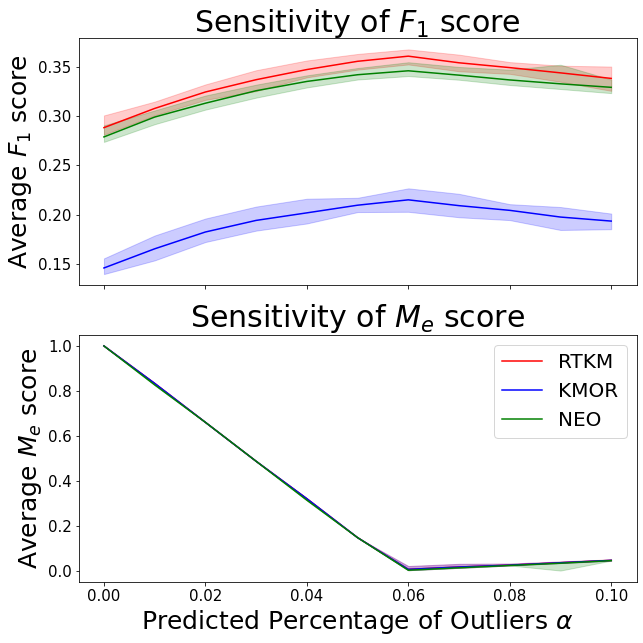

In [18]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)

# plt.savefig('yeast_normal_outliers', format='pdf')

Load results from paper

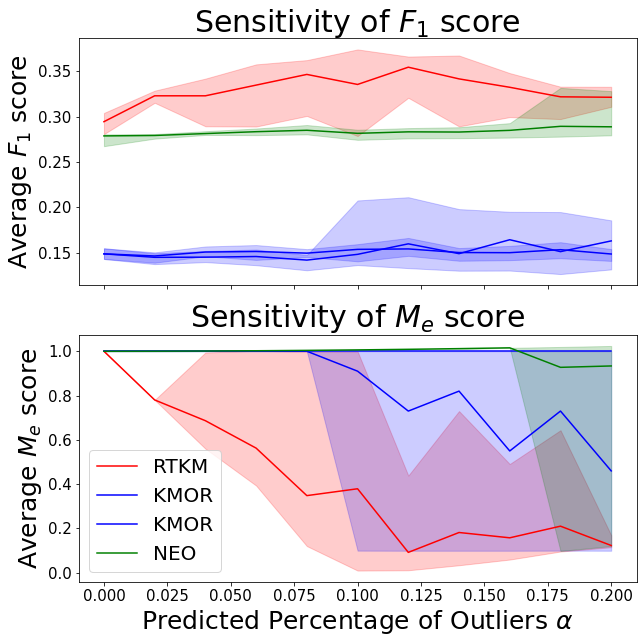

In [3]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_kmor_1, label = 'KMOR gamma = 1', c = 'b')
ax1.plot(alpha_vals, f1_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor_1[0,:], max_kmor_1[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_kmor_1, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor_1[1,:], max_kmor_1[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)

# Scene plus noise

In [6]:
# np.save('scene_out', data)
# np.save('scene_true_out', true_out)
# np.save('scene_out_labels', labels)


# np.save('scene_out_data_normal_temp', data)
# np.save('scene_out_labels_normal_temp', labels)

data = np.load('scene_out_data_normal_temp.npy')
labels = np.load('scene_out_labels_normal_temp.npy')


In [7]:
scene, meta = arff.loadarff('datasets/scene/scene.arff')
scene_data = pd.DataFrame(scene)
data = scene_data.iloc[:,:-6].to_numpy().astype(float)
labels = scene_data.iloc[:,-6:].to_numpy().astype(int)

data = data.T
labels = labels.T

# Create 10% noise
m,n = data.shape
num_out = 100
k=6

########
# add_noise = np.random.normal(0,1.5, (m, num_out))
# data_noise = data[:, np.random.choice(n,num_out)]
# data = np.hstack((data, data_noise + add_noise))
# true_out= np.arange(n, n + num_out)


# labels = np.hstack((labels, np.zeros((k,num_out))))
# outlier_row = np.zeros(n+num_out)
# outlier_row[true_out]=1

# labels = np.vstack((labels, outlier_row))
########

avg_feat_vals = np.average(data, axis = 1)
std_feat_vals = np.std(data, axis =1)

outlier_dat = np.zeros((m, num_out))

for i in range(num_out):
    outlier_dat[:,i] = avg_feat_vals + np.random.rand(m)*3*std_feat_vals
#     outlier_dat[:,i] = np.random.normal(0,1,m)*2

print(outlier_dat.shape)
data = np.hstack((data, outlier_dat))

true_out= np.arange(n, n + num_out)
labels = np.hstack((labels, np.zeros((k,num_out))))
outlier_row = np.zeros(n+num_out)
outlier_row[true_out]=1
labels = np.vstack((labels, outlier_row))




(294, 2407)
(294, 100)


Text(0.5, 1.0, 'Scene Dataset Visualized Against Top 2 Principle Components')

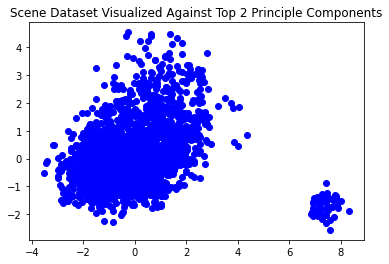

In [139]:
pca = PCA(n_components=3)
pca.fit(data.T)
Xnew = pca.transform(data.T)
Xnew = Xnew.T

plt.figure()
plt.scatter(Xnew[0,:-50], Xnew[1,:-50], c = 'b')
# plt.scatter(Xnew[0,true_out], Xnew[1,true_out], c='r', marker = "+", s = 100)

plt.title('Scene Dataset Visualized Against Top 2 Principle Components')




Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
PALM reached maximum number of iterations


 Number of true positives:  [288, 203, 262, 326, 214, 191, 72] 

 Number of false positives :  [234, 42, 72, 112, 267, 157, 78] 

 Number of true negatives:  [1846, 2101, 2038, 1962, 1707, 1919, 2329] 

 Number of false negatives:  [139, 161, 135, 107, 319, 240, 28] 

 F1 scores for each cluster:  [0.60695469 0.66666667 0.71682627 0.74856487 0.42209073 0.49037227
 0.576     ] 

 Average F1 score:  0.6039250701568112 

 me score: 0.2818689684828704


Text(0.5, 1.0, 'Robust Trimmed k Means')

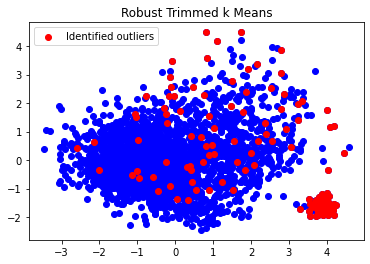

In [132]:
RTKM_yeast = RTKM(data)
RTKM_yeast.perform_clustering(k=6, percent_outliers = 0.06, max_iter = 500, num_members = 1) 
pred_clusters, pred_outliers = RTKM_yeast.return_clusters()

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = RTKM_yeast.weights, membership_option = 'multi', pred_outliers = RTKM_yeast.outliers)

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

plt.figure()

plt.scatter(Xnew[0,:], Xnew[1,:], c = 'b')
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c = 'r', label = 'Identified outliers')
# plt.scatter(RTKM_yeast.centers[0,:], RTKM_yeast.centers[1,:], c = 'b', label = 'Calculated Centers')
plt.legend()
plt.title('Robust Trimmed k Means')
#plt.savefig('MyMethodTrimmed')



 Number of true positives:  [303, 242, 0, 351, 209, 179, 156] 

 Number of false positives :  [263, 251, 36, 168, 256, 193, 0] 

 Number of true negatives:  [1917, 1992, 2174, 2006, 1818, 1983, 2407] 

 Number of false negatives:  [124, 122, 397, 82, 324, 252, 44] 

 F1 scores for each cluster:  [0.6102719  0.56476079 0.         0.73739496 0.41883768 0.44582814
 0.87640449] 

 Average F1 score:  0.5219282812804342 

 me score: 0.21999999999999997


Text(0.5, 1.0, 'KMOR')

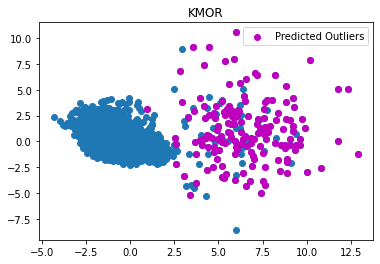

In [155]:
pred_labels_KMOR, pred_outliers_KMOR = run_kmor(data, k=6, percent_outliers= 0.06, gamma = 1)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_KMOR, membership_option = 'multi',pred_outliers = pred_outliers_KMOR)

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

pred_outliers = np.where(pred_outliers_KMOR == 0)[0]

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,pred_outliers], Xnew[1,pred_outliers], c= 'm', label= 'Predicted Outliers')
plt.legend()
plt.title('KMOR')

In [12]:
pred_labels_NEO, pred_outliers_NEO = run_neo(data, path_to_neo='/Users/olgadorabiala/Documents/Thesis/RTKM/neo_k_means_vector/neo_kmeans/neo_kmeans.m'
        , k=6, percent_outliers=.06, sigma = 1, init_centers = None)

tp, fp, tn, fn, f1_scores, me = accuracy_measures(true_clusters = labels, pred_clusters = pred_labels_NEO, membership_option = 'multi', pred_outliers = pred_outliers_NEO)

print('\n\n Number of true positives: ', tp, '\n\n Number of false positives : ', fp, 
      '\n\n Number of true negatives: ', tn, '\n\n Number of false negatives: ', fn, 
      '\n\n F1 scores for each cluster: ', f1_scores, '\n\n Average F1 score: ', np.average(f1_scores),
     '\n\n me score:', me)

outliers = np.where(pred_outliers_NEO == 0)

plt.figure()
plt.scatter(Xnew[0,:], Xnew[1,:])
plt.scatter(Xnew[0,outliers], Xnew[1,outliers], c= 'r')
plt.title('NEO-k-means')



    _pyeval at line 57 column 30

***** iteration: 1, objective: 19459.276315
***** iteration: 2, objective: 18391.178771
***** iteration: 3, objective: 18154.848686
***** iteration: 4, objective: 18072.059421
***** iteration: 5, objective: 18037.481983
***** iteration: 6, objective: 18017.308553
***** iteration: 7, objective: 18000.698437
***** iteration: 8, objective: 17983.156664
***** iteration: 9, objective: 17964.885433
***** iteration: 10, objective: 17942.638548
***** iteration: 11, objective: 17919.019497
***** iteration: 12, objective: 17900.080308
***** iteration: 13, objective: 17884.959837
***** iteration: 14, objective: 17878.709174
***** iteration: 15, objective: 17874.300439
***** iteration: 16, objective: 17870.653194
***** iteration: 17, objective: 17866.790207
***** iteration: 18, objective: 17864.885977
***** iteration: 19, objective: 17863.712112
***** iteration: 20, objective: 17862.862166
***** iteration: 21, objective: 17862.403469
***** iteration: 22, objective

NameError: name 'Xnew' is not defined

<Figure size 432x288 with 0 Axes>

In [20]:
alpha_vals = np.linspace(0, .10, 11) 

f1_avg_rtkm, f1_avg_kmor, f1_avg_neo, me_avg_rtkm, me_avg_kmor, me_avg_neo, \
min_rtkm, max_rtkm, min_kmor, max_kmor, min_neo, max_neo = sensitivity_to_alpha(data, k=6, kmor_gamma= 1, 
                                                                                neo_sigma = 1, path_to_neo='/Users/olgadorabiala/Documents/ThesisResearch/PALM/neo_k_means_vector/neo_kmeans/neo_kmeans.m',
                                                                                alpha_vals= alpha_vals, iterations= 50, true_clusters=labels,
                                                                                membership_option= 'multi', rtkm_sigma = 1)
    
    

Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 47947.465897
***** iteration: 2, objective: 47947.465897
***** No. of iterations done: 2
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 48501.291439
***** iteration: 2, objective: 48202.573681
***** iteration: 3, objective: 48202.573681
***** No. of iterations done: 3
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 3


    _pyeval at line 32 column 9

***** iteration: 1, objective: 48537.464547
***** iteration: 2, objective: 48462.213571
***** iteration: 3, objective: 48412.911220
***** iteration: 4, objective: 48361.291191
***** iteration: 5, objective: 48331.223405
***** iteration: 6, objective: 48319.422316
***** iteration: 7, objective: 48314.009864
***** iteration: 8, objective: 48308.093765
***** iteration: 9, objective: 48300.934336
***** iteration: 10, objective: 48290.426526
***** iteration: 11, objective: 48275.612145
***** iteration: 12, objective: 48245.513290
***** iteration: 13, objective: 48202.532918
***** iteration: 14, objective: 48152.291879
***** iteration: 15, objective: 48113.085127
***** iteration: 16, objective: 48079.716763
***** iteration: 17, objective: 48052.892998
***** iteration: 18, objective: 48030.854126
***** iteration: 19, objective: 48010.773391
***** iteration: 20, objective: 47991.032686
***** iteration: 21, objective: 47979.369602
***** iteration: 22, objective

    _pyeval at line 32 column 9

***** iteration: 1, objective: 47944.976013
***** iteration: 2, objective: 47944.959823
***** iteration: 3, objective: 47944.890377
***** iteration: 4, objective: 47944.837801
***** iteration: 5, objective: 47944.763663
***** iteration: 6, objective: 47944.700221
***** iteration: 7, objective: 47944.672023
***** iteration: 8, objective: 47944.631127
***** iteration: 9, objective: 47944.619201
***** iteration: 10, objective: 47944.619201
***** No. of iterations done: 10
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 47944.407748
***** iteration: 2, objective: 47944.407748
***** No. of iterations done: 2
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iter

***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 47945.006217
***** iteration: 2, objective: 47944.990028
***** iteration: 3, objective: 47944.920582
***** iteration: 4, objective: 47944.868006
***** iteration: 5, objective: 47944.793868
***** iteration: 6, objective: 47944.730426
***** iteration: 7, objective: 47944.702228
***** iteration: 8, objective: 47944.661332
***** iteration: 9, objective: 47944.649406
***** iteration: 10, objective: 47944.649406
***** No. of iterations done: 10
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached


***** iteration: 1, objective: 48500.686735
***** iteration: 2, objective: 48225.236819
***** iteration: 3, objective: 48207.971688
***** iteration: 4, objective: 48207.639470
***** iteration: 5, objective: 48207.570070
***** iteration: 6, objective: 48207.468459
***** iteration: 7, objective: 48207.452364
***** iteration: 8, objective: 48207.437570
***** iteration: 9, objective: 48207.437570
***** No. of iterations done: 9
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 48551.051589
***** iteration: 2, objective: 48274.054903
***** iteration: 3, objective: 48235.879467
***** iteration: 4, objective: 48235.879467
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.000, bet

***** beta: 0.000, betaN: 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40009.744673
***** iteration: 2, objective: 39932.139563
***** iteration: 3, objective: 39932.128569
***** iteration: 4, objective: 39932.128569
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40628.431509
***** iteration: 2, objective: 40295.187548
***** iteration: 3, objective: 40295.171199
***** iteration: 4, objective: 40295.152667
***** iteration: 5, objective: 40295.152667
***** No. of iterations done: 5
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 25
Iteration 100
Iter

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40012.973304
***** iteration: 2, objective: 39931.048841
***** iteration: 3, objective: 39931.024136
***** iteration: 4, objective: 39931.024136
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40196.352010
***** iteration: 2, objective: 40118.574149
***** iteration: 3, objective: 40118.476771
***** iteration: 4, objective: 40118.220085
***** iteration: 5, objective: 40118.028791
***** iteration: 6, objective: 40117.942618
***** iteration: 7, objective: 40117.814172
***** iteration: 8, objective: 40117.750909
***** iteration: 9, objective: 40117.750909
***** No. of iterations done: 9
***** Total no. of data points: 2507
*****

***** iteration: 2, objective: 40251.416547
***** iteration: 3, objective: 40224.344523
***** iteration: 4, objective: 40224.344523
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40178.751340
***** iteration: 2, objective: 40096.365695
***** iteration: 3, objective: 40096.223751
***** iteration: 4, objective: 40096.223751
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40010.980626
*****

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40178.917491
***** iteration: 2, objective: 40096.780396
***** iteration: 3, objective: 40096.695589
***** iteration: 4, objective: 40096.671112
***** iteration: 5, objective: 40096.656429
***** iteration: 6, objective: 40096.656429
***** No. of iterations done: 6
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40640.240497
***** iteration: 2, objective: 40293.439334
***** iteration: 3, objective: 40293.405594
***** iteration: 4, objective: 40293.405594
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at l

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40013.080257
***** iteration: 2, objective: 39931.153473
***** iteration: 3, objective: 39931.087033
***** iteration: 4, objective: 39931.087033
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.010, betaN: 25
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 40014.626704
***** iteration: 2, objective: 39937.011523
***** iteration: 3, objective: 39936.987050
***** iteration: 4, objective: 39936.885619
***** iteration: 5, objective: 39936.705665
***** iteration: 6, objective: 39936.483157
***** iteration: 7, objective: 39936.187544
***** iteration: 8, objective: 39935.782142
***** iteration: 9, objective: 39935.191200
***** iteration: 10, objective: 39934.579946
***** iteration: 11, objective: 39933.965758
***** iteration: 12, objec

***** iteration: 3, objective: 39935.968824
***** iteration: 4, objective: 39935.845876
***** iteration: 5, objective: 39935.701607
***** iteration: 6, objective: 39935.518737
***** iteration: 7, objective: 39935.370113
***** iteration: 8, objective: 39935.297867
***** iteration: 9, objective: 39935.156936
***** iteration: 10, objective: 39934.754182
***** iteration: 11, objective: 39934.307024
***** iteration: 12, objective: 39934.177066
***** iteration: 13, objective: 39934.035412
***** iteration: 14, objective: 39933.954106
***** iteration: 15, objective: 39933.903645
***** iteration: 16, objective: 39933.789822
***** iteration: 17, objective: 39933.606128
***** iteration: 18, objective: 39933.267393
***** iteration: 19, objective: 39933.020878
***** iteration: 20, objective: 39932.895702
***** iteration: 21, objective: 39932.760311
***** iteration: 22, objective: 39932.431863
***** iteration: 23, objective: 39932.302172
***** iteration: 24, objective: 39932.211356
***** iteration: 

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 32569.040700
***** iteration: 2, objective: 32433.946555
***** iteration: 3, objective: 32433.833323
***** iteration: 4, objective: 32433.794651
***** iteration: 5, objective: 32433.794651
***** No. of iterations done: 5
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 32565.125476
***** iteration: 2, objective: 32430.087131
***** iteration: 3, objective: 32429.968819
***** iteration: 4, objective: 32429.780705
***** iteration: 5, objective: 32429.780705
***** No. of iterations done: 5
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeva

***** No. of iterations done: 6
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 33209.822808
***** iteration: 2, objective: 32825.440166
***** iteration: 3, objective: 32824.698792
***** iteration: 4, objective: 32824.310303
***** iteration: 5, objective: 32823.911032
***** iteration: 6, objective: 32823.633144
***** iteration: 7, objective: 32823.577423
***** iteration: 8, objective: 32823.563065
***** iteration: 9, objective: 32823.563065
***** No. of iterations done: 9
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 32569.327006
***** iteration:

***** iteration: 12, objective: 32430.186261
***** iteration: 13, objective: 32430.186261
***** No. of iterations done: 13
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 33206.518551
***** iteration: 2, objective: 32794.381792
***** iteration: 3, objective: 32793.661837
***** iteration: 4, objective: 32793.063149
***** iteration: 5, objective: 32792.774154
***** iteration: 6, objective: 32792.534434
***** iteration: 7, objective: 32792.351478
***** iteration: 8, objective: 32792.224504
***** iteration: 9, objective: 32792.040325
***** iteration: 10, objective: 32791.914252
***** iteration: 11, objective: 32791.773101
***** iteration: 12, objective: 32791.583465
***** iteration: 13, objective: 32791.242353
***** iteration: 14, objec

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 32568.742546
***** iteration: 2, objective: 32433.670649
***** iteration: 3, objective: 32433.556581
***** iteration: 4, objective: 32433.556581
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 33144.528049
***** iteration: 2, objective: 32772.883450
***** iteration: 3, objective: 32772.698960
***** iteration: 4, objective: 32772.698960
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _

***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 33216.263356
***** iteration: 2, objective: 32844.577999
***** iteration: 3, objective: 32839.549286
***** iteration: 4, objective: 32838.667420
***** iteration: 5, objective: 32838.139102
***** iteration: 6, objective: 32837.821781
***** iteration: 7, objective: 32837.422511
***** iteration: 8, objective: 32837.144623
***** iteration: 9, objective: 32837.088902
***** iteration: 10, objective: 32837.074543
***** iteration: 11, objective: 32837.074543
***** No. of iterations done: 11
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

  

***** iteration: 4, objective: 32433.489675
***** iteration: 5, objective: 32433.314882
***** iteration: 6, objective: 32433.256494
***** iteration: 7, objective: 32433.241298
***** iteration: 8, objective: 32433.183240
***** iteration: 9, objective: 32433.138353
***** iteration: 10, objective: 32433.138353
***** No. of iterations done: 10
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 32569.009862
***** iteration: 2, objective: 32433.816800
***** iteration: 3, objective: 32433.737785
***** iteration: 4, objective: 32433.737785
***** No. of iterations done: 4
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.020, betaN: 50
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration

***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 75
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25549.064452
***** iteration: 2, objective: 25333.215525
***** iteration: 3, objective: 25333.087955
***** iteration: 4, objective: 25333.045549
***** iteration: 5, objective: 25333.033376
***** iteration: 6, objective: 25333.033376
***** No. of iterations done: 6
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 75
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25880.104099
***** iteration: 2, objective: 25658.011926
***** iteration: 3, objective: 25657.560565
***** i

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25549.852657
***** iteration: 2, objective: 25334.261377
***** iteration: 3, objective: 25334.166320
***** iteration: 4, objective: 25334.154651
***** iteration: 5, objective: 25334.154651
***** No. of iterations done: 5
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 75
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26001.824111
***** iteration: 2, objective: 25449.920487
***** iteration: 3, objective: 25402.667272
***** iteration: 4, objective: 25387.395507
***** iteration: 5, objective: 25379.541190
***** iteration: 6, objective: 25374.354787
***** iteration: 7, objective: 25370.052282
***** iteration: 8, objective: 25366.866723
***** iteration: 

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25548.806789
***** iteration: 2, objective: 25332.980439
***** iteration: 3, objective: 25332.879327
***** iteration: 4, objective: 25332.789026
***** iteration: 5, objective: 25332.740402
***** iteration: 6, objective: 25332.725660
***** iteration: 7, objective: 25332.725660
***** No. of iterations done: 7
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 75
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25757.579183
***** iteration: 2, objective: 25535.693898
***** iteration: 3, objective: 25534.452033
***** iteration: 4, objective: 25533.197198
***** iteration: 5, objective: 25531.969410
***** iteration: 6, objective: 25529.988024
***** iteration: 7, objective: 25528.329753
***** iteration: 8, objective: 25527.515873
***** iteration: 9, objective: 25527.14515

***** iteration: 24, objective: 25378.131757
***** iteration: 25, objective: 25373.706872
***** iteration: 26, objective: 25367.330328
***** iteration: 27, objective: 25364.777229
***** iteration: 28, objective: 25363.733807
***** iteration: 29, objective: 25363.355926
***** iteration: 30, objective: 25363.156683
***** iteration: 31, objective: 25363.120071
***** iteration: 32, objective: 25363.007588
***** iteration: 33, objective: 25362.871900
***** iteration: 34, objective: 25362.520316
***** iteration: 35, objective: 25362.422410
***** iteration: 36, objective: 25362.410696
***** iteration: 37, objective: 25362.410696
***** No. of iterations done: 37
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 75
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 c

***** iteration: 8, objective: 25328.937680
***** iteration: 9, objective: 25328.753630
***** iteration: 10, objective: 25328.481994
***** iteration: 11, objective: 25328.424709
***** iteration: 12, objective: 25328.424709
***** No. of iterations done: 12
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 75
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 25938.235536
***** iteration: 2, objective: 25415.849968
***** iteration: 3, objective: 25385.166958
***** iteration: 4, objective: 25373.244335
***** iteration: 5, objective: 25365.450913
***** iteration: 6, objective: 25361.017495
***** iteration: 7, objective: 25357.211598
***** iteration: 8, objective: 25354.936258
***** iteration: 9, objective: 25354.003980
***** iteration: 10, objective: 25353.547312
***** iteration: 11, objective: 25353.174698
***** itera

***** iteration: 42, objective: 25360.016246
***** iteration: 43, objective: 25359.752255
***** iteration: 44, objective: 25359.334315
***** iteration: 45, objective: 25359.147664
***** iteration: 46, objective: 25358.802221
***** iteration: 47, objective: 25358.551404
***** iteration: 48, objective: 25358.448945
***** iteration: 49, objective: 25358.417563
***** iteration: 50, objective: 25358.399768
***** iteration: 51, objective: 25358.377355
***** iteration: 52, objective: 25358.377355
***** No. of iterations done: 52
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 75
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26133.656578
***** iteration: 2, objective: 25693.632434
***** iteration: 3, objective: 25693.5

    _pyeval at line 32 column 9

***** iteration: 1, objective: 26062.980363
***** iteration: 2, objective: 25952.925984
***** iteration: 3, objective: 25943.663501
***** iteration: 4, objective: 25937.609962
***** iteration: 5, objective: 25931.801145
***** iteration: 6, objective: 25929.472943
***** iteration: 7, objective: 25927.684670
***** iteration: 8, objective: 25926.029488
***** iteration: 9, objective: 25924.792215
***** iteration: 10, objective: 25923.702594
***** iteration: 11, objective: 25921.526702
***** iteration: 12, objective: 25918.732422
***** iteration: 13, objective: 25915.632274
***** iteration: 14, objective: 25913.544648
***** iteration: 15, objective: 25911.120041
***** iteration: 16, objective: 25909.087350
***** iteration: 17, objective: 25906.762129
***** iteration: 18, objective: 25904.013216
***** iteration: 19, objective: 25903.166187
***** iteration: 20, objective: 25902.243225
***** iteration: 21, objective: 25900.825538
***** iteration: 22, objective:

***** iteration: 14, objective: 25362.845861
***** iteration: 15, objective: 25362.698793
***** iteration: 16, objective: 25362.635518
***** iteration: 17, objective: 25362.558625
***** iteration: 18, objective: 25362.491423
***** iteration: 19, objective: 25362.491423
***** No. of iterations done: 19
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.030, betaN: 75
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 27161.680635
***** iteration: 2, objective: 26137.443694
***** iteration: 3, objective: 26129.229483
***** iteration: 4, objective: 26127.138382
***** iteration: 5, objective: 26125.911026
***** iteration: 6, objective: 26125.589928
***** iteration: 7, objective: 26125.557748
***** iteration: 8, objective: 26125.557748
***** No. of iterations done: 8
***** Total no. of data points: 2507
***** alpha: 0.

    _pyeval at line 32 column 9

***** iteration: 1, objective: 19066.712273
***** iteration: 2, objective: 18828.862828
***** iteration: 3, objective: 18820.416073
***** iteration: 4, objective: 18817.736123
***** iteration: 5, objective: 18816.478646
***** iteration: 6, objective: 18815.635664
***** iteration: 7, objective: 18815.432117
***** iteration: 8, objective: 18815.396995
***** iteration: 9, objective: 18815.396995
***** No. of iterations done: 9
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 100
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18972.523251
***** iteration: 2, objective: 18706.001505
***** iteration: 3, objective: 18674.945078
***** iteration: 4, objective: 18667.623596
***** iteration: 5, objective: 18665.463571
***** iteration: 6, objective

***** iteration: 6, objective: 19254.326164
***** iteration: 7, objective: 19252.667731
***** iteration: 8, objective: 19252.074833
***** iteration: 9, objective: 19251.769407
***** iteration: 10, objective: 19251.362818
***** iteration: 11, objective: 19251.228078
***** iteration: 12, objective: 19251.199880
***** iteration: 13, objective: 19251.155421
***** iteration: 14, objective: 19251.155421
***** No. of iterations done: 14
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 100
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18926.331689
***** iteration: 2, objective: 18678.540545
***** iteration: 3, objective: 18660.874379
***** iteration: 4, objective: 18656.164614
***** iteration: 5, objective: 18653.965876
***** iteration: 6, objective: 18652.407643
***** iteration: 7, objective: 18652.015928
***** iteration: 8, objective: 18651.8


    _pyeval at line 32 column 9

***** iteration: 1, objective: 18928.079409
***** iteration: 2, objective: 18676.022789
***** iteration: 3, objective: 18661.096273
***** iteration: 4, objective: 18656.483470
***** iteration: 5, objective: 18654.527855
***** iteration: 6, objective: 18653.441541
***** iteration: 7, objective: 18652.680337
***** iteration: 8, objective: 18652.052376
***** iteration: 9, objective: 18651.685253
***** iteration: 10, objective: 18651.235444
***** iteration: 11, objective: 18651.004591
***** iteration: 12, objective: 18650.932665
***** iteration: 13, objective: 18650.898702
***** iteration: 14, objective: 18650.898702
***** No. of iterations done: 14
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 100
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

***** iteration: 5, objective: 18681.667297
***** iteration: 6, objective: 18676.758697
***** iteration: 7, objective: 18672.902898
***** iteration: 8, objective: 18669.867311
***** iteration: 9, objective: 18668.089848
***** iteration: 10, objective: 18667.427541
***** iteration: 11, objective: 18666.674439
***** iteration: 12, objective: 18666.242217
***** iteration: 13, objective: 18665.828868
***** iteration: 14, objective: 18665.748137
***** iteration: 15, objective: 18665.686404
***** iteration: 16, objective: 18665.627380
***** iteration: 17, objective: 18665.583839
***** iteration: 18, objective: 18665.564727
***** iteration: 19, objective: 18665.564727
***** No. of iterations done: 19
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 100
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** i


***** iteration: 1, objective: 19350.716831
***** iteration: 2, objective: 19108.870332
***** iteration: 3, objective: 19097.062927
***** iteration: 4, objective: 19093.003825
***** iteration: 5, objective: 19090.612651
***** iteration: 6, objective: 19089.156393
***** iteration: 7, objective: 19088.647639
***** iteration: 8, objective: 19088.017415
***** iteration: 9, objective: 19087.725153
***** iteration: 10, objective: 19087.589683
***** iteration: 11, objective: 19087.514560
***** iteration: 12, objective: 19087.487382
***** iteration: 13, objective: 19087.471307
***** iteration: 14, objective: 19087.451639
***** iteration: 15, objective: 19087.439291
***** iteration: 16, objective: 19087.439291
***** No. of iterations done: 16
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 100
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maxi


    _pyeval at line 32 column 9

***** iteration: 1, objective: 18942.655100
***** iteration: 2, objective: 18697.997274
***** iteration: 3, objective: 18676.415494
***** iteration: 4, objective: 18667.549696
***** iteration: 5, objective: 18663.666387
***** iteration: 6, objective: 18661.927873
***** iteration: 7, objective: 18660.696777
***** iteration: 8, objective: 18659.763444
***** iteration: 9, objective: 18658.786983
***** iteration: 10, objective: 18658.192381
***** iteration: 11, objective: 18657.602395
***** iteration: 12, objective: 18657.392190
***** iteration: 13, objective: 18657.267751
***** iteration: 14, objective: 18657.105411
***** iteration: 15, objective: 18656.718684
***** iteration: 16, objective: 18656.614956
***** iteration: 17, objective: 18656.614956
***** No. of iterations done: 17
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 100
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 

***** iteration: 16, objective: 18654.659011
***** iteration: 17, objective: 18654.598597
***** iteration: 18, objective: 18654.565328
***** iteration: 19, objective: 18654.522315
***** iteration: 20, objective: 18654.522315
***** No. of iterations done: 20
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 100
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18951.697090
***** iteration: 2, objective: 18701.666576
***** iteration: 3, objective: 18675.794894
***** iteration: 4, objective: 18665.135580
***** iteration: 5, objective: 18660.642228
***** iteration: 6, objective: 18658.912623
***** iteration: 7, objective: 18657.320354
***** iteration: 8, objective: 18656.080975
***** iteration: 9, objective: 18655.579905
***** iteration: 10, objective: 18655.455384
***** iteration: 11, objective: 18655.340313
***** it


    _pyeval at line 32 column 9

***** iteration: 1, objective: 19325.476958
***** iteration: 2, objective: 19093.936816
***** iteration: 3, objective: 19089.515463
***** iteration: 4, objective: 19088.372084
***** iteration: 5, objective: 19087.712293
***** iteration: 6, objective: 19087.536936
***** iteration: 7, objective: 19087.493370
***** iteration: 8, objective: 19087.432063
***** iteration: 9, objective: 19087.344360
***** iteration: 10, objective: 19087.125059
***** iteration: 11, objective: 19086.986445
***** iteration: 12, objective: 19086.898052
***** iteration: 13, objective: 19086.869223
***** iteration: 14, objective: 19086.805704
***** iteration: 15, objective: 19086.688380
***** iteration: 16, objective: 19086.632251
***** iteration: 17, objective: 19086.513548
***** iteration: 18, objective: 19086.441159
***** iteration: 19, objective: 19086.441159
***** No. of iterations done: 19
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, b

***** iteration: 4, objective: 18653.701659
***** iteration: 5, objective: 18652.938893
***** iteration: 6, objective: 18652.474676
***** iteration: 7, objective: 18652.350092
***** iteration: 8, objective: 18652.064965
***** iteration: 9, objective: 18651.876158
***** iteration: 10, objective: 18651.751485
***** iteration: 11, objective: 18651.710609
***** iteration: 12, objective: 18651.662256
***** iteration: 13, objective: 18651.551424
***** iteration: 14, objective: 18651.502087
***** iteration: 15, objective: 18651.459567
***** iteration: 16, objective: 18651.323540
***** iteration: 17, objective: 18651.323540
***** No. of iterations done: 17
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.040, betaN: 100
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 19001.047300
***** iteration: 2, objective: 18766.701752
***** i

***** iteration: 11, objective: 18071.171979
***** iteration: 12, objective: 18070.938107
***** iteration: 13, objective: 18070.425087
***** iteration: 14, objective: 18070.143742
***** iteration: 15, objective: 18069.876514
***** iteration: 16, objective: 18069.750993
***** iteration: 17, objective: 18069.646158
***** iteration: 18, objective: 18069.646158
***** No. of iterations done: 18
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 125
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18499.577198
***** iteration: 2, objective: 18233.069062
***** iteration: 3, objective: 18223.265556
***** iteration: 4, objective: 18220.716222
***** iteration: 5, objective: 18219.001335
***** iteration: 6, objective: 18218.053710
***** iteration: 7, objective: 18217.673573
***** iteration: 8, objective: 18217.403918
***** i

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18357.450765
***** iteration: 2, objective: 18108.841391
***** iteration: 3, objective: 18078.006340
***** iteration: 4, objective: 18066.689037
***** iteration: 5, objective: 18062.708081
***** iteration: 6, objective: 18060.797572
***** iteration: 7, objective: 18059.727888
***** iteration: 8, objective: 18058.838959
***** iteration: 9, objective: 18058.200476
***** iteration: 10, objective: 18058.035607
***** iteration: 11, objective: 18058.035607
***** No. of iterations done: 11
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 125
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18360.868656
***** iteration: 2, objective: 18097.810109
***** iteration: 3, objective: 18077.342452
***** iteration: 4, objective: 18070.350402
***** iteration: 5, objective: 1

***** iteration: 12, objective: 18072.866247
***** iteration: 13, objective: 18072.777490
***** iteration: 14, objective: 18072.658865
***** iteration: 15, objective: 18072.592670
***** iteration: 16, objective: 18072.561823
***** iteration: 17, objective: 18072.545490
***** iteration: 18, objective: 18072.545490
***** No. of iterations done: 18
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 125
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18357.887605
***** iteration: 2, objective: 18127.243079
***** iteration: 3, objective: 18102.228551
***** iteration: 4, objective: 18093.256918
***** iteration: 5, objective: 18089.001999
***** iteration: 6, objective: 18086.336906
***** iteration: 7, objective: 18085.293249
***** iteration: 8, objective: 18084.935259
***** iteration: 9, objective: 18084.653732
***** it

***** iteration: 4, objective: 18062.708635
***** iteration: 5, objective: 18060.681333
***** iteration: 6, objective: 18059.839832
***** iteration: 7, objective: 18059.036868
***** iteration: 8, objective: 18058.770836
***** iteration: 9, objective: 18058.641496
***** iteration: 10, objective: 18058.457162
***** iteration: 11, objective: 18058.201668
***** iteration: 12, objective: 18058.090269
***** iteration: 13, objective: 18058.057162
***** iteration: 14, objective: 18057.948048
***** iteration: 15, objective: 18057.783170
***** iteration: 16, objective: 18057.622013
***** iteration: 17, objective: 18057.522919
***** iteration: 18, objective: 18057.522919
***** No. of iterations done: 18
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 125
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18393.896869
***** 

***** iteration: 19, objective: 18067.904316
***** iteration: 20, objective: 18067.880029
***** iteration: 21, objective: 18067.852285
***** iteration: 22, objective: 18067.806914
***** iteration: 23, objective: 18067.604823
***** iteration: 24, objective: 18067.530955
***** iteration: 25, objective: 18067.454247
***** iteration: 26, objective: 18067.326612
***** iteration: 27, objective: 18067.267617
***** iteration: 28, objective: 18067.267617
***** No. of iterations done: 28
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 125
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18749.060488
***** iteration: 2, objective: 18501.911354
***** iteration: 3, objective: 18495.970517
***** iteration: 4, objective: 18494.165810
***** iteration: 5, objective: 18493.343363
***** iteration: 6, objective: 1849

***** iteration: 18, objective: 18067.499374
***** iteration: 19, objective: 18067.371002
***** iteration: 20, objective: 18067.228101
***** iteration: 21, objective: 18067.069824
***** iteration: 22, objective: 18066.948033
***** iteration: 23, objective: 18066.851302
***** iteration: 24, objective: 18066.803071
***** iteration: 25, objective: 18066.803071
***** No. of iterations done: 25
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 125
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18356.996963
***** iteration: 2, objective: 18126.194364
***** iteration: 3, objective: 18095.251865
***** iteration: 4, objective: 18082.347927
***** iteration: 5, objective: 18076.430799
***** iteration: 6, objective: 18071.885

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18362.464152
***** iteration: 2, objective: 18093.719600
***** iteration: 3, objective: 18080.782736
***** iteration: 4, objective: 18076.160890
***** iteration: 5, objective: 18073.545641
***** iteration: 6, objective: 18072.222922
***** iteration: 7, objective: 18071.792402
***** iteration: 8, objective: 18071.733051
***** iteration: 9, objective: 18071.733051
***** No. of iterations done: 9
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 125
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18354.968041
***** iteration: 2, objective: 18103.111989
***** iteration: 3, objective: 18073.631579
***** iteration: 4, objective: 18064.621586
***** iteration: 5, objective: 18061.530589
***** iteration: 6, objective: 18060.206260
***** iteration: 7, objective: 18059.347204
***** itera

***** iteration: 14, objective: 19180.733283
***** iteration: 15, objective: 19180.545867
***** iteration: 16, objective: 19180.333568
***** iteration: 17, objective: 19180.176908
***** iteration: 18, objective: 19180.132003
***** iteration: 19, objective: 19180.011220
***** iteration: 20, objective: 19179.929214
***** iteration: 21, objective: 19179.899527
***** iteration: 22, objective: 19179.884926
***** iteration: 23, objective: 19179.873584
***** iteration: 24, objective: 19179.852862
***** iteration: 25, objective: 19179.852862
***** No. of iterations done: 25
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.050, betaN: 125
Iteration 100
Iteration 200
Iteration 300
Iteration 400
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18524.433643
***** iteration: 2, objective: 18257.705163
***** iteration: 3, objective: 18245.790790
***** iteration: 4, objective: 18242.680391
***** iteration: 5, objective: 

***** iteration: 3, objective: 17665.964046
***** iteration: 4, objective: 17655.282990
***** iteration: 5, objective: 17650.363559
***** iteration: 6, objective: 17648.403030
***** iteration: 7, objective: 17646.606236
***** iteration: 8, objective: 17645.571351
***** iteration: 9, objective: 17644.868226
***** iteration: 10, objective: 17644.240550
***** iteration: 11, objective: 17643.570979
***** iteration: 12, objective: 17642.935846
***** iteration: 13, objective: 17642.328240
***** iteration: 14, objective: 17641.536119
***** iteration: 15, objective: 17640.587193
***** iteration: 16, objective: 17640.163783
***** iteration: 17, objective: 17639.940288
***** iteration: 18, objective: 17639.434429
***** iteration: 19, objective: 17638.666368
***** iteration: 20, objective: 17637.835354
***** iteration: 21, objective: 17636.546518
***** iteration: 22, objective: 17636.164577
***** iteration: 23, objective: 17635.906025
***** iteration: 24, objective: 17635.630967
***** iteration: 

***** iteration: 13, objective: 17647.235116
***** iteration: 14, objective: 17647.220443
***** iteration: 15, objective: 17647.220443
***** No. of iterations done: 15
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 150
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18063.981074
***** iteration: 2, objective: 17775.429438
***** iteration: 3, objective: 17759.559200
***** iteration: 4, objective: 17748.299487
***** iteration: 5, objective: 17737.966319
***** iteration: 6, objective: 17725.621308
***** iteration: 7, objective: 17706.691038
***** iteration: 8, objective: 17685.788314
***** iteration: 9, objective: 17671.023196
***** iteration: 10, objective: 17657.886363
***** iteration: 11, objective: 17648.316159
***** iteration: 12, objective: 17643.332276
***** itera

***** iteration: 3, objective: 18209.701841
***** iteration: 4, objective: 18203.029715
***** iteration: 5, objective: 18200.277533
***** iteration: 6, objective: 18198.401152
***** iteration: 7, objective: 18197.415943
***** iteration: 8, objective: 18197.255598
***** iteration: 9, objective: 18197.126365
***** iteration: 10, objective: 18196.835948
***** iteration: 11, objective: 18196.614906
***** iteration: 12, objective: 18196.397945
***** iteration: 13, objective: 18196.023963
***** iteration: 14, objective: 18195.821770
***** iteration: 15, objective: 18195.695399
***** iteration: 16, objective: 18195.613710
***** iteration: 17, objective: 18195.595147
***** iteration: 18, objective: 18195.540022
***** iteration: 19, objective: 18195.513109
***** iteration: 20, objective: 18195.513109
***** No. of iterations done: 20
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 150
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 co

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18756.848616
***** iteration: 2, objective: 18480.323019
***** iteration: 3, objective: 18470.724049
***** iteration: 4, objective: 18461.980217
***** iteration: 5, objective: 18451.429076
***** iteration: 6, objective: 18434.096942
***** iteration: 7, objective: 18407.577859
***** iteration: 8, objective: 18377.754696
***** iteration: 9, objective: 18342.079281
***** iteration: 10, objective: 18302.841398
***** iteration: 11, objective: 18252.881630
***** iteration: 12, objective: 18210.501477
***** iteration: 13, objective: 18180.366640
***** iteration: 14, objective: 18146.515786
***** iteration: 15, objective: 18118.132726
***** iteration: 16, objective: 18094.800181
***** iteration: 17, objective: 18078.767464
***** iteration: 18, objective: 18068.197715
***** iteration: 19, objective: 18062.560388
***** iteration: 20, objective: 18060.787403
***** iteration: 21, objective: 18059.533845
***** iteration: 22, objective:

***** iteration: 8, objective: 17619.806380
***** iteration: 9, objective: 17618.522947
***** iteration: 10, objective: 17618.229745
***** iteration: 11, objective: 17617.815675
***** iteration: 12, objective: 17617.581791
***** iteration: 13, objective: 17617.410999
***** iteration: 14, objective: 17617.370139
***** iteration: 15, objective: 17617.332352
***** iteration: 16, objective: 17617.287605
***** iteration: 17, objective: 17617.211016
***** iteration: 18, objective: 17617.164380
***** iteration: 19, objective: 17617.125446
***** iteration: 20, objective: 17617.084969
***** iteration: 21, objective: 17617.045342
***** iteration: 22, objective: 17617.005378
***** iteration: 23, objective: 17617.005378
***** No. of iterations done: 23
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 150
Iteration 100
Iteration 200
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18482.228885
***** iterati

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17963.453123
***** iteration: 2, objective: 17676.769660
***** iteration: 3, objective: 17649.989375
***** iteration: 4, objective: 17642.625442
***** iteration: 5, objective: 17638.171724
***** iteration: 6, objective: 17636.347661
***** iteration: 7, objective: 17635.180956
***** iteration: 8, objective: 17634.304067
***** iteration: 9, objective: 17633.267039
***** iteration: 10, objective: 17632.504823
***** iteration: 11, objective: 17631.291994
***** iteration: 12, objective: 17630.156561
***** iteration: 13, objective: 17629.461071
***** iteration: 14, objective: 17628.702123
***** iteration: 15, objective: 17627.949668
***** iteration: 16, objective: 17627.221588
***** iteration: 17, objective: 17626.498183
***** iteration: 18, objective: 17625.328370
***** iteration: 19, objective: 17624.449651
***** iteration: 20, objective: 17623.855602
***** iteration: 21, objective: 17623.091816
***** iteration: 22, objective:

***** iteration: 8, objective: 17634.824086
***** iteration: 9, objective: 17634.339243
***** iteration: 10, objective: 17634.014357
***** iteration: 11, objective: 17633.635323
***** iteration: 12, objective: 17633.192461
***** iteration: 13, objective: 17632.902624
***** iteration: 14, objective: 17632.710525
***** iteration: 15, objective: 17632.630921
***** iteration: 16, objective: 17632.608512
***** iteration: 17, objective: 17632.591917
***** iteration: 18, objective: 17632.591917
***** No. of iterations done: 18
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.060, betaN: 150
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17918.892416
***** iteration: 2, objective: 17649.014109
***** iteration: 3, objective: 17626.85

***** iteration: 17, objective: 17749.516778
***** iteration: 18, objective: 17747.899680
***** iteration: 19, objective: 17745.923184
***** iteration: 20, objective: 17741.878598
***** iteration: 21, objective: 17737.715268
***** iteration: 22, objective: 17732.358565
***** iteration: 23, objective: 17723.329511
***** iteration: 24, objective: 17711.575312
***** iteration: 25, objective: 17700.181607
***** iteration: 26, objective: 17689.421702
***** iteration: 27, objective: 17675.398854
***** iteration: 28, objective: 17663.894760
***** iteration: 29, objective: 17654.147729
***** iteration: 30, objective: 17647.715875
***** iteration: 31, objective: 17643.935708
***** iteration: 32, objective: 17642.052378
***** iteration: 33, objective: 17640.626663
***** iteration: 34, objective: 17639.812188
***** iteration: 35, objective: 17639.121689
***** iteration: 36, objective: 17638.431183
***** iteration: 37, objective: 17638.042807
***** iteration: 38, objective: 17637.815683
***** iter

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17958.977073
***** iteration: 2, objective: 17670.423889
***** iteration: 3, objective: 17649.042933
***** iteration: 4, objective: 17642.288911
***** iteration: 5, objective: 17639.693215
***** iteration: 6, objective: 17637.881573
***** iteration: 7, objective: 17636.647185
***** iteration: 8, objective: 17635.235826
***** iteration: 9, objective: 17634.290986
***** iteration: 10, objective: 17633.554771
***** iteration: 11, objective: 17632.316452
***** iteration: 12, objective: 17630.676334
***** iteration: 13, objective: 17629.826545
***** iteration: 14, objective: 17629.137091
***** iteration: 15, objective: 17628.372432
***** iteration: 16, objective: 17627.939683
***** iteration: 17, objective: 17627.293835
***** iteration: 18, objective: 17626.226209
***** iteration: 19, objective: 17625.258145
***** iteration: 20, objective: 17624.756651
***** iteration: 21, objective: 17624.2514

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17572.106839
***** iteration: 2, objective: 17327.472191
***** iteration: 3, objective: 17296.088977
***** iteration: 4, objective: 17285.293359
***** iteration: 5, objective: 17280.627784
***** iteration: 6, objective: 17277.782599
***** iteration: 7, objective: 17274.979768
***** iteration: 8, objective: 17272.869174
***** iteration: 9, objective: 17271.461753
***** iteration: 10, objective: 17270.579495
***** iteration: 11, objective: 17270.024531
***** iteration: 12, objective: 17269.858981
***** iteration: 13, objective: 17269.432467
***** iteration: 14, objective: 17269.041177
***** iteration: 15, objective: 17268.957399
***** iteration: 16, objective: 17268.794444
***** iteration: 17, objective: 17268.641096
***** iteration: 18, objective: 17268.623994
***** iteration: 19, objective: 17268.623994
***** No. of iterations done: 19
***** Total no. of data points: 2507
***** alpha: 0.00

***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17762.218501
***** iteration: 2, objective: 17499.521423
***** iteration: 3, objective: 17465.471537
***** iteration: 4, objective: 17454.431686
***** iteration: 5, objective: 17447.585105
***** iteration: 6, objective: 17442.175533
***** iteration: 7, objective: 17437.246401
***** iteration: 8, objective: 17429.790324
***** iteration: 9, objective: 17419.645646
***** iteration: 10, objective: 17406.419616
***** iteration: 11, objective: 17386.795117
***** iteration: 12, objective: 17359.550647
***** iteration: 13, objective: 17323.951320
***** iteration: 14, objective: 17290.036626
***** iteration: 15, objective: 17264.753985
***** iteration: 16, objective: 17251.466541
***** iteration: 17, objective: 17244.136

***** beta: 0.070, betaN: 175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18071.139226
***** iteration: 2, objective: 17801.185838
***** iteration: 3, objective: 17774.051728
***** iteration: 4, objective: 17763.698229
***** iteration: 5, objective: 17758.808417
***** iteration: 6, objective: 17756.835352
***** iteration: 7, objective: 17755.965778
***** iteration: 8, objective: 17755.329827
***** iteration: 9, objective: 17754.862992
***** iteration: 10, objective: 17754.680188
***** iteration: 11, objective: 17754.665943
***** iteration: 12, objective: 17754.665943
***** No. of iterations done: 12
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
    _pyeval at line 57 column 30

***** iteration: 6, objective: 17673.948358
***** iteration: 7, objective: 17673.618511
***** iteration: 8, objective: 17673.142871
***** iteration: 9, objective: 17672.397105
***** iteration: 10, objective: 17671.787090
***** iteration: 11, objective: 17671.576898
***** iteration: 12, objective: 17671.415629
***** iteration: 13, objective: 17671.377995
***** iteration: 14, objective: 17671.297448
***** iteration: 15, objective: 17671.230671
***** iteration: 16, objective: 17671.203803
***** iteration: 17, objective: 17671.152024
***** iteration: 18, objective: 17671.152024
***** No. of iterations done: 18
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 175
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17692.227375
***** iteration: 2, objective: 17401.247962
***** iteration: 3, objective: 17384.047588
***** iteration: 4, objective: 17375.383014
****

***** iteration: 24, objective: 17243.038945
***** iteration: 25, objective: 17241.214782
***** iteration: 26, objective: 17239.771579
***** iteration: 27, objective: 17239.277012
***** iteration: 28, objective: 17238.984764
***** iteration: 29, objective: 17238.834237
***** iteration: 30, objective: 17238.633193
***** iteration: 31, objective: 17238.544071
***** iteration: 32, objective: 17238.508293
***** iteration: 33, objective: 17238.403490
***** iteration: 34, objective: 17238.161949
***** iteration: 35, objective: 17238.002961
***** iteration: 36, objective: 17237.873832
***** iteration: 37, objective: 17237.795297
***** iteration: 38, objective: 17237.526834
***** iteration: 39, objective: 17237.420597
***** iteration: 40, objective: 17237.358643
***** iteration: 41, objective: 17237.314712
***** iteration: 42, objective: 17237.199883
***** iteration: 43, objective: 17237.021667
***** iteration: 44, objective: 17236.966358
***** iteration: 45, objective: 17236.966358
***** No. 

***** iteration: 5, objective: 17257.101192
***** iteration: 6, objective: 17256.193322
***** iteration: 7, objective: 17255.347081
***** iteration: 8, objective: 17254.692647
***** iteration: 9, objective: 17254.526663
***** iteration: 10, objective: 17254.526663
***** No. of iterations done: 10
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17580.219924
***** iteration: 2, objective: 17284.065108
***** iteration: 3, objective: 17266.196951
***** iteration: 4, objective: 17260.298988
***** iteration: 5, objective: 17256.711337
***** iteration: 6, objective: 17255.079508
***** iteration: 7, objective: 17254.361222
***** iteration: 8, objective: 17254.216707
***** iteration: 9, objective: 17253.973191
***** iteration: 10, objective: 17253.877154
***** iterati

***** iteration: 3, objective: 17682.719531
***** iteration: 4, objective: 17678.642762
***** iteration: 5, objective: 17676.248123
***** iteration: 6, objective: 17674.903996
***** iteration: 7, objective: 17674.198496
***** iteration: 8, objective: 17673.812488
***** iteration: 9, objective: 17673.306333
***** iteration: 10, objective: 17672.466975
***** iteration: 11, objective: 17671.839420
***** iteration: 12, objective: 17671.490569
***** iteration: 13, objective: 17671.426948
***** iteration: 14, objective: 17671.377939
***** iteration: 15, objective: 17671.362117
***** iteration: 16, objective: 17671.362117
***** No. of iterations done: 16
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17701.996126
***** iteration: 2, objective: 17409.2

***** iteration: 55, objective: 17240.214991
***** iteration: 56, objective: 17239.692224
***** iteration: 57, objective: 17239.067875
***** iteration: 58, objective: 17238.486948
***** iteration: 59, objective: 17237.946718
***** iteration: 60, objective: 17237.872546
***** iteration: 61, objective: 17237.823946
***** iteration: 62, objective: 17237.775666
***** iteration: 63, objective: 17237.775666
***** No. of iterations done: 63
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17631.692434
***** iteration: 2, objective: 17307.894012
***** iteration: 3, objective: 17277.887591
***** iteration: 4, objective: 17267.605586
***** iteration: 5, objective: 17262.306614
***** iteration: 6, objective: 17259.228099
***** iteration: 7, objective: 17257.035393
***** 

***** iteration: 22, objective: 17245.860003
***** iteration: 23, objective: 17244.231296
***** iteration: 24, objective: 17242.776516
***** iteration: 25, objective: 17242.099592
***** iteration: 26, objective: 17241.480063
***** iteration: 27, objective: 17240.993638
***** iteration: 28, objective: 17240.582559
***** iteration: 29, objective: 17240.328028
***** iteration: 30, objective: 17239.804592
***** iteration: 31, objective: 17239.218802
***** iteration: 32, objective: 17238.533451
***** iteration: 33, objective: 17237.986373
***** iteration: 34, objective: 17237.913621
***** iteration: 35, objective: 17237.794408
***** iteration: 36, objective: 17237.670292
***** iteration: 37, objective: 17237.670292
***** No. of iterations done: 37
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.070, betaN: 175
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reac

***** iteration: 3, objective: 16943.748583
***** iteration: 4, objective: 16933.485573
***** iteration: 5, objective: 16929.297786
***** iteration: 6, objective: 16926.089710
***** iteration: 7, objective: 16924.109947
***** iteration: 8, objective: 16922.513700
***** iteration: 9, objective: 16921.178818
***** iteration: 10, objective: 16920.265409
***** iteration: 11, objective: 16919.891497
***** iteration: 12, objective: 16919.425017
***** iteration: 13, objective: 16919.100686
***** iteration: 14, objective: 16918.476505
***** iteration: 15, objective: 16918.087682
***** iteration: 16, objective: 16917.771690
***** iteration: 17, objective: 16917.662754
***** iteration: 18, objective: 16917.530712
***** iteration: 19, objective: 16917.338563
***** iteration: 20, objective: 16917.137125
***** iteration: 21, objective: 16916.915121
***** iteration: 22, objective: 16916.734738
***** iteration: 23, objective: 16916.707160
***** iteration: 24, objective: 16916.665357
***** iteration: 

***** iteration: 7, objective: 17040.812458
***** iteration: 8, objective: 17039.146871
***** iteration: 9, objective: 17036.428370
***** iteration: 10, objective: 17030.222911
***** iteration: 11, objective: 17027.313224
***** iteration: 12, objective: 17025.003932
***** iteration: 13, objective: 17023.818745
***** iteration: 14, objective: 17023.312162
***** iteration: 15, objective: 17022.772161
***** iteration: 16, objective: 17022.230526
***** iteration: 17, objective: 17020.523162
***** iteration: 18, objective: 17015.457573
***** iteration: 19, objective: 17009.615482
***** iteration: 20, objective: 17002.918968
***** iteration: 21, objective: 16993.516711
***** iteration: 22, objective: 16979.937638
***** iteration: 23, objective: 16969.932945
***** iteration: 24, objective: 16963.181586
***** iteration: 25, objective: 16952.069162
***** iteration: 26, objective: 16942.672894
***** iteration: 27, objective: 16936.275411
***** iteration: 28, objective: 16929.293458
***** iterati

***** iteration: 4, objective: 17106.674668
***** iteration: 5, objective: 17102.183855
***** iteration: 6, objective: 17099.662161
***** iteration: 7, objective: 17098.211408
***** iteration: 8, objective: 17096.997240
***** iteration: 9, objective: 17095.681428
***** iteration: 10, objective: 17094.104405
***** iteration: 11, objective: 17092.407213
***** iteration: 12, objective: 17090.666908
***** iteration: 13, objective: 17089.690368
***** iteration: 14, objective: 17088.431660
***** iteration: 15, objective: 17087.066171
***** iteration: 16, objective: 17086.238684
***** iteration: 17, objective: 17085.326952
***** iteration: 18, objective: 17084.743757
***** iteration: 19, objective: 17084.451356
***** iteration: 20, objective: 17084.166469
***** iteration: 21, objective: 17083.939705
***** iteration: 22, objective: 17083.627536
***** iteration: 23, objective: 17083.315859
***** iteration: 24, objective: 17083.039410
***** iteration: 25, objective: 17082.926050
***** iteration:

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17219.493436
***** iteration: 2, objective: 16921.848406
***** iteration: 3, objective: 16896.699735
***** iteration: 4, objective: 16889.227028
***** iteration: 5, objective: 16886.071000
***** iteration: 6, objective: 16884.951147
***** iteration: 7, objective: 16884.658752
***** iteration: 8, objective: 16884.489380
***** iteration: 9, objective: 16884.392967
***** iteration: 10, objective: 16884.359104
***** iteration: 11, objective: 16884.295393
***** iteration: 12, objective: 16884.082860
***** iteration: 13, objective: 16883.777099
***** iteration: 14, objective: 16883.717370
***** iteration: 15, objective: 16883.675649
***** iteration: 16, objective: 16883.655581
***** iteration: 17, objective: 16883.618524
***** iteration: 18, objective: 16883.458140
***** iteration: 19, objective: 16883.316287
***** iteration: 20, objective: 16883.175338
***** iteration: 21, objective: 16883.090313
***** iteration: 22, objective:

***** iteration: 9, objective: 16994.254509
***** iteration: 10, objective: 16994.135925
***** iteration: 11, objective: 16994.094322
***** iteration: 12, objective: 16994.094322
***** No. of iterations done: 12
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 201
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17653.418645
***** iteration: 2, objective: 17335.153663
***** iteration: 3, objective: 17325.985983
***** iteration: 4, objective: 17322.434918
***** iteration: 5, objective: 17320.035362
***** iteration: 6, objective: 17318.797457
***** iteration: 7, objective: 17318.448490
***** iteration: 8, objective: 17318.291136
***** iteration: 9, objective: 17318.291136
***** No. of iterations done: 9
***** Total n

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17442.302995
***** iteration: 2, objective: 17122.807423
***** iteration: 3, objective: 17090.103560
***** iteration: 4, objective: 17073.696540
***** iteration: 5, objective: 17065.967340
***** iteration: 6, objective: 17060.042992
***** iteration: 7, objective: 17056.679587
***** iteration: 8, objective: 17053.762354
***** iteration: 9, objective: 17051.390313
***** iteration: 10, objective: 17050.273773
***** iteration: 11, objective: 17049.572596
***** iteration: 12, objective: 17049.162923
***** iteration: 13, objective: 17048.695102
***** iteration: 14, objective: 17048.177544
***** iteration: 15, objective: 17047.858217
***** iteration: 16, objective: 17047.586736
***** iteration: 17, objective: 17047.307523
***** iteration: 18, objective: 17047.220664
***** iteration: 19, objective: 17047.098110
***** iteration: 20, objective: 17046.961423
***** iteration: 21, objective: 17046.8284

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17602.326930
***** iteration: 2, objective: 17332.109336
***** iteration: 3, objective: 17324.332451
***** iteration: 4, objective: 17322.664826
***** iteration: 5, objective: 17322.071382
***** iteration: 6, objective: 17321.625612
***** iteration: 7, objective: 17321.106607
***** iteration: 8, objective: 17320.528675
***** iteration: 9, objective: 17319.845518
***** iteration: 10, objective: 17318.992202
***** iteration: 11, objective: 17318.651632
***** iteration: 12, objective: 17318.464925
***** iteration: 13, objective: 17318.418424
***** iteration: 14, objective: 17318.333321
***** iteration: 15, objective: 17318.308082
***** iteration: 16, objective: 17318.308082
***** No. of iterations done: 16
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 201
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteratio

***** iteration: 8, objective: 17318.197431
***** iteration: 9, objective: 17318.174143
***** iteration: 10, objective: 17318.153036
***** iteration: 11, objective: 17318.153036
***** No. of iterations done: 11
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 201
Iteration 100
Iteration 200
Iteration 300
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17369.226903
***** iteration: 2, objective: 17053.776424
***** iteration: 3, objective: 17044.745986
***** iteration: 4, objective: 17040.923540
***** iteration: 5, objective: 17038.065826
***** iteration: 6, objective: 17035.887941
***** iteration: 7, objective: 17033.469880
***** iteration: 8, objective: 17030.856398
***** iteration: 9, objective: 17026.436631
***** iteration: 10, objective: 17021.127544
***** iteration: 11, objective: 17011.279911
***** iteration: 12, objective: 16999.316717
***** iteration: 13, objective: 16983.274964
***** i

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17769.088618
***** iteration: 2, objective: 17408.624749
***** iteration: 3, objective: 17394.258045
***** iteration: 4, objective: 17389.401792
***** iteration: 5, objective: 17387.261275
***** iteration: 6, objective: 17385.787101
***** iteration: 7, objective: 17384.764188
***** iteration: 8, objective: 17384.419530
***** iteration: 9, objective: 17384.291401
***** iteration: 10, objective: 17384.164414
***** iteration: 11, objective: 17384.089094
***** iteration: 12, objective: 17384.002070
***** iteration: 13, objective: 17383.874574
***** iteration: 14, objective: 17383.856717
***** iteration: 15, objective: 17383.856717
***** No. of iterations done: 15
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.080, betaN: 201
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval


***** iteration: 1, objective: 17054.252431
***** iteration: 2, objective: 16784.392471
***** iteration: 3, objective: 16742.429406
***** iteration: 4, objective: 16727.189429
***** iteration: 5, objective: 16716.623279
***** iteration: 6, objective: 16709.317162
***** iteration: 7, objective: 16705.034358
***** iteration: 8, objective: 16701.549580
***** iteration: 9, objective: 16698.129792
***** iteration: 10, objective: 16694.382803
***** iteration: 11, objective: 16691.567784
***** iteration: 12, objective: 16687.985582
***** iteration: 13, objective: 16684.026859
***** iteration: 14, objective: 16679.061719
***** iteration: 15, objective: 16673.319999
***** iteration: 16, objective: 16670.603402
***** iteration: 17, objective: 16668.184292
***** iteration: 18, objective: 16666.246502
***** iteration: 19, objective: 16665.534596
***** iteration: 20, objective: 16665.315343
***** iteration: 21, objective: 16665.197606
***** iteration: 22, objective: 16665.100952
***** iteration: 2

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17363.389879
***** iteration: 2, objective: 17025.603246
***** iteration: 3, objective: 17014.121873
***** iteration: 4, objective: 17010.407261
***** iteration: 5, objective: 17009.245436
***** iteration: 6, objective: 17008.907292
***** iteration: 7, objective: 17008.705920
***** iteration: 8, objective: 17008.559330
***** iteration: 9, objective: 17008.354348
***** iteration: 10, objective: 17008.125534
***** iteration: 11, objective: 17007.672416
***** iteration: 12, objective: 17007.621926
***** iteration: 13, objective: 17007.591981
***** iteration: 14, objective: 17007.551386
***** iteration: 15, objective: 17007.531268
***** iteration: 16, objective: 17007.531268
***** No. of iterations done: 16
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteratio

***** iteration: 9, objective: 16593.623701
***** iteration: 10, objective: 16591.285994
***** iteration: 11, objective: 16587.526066
***** iteration: 12, objective: 16584.048762
***** iteration: 13, objective: 16581.848631
***** iteration: 14, objective: 16579.662636
***** iteration: 15, objective: 16577.623305
***** iteration: 16, objective: 16575.428895
***** iteration: 17, objective: 16574.090618
***** iteration: 18, objective: 16573.443999
***** iteration: 19, objective: 16572.628470
***** iteration: 20, objective: 16571.867712
***** iteration: 21, objective: 16571.132405
***** iteration: 22, objective: 16570.880170
***** iteration: 23, objective: 16570.862426
***** iteration: 24, objective: 16570.862426
***** No. of iterations done: 24
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reach

***** iteration: 3, objective: 16600.634317
***** iteration: 4, objective: 16597.479851
***** iteration: 5, objective: 16596.875187
***** iteration: 6, objective: 16596.568706
***** iteration: 7, objective: 16596.301599
***** iteration: 8, objective: 16596.099898
***** iteration: 9, objective: 16595.867089
***** iteration: 10, objective: 16595.587329
***** iteration: 11, objective: 16595.495819
***** iteration: 12, objective: 16595.477409
***** iteration: 13, objective: 16595.477409
***** No. of iterations done: 13
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
PALM reached maximum number of iterations
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17393.419386
***** iteration: 2, objective: 17084.108877
***** iteration: 3, objective: 17058.006093


***** iteration: 9, objective: 16598.629011
***** iteration: 10, objective: 16598.361559
***** iteration: 11, objective: 16598.243922
***** iteration: 12, objective: 16598.213050
***** iteration: 13, objective: 16598.213050
***** No. of iterations done: 13
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17346.971636
***** iteration: 2, objective: 17007.111539
***** iteration: 3, objective: 16999.606045
***** iteration: 4, objective: 16996.665924
***** iteration: 5, objective: 16995.095782
***** iteration: 6, objective: 16994.148740
***** iteration: 7, objective: 16993.270840
***** iteration: 8, objective: 16993.099349
***** iteration: 9, objective: 16993.014666
***** iteration: 10, objective: 16993.002140
***** iteration: 11, objective: 16993.002140
***** No.

***** iteration: 4, objective: 16575.382397
***** iteration: 5, objective: 16572.733022
***** iteration: 6, objective: 16571.453959
***** iteration: 7, objective: 16571.056959
***** iteration: 8, objective: 16570.771734
***** iteration: 9, objective: 16570.650489
***** iteration: 10, objective: 16570.545121
***** iteration: 11, objective: 16570.437367
***** iteration: 12, objective: 16570.361979
***** iteration: 13, objective: 16570.342134
***** iteration: 14, objective: 16570.327504
***** iteration: 15, objective: 16570.327504
***** No. of iterations done: 15
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17157.918253
***** iteration: 2, objective: 16822.149212
***** iteration: 3, objective: 16813.846516
***** itera

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 18682.749172
***** iteration: 2, objective: 18295.357435
***** iteration: 3, objective: 18288.782239
***** iteration: 4, objective: 18285.496099
***** iteration: 5, objective: 18284.523230
***** iteration: 6, objective: 18284.132844
***** iteration: 7, objective: 18283.954134
***** iteration: 8, objective: 18283.911979
***** iteration: 9, objective: 18283.900722
***** iteration: 10, objective: 18283.900722
***** No. of iterations done: 10
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 16925.731449
***** iteration: 2, objective: 16613.997970
***** iteration: 3, objective: 16585.230439
***** iteration: 4, objective: 16575.643020
***** iteration: 5, objective: 1657

/Users/olgadorabiala/Documents/Thesis/RTKM/KMOR.py:52: RuntimeWarning: invalid value encountered in true_divide
  Z = (Umat[inliers,:k]).T@Data[inliers,:]/denom[:, np.newaxis]


    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17385.326201
***** iteration: 2, objective: 17030.239857
***** iteration: 3, objective: 17017.764283
***** iteration: 4, objective: 17013.988204
***** iteration: 5, objective: 17011.568289
***** iteration: 6, objective: 17009.030481
***** iteration: 7, objective: 17007.821981
***** iteration: 8, objective: 17007.108585
***** iteration: 9, objective: 17006.851035
***** iteration: 10, objective: 17006.851035
***** No. of iterations done: 10
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17108.358941
***** iteration: 2, objective: 16828.058574
***** iteration: 3, objective: 16785.431901
***** iteration: 4, objective: 16770.

***** iteration: 13, objective: 17093.209449
***** iteration: 14, objective: 17089.899693
***** iteration: 15, objective: 17087.387558
***** iteration: 16, objective: 17085.693753
***** iteration: 17, objective: 17084.744272
***** iteration: 18, objective: 17084.105455
***** iteration: 19, objective: 17083.883004
***** iteration: 20, objective: 17083.641382
***** iteration: 21, objective: 17083.477734
***** iteration: 22, objective: 17083.459374
***** iteration: 23, objective: 17083.435714
***** iteration: 24, objective: 17083.410155
***** iteration: 25, objective: 17083.374439
***** iteration: 26, objective: 17083.362125
***** iteration: 27, objective: 17083.362125
***** No. of iterations done: 27
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17354.414266


***** No. of iterations done: 19
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.090, betaN: 226
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17104.805192
***** iteration: 2, objective: 16791.656896
***** iteration: 3, objective: 16759.595394
***** iteration: 4, objective: 16748.003244
***** iteration: 5, objective: 16742.199274
***** iteration: 6, objective: 16739.816360
***** iteration: 7, objective: 16738.484283
***** iteration: 8, objective: 16737.571615
***** iteration: 9, objective: 16736.888736
***** iteration: 10, objective: 16736.675061
***** iteration: 11, objective: 16736.659016
***** iteration: 12, objective: 16736.659016
***** No. of iterations done: 12
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 251
Iteration 100
It

    _pyeval at line 32 column 9

***** iteration: 1, objective: 16805.671871
***** iteration: 2, objective: 16496.069911
***** iteration: 3, objective: 16449.882845
***** iteration: 4, objective: 16434.520271
***** iteration: 5, objective: 16427.381476
***** iteration: 6, objective: 16423.132342
***** iteration: 7, objective: 16421.364912
***** iteration: 8, objective: 16420.662247
***** iteration: 9, objective: 16419.721560
***** iteration: 10, objective: 16419.001189
***** iteration: 11, objective: 16418.766110
***** iteration: 12, objective: 16418.530896
***** iteration: 13, objective: 16418.202578
***** iteration: 14, objective: 16418.007538
***** iteration: 15, objective: 16417.815758
***** iteration: 16, objective: 16417.647751
***** iteration: 17, objective: 16417.450151
***** iteration: 18, objective: 16417.023771
***** iteration: 19, objective: 16416.423761
***** iteration: 20, objective: 16415.938631
***** iteration: 21, objective: 16414.795486
***** iteration: 22, objective:

    _pyeval at line 32 column 9

***** iteration: 1, objective: 16692.792941
***** iteration: 2, objective: 16348.165095
***** iteration: 3, objective: 16317.654522
***** iteration: 4, objective: 16308.813416
***** iteration: 5, objective: 16305.849195
***** iteration: 6, objective: 16304.263040
***** iteration: 7, objective: 16303.240285
***** iteration: 8, objective: 16302.661917
***** iteration: 9, objective: 16301.719457
***** iteration: 10, objective: 16300.664112
***** iteration: 11, objective: 16300.036609
***** iteration: 12, objective: 16299.366102
***** iteration: 13, objective: 16299.110837
***** iteration: 14, objective: 16298.919964
***** iteration: 15, objective: 16298.416913
***** iteration: 16, objective: 16297.763738
***** iteration: 17, objective: 16297.058770
***** iteration: 18, objective: 16296.252026
***** iteration: 19, objective: 16295.405929
***** iteration: 20, objective: 16294.335795
***** iteration: 21, objective: 16293.376548
***** iteration: 22, objective:

***** iteration: 13, objective: 16404.394348
***** iteration: 14, objective: 16393.554272
***** iteration: 15, objective: 16380.439529
***** iteration: 16, objective: 16370.086409
***** iteration: 17, objective: 16358.028700
***** iteration: 18, objective: 16349.379600
***** iteration: 19, objective: 16340.078354
***** iteration: 20, objective: 16332.569236
***** iteration: 21, objective: 16326.755187
***** iteration: 22, objective: 16323.563052
***** iteration: 23, objective: 16320.724808
***** iteration: 24, objective: 16318.608754
***** iteration: 25, objective: 16317.039267
***** iteration: 26, objective: 16316.023877
***** iteration: 27, objective: 16315.404534
***** iteration: 28, objective: 16315.115710
***** iteration: 29, objective: 16314.923057
***** iteration: 30, objective: 16314.747074
***** iteration: 31, objective: 16314.674422
***** iteration: 32, objective: 16314.586062
***** iteration: 33, objective: 16314.538542
***** iteration: 34, objective: 16314.510665
***** iter

***** iteration: 11, objective: 16315.205216
***** iteration: 12, objective: 16314.970893
***** iteration: 13, objective: 16314.931904
***** iteration: 14, objective: 16314.931904
***** No. of iterations done: 14
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 251
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 16754.007638
***** iteration: 2, objective: 16333.849068
***** iteration: 3, objective: 16317.219844
***** iteration: 4, objective: 16312.195934
***** iteration: 5, objective: 16310.795217
***** iteration: 6, objective: 16309.865352
***** iteration: 7, objective: 16309.541643
***** iteration: 8, objective: 16309.212587
***** iteration: 9, objective: 16308.646993
***** iteration: 10, objective: 16308.257173
***** iteration: 11, objective: 16308.035184
***** iteration: 12, obje

Iteration 800
Iteration 900
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 16747.068727
***** iteration: 2, objective: 16387.276454
***** iteration: 3, objective: 16331.459056
***** iteration: 4, objective: 16312.972108
***** iteration: 5, objective: 16301.551996
***** iteration: 6, objective: 16292.028713
***** iteration: 7, objective: 16286.448399
***** iteration: 8, objective: 16282.838440
***** iteration: 9, objective: 16280.742393
***** iteration: 10, objective: 16278.854427
***** iteration: 11, objective: 16277.892455
***** iteration: 12, objective: 16277.082596
***** iteration: 13, objective: 16276.439918
***** iteration: 14, objective: 16276.164492
***** iteration: 15, objective: 16275.902947
***** iteration: 16, objective: 16275.829310
***** iteration: 17, objective: 16275.786629
***** iteration: 18, objective: 16275.786629
***** No. of iterations done: 18
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
****

    _pyeval at line 32 column 9

***** iteration: 1, objective: 17116.176830
***** iteration: 2, objective: 16796.661574
***** iteration: 3, objective: 16733.859761
***** iteration: 4, objective: 16670.485268
***** iteration: 5, objective: 16559.664788
***** iteration: 6, objective: 16480.095921
***** iteration: 7, objective: 16408.280458
***** iteration: 8, objective: 16348.119084
***** iteration: 9, objective: 16305.498341
***** iteration: 10, objective: 16290.401636
***** iteration: 11, objective: 16284.740694
***** iteration: 12, objective: 16281.449485
***** iteration: 13, objective: 16277.715141
***** iteration: 14, objective: 16275.593317
***** iteration: 15, objective: 16274.975094
***** iteration: 16, objective: 16274.722631
***** iteration: 17, objective: 16274.667514
***** iteration: 18, objective: 16274.667514
***** No. of iterations done: 18
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 251
Iteration 100
Iteration 200
Iteratio

***** iteration: 7, objective: 16308.266486
***** iteration: 8, objective: 16307.554463
***** iteration: 9, objective: 16306.707632
***** iteration: 10, objective: 16305.951462
***** iteration: 11, objective: 16305.606314
***** iteration: 12, objective: 16305.444526
***** iteration: 13, objective: 16305.352038
***** iteration: 14, objective: 16305.299615
***** iteration: 15, objective: 16305.221582
***** iteration: 16, objective: 16305.121213
***** iteration: 17, objective: 16305.061714
***** iteration: 18, objective: 16305.061714
***** No. of iterations done: 18
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 251
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 16707.813158
***** iteration: 2, objective: 16329.093579
***** iteration: 3, objective: 16314.759883
***** iteration: 4, objective: 16310

    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 16638.691363
***** iteration: 2, objective: 16312.223227
***** iteration: 3, objective: 16286.291626
***** iteration: 4, objective: 16280.371016
***** iteration: 5, objective: 16279.023421
***** iteration: 6, objective: 16278.196959
***** iteration: 7, objective: 16277.373998
***** iteration: 8, objective: 16276.977370
***** iteration: 9, objective: 16276.807327
***** iteration: 10, objective: 16276.715561
***** iteration: 11, objective: 16276.528387
***** iteration: 12, objective: 16276.435507
***** iteration: 13, objective: 16276.377541
***** iteration: 14, objective: 16276.353616
***** iteration: 15, objective: 16276.315631
***** iteration: 16, objective: 16276.273393
***** iteration: 17, objective: 16276.254411
***** iteration: 18, objective: 16276.184434
***** iteration: 19, objective: 16276.077168
***** iteration: 20, objective: 16276.015419
***** iteration: 21, objective: 16276.0154

***** iteration: 19, objective: 16276.143979
***** iteration: 20, objective: 16276.115814
***** iteration: 21, objective: 16276.085378
***** iteration: 22, objective: 16276.061904
***** iteration: 23, objective: 16276.038997
***** iteration: 24, objective: 16276.038997
***** No. of iterations done: 24
***** Total no. of data points: 2507
***** alpha: 0.000, alphaN: 0
***** beta: 0.100, betaN: 251
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
    _pyeval at line 57 column 30

    _pyeval at line 32 column 9

***** iteration: 1, objective: 16810.987353
***** iteration: 2, objective: 16479.121469
***** iteration: 3, objective: 16441.289482
***** iteration: 4, objective: 16427.794678
***** iteration: 5, objective: 16415.226357
***** iteration: 6, objective: 16401.550479
***** iteration: 7, objective: 16382.160284
***** iteration: 8, objective: 16349.673723
***** iteration: 9, objective: 16327.040404
***** iteration: 10, objective: 16302.571123
***** iteration: 11, o

In [34]:
f1_rtkm, f1_kmor, f1_neo, me_rtkm, me_kmor, me_neo, \
    min_rtkm, min_kmor, min_neo, max_rtkm, max_kmor, max_neo, alpha_vals = load_figure_data('scene_gaussian_noise')

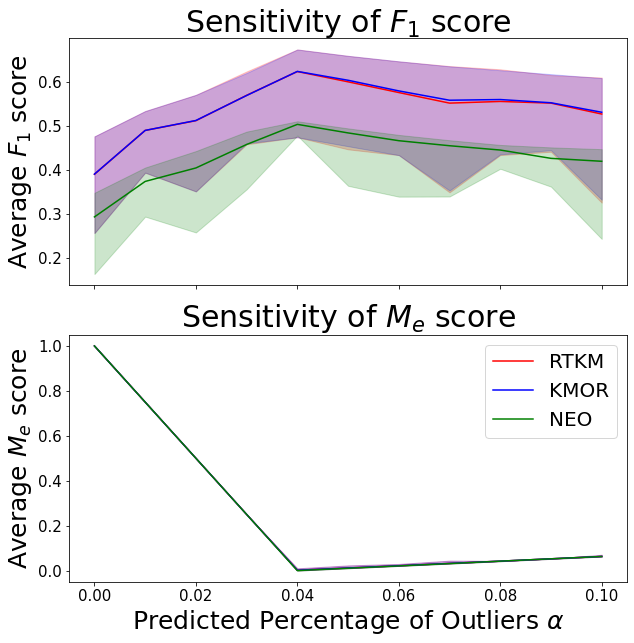

In [35]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize = (10,10))
ax1.plot(alpha_vals, f1_rtkm, label = 'RTKM', c = 'r')
ax1.plot(alpha_vals, f1_kmor, label = 'KMOR', c = 'b')
ax1.plot(alpha_vals, f1_neo, label = 'NEO', c = 'g')
ax1.fill_between(alpha_vals, min_rtkm[0,:], max_rtkm[0,:], color = 'r', alpha = 0.2)
ax1.fill_between(alpha_vals, min_kmor[0,:], max_kmor[0,:], color = 'b', alpha = 0.2)
ax1.fill_between(alpha_vals, min_neo[0,:], max_neo[0,:], color = 'g', alpha = 0.2)
ax1.set_title('Sensitivity of $F_1$ score')
ax1.set_ylabel('Average $F_1$ score')
ax1.yaxis.label.set_fontsize(25)
ax1.title.set_fontsize(30)
ax1.tick_params(axis='y', labelsize=15)
# ax1.legend()

ax2.plot(alpha_vals, me_rtkm, label = 'RTKM', c = 'r')
ax2.plot(alpha_vals, me_kmor, label = 'KMOR', c = 'b')
ax2.plot(alpha_vals, me_neo, label = 'NEO', c = 'g')
ax2.fill_between(alpha_vals, min_rtkm[1,:], max_rtkm[1,:], color = 'r', alpha = 0.2)
ax2.fill_between(alpha_vals, min_kmor[1,:], max_kmor[1,:], color = 'b', alpha = 0.2)
ax2.fill_between(alpha_vals, min_neo[1,:], max_neo[1,:], color = 'g', alpha = 0.2)
ax2.set_title('Sensitivity of $M_e$ score')
ax2.set_ylabel('Average $M_e$ score')
ax2.set_xlabel('Predicted Percentage of Outliers ' r'$\alpha$')
ax2.xaxis.label.set_fontsize(25)
ax2.yaxis.label.set_fontsize(25)
ax2.title.set_fontsize(30)
ax2.tick_params(axis='y', labelsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.legend(fontsize = 20)

plt.savefig('scenewoutliers_normal', format='pdf')

In [36]:
np.average(f1_rtkm), np.average(f1_kmor), np.average(f1_neo), np.average(me_rtkm), np.average(me_kmor), np.average(me_neo)

(0.5407720835304087,
 0.5429358977863207,
 0.43043049213613044,
 0.24758527661419238,
 0.24758527661419238,
 0.2472145635834875)

In [145]:
# np.save('scene_out_data', data)
# np.save('scene_out_labels', labels)

In [21]:
# np.save('scene_out_3', data)
# np.save('scene_true_out_3', true_out)
# np.save('scene_out_labels_3', labels)

In [18]:
alpha_vals = np.linspace(0, .10, 11) 

np.save('figure_data/Me_avg_RTKM_scene_out_sigma0.npy', me_avg_rtkm)
np.save('figure_data/Me_avg_KMOR_scene_out_sigma0.npy', me_avg_kmor)
np.save('figure_data/Me_avg_NEO_scene_out_sigma0.npy', me_avg_neo)

np.save('figure_data/f1_avg_RTKM_scene_out_sigma0.npy', f1_avg_rtkm)
np.save('figure_data/f1_avg_KMOR_scene_out_sigma0.npy', f1_avg_kmor)
np.save('figure_data/f1_avg_NEO_scene_out_sigma0.npy', f1_avg_neo)

np.save('figure_data/min_RTKM_scene_sigma0.npy', min_rtkm)
np.save('figure_data/max_RTKM_scene_sigma0.npy', max_rtkm)

np.save('figure_data/min_KMOR_scene_sigma0.npy', min_kmor)
np.save('figure_data/max_KMOR_scene_sigma0.npy', max_kmor)

np.save('figure_data/min_NEO_scene_sigma0.npy', min_neo)
np.save('figure_data/max_NEO_scene_sigma0.npy', max_neo)

# me_avg_rtkm = np.load('figure_data/Me_avg_RTKM_scene_out_normal_temp.npy')
# me_avg_kmor = np.load('figure_data/Me_avg_KMOR_scene_out_normal_temp.npy')
# me_avg_neo = np.load('figure_data/Me_avg_NEO_scene_out_normal_temp.npy')

# f1_avg_rtkm = np.load('figure_data/f1_avg_RTKM_scene_out_normal_temp.npy')
# f1_avg_kmor = np.load('figure_data/f1_avg_KMOR_scene_out_normal_temp.npy')
# f1_avg_neo= np.load('figure_data/f1_avg_NEO_scene_out_normal_temp.npy')

# min_rtkm = np.load('figure_data/min_RTKM_scene_normal_temp.npy')
# max_rtkm = np.load('figure_data/max_RTKM_scene_normal_temp.npy')

# min_kmor = np.load('figure_data/min_KMOR_scene_normal_temp.npy')
# max_kmor = np.load('figure_data/max_KMOR_scene_normal_temp.npy')

# min_neo = np.load('figure_data/min_NEO_scene_normal_temp.npy')
# max_neo = np.load('figure_data/max_NEO_scene_normal_temp.npy')



